## Importing the relevant libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold, RepeatedKFold
from sklearn.linear_model import LogisticRegression, SGDClassifier, PassiveAggressiveClassifier, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib, scipy

## Loading the dataset

In [3]:
df = pd.read_csv('C:\\Users\\laito\\OneDrive - VNU-HCMUS\\Jupyter Hub\\KHDL\\KHDL-MACHINE LEARNING\\Labs\\Week 06\\Churn-Rate-Prediction\\churn_rate_prediction.csv')
df.head()

customer_id              Name  age gender   
0      fffe4300490044003600300030003800   Pattie Morrisey   18      F  \
1  fffe43004900440032003100300035003700       Traci Peery   32      F   
2      fffe4300490044003100390032003600   Merideth Mcmeen   44      F   
3  fffe43004900440036003000330031003600  Eufemia Cardwell   37      M   
4  fffe43004900440031003900350030003600      Meghan Kosak   31      F   

  security_no region_category  membership_category joining_date   
0     XW0DQ7H         Village  Platinum Membership   2017-08-17  \
1     5K0N3X1            City   Premium Membership   2017-08-28   
2     1F2TCL3            Town        No Membership   2016-11-11   
3     VJGJ33N            City        No Membership   2016-10-29   
4     SVZXCWB            City        No Membership   2017-09-12   

  joined_through_referral referral_id  ... avg_time_spent   
0                      No    xxxxxxxx  ...         300.63  \
1                       ?    CID21329  ...         306.34   
2                     Yes    CID12313  ...         516.16   
3                     Yes     CID3793  ...          53.27   
4                      No    xxxxxxxx  ...         113.13   

  avg_transaction_value avg_frequency_login_days points_in_wallet   
0              53005.25                     17.0           781.75  \
1              12838.38                     10.0              NaN   
2              21027.00                     22.0           500.69   
3              25239.56                      6.0           567.66   
4              24483.66                     16.0           663.06   

   used_special_discount  offer_application_preference  past_complaint   
0                    Yes                           Yes              No  \
1                    Yes                            No             Yes   
2                     No                           Yes             Yes   
3                     No                           Yes             Yes   
4                     No                           Yes             Yes   

      complaint_status                  feedback churn_risk_score  
0       Not Applicable  Products always in Stock                2  
1               Solved     Quality Customer Care                1  
2  Solved in Follow-up              Poor Website                5  
3             Unsolved              Poor Website                5  
4               Solved              Poor Website                5  

[5 rows x 25 columns]

## Data Exploration 

In [4]:
# df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.shape

(36992, 25)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [7]:
df.describe()

age  days_since_last_login  avg_time_spent   
count  36992.000000           36992.000000    36992.000000  \
mean      37.118161             -41.915576      243.472334   
std       15.867412             228.819900      398.289149   
min       10.000000            -999.000000    -2814.109110   
25%       23.000000               8.000000       60.102500   
50%       37.000000              12.000000      161.765000   
75%       51.000000              16.000000      356.515000   
max       64.000000              26.000000     3235.578521   

       avg_transaction_value  points_in_wallet  churn_risk_score  
count           36992.000000      33549.000000      36992.000000  
mean            29271.194003        686.882199          3.463397  
std             19444.806226        194.063624          1.409661  
min               800.460000       -760.661236         -1.000000  
25%             14177.540000        616.150000          3.000000  
50%             27554.485000        697.620000          4.000000  
75%             40855.110000        763.950000          5.000000  
max             99914.050000       2069.069761          5.000000

In [8]:
df.isnull().sum() / len(df) * 100

customer_id                      0.000000
Name                             0.000000
age                              0.000000
gender                           0.000000
security_no                      0.000000
region_category                 14.673443
membership_category              0.000000
joining_date                     0.000000
joined_through_referral          0.000000
referral_id                      0.000000
preferred_offer_types            0.778547
medium_of_operation              0.000000
internet_option                  0.000000
last_visit_time                  0.000000
days_since_last_login            0.000000
avg_time_spent                   0.000000
avg_transaction_value            0.000000
avg_frequency_login_days         0.000000
points_in_wallet                 9.307418
used_special_discount            0.000000
offer_application_preference     0.000000
past_complaint                   0.000000
complaint_status                 0.000000
feedback                         0

In [9]:
df[df.duplicated()]

Empty DataFrame
Columns: [customer_id, Name, age, gender, security_no, region_category, membership_category, joining_date, joined_through_referral, referral_id, preferred_offer_types, medium_of_operation, internet_option, last_visit_time, days_since_last_login, avg_time_spent, avg_transaction_value, avg_frequency_login_days, points_in_wallet, used_special_discount, offer_application_preference, past_complaint, complaint_status, feedback, churn_risk_score]
Index: []

[0 rows x 25 columns]

## Feature Engineering

## Imputation of missing values

In [10]:
df.preferred_offer_types.fillna(df.preferred_offer_types.mode()[0],inplace=True)

In [11]:
df.points_in_wallet.fillna(df.points_in_wallet.mean(),inplace=True)

In [12]:
df.region_category.fillna(df.region_category.mode()[0],inplace=True)

In [13]:
df.isnull().sum()

customer_id                     0
Name                            0
age                             0
gender                          0
security_no                     0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

## Outlier Treatment

age
Skewness: -0.0073193192673247955
Kurtosis: -1.1987327113107535


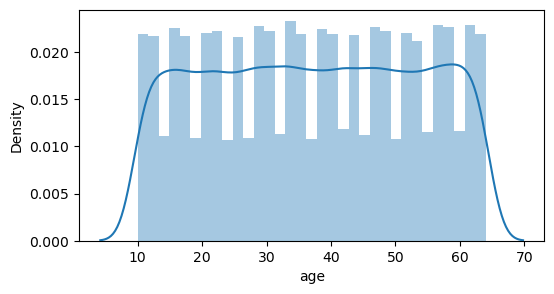

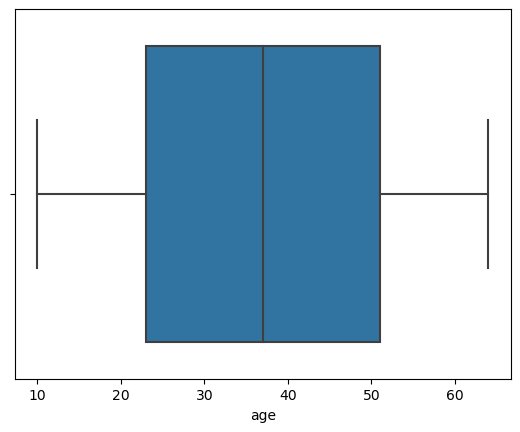

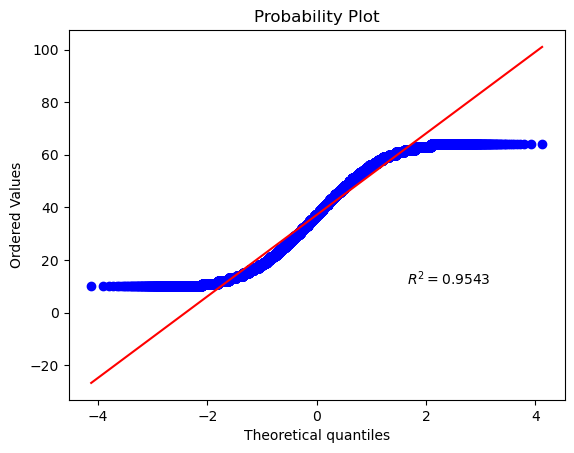

days_since_last_login
Skewness: -3.941355821757813
Kurtosis: 13.545985341506187


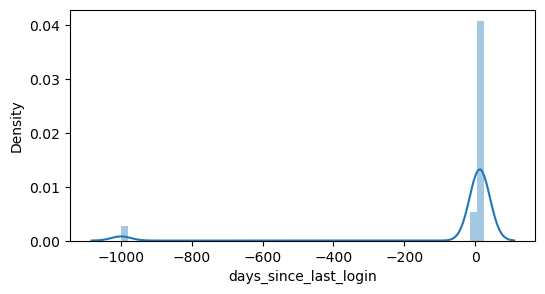

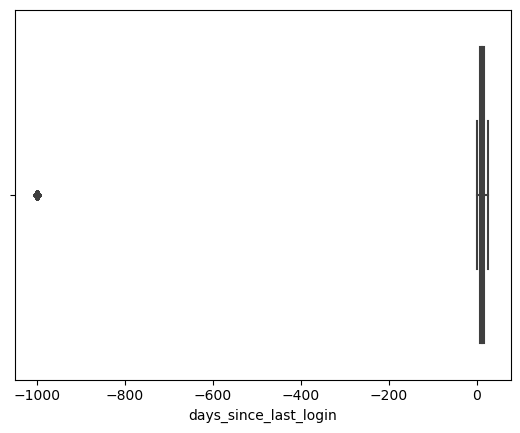

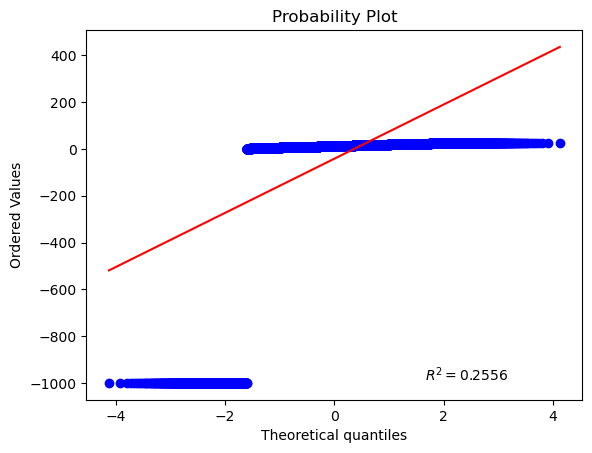

avg_time_spent
Skewness: 0.5396240190653155
Kurtosis: 5.003915280760328


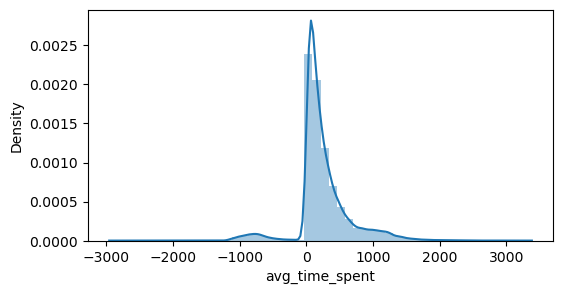

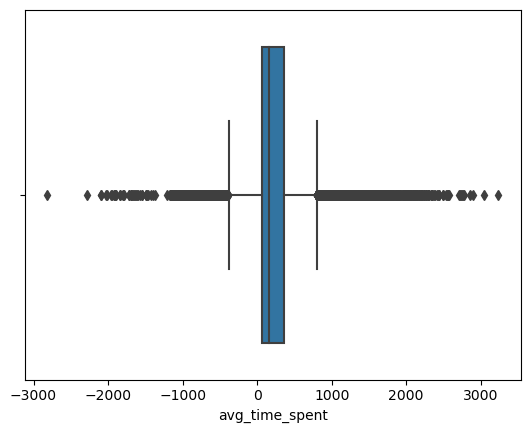

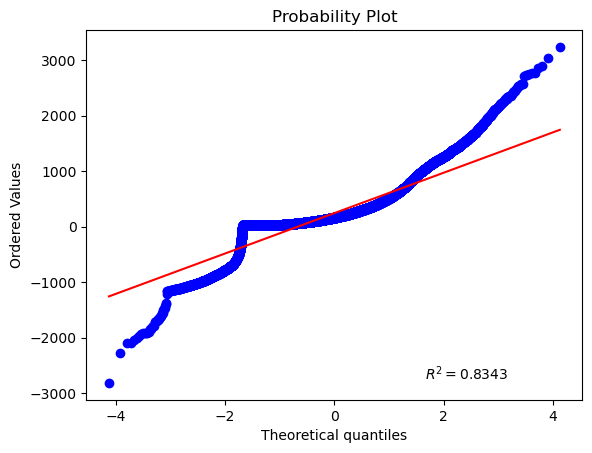

avg_transaction_value
Skewness: 1.0110271627457477
Kurtosis: 1.428287011596547


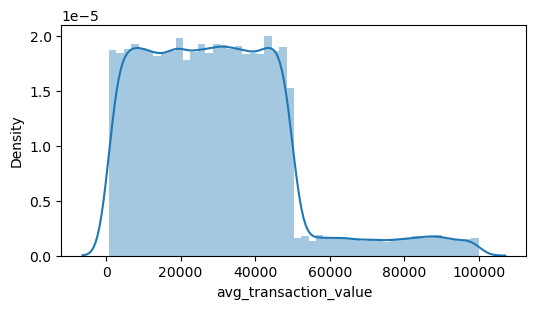

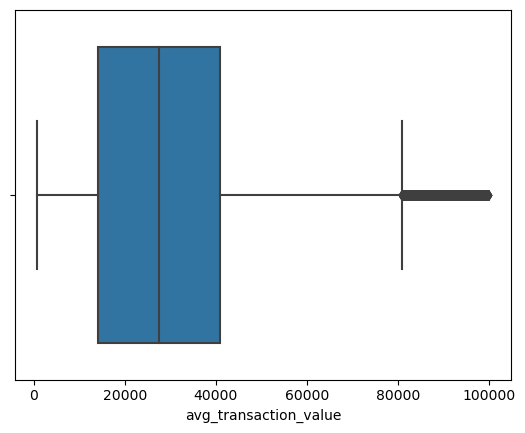

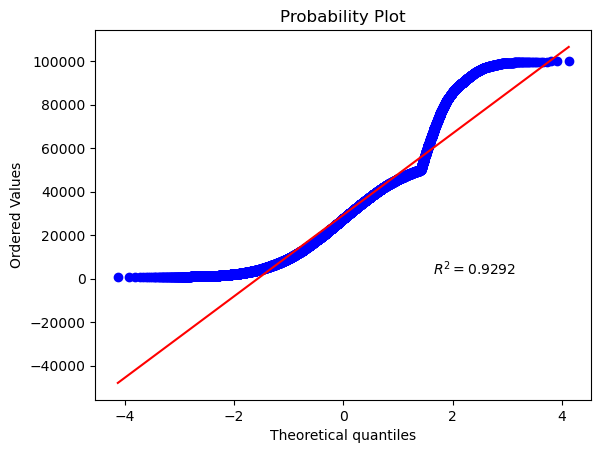

points_in_wallet
Skewness: -0.08432910996827583
Kurtosis: 5.187655737792314


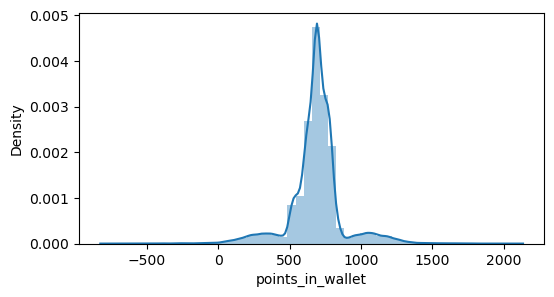

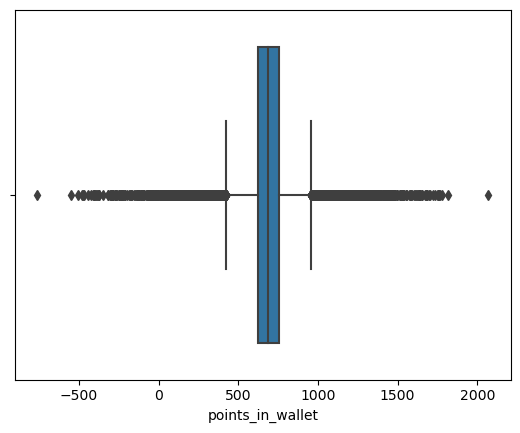

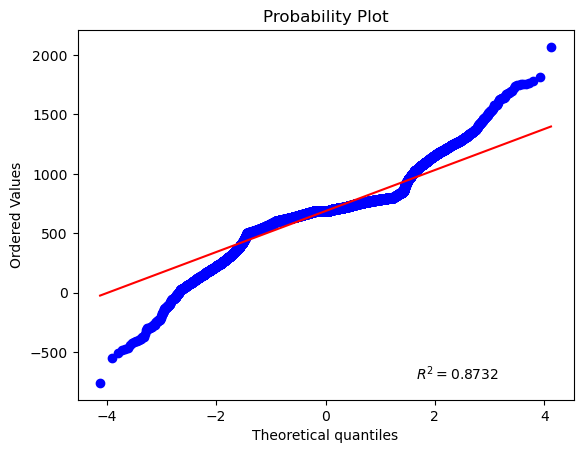

In [14]:
for col in df.columns:
    if col not in ['churn_risk_score']:
        if df[col].dtypes != 'object':
            print(col)
            print("Skewness:",df[col].skew())
            print("Kurtosis:",df[col].kurt())
            plt.figure(figsize=(6,3))
            sns.distplot(df[col])
            plt.show()
            sns.boxplot(x=col,data=df)
            plt.show()
            scipy.stats.probplot(df[col],rvalue=True,plot=plt)
            plt.show()

In [15]:
from sklearn.impute import SimpleImputer
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    
    # Drop unnecessary column
    df = df.drop(columns=['customer_id', 'Name', 'security_no', 'referral_id'], axis = 1)
    
    return df
# no effect to the original data
df = preprocessing_data(df.copy())

In [16]:
outlier_columns = ['days_since_last_login','avg_time_spent','avg_transaction_value','points_in_wallet']
for col in outlier_columns:
    lower_limit, upper_limit = df[col].quantile([0.25,0.75])
    IQR = upper_limit - lower_limit
    lower_whisker = lower_limit - 1.5 * IQR
    upper_whisker = upper_limit + 1.5 * IQR
    df[col] = np.where(df[col]<lower_whisker,lower_whisker,np.where(df[col]>upper_whisker,upper_whisker,df[col]))

## Feature Extraction

In [17]:
df['joining_date'] = pd.to_datetime(df['joining_date'])

In [18]:
df['joining_day'] = df['joining_date'].dt.day
df['joining_year'] = df['joining_date'].dt.year
df['joining_month'] = df['joining_date'].dt.month
df['joining_day_of_week'] = df['joining_date'].dt.dayofweek
df['is_joining_day_weekend'] = np.where(df['joining_date'].isin([5,6]),1,0)

In [19]:
df['last_visit_time'] = pd.to_datetime(df['last_visit_time'])

In [20]:
df['last_visit_hour'] = df['last_visit_time'].dt.hour
df['last_visit_min'] = df['last_visit_time'].dt.minute
df['last_visit_second'] = df['last_visit_time'].dt.second

In [21]:
df.drop(['joining_date','last_visit_time'],axis=1,inplace=True)

## Feature Exploration

<AxesSubplot:xlabel='churn_risk_score', ylabel='count'>

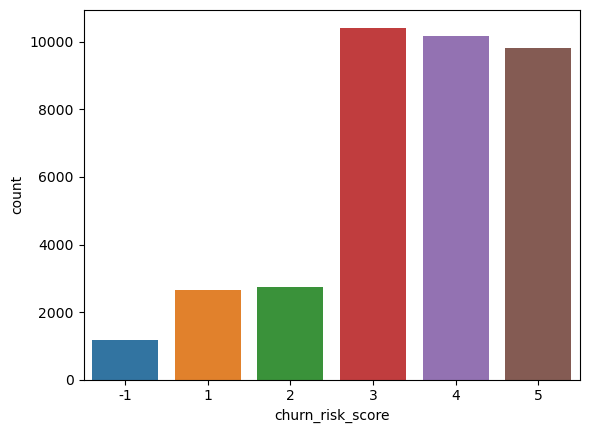

In [22]:
sns.countplot(data=df,x='churn_risk_score')

The classes of the target label seem to be pretty balanced so there is no risk of imbalanced classification.

In [23]:
# sns.pairplot(df,hue='churn_risk_score')

In [24]:
def plot_pie_chart(data):
    values = data.value_counts().values
    labels = data.value_counts().keys()
    plt.figure(figsize=(8,6),dpi=100)
    plt.pie(values,labels=labels,shadow=True,autopct='%1.2f%%')
    plt.show();

gender :


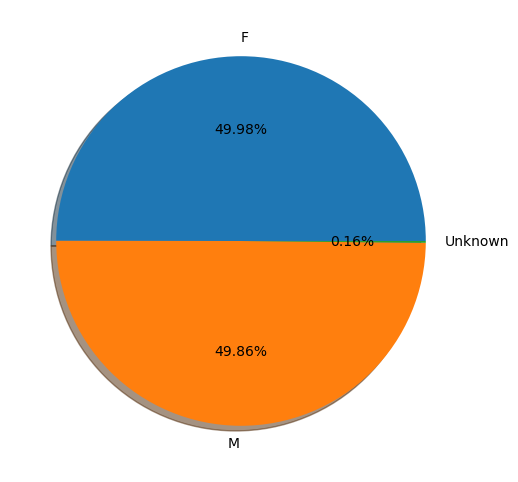

region_category :


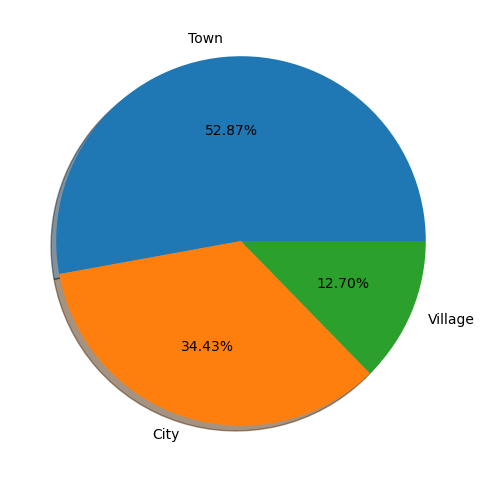

membership_category :


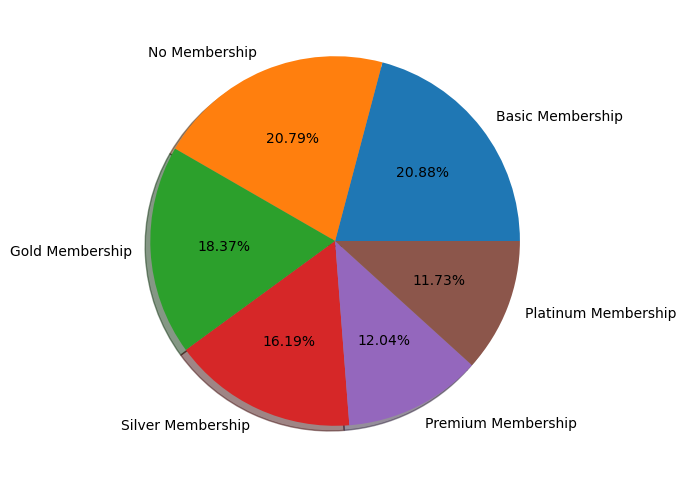

joined_through_referral :


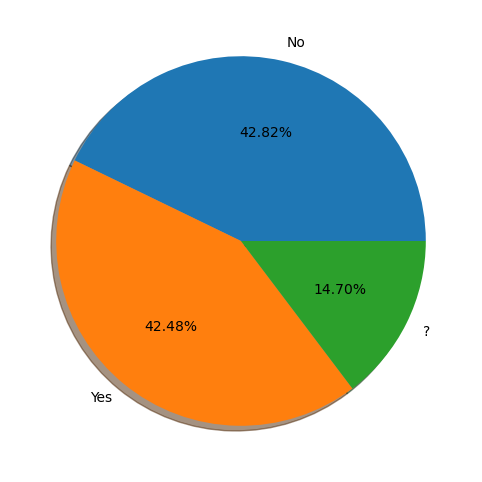

preferred_offer_types :


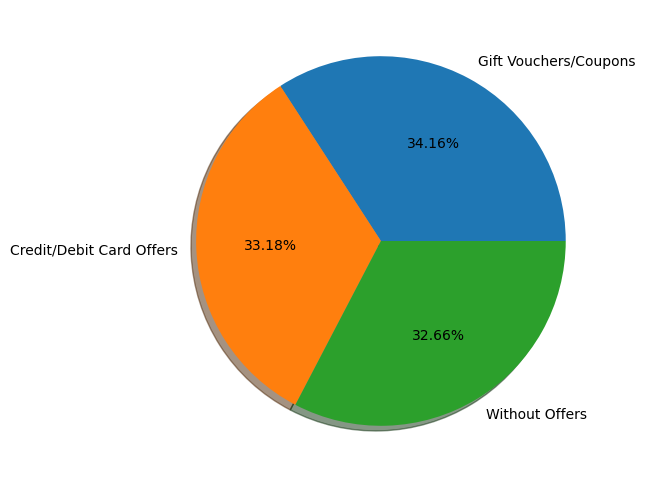

medium_of_operation :


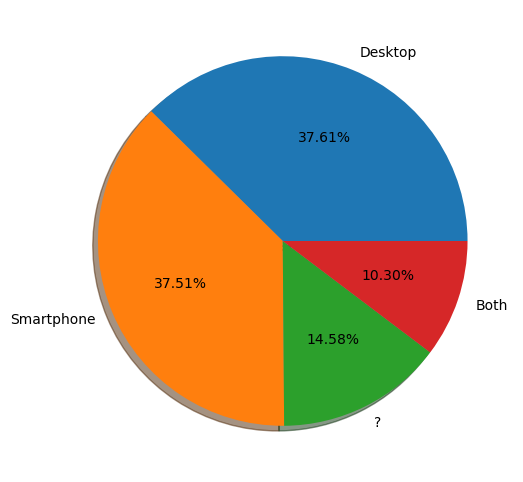

internet_option :


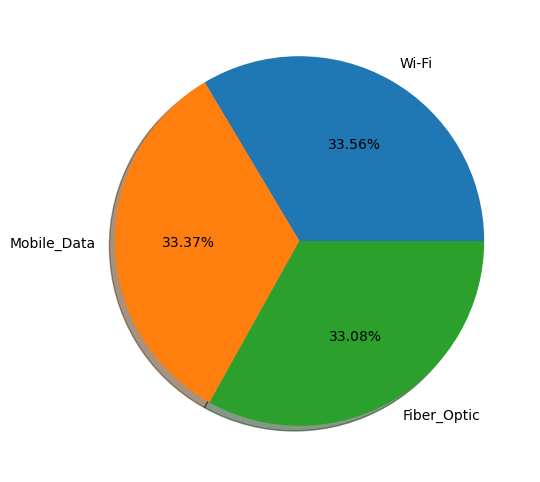

used_special_discount :


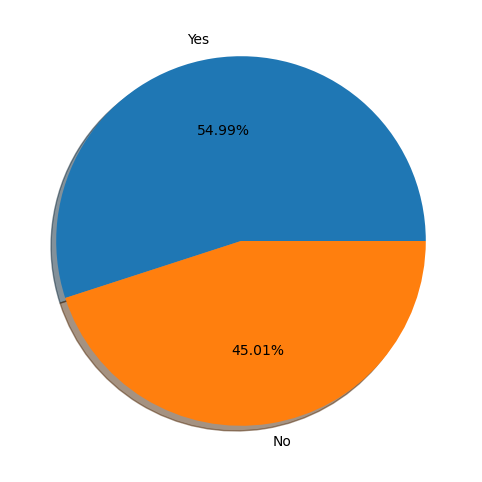

offer_application_preference :


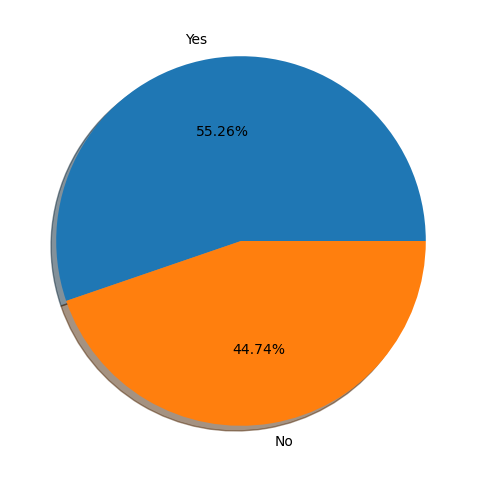

past_complaint :


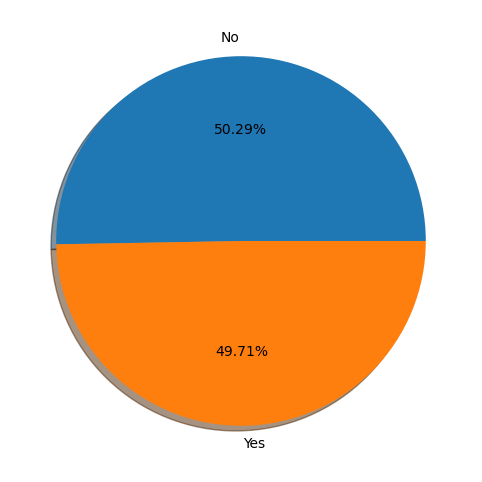

complaint_status :


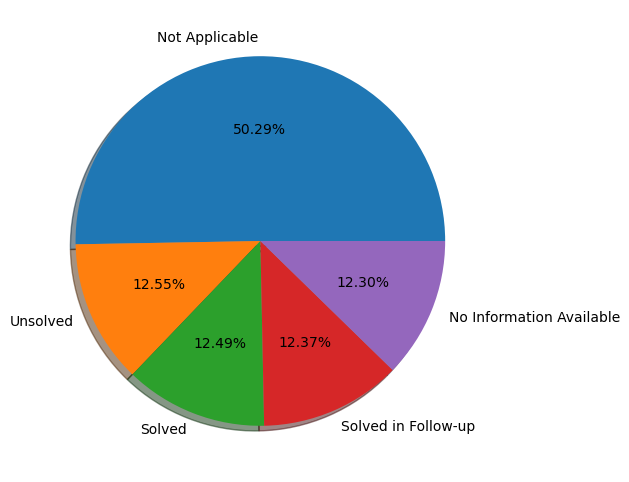

feedback :


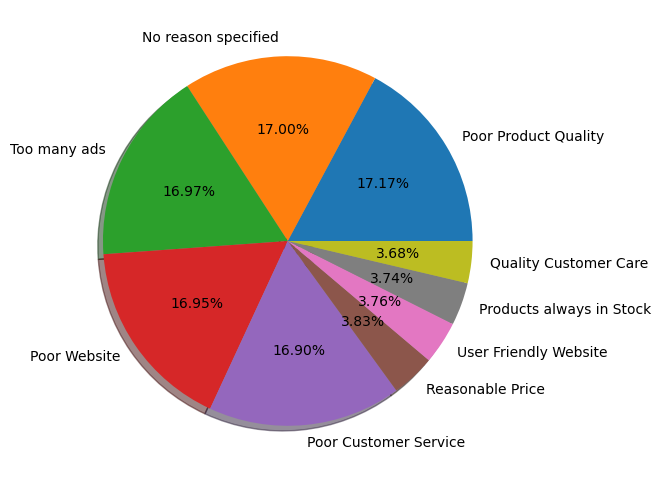

In [25]:
for col in df.columns:
    if col not in ['avg_frequency_login_days']:
        if df[col].dtypes == 'object':
            print(col,':')
            plot_pie_chart(df[col])

## Categorical Encoding

In [26]:
df.gender.replace(['F','M','Unknown'],[0,1,-1],inplace=True)
df.gender = df.gender.astype(int)

In [27]:
df.select_dtypes(object).columns

Index(['region_category', 'membership_category', 'joined_through_referral',
       'preferred_offer_types', 'medium_of_operation', 'internet_option',
       'avg_frequency_login_days', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback'],
      dtype='object')

In [28]:
df.joined_through_referral.replace(['No','Yes','?'],[0,1,-1],inplace=True)
df.joined_through_referral = df.joined_through_referral.astype(int)

In [29]:
df.medium_of_operation.replace('?','Unknown',inplace=True)

In [30]:
df = df[df['avg_time_spent']>0]
df = df[df['days_since_last_login']>0]

In [31]:
avg_login_freq_days = df.avg_frequency_login_days.value_counts()[1:].keys()
avg_login_freq_days

Index(['13.0', '14.0', '17.0', '8.0', '6.0', '19.0', '10.0', '12.0', '15.0',
       '16.0',
       ...
       '35.73926205967174', '39.20630869831612', '48.186739651407734',
       '39.16663275475858', '31.666436523698707', '35.5643232811194',
       '5.517470005708095', '-12.642470963698166', '37.00181137510583',
       '27.8399274405269'],
      dtype='object', name='avg_frequency_login_days', length=1482)

In [56]:
df['avg_frequency_login_days']

0        17.0
1        10.0
2        22.0
3         6.0
4        16.0
         ... 
36985     7.0
36986    16.0
36989     NaN
36990    20.0
36991     NaN
Name: avg_frequency_login_days, Length: 33358, dtype: float64

In [54]:
avg_login_freq_days

[13.0,
 14.0,
 17.0,
 8.0,
 6.0,
 19.0,
 10.0,
 12.0,
 15.0,
 16.0,
 18.0,
 9.0,
 7.0,
 5.0,
 11.0,
 27.0,
 23.0,
 29.0,
 28.0,
 25.0,
 20.0,
 24.0,
 26.0,
 21.0,
 22.0,
 4.0,
 3.0,
 1.0,
 2.0,
 30.0,
 8.430706459774143,
 5.511716737114206,
 46.4460969405724,
 17.0796846361621,
 1.8798085641836906,
 24.684388763525515,
 48.489124599555595,
 4.842593978091244,
 28.162823905917286,
 2.97022242868195,
 32.46020929108708,
 28.353742782200527,
 44.01452225982705,
 49.367937110670574,
 4.202424119459515,
 41.921314124356286,
 11.068190251576336,
 45.882520625393546,
 51.05760303514481,
 46.469712907868995,
 38.813886528317504,
 1.019892207248077,
 31.9657835633503,
 51.94390500778459,
 20.369213856486944,
 37.4371833356702,
 31.24158144568613,
 48.93454967322458,
 9.297071675142192,
 33.359216818646345,
 50.87485175027227,
 0.030449213491877458,
 34.260631010078036,
 3.736415849077286,
 45.50716334560055,
 30.549905022570947,
 52.51652701125662,
 52.192646853784034,
 37.193961316572924,
 20.

In [32]:
avg_login_freq_days = avg_login_freq_days.str.replace('-','')

In [33]:
avg_login_freq_days = [float(x) for x in avg_login_freq_days]
imp_val = np.mean(avg_login_freq_days)
df.avg_frequency_login_days.replace('Error',imp_val,inplace=True)
df.avg_frequency_login_days = df.avg_frequency_login_days.str.replace('-','')
df.avg_frequency_login_days = df.avg_frequency_login_days.astype(np.float64)

In [34]:
df.complaint_status.replace(['Solved','Solved in Follow-up'],'Solved',inplace=True)
df.complaint_status.replace(['Not Applicable','No Information Available'],'Unknown',inplace=True)
df.complaint_status.replace(['Unknown','Solved','Unsolved'],[-1,1,0],inplace=True)
df.complaint_status = df.complaint_status.astype(int)

In [35]:
df.feedback.replace(['Poor Product Quality','Too many ads','Poor Website','Poor Customer Service'],-1,inplace=True)
df.feedback.replace(['Reasonable Price','User Friendly Website','Products always in Stock','Quality Customer Care'],1,inplace=True)
df.feedback.replace('No reason specified',0,inplace=True)
df.feedback = df.feedback.astype(int)

In [36]:
df.offer_application_preference.replace(['Yes','No'],[1,0],inplace=True)
df.offer_application_preference = df.offer_application_preference.astype(int)
df.past_complaint.replace(['Yes','No'],[1,0],inplace=True)
df.past_complaint = df.past_complaint.astype(int)
df.joined_through_referral.replace(['Yes','No'],[1,0],inplace=True)
df.joined_through_referral = df.joined_through_referral.astype(int)
df.used_special_discount.replace(['Yes','No'],[1,0],inplace=True)
df.used_special_discount = df.used_special_discount.astype(int)

In [37]:
df.drop('is_joining_day_weekend',axis=1,inplace=True)

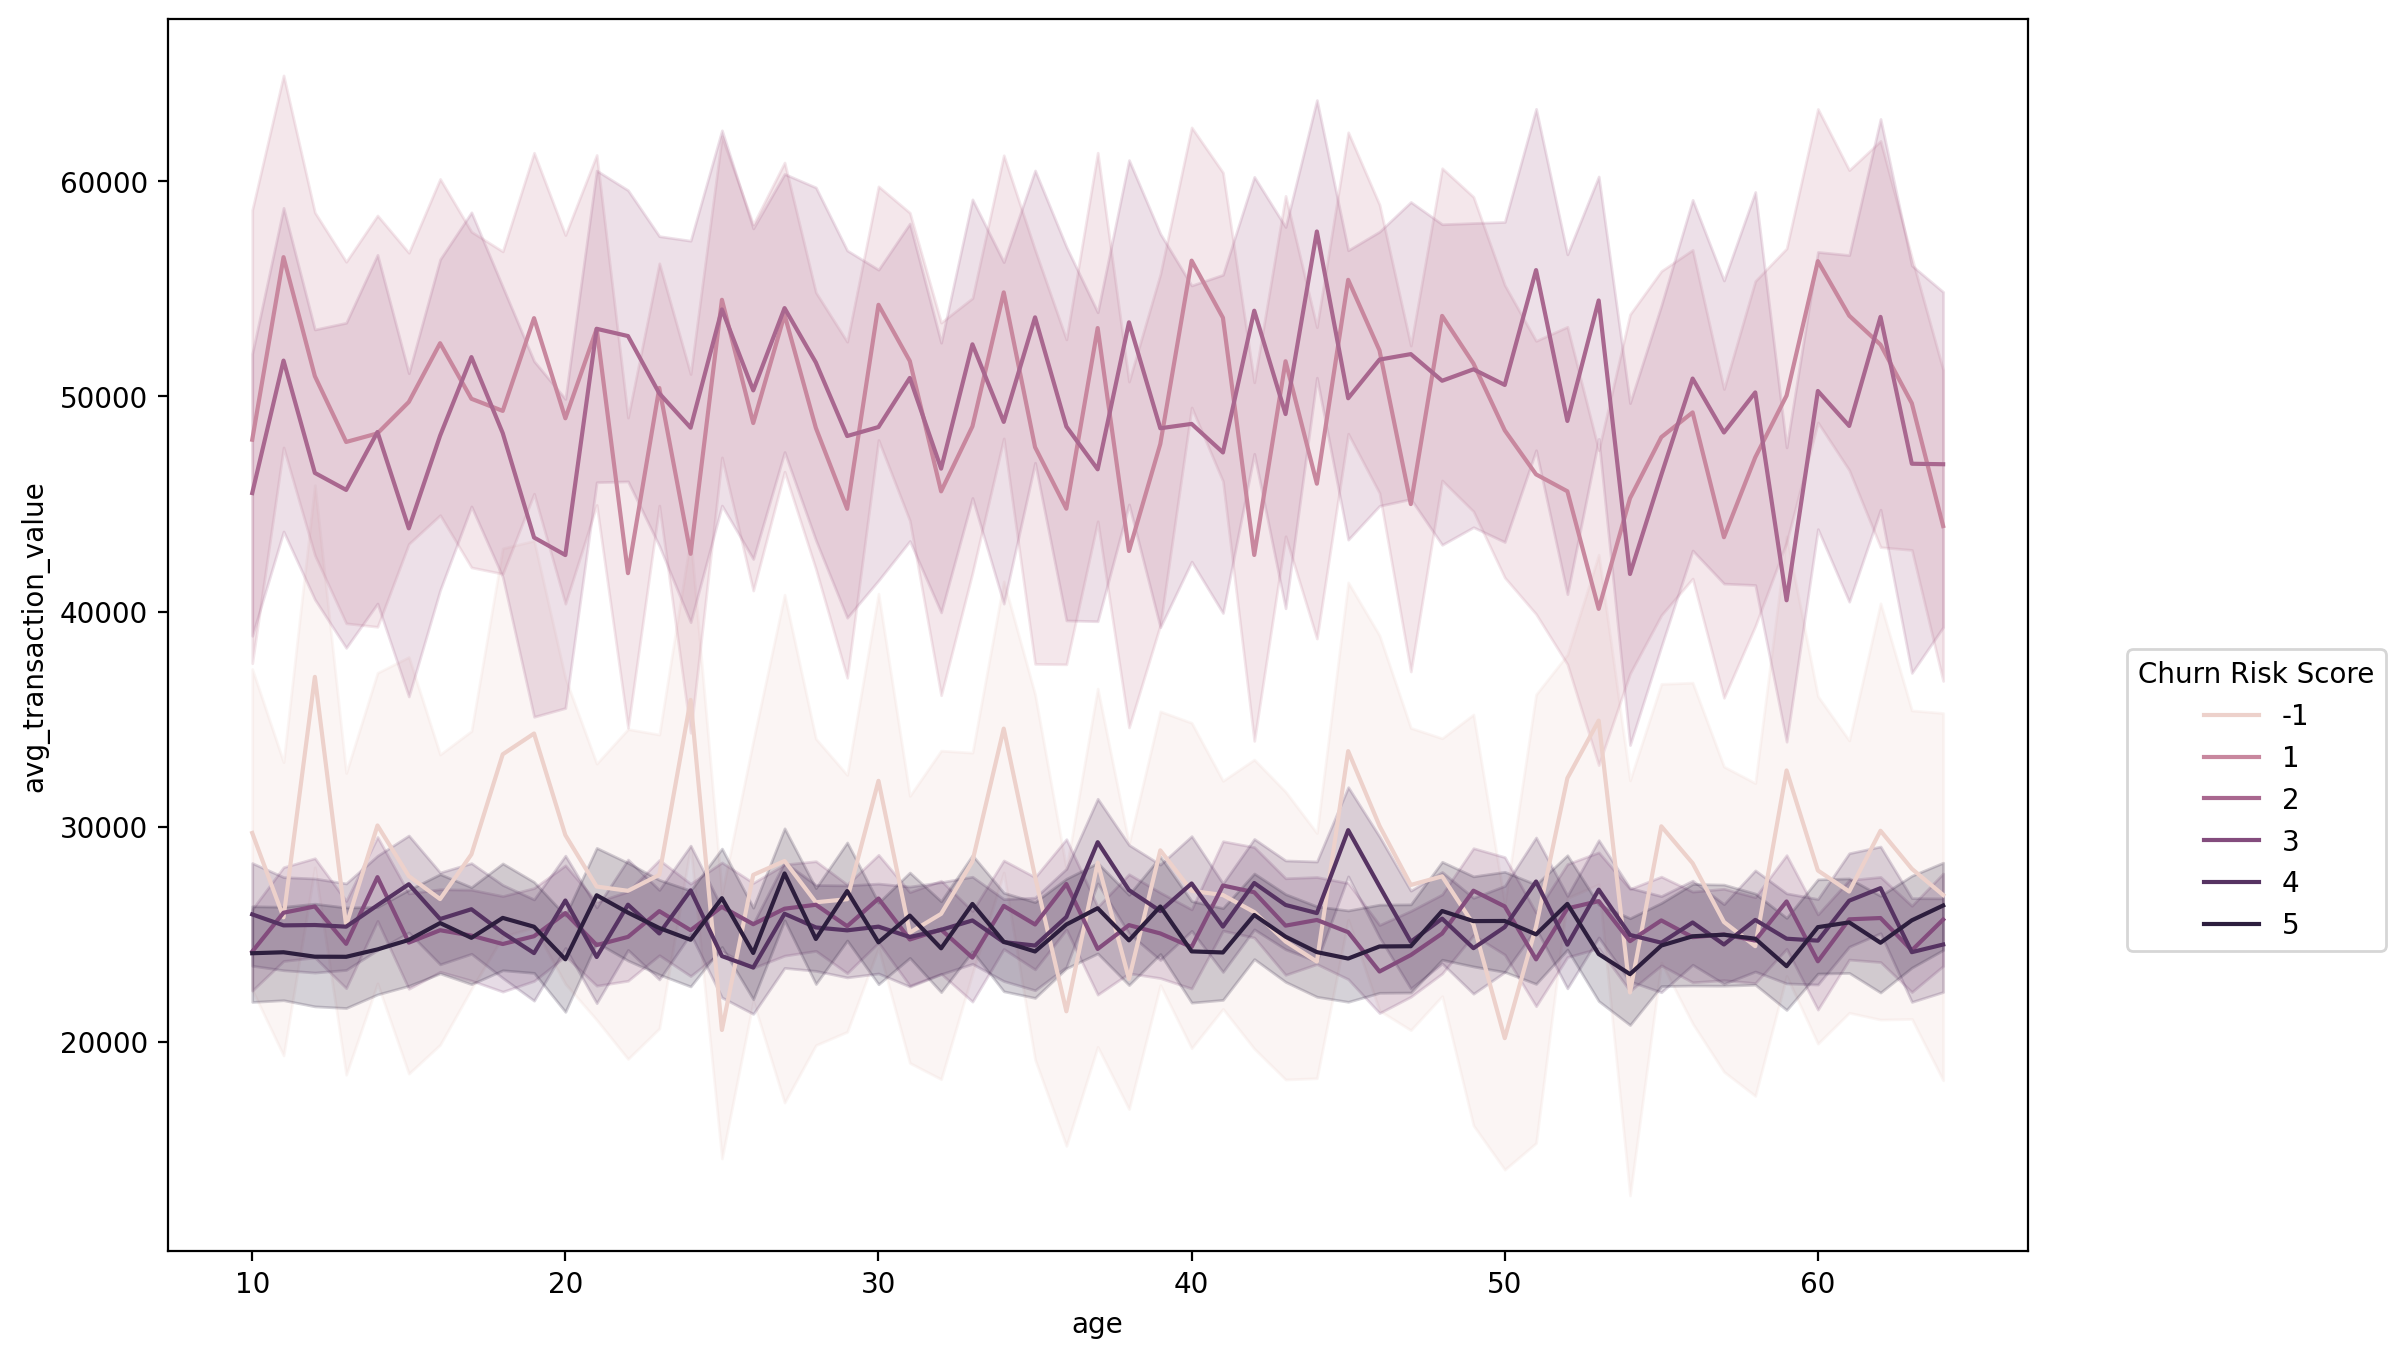

In [38]:
plt.figure(figsize=(12,8),dpi=200)
sns.lineplot(x='age',y='avg_transaction_value',data=df,hue='churn_risk_score')
plt.legend(bbox_to_anchor=(1.2,0.5),title="Churn Risk Score")

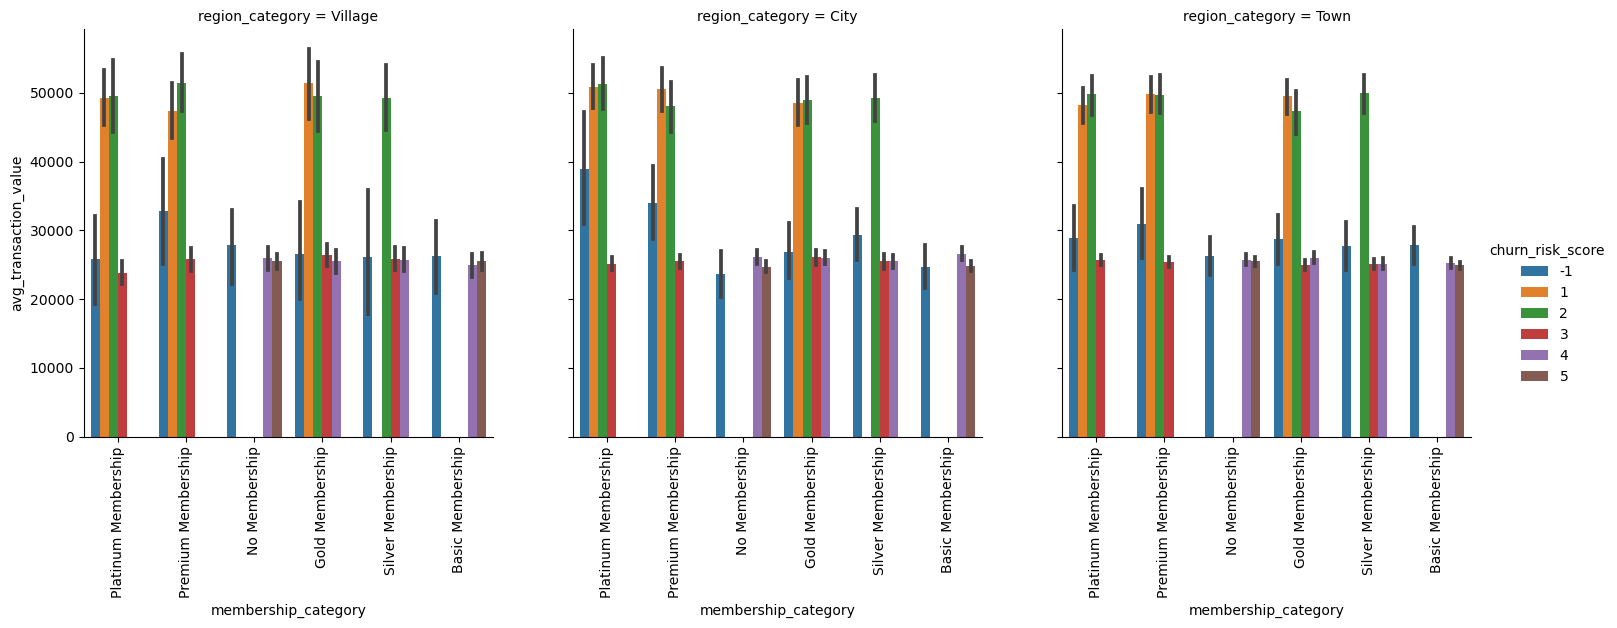

In [39]:
ax = sns.catplot(x='membership_category',y='avg_transaction_value',data=df,hue='churn_risk_score',col='region_category',kind='bar',height=5,aspect=1)

for g in ax.axes:
    ax.set_xticklabels(rotation=90)

It is clearly evident that the customers having Platinum and Premium membership have realistically no chance of churn. They are almost certain to stay for long term. Moreover, customers possessing Platinum and Premier membership have significant average transaction values.

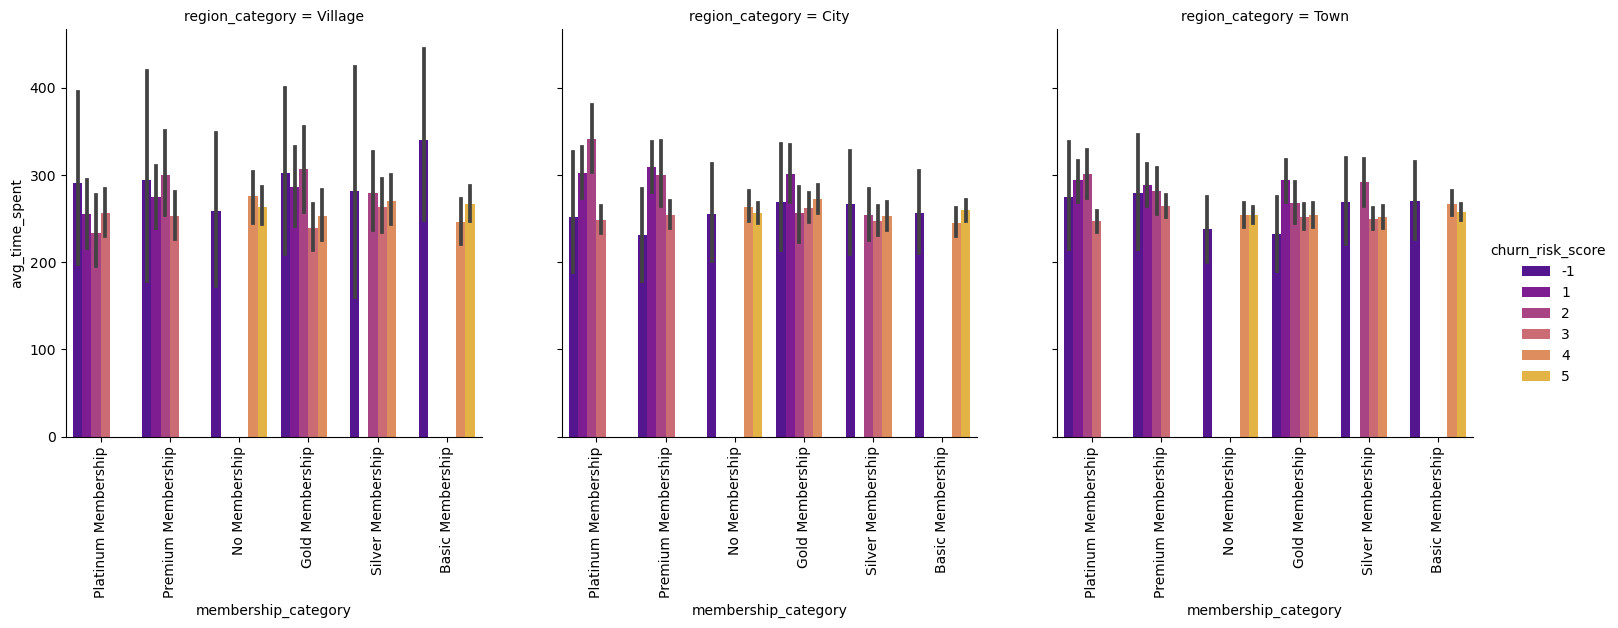

In [40]:
ax = sns.catplot(x='membership_category',y='avg_time_spent',data=df,hue='churn_risk_score',col='region_category',kind='bar',height=5,aspect=1,palette='plasma')

for g in ax.axes:
    ax.set_xticklabels(rotation=90)

Among the customers residing in villages who are unlikely to churn, the ones with basic membership spend the maximum amount of time on the company's online apps and websites whereas those with platinum membership expend the least.

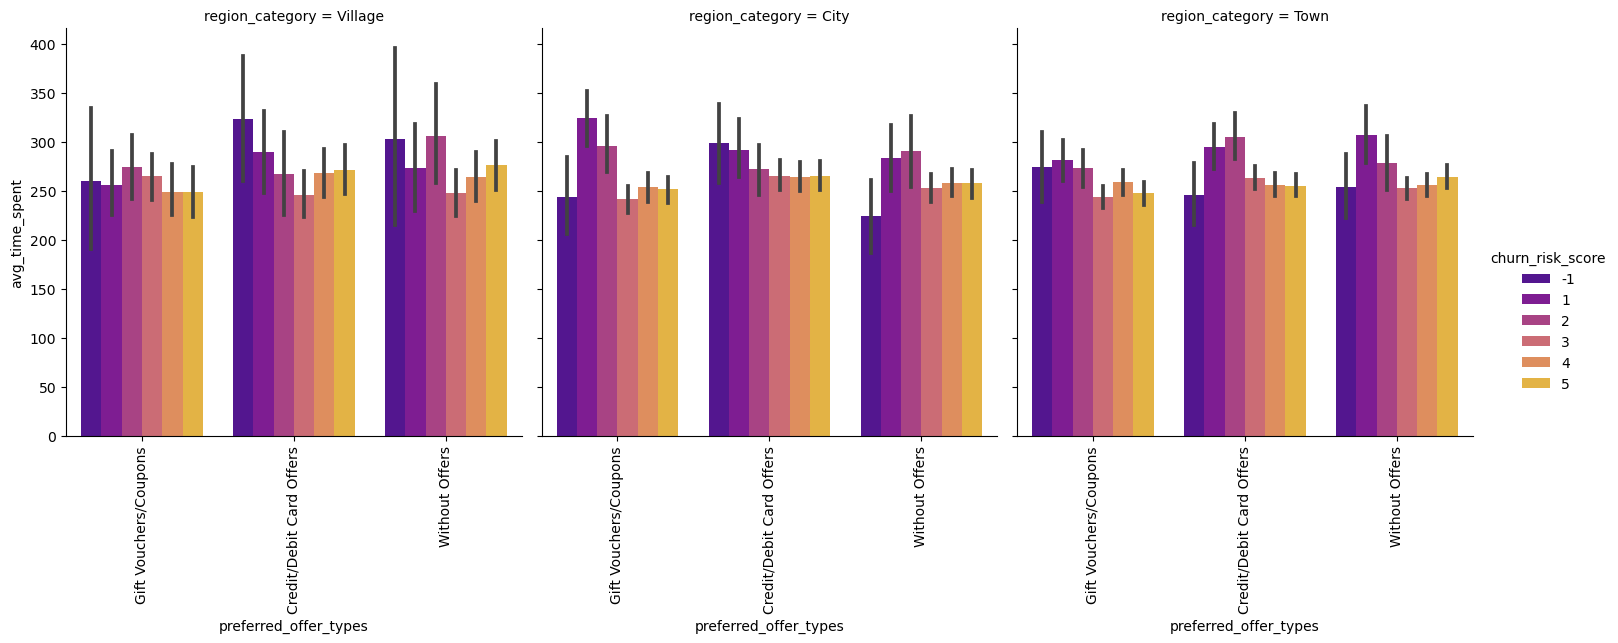

In [41]:
ax = sns.catplot(x='preferred_offer_types',y='avg_time_spent',data=df,hue='churn_risk_score',col='region_category',kind='bar',height=5,aspect=1,palette='plasma')

for g in ax.axes:
    ax.set_xticklabels(rotation=90)

In both cities as well as towns, the customers whose preferred offer type is "Credit/Debit Card Offers" spend a signficant amount of time on company's online platforms. However, as far as the customers living in villages are concerned, those without any offers expend the maximum amount of time on the company's online platforms.

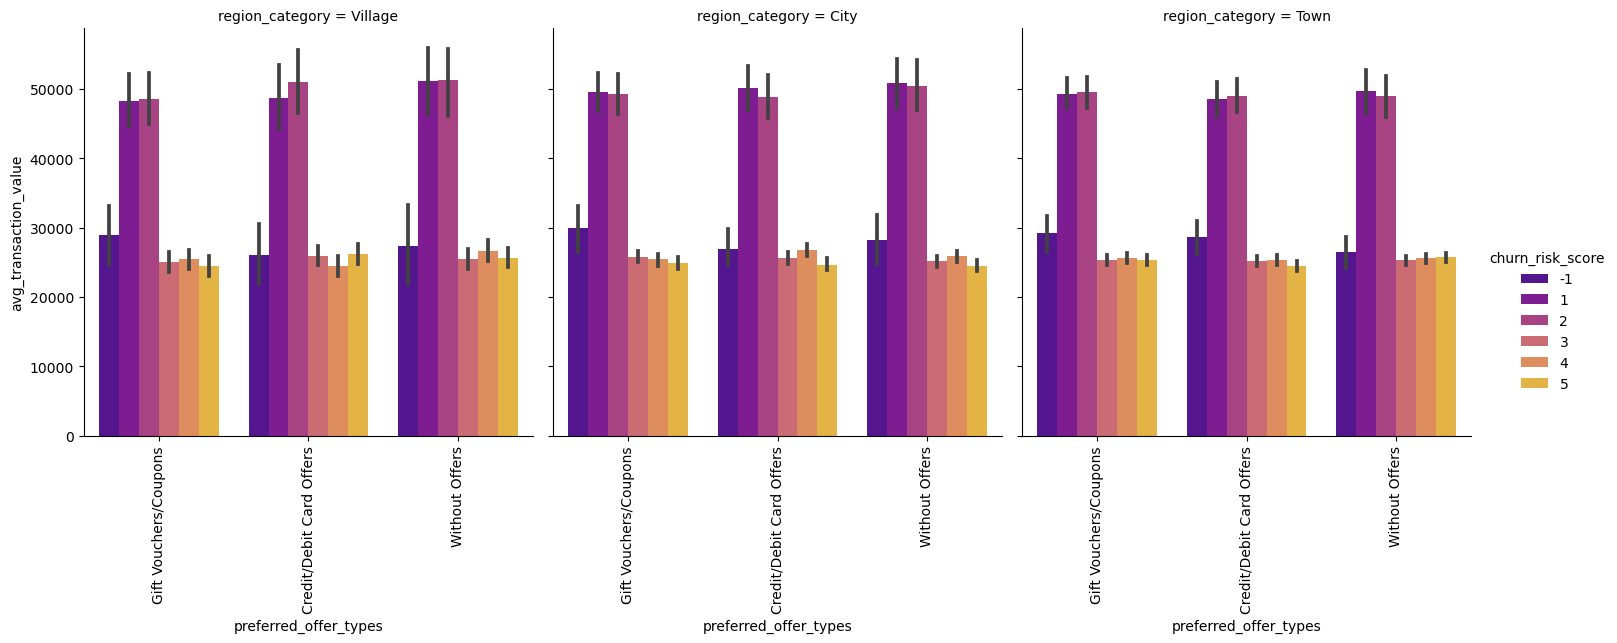

In [42]:
ax = sns.catplot(x='preferred_offer_types',y='avg_transaction_value',data=df,hue='churn_risk_score',col='region_category',kind='bar',height=5,aspect=1,palette='plasma')

for g in ax.axes:
    ax.set_xticklabels(rotation=90)

At an average, the customers who prefer "Gift Vouchers/Coupens" are the ones who spend the highest amount of money on the company's products and services.

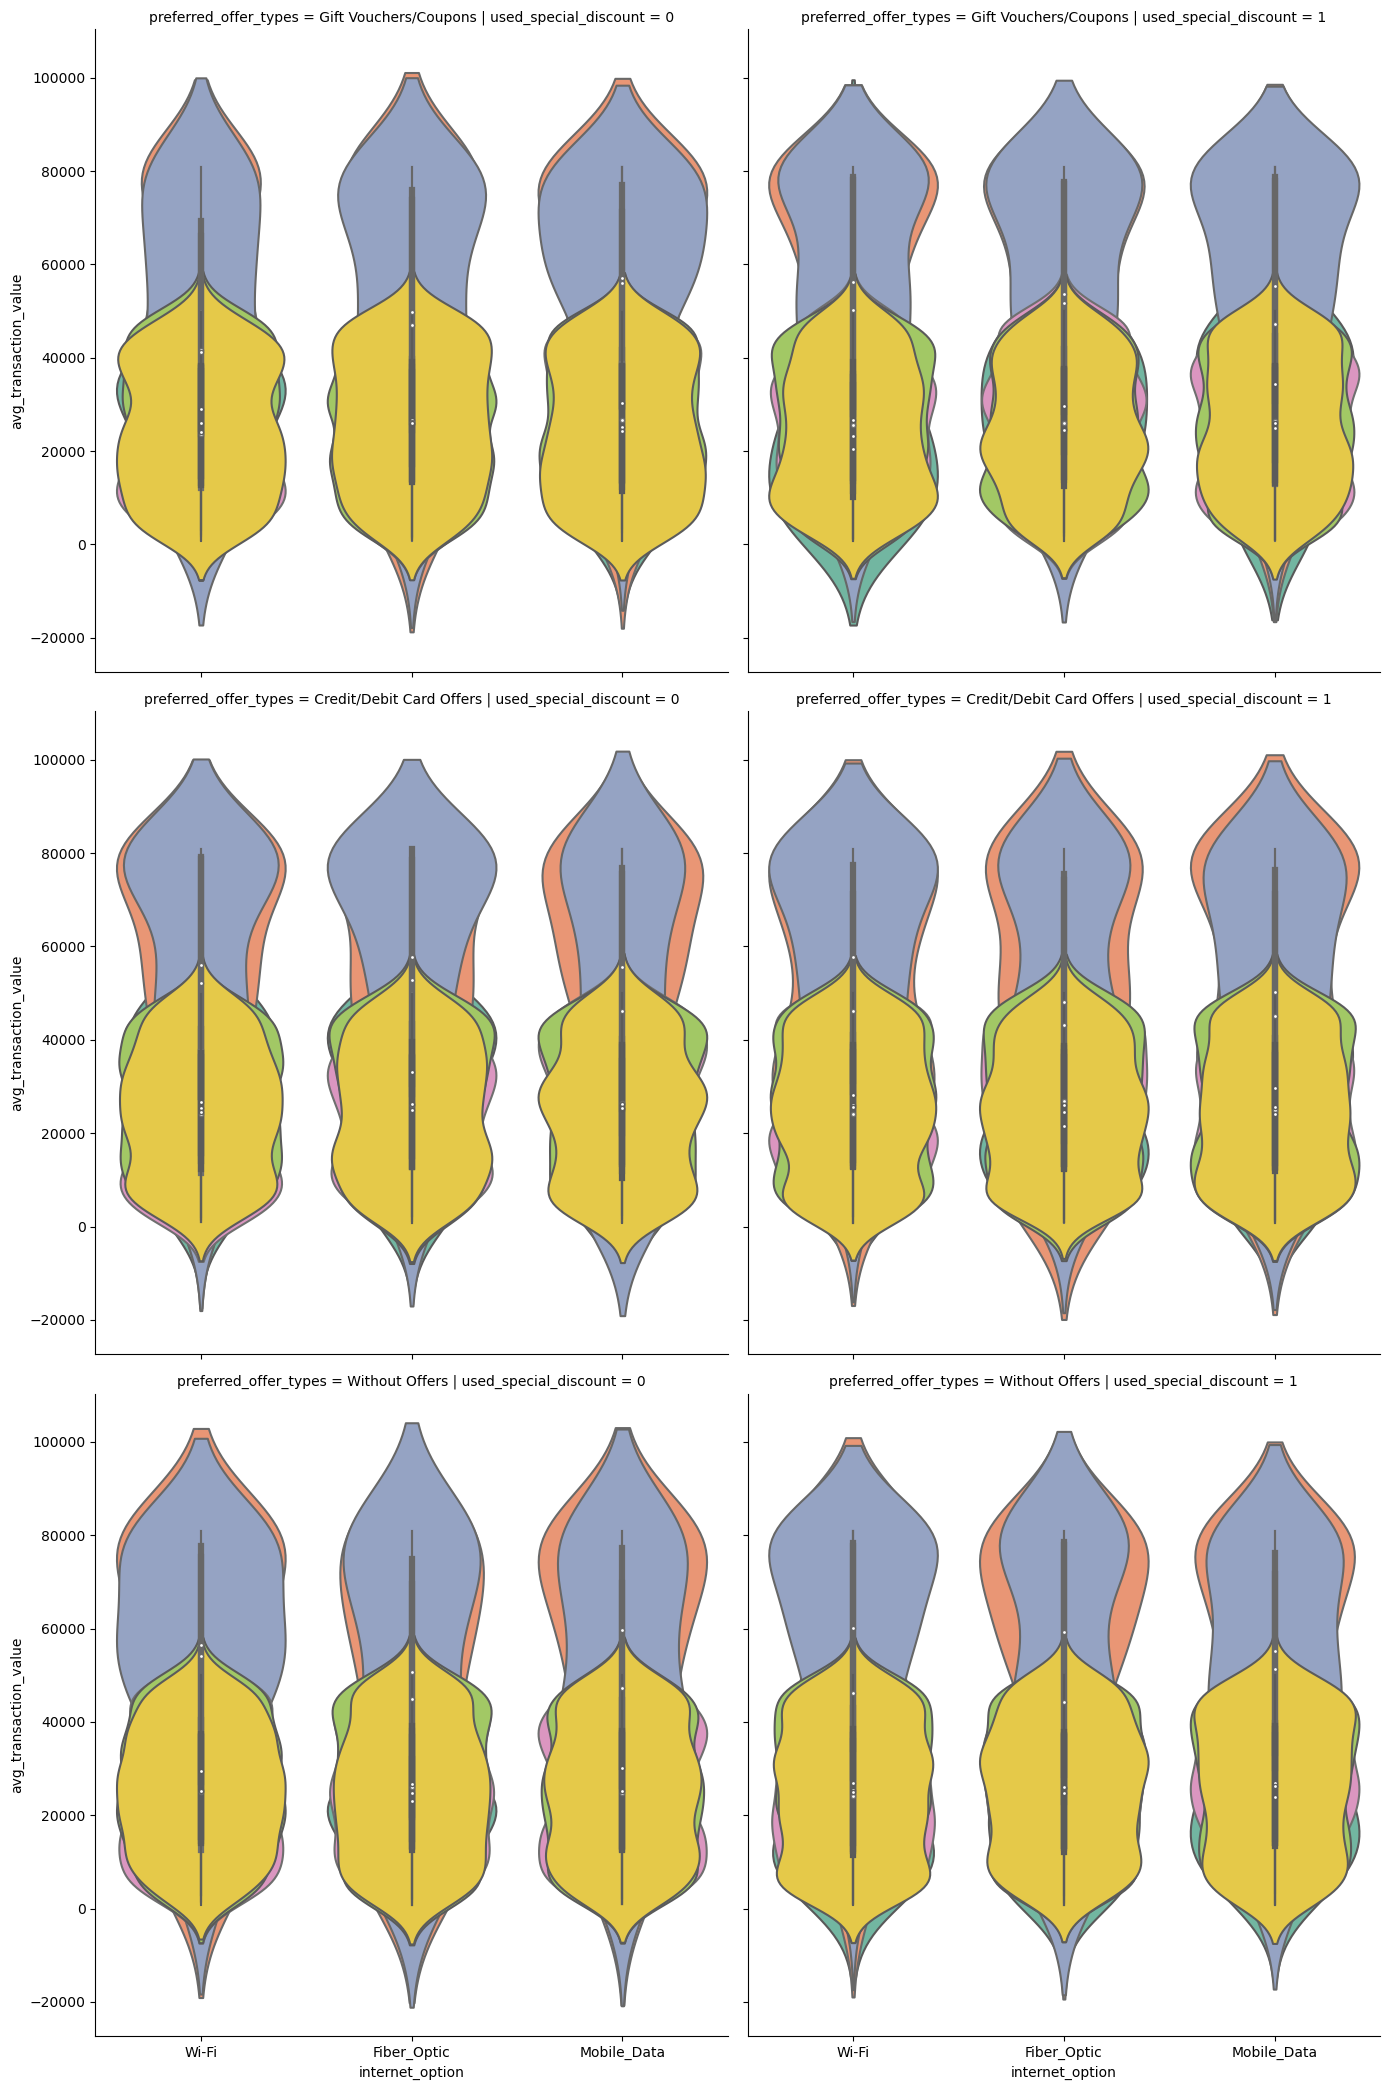

In [43]:
g = sns.FacetGrid(df,row='preferred_offer_types',col='used_special_discount',hue='churn_risk_score',palette='Set2',height=7,aspect=1)
g.map(sns.violinplot,'internet_option','avg_transaction_value')

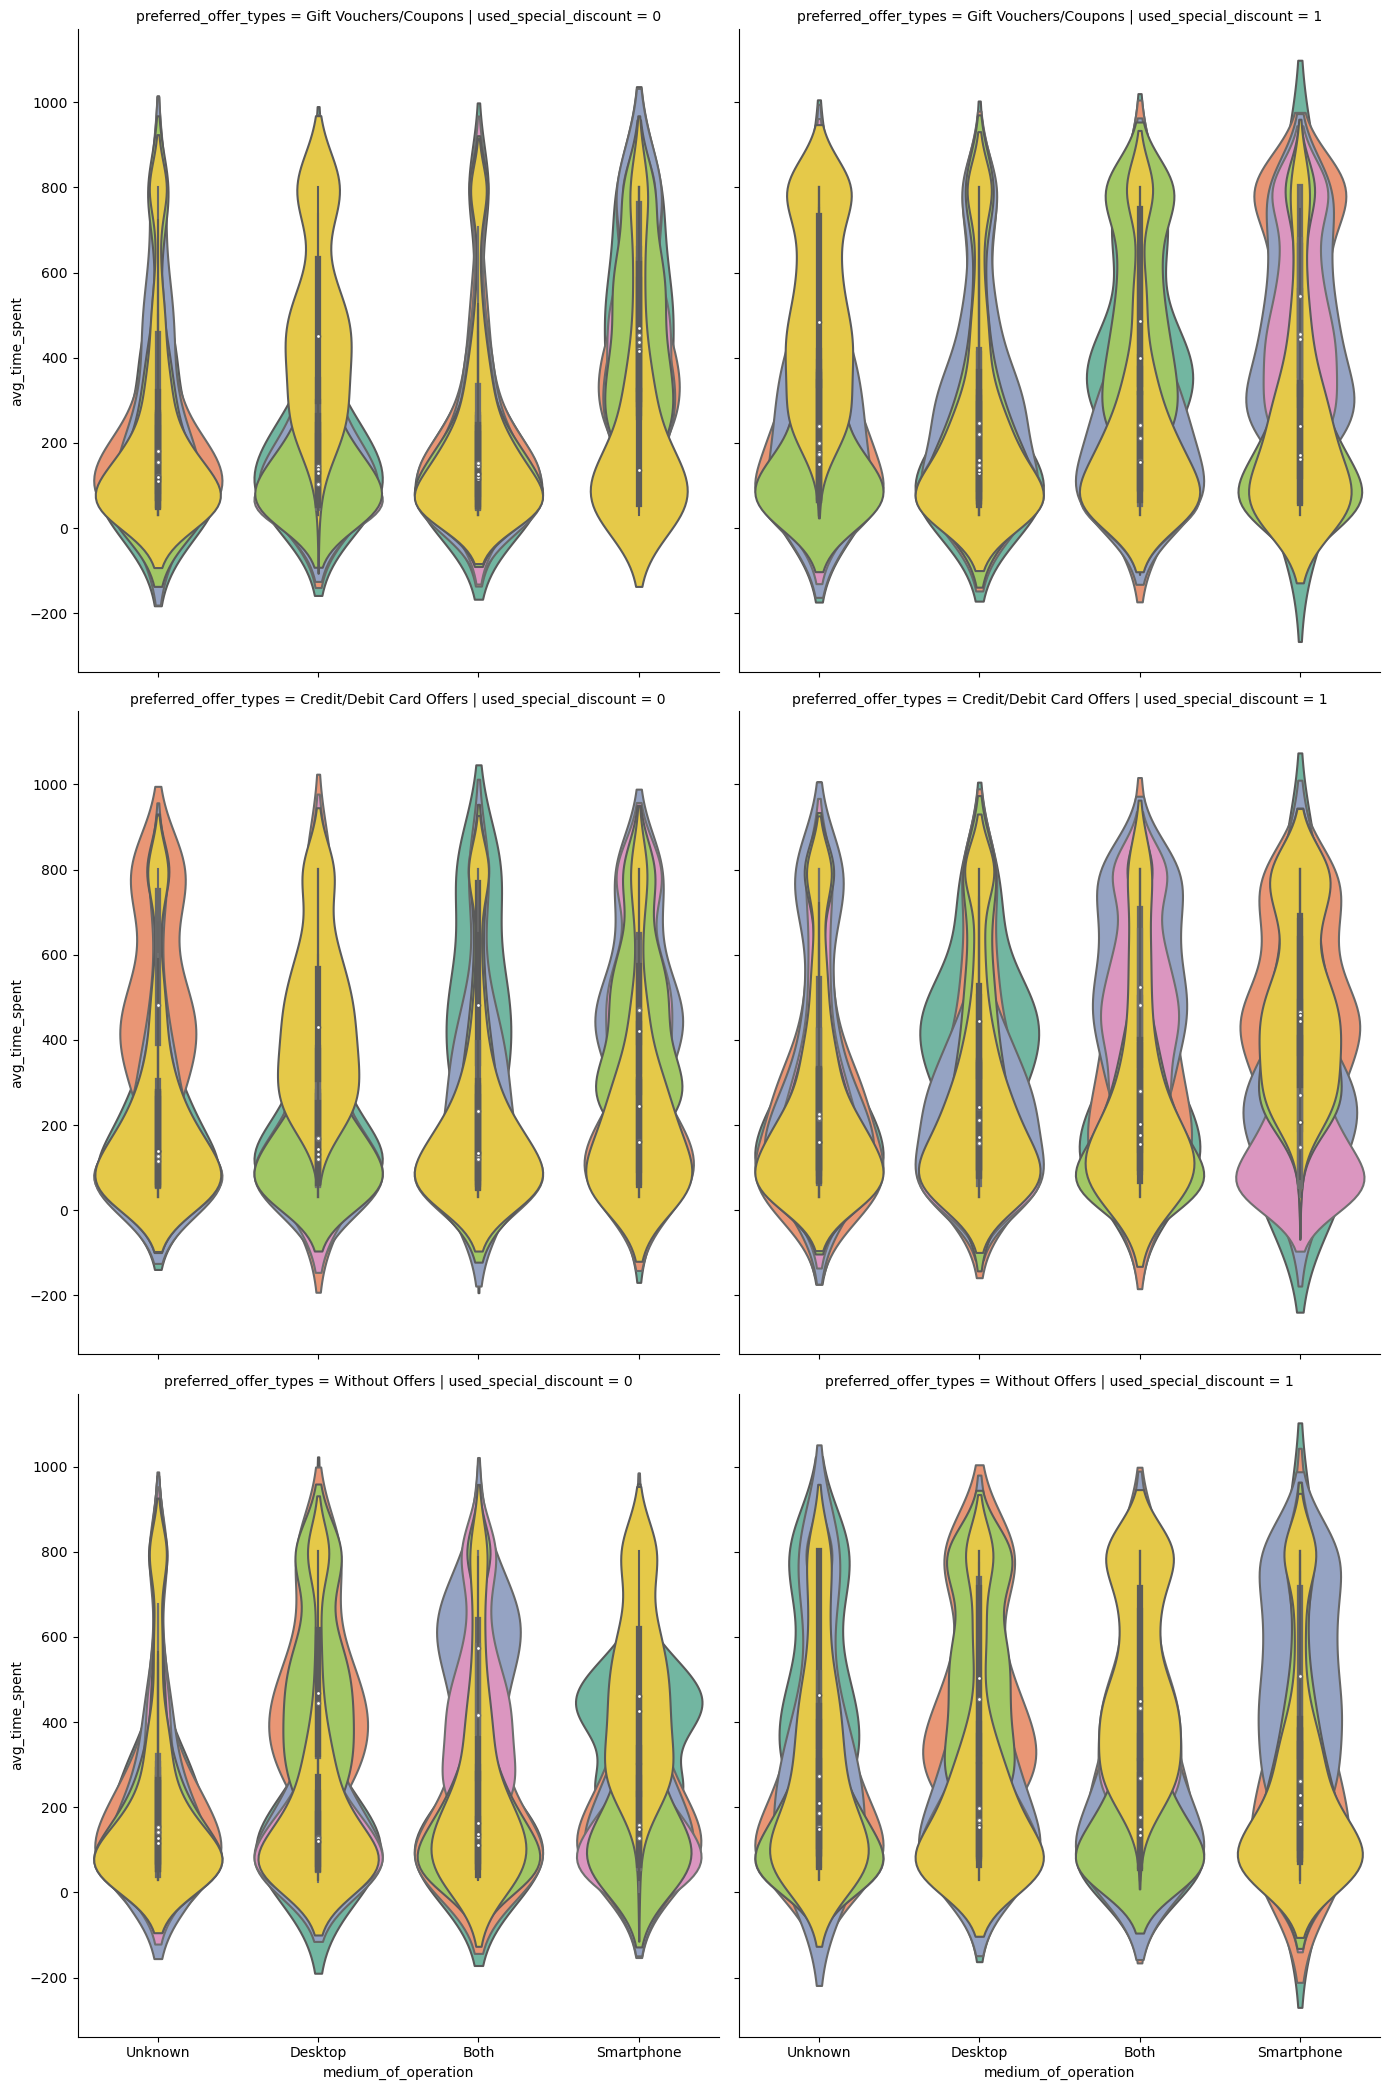

In [44]:
g = sns.FacetGrid(df,row='preferred_offer_types',col='used_special_discount',hue='churn_risk_score',palette='Set2',height=7,aspect=1)
g.map(sns.violinplot,'medium_of_operation','avg_time_spent')

In [45]:
dummy_col = ['region_category', 'membership_category','preferred_offer_types', 'medium_of_operation', 'internet_option']

In [46]:
for col in dummy_col:
    print(col,':')
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    df[col] = df[col].astype(int)
    print(encoder.classes_, encoder.transform(encoder.classes_))

region_category :
['City' 'Town' 'Village'] [0 1 2]
membership_category :
['Basic Membership' 'Gold Membership' 'No Membership'
 'Platinum Membership' 'Premium Membership' 'Silver Membership'] [0 1 2 3 4 5]
preferred_offer_types :
['Credit/Debit Card Offers' 'Gift Vouchers/Coupons' 'Without Offers'] [0 1 2]
medium_of_operation :
['Both' 'Desktop' 'Smartphone' 'Unknown'] [0 1 2 3]
internet_option :
['Fiber_Optic' 'Mobile_Data' 'Wi-Fi'] [0 1 2]


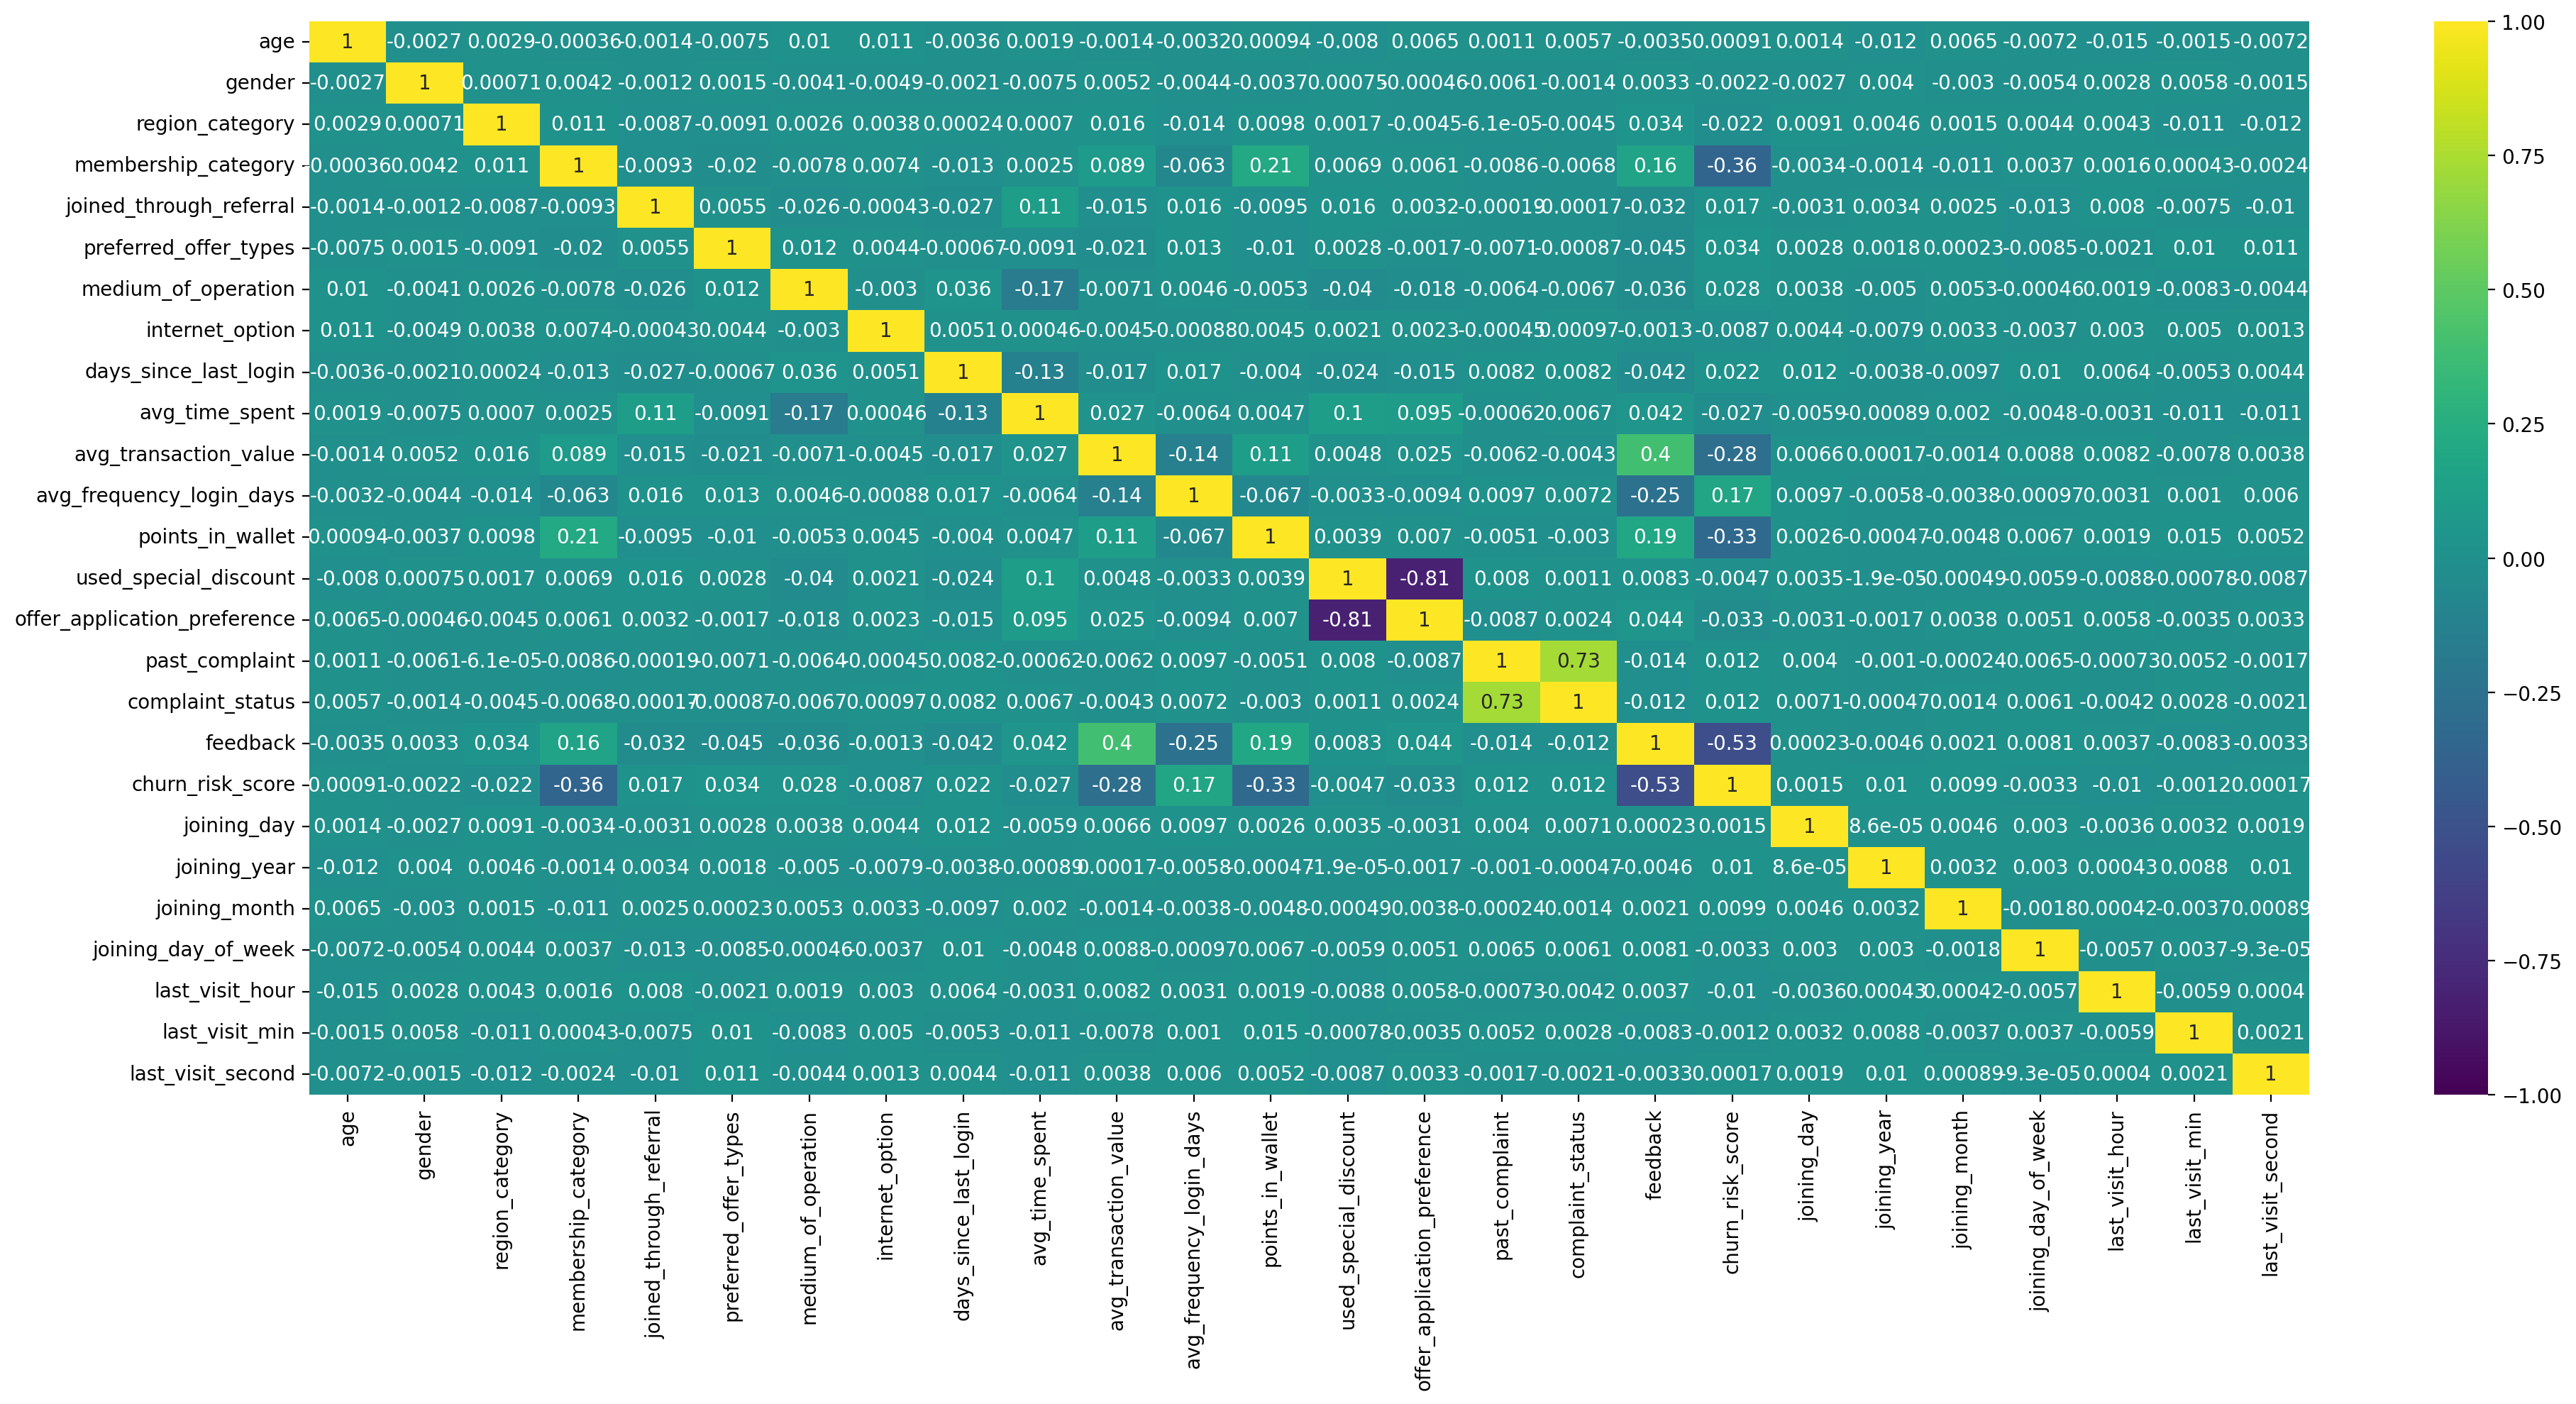

In [47]:
plt.figure(figsize=(20,10),dpi=200)
sns.heatmap(df.corr(),annot=True,cmap='viridis',vmin=-1,vmax=1)
plt.tight_layout()

## Splitting the dataset into feature columns and the target label

In [48]:
X = df.drop('churn_risk_score',axis=1)
y = df.churn_risk_score

In [49]:
X.avg_frequency_login_days.fillna(X.avg_frequency_login_days.mean(),inplace=True)

## Feature Scaling

In [50]:
scaler = StandardScaler()
features = X.columns
X = scaler.fit_transform(X.values)
X = pd.DataFrame(X,columns=features)
X.head()

age    gender  region_category  membership_category   
0 -1.204789 -0.986044         1.868809             0.435008  \
1 -0.322106 -0.986044        -1.203930             1.010522   
2  0.434478 -0.986044         0.332439            -0.140506   
3 -0.006863  1.002136        -1.203930            -0.140506   
4 -0.385155 -0.986044        -1.203930            -0.140506   

   joined_through_referral  preferred_offer_types  medium_of_operation   
0                -0.396803               0.006201             1.663530  \
1                -1.819784               0.006201            -0.653368   
2                 1.026178               0.006201            -0.653368   
3                 1.026178               0.006201            -0.653368   
4                -0.396803              -1.225137             0.505081   

   internet_option  days_since_last_login  avg_time_spent  ...   
0         1.219684               0.760478        0.163933  ...  \
1        -0.003851               0.580872        0.187749  ...   
2         1.219684               0.221658        1.062879  ...   
3        -0.003851              -0.317163       -0.867771  ...   
4        -0.003851               1.299299       -0.618103  ...   

   past_complaint  complaint_status  feedback  joining_day  joining_year   
0       -0.993188         -0.728082  2.059661     0.149145      1.211944  \
1        1.006858          1.607577  2.059661     1.398732      1.211944   
2        1.006858          1.607577 -0.634593    -0.532448     -0.009336   
3        1.006858          0.439748 -0.634593     1.512331     -0.009336   
4        1.006858          1.607577 -0.634593    -0.418849      1.211944   

   joining_month  joining_day_of_week  last_visit_hour  last_visit_min   
0       0.422288            -0.001230         0.645468       -1.251851  \
1       0.422288            -1.502334         0.067344        0.481584   
2       1.290853             0.499138         1.512654        1.348301   
3       1.001332             0.999506         0.500937        1.579426   
4       0.711810            -1.001966         0.500937        0.943833   

   last_visit_second  
0          -1.583789  
1          -0.952320  
2          -0.493071  
3           1.171709  
4           0.827272  

[5 rows x 25 columns]

In [51]:
# pd.DataFrame(index=X.columns, data=scaler.scale_,columns=['Scaling Factor'])

## Dividing the dataset into training and test sets

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [53]:
hjk

NameError: name 'hjk' is not defined

## Model Training & Evaluation

## Logistic Regression

In [ ]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
lr_pred = log_model.predict(X_test)
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       157
           1       0.59      0.58      0.59       353
           2       0.60      0.65      0.62       381
           3       0.64      0.70      0.67      1410
           4       0.30      0.26      0.28      1388
           5       0.51      0.60      0.55      1315

    accuracy                           0.52      5004
   macro avg       0.44      0.46      0.45      5004
weighted avg       0.49      0.52      0.50      5004



## Optimization of Logistic Regression using GridSearchCV

In [ ]:
base_lr = LogisticRegression(class_weight='balanced',max_iter=10000)

In [ ]:
param_grid = {'penalty': ['l1','l2','elasticnet'],
              'C': [0.001,0.01,0.1,0.5],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'multi_class': ['ovr', 'multinomial'],
              'l1_ratio': [0.2,0.5,0.8]
             }

In [ ]:
grid_lr = GridSearchCV(base_lr,param_grid)
grid_lr.fit(X_train,y_train)

In [ ]:
grid_lr.best_params_

{'C': 0.001,
 'l1_ratio': 0.2,
 'multi_class': 'ovr',
 'penalty': 'l1',
 'solver': 'liblinear'}

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      2301
           1       0.81      0.79      0.80      2703

    accuracy                           0.79      5004
   macro avg       0.78      0.79      0.78      5004
weighted avg       0.79      0.79      0.79      5004



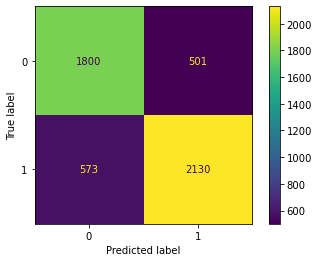

In [ ]:
grid_lr_pred = grid_lr.predict(X_test)
print(classification_report(y_test,grid_lr_pred))
plot_confusion_matrix(grid_lr,X_test,y_test)

## K Nearest Neighbors Classifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.75      0.70      0.72      2301
           1       0.76      0.81      0.78      2703

    accuracy                           0.76      5004
   macro avg       0.76      0.75      0.75      5004
weighted avg       0.76      0.76      0.75      5004



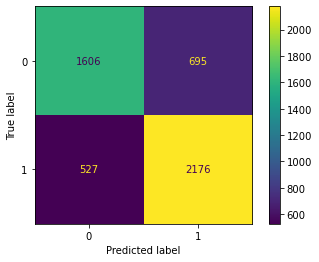

In [ ]:
knn_pred = knn.predict(X_test)
print(classification_report(y_test,knn_pred))
plot_confusion_matrix(knn,X_test,y_test)

## Support Vector Classifier

In [ ]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [ ]:
svm_pred = svm.predict(X_test)
print(classification_report(y_test,svm_pred))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       157
           1       0.59      0.63      0.61       353
           2       0.62      0.62      0.62       381
           3       0.69      0.79      0.74      1410
           4       0.49      0.40      0.44      1388
           5       0.58      0.66      0.62      1315

    accuracy                           0.60      5004
   macro avg       0.50      0.52      0.50      5004
weighted avg       0.57      0.60      0.58      5004



In [ ]:
accuracy_svc = svm.score(X_test, y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.5983213429256595


## Decision Tree Classifier

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2301
           1       0.93      0.91      0.92      2703

    accuracy                           0.91      5004
   macro avg       0.91      0.91      0.91      5004
weighted avg       0.91      0.91      0.91      5004



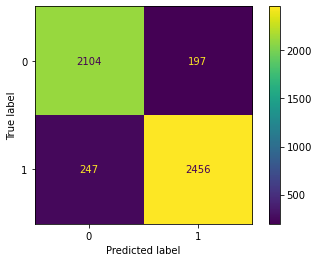

In [ ]:
dtree_pred = dtree.predict(X_test)
print(classification_report(y_test,dtree_pred))
plot_confusion_matrix(dtree,X_test,y_test)

## Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      2301
           1       0.93      0.95      0.94      2703

    accuracy                           0.93      5004
   macro avg       0.93      0.93      0.93      5004
weighted avg       0.93      0.93      0.93      5004



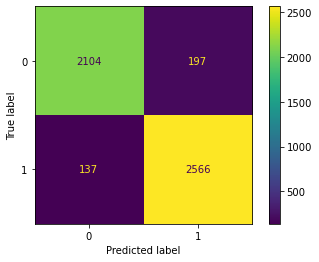

In [ ]:
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))
plot_confusion_matrix(rfc,X_test,y_test)

## Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

              precision    recall  f1-score   support

           0       0.79      0.62      0.69      2301
           1       0.73      0.86      0.79      2703

    accuracy                           0.75      5004
   macro avg       0.76      0.74      0.74      5004
weighted avg       0.75      0.75      0.74      5004



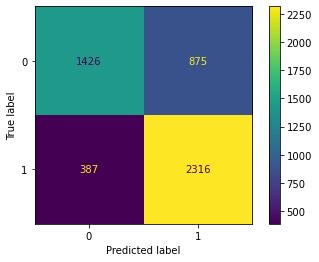

In [ ]:
gnb_pred = gnb.predict(X_test)
print(classification_report(y_test,gnb_pred))
plot_confusion_matrix(gnb,X_test,y_test)

## Bernoulli Naive Bayes

In [ ]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)

BernoulliNB()

              precision    recall  f1-score   support

           0       0.83      0.78      0.81      2301
           1       0.82      0.87      0.84      2703

    accuracy                           0.83      5004
   macro avg       0.83      0.82      0.82      5004
weighted avg       0.83      0.83      0.83      5004



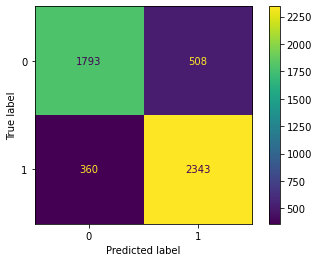

In [ ]:
bnb_pred = bnb.predict(X_test)
print(classification_report(y_test,bnb_pred))
plot_confusion_matrix(bnb,X_test,y_test)

## Adaptive Boosting Classifier

In [ ]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)

AdaBoostClassifier()

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      2301
           1       0.92      0.96      0.94      2703

    accuracy                           0.93      5004
   macro avg       0.93      0.93      0.93      5004
weighted avg       0.93      0.93      0.93      5004



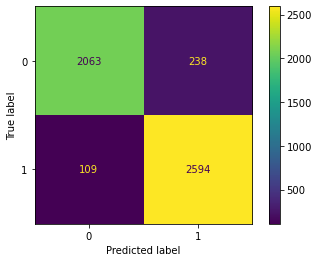

In [ ]:
ada_pred = ada.predict(X_test)
print(classification_report(y_test,ada_pred))
plot_confusion_matrix(ada,X_test,y_test)

## Gradient Boosting Classifier

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2301
           1       0.94      0.94      0.94      2703

    accuracy                           0.93      5004
   macro avg       0.93      0.93      0.93      5004
weighted avg       0.93      0.93      0.93      5004



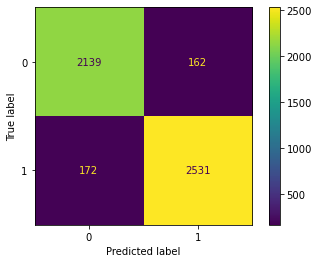

In [ ]:
gbc_pred = gbc.predict(X_test)
print(classification_report(y_test,gbc_pred))
plot_confusion_matrix(gbc,X_test,y_test)

## Stochastic Gradient Descent Classifier

In [ ]:
sgd = SGDClassifier()
sgd.fit(X_train,y_train)

SGDClassifier()

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      2301
           1       0.78      0.80      0.79      2703

    accuracy                           0.77      5004
   macro avg       0.77      0.77      0.77      5004
weighted avg       0.77      0.77      0.77      5004



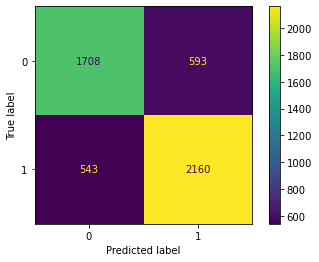

In [ ]:
sgd_pred = sgd.predict(X_test)
print(classification_report(y_test,sgd_pred))
plot_confusion_matrix(sgd,X_test,y_test)

## Passive Aggressive Classifier

In [ ]:
pac = PassiveAggressiveClassifier()
pac.fit(X_train,y_train)

PassiveAggressiveClassifier()

              precision    recall  f1-score   support

           0       0.60      0.65      0.63      2301
           1       0.68      0.63      0.65      2703

    accuracy                           0.64      5004
   macro avg       0.64      0.64      0.64      5004
weighted avg       0.64      0.64      0.64      5004



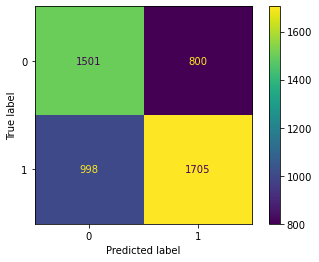

In [ ]:
pac_pred = pac.predict(X_test)
print(classification_report(y_test,pac_pred))
plot_confusion_matrix(pac,X_test,y_test)

## Ridge Classifier

In [ ]:
ridge = RidgeClassifier()
ridge.fit(X_train,y_train)

RidgeClassifier()

              precision    recall  f1-score   support

           0       0.77      0.73      0.75      2301
           1       0.78      0.82      0.80      2703

    accuracy                           0.78      5004
   macro avg       0.78      0.77      0.77      5004
weighted avg       0.78      0.78      0.78      5004



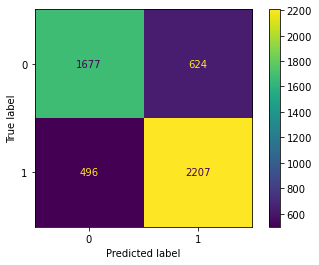

In [ ]:
ridge_pred = ridge.predict(X_test)
print(classification_report(y_test,ridge_pred))
plot_confusion_matrix(ridge,X_test,y_test)

## Light Gradient Boosting Model

In [ ]:
lgbm = LGBMClassifier()
lgbm.fit(X_train,y_train)

LGBMClassifier()

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      2301
           1       0.93      0.94      0.94      2703

    accuracy                           0.93      5004
   macro avg       0.93      0.93      0.93      5004
weighted avg       0.93      0.93      0.93      5004



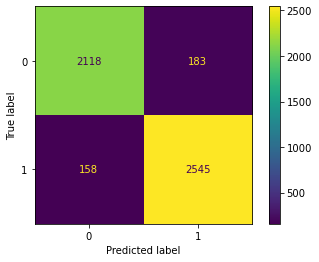

In [ ]:
lgbm_pred = lgbm.predict(X_test)
print(classification_report(y_test,lgbm_pred))
plot_confusion_matrix(lgbm,X_test,y_test)

## XG Boost Classifier

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier()

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      2301
           1       0.93      0.94      0.94      2703

    accuracy                           0.93      5004
   macro avg       0.93      0.93      0.93      5004
weighted avg       0.93      0.93      0.93      5004



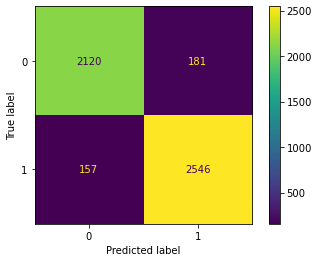

In [ ]:
xgb_pred = xgb.predict(X_test)
print(classification_report(y_test,xgb_pred))
plot_confusion_matrix(xgb,X_test,y_test)

## Categorical Boosting Classifier

In [ ]:
cat = CatBoostClassifier()
cat.fit(X_train,y_train)

Learning rate set to 0.042973
0:	learn: 0.6235441	total: 172ms	remaining: 2m 51s
1:	learn: 0.5609754	total: 180ms	remaining: 1m 29s
2:	learn: 0.5082224	total: 188ms	remaining: 1m 2s
3:	learn: 0.4608227	total: 195ms	remaining: 48.5s
4:	learn: 0.4248452	total: 203ms	remaining: 40.4s
5:	learn: 0.3915544	total: 210ms	remaining: 34.8s
6:	learn: 0.3690423	total: 219ms	remaining: 31s
7:	learn: 0.3443886	total: 226ms	remaining: 28s
8:	learn: 0.3237515	total: 234ms	remaining: 25.7s
9:	learn: 0.3100398	total: 241ms	remaining: 23.8s
10:	learn: 0.2978040	total: 248ms	remaining: 22.3s
11:	learn: 0.2847089	total: 256ms	remaining: 21.1s
12:	learn: 0.2707204	total: 264ms	remaining: 20s
13:	learn: 0.2615036	total: 270ms	remaining: 19s
14:	learn: 0.2515948	total: 278ms	remaining: 18.2s
15:	learn: 0.2436714	total: 285ms	remaining: 17.5s
16:	learn: 0.2364212	total: 293ms	remaining: 16.9s
17:	learn: 0.2291637	total: 301ms	remaining: 16.4s
18:	learn: 0.2233805	total: 309ms	remaining: 16s
19:	learn: 0.218206

160:	learn: 0.1482713	total: 1.73s	remaining: 9.03s
161:	learn: 0.1481504	total: 1.74s	remaining: 9.01s
162:	learn: 0.1480583	total: 1.75s	remaining: 9s
163:	learn: 0.1479985	total: 1.76s	remaining: 8.98s
164:	learn: 0.1478980	total: 1.77s	remaining: 8.96s
165:	learn: 0.1477979	total: 1.78s	remaining: 8.95s
166:	learn: 0.1476971	total: 1.79s	remaining: 8.94s
167:	learn: 0.1474470	total: 1.8s	remaining: 8.92s
168:	learn: 0.1473291	total: 1.81s	remaining: 8.9s
169:	learn: 0.1472385	total: 1.82s	remaining: 8.89s
170:	learn: 0.1471349	total: 1.83s	remaining: 8.87s
171:	learn: 0.1470349	total: 1.84s	remaining: 8.86s
172:	learn: 0.1469372	total: 1.85s	remaining: 8.84s
173:	learn: 0.1468171	total: 1.86s	remaining: 8.82s
174:	learn: 0.1467593	total: 1.87s	remaining: 8.81s
175:	learn: 0.1466903	total: 1.88s	remaining: 8.8s
176:	learn: 0.1466106	total: 1.89s	remaining: 8.78s
177:	learn: 0.1465116	total: 1.9s	remaining: 8.76s
178:	learn: 0.1464593	total: 1.91s	remaining: 8.75s
179:	learn: 0.14639

337:	learn: 0.1331797	total: 3.44s	remaining: 6.74s
338:	learn: 0.1330969	total: 3.45s	remaining: 6.73s
339:	learn: 0.1330170	total: 3.46s	remaining: 6.71s
340:	learn: 0.1329852	total: 3.47s	remaining: 6.7s
341:	learn: 0.1329102	total: 3.48s	remaining: 6.69s
342:	learn: 0.1328195	total: 3.49s	remaining: 6.68s
343:	learn: 0.1327075	total: 3.5s	remaining: 6.67s
344:	learn: 0.1326039	total: 3.51s	remaining: 6.66s
345:	learn: 0.1325642	total: 3.52s	remaining: 6.65s
346:	learn: 0.1324969	total: 3.53s	remaining: 6.64s
347:	learn: 0.1324327	total: 3.54s	remaining: 6.63s
348:	learn: 0.1323478	total: 3.55s	remaining: 6.62s
349:	learn: 0.1322927	total: 3.56s	remaining: 6.6s
350:	learn: 0.1322224	total: 3.57s	remaining: 6.59s
351:	learn: 0.1320959	total: 3.58s	remaining: 6.58s
352:	learn: 0.1320352	total: 3.58s	remaining: 6.57s
353:	learn: 0.1319627	total: 3.59s	remaining: 6.56s
354:	learn: 0.1318514	total: 3.6s	remaining: 6.55s
355:	learn: 0.1318001	total: 3.62s	remaining: 6.54s
356:	learn: 0.13

496:	learn: 0.1220968	total: 5s	remaining: 5.06s
497:	learn: 0.1220674	total: 5.01s	remaining: 5.05s
498:	learn: 0.1220190	total: 5.02s	remaining: 5.04s
499:	learn: 0.1219246	total: 5.03s	remaining: 5.03s
500:	learn: 0.1218592	total: 5.04s	remaining: 5.01s
501:	learn: 0.1217788	total: 5.04s	remaining: 5s
502:	learn: 0.1217366	total: 5.05s	remaining: 4.99s
503:	learn: 0.1216833	total: 5.06s	remaining: 4.98s
504:	learn: 0.1216560	total: 5.07s	remaining: 4.97s
505:	learn: 0.1216323	total: 5.08s	remaining: 4.96s
506:	learn: 0.1215589	total: 5.09s	remaining: 4.95s
507:	learn: 0.1215004	total: 5.1s	remaining: 4.94s
508:	learn: 0.1214361	total: 5.11s	remaining: 4.93s
509:	learn: 0.1213730	total: 5.12s	remaining: 4.92s
510:	learn: 0.1213229	total: 5.13s	remaining: 4.91s
511:	learn: 0.1212625	total: 5.14s	remaining: 4.89s
512:	learn: 0.1212019	total: 5.15s	remaining: 4.88s
513:	learn: 0.1211458	total: 5.16s	remaining: 4.87s
514:	learn: 0.1210736	total: 5.17s	remaining: 4.86s
515:	learn: 0.12102

658:	learn: 0.1114004	total: 6.52s	remaining: 3.38s
659:	learn: 0.1113444	total: 6.53s	remaining: 3.36s
660:	learn: 0.1112659	total: 6.54s	remaining: 3.35s
661:	learn: 0.1112374	total: 6.55s	remaining: 3.34s
662:	learn: 0.1111957	total: 6.56s	remaining: 3.33s
663:	learn: 0.1110875	total: 6.57s	remaining: 3.32s
664:	learn: 0.1110110	total: 6.57s	remaining: 3.31s
665:	learn: 0.1109516	total: 6.58s	remaining: 3.3s
666:	learn: 0.1108890	total: 6.59s	remaining: 3.29s
667:	learn: 0.1107774	total: 6.6s	remaining: 3.28s
668:	learn: 0.1106938	total: 6.61s	remaining: 3.27s
669:	learn: 0.1106379	total: 6.62s	remaining: 3.26s
670:	learn: 0.1105675	total: 6.63s	remaining: 3.25s
671:	learn: 0.1105312	total: 6.64s	remaining: 3.24s
672:	learn: 0.1104847	total: 6.65s	remaining: 3.23s
673:	learn: 0.1104509	total: 6.65s	remaining: 3.22s
674:	learn: 0.1103770	total: 6.66s	remaining: 3.21s
675:	learn: 0.1103028	total: 6.67s	remaining: 3.2s
676:	learn: 0.1102476	total: 6.68s	remaining: 3.19s
677:	learn: 0.1

823:	learn: 0.1017870	total: 8.03s	remaining: 1.71s
824:	learn: 0.1017315	total: 8.04s	remaining: 1.7s
825:	learn: 0.1016640	total: 8.04s	remaining: 1.69s
826:	learn: 0.1015825	total: 8.05s	remaining: 1.68s
827:	learn: 0.1015321	total: 8.06s	remaining: 1.67s
828:	learn: 0.1014723	total: 8.07s	remaining: 1.67s
829:	learn: 0.1014195	total: 8.08s	remaining: 1.66s
830:	learn: 0.1013488	total: 8.09s	remaining: 1.65s
831:	learn: 0.1013059	total: 8.1s	remaining: 1.64s
832:	learn: 0.1012906	total: 8.11s	remaining: 1.63s
833:	learn: 0.1012385	total: 8.12s	remaining: 1.62s
834:	learn: 0.1011696	total: 8.13s	remaining: 1.61s
835:	learn: 0.1011488	total: 8.14s	remaining: 1.6s
836:	learn: 0.1011030	total: 8.15s	remaining: 1.59s
837:	learn: 0.1010632	total: 8.15s	remaining: 1.58s
838:	learn: 0.1009842	total: 8.16s	remaining: 1.57s
839:	learn: 0.1009225	total: 8.17s	remaining: 1.56s
840:	learn: 0.1008754	total: 8.18s	remaining: 1.55s
841:	learn: 0.1008313	total: 8.19s	remaining: 1.54s
842:	learn: 0.1

989:	learn: 0.0936092	total: 9.55s	remaining: 96.5ms
990:	learn: 0.0935625	total: 9.56s	remaining: 86.8ms
991:	learn: 0.0934810	total: 9.57s	remaining: 77.2ms
992:	learn: 0.0934228	total: 9.58s	remaining: 67.5ms
993:	learn: 0.0933848	total: 9.59s	remaining: 57.9ms
994:	learn: 0.0933500	total: 9.6s	remaining: 48.2ms
995:	learn: 0.0933082	total: 9.61s	remaining: 38.6ms
996:	learn: 0.0932581	total: 9.61s	remaining: 28.9ms
997:	learn: 0.0932105	total: 9.62s	remaining: 19.3ms
998:	learn: 0.0931405	total: 9.63s	remaining: 9.64ms
999:	learn: 0.0930734	total: 9.64s	remaining: 0us


              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2301
           1       0.93      0.95      0.94      2703

    accuracy                           0.93      5004
   macro avg       0.93      0.93      0.93      5004
weighted avg       0.93      0.93      0.93      5004



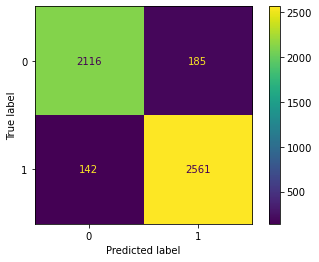

In [ ]:
cat_pred = cat.predict(X_test)
print(classification_report(y_test,cat_pred))
plot_confusion_matrix(cat,X_test,y_test)

## Histogram-based Gradient Boosting Classifier

In [ ]:
hist = HistGradientBoostingClassifier()
hist.fit(X_train,y_train)

HistGradientBoostingClassifier()

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2301
           1       0.94      0.94      0.94      2703

    accuracy                           0.94      5004
   macro avg       0.94      0.93      0.93      5004
weighted avg       0.94      0.94      0.94      5004



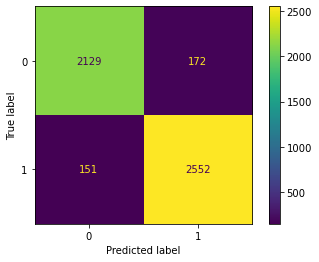

In [ ]:
hist_pred = hist.predict(X_test)
print(classification_report(y_test,hist_pred))
plot_confusion_matrix(hist,X_test,y_test)

## Extra Trees Classifier

In [ ]:
et = ExtraTreesClassifier()
et.fit(X_train,y_train)

ExtraTreesClassifier()

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      2301
           1       0.92      0.94      0.93      2703

    accuracy                           0.92      5004
   macro avg       0.92      0.92      0.92      5004
weighted avg       0.92      0.92      0.92      5004



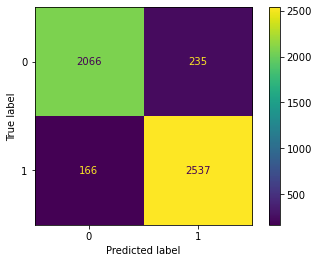

In [ ]:
et_pred = et.predict(X_test)
print(classification_report(y_test,et_pred))
plot_confusion_matrix(et,X_test,y_test)

## Bagging Classifier

In [ ]:
bag = BaggingClassifier()
bag.fit(X_train,y_train)

BaggingClassifier()

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      2301
           1       0.94      0.94      0.94      2703

    accuracy                           0.93      5004
   macro avg       0.93      0.93      0.93      5004
weighted avg       0.93      0.93      0.93      5004



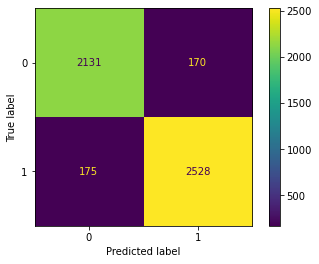

In [ ]:
bag_pred = bag.predict(X_test)
print(classification_report(y_test,bag_pred))
plot_confusion_matrix(bag,X_test,y_test)

## Voting Classifier

In [ ]:
vc = VotingClassifier(estimators=[
    ('RF',RandomForestClassifier()),
    ('LGBM',LGBMClassifier()),
    ('CAT',CatBoostClassifier()),
    ('HIST',HistGradientBoostingClassifier()),
    ('XGB',XGBClassifier()),
    ('BAG',BaggingClassifier()),
    ('ADA',AdaBoostClassifier())
],voting='hard')

In [ ]:
vc.fit(X_train.values,y_train.values)

Learning rate set to 0.042973
0:	learn: 0.6235441	total: 24.6ms	remaining: 24.6s
1:	learn: 0.5609754	total: 40.8ms	remaining: 20.4s
2:	learn: 0.5082224	total: 57.4ms	remaining: 19.1s
3:	learn: 0.4608227	total: 73.5ms	remaining: 18.3s
4:	learn: 0.4248452	total: 88.9ms	remaining: 17.7s
5:	learn: 0.3915544	total: 103ms	remaining: 17.1s
6:	learn: 0.3690423	total: 117ms	remaining: 16.6s
7:	learn: 0.3443886	total: 130ms	remaining: 16.1s
8:	learn: 0.3237515	total: 143ms	remaining: 15.7s
9:	learn: 0.3100398	total: 155ms	remaining: 15.4s
10:	learn: 0.2978040	total: 169ms	remaining: 15.2s
11:	learn: 0.2847089	total: 185ms	remaining: 15.2s
12:	learn: 0.2707204	total: 201ms	remaining: 15.2s
13:	learn: 0.2615036	total: 216ms	remaining: 15.2s
14:	learn: 0.2515948	total: 231ms	remaining: 15.2s
15:	learn: 0.2436714	total: 242ms	remaining: 14.9s
16:	learn: 0.2364212	total: 255ms	remaining: 14.8s
17:	learn: 0.2291637	total: 268ms	remaining: 14.6s
18:	learn: 0.2233805	total: 282ms	remaining: 14.5s
19:	le

174:	learn: 0.1467593	total: 2.16s	remaining: 10.2s
175:	learn: 0.1466903	total: 2.17s	remaining: 10.2s
176:	learn: 0.1466106	total: 2.18s	remaining: 10.1s
177:	learn: 0.1465116	total: 2.19s	remaining: 10.1s
178:	learn: 0.1464593	total: 2.2s	remaining: 10.1s
179:	learn: 0.1463934	total: 2.21s	remaining: 10.1s
180:	learn: 0.1463197	total: 2.23s	remaining: 10.1s
181:	learn: 0.1462231	total: 2.24s	remaining: 10.1s
182:	learn: 0.1461220	total: 2.25s	remaining: 10s
183:	learn: 0.1460202	total: 2.26s	remaining: 10s
184:	learn: 0.1459301	total: 2.27s	remaining: 10s
185:	learn: 0.1458616	total: 2.28s	remaining: 9.98s
186:	learn: 0.1457563	total: 2.29s	remaining: 9.96s
187:	learn: 0.1456724	total: 2.3s	remaining: 9.95s
188:	learn: 0.1456070	total: 2.31s	remaining: 9.93s
189:	learn: 0.1455318	total: 2.32s	remaining: 9.91s
190:	learn: 0.1454302	total: 2.33s	remaining: 9.89s
191:	learn: 0.1453457	total: 2.35s	remaining: 9.88s
192:	learn: 0.1452759	total: 2.36s	remaining: 9.87s
193:	learn: 0.145186

340:	learn: 0.1329852	total: 4.1s	remaining: 7.93s
341:	learn: 0.1329102	total: 4.12s	remaining: 7.92s
342:	learn: 0.1328195	total: 4.13s	remaining: 7.92s
343:	learn: 0.1327075	total: 4.14s	remaining: 7.91s
344:	learn: 0.1326039	total: 4.16s	remaining: 7.89s
345:	learn: 0.1325642	total: 4.17s	remaining: 7.88s
346:	learn: 0.1324969	total: 4.18s	remaining: 7.86s
347:	learn: 0.1324327	total: 4.19s	remaining: 7.85s
348:	learn: 0.1323478	total: 4.2s	remaining: 7.84s
349:	learn: 0.1322927	total: 4.21s	remaining: 7.82s
350:	learn: 0.1322224	total: 4.22s	remaining: 7.81s
351:	learn: 0.1320959	total: 4.23s	remaining: 7.79s
352:	learn: 0.1320352	total: 4.25s	remaining: 7.79s
353:	learn: 0.1319627	total: 4.26s	remaining: 7.78s
354:	learn: 0.1318514	total: 4.28s	remaining: 7.77s
355:	learn: 0.1318001	total: 4.29s	remaining: 7.76s
356:	learn: 0.1317295	total: 4.3s	remaining: 7.75s
357:	learn: 0.1316715	total: 4.32s	remaining: 7.74s
358:	learn: 0.1316239	total: 4.33s	remaining: 7.73s
359:	learn: 0.1

516:	learn: 0.1209487	total: 6.32s	remaining: 5.9s
517:	learn: 0.1208852	total: 6.33s	remaining: 5.89s
518:	learn: 0.1208308	total: 6.34s	remaining: 5.88s
519:	learn: 0.1207677	total: 6.35s	remaining: 5.87s
520:	learn: 0.1206712	total: 6.37s	remaining: 5.85s
521:	learn: 0.1205796	total: 6.38s	remaining: 5.84s
522:	learn: 0.1205096	total: 6.39s	remaining: 5.83s
523:	learn: 0.1204823	total: 6.4s	remaining: 5.81s
524:	learn: 0.1204058	total: 6.41s	remaining: 5.8s
525:	learn: 0.1203343	total: 6.42s	remaining: 5.79s
526:	learn: 0.1202595	total: 6.43s	remaining: 5.78s
527:	learn: 0.1201935	total: 6.45s	remaining: 5.76s
528:	learn: 0.1201560	total: 6.46s	remaining: 5.75s
529:	learn: 0.1200844	total: 6.47s	remaining: 5.74s
530:	learn: 0.1200400	total: 6.48s	remaining: 5.72s
531:	learn: 0.1199438	total: 6.49s	remaining: 5.71s
532:	learn: 0.1198372	total: 6.5s	remaining: 5.7s
533:	learn: 0.1197738	total: 6.52s	remaining: 5.69s
534:	learn: 0.1197048	total: 6.53s	remaining: 5.67s
535:	learn: 0.119

689:	learn: 0.1095535	total: 8.29s	remaining: 3.73s
690:	learn: 0.1094732	total: 8.3s	remaining: 3.71s
691:	learn: 0.1094144	total: 8.31s	remaining: 3.7s
692:	learn: 0.1093800	total: 8.33s	remaining: 3.69s
693:	learn: 0.1093540	total: 8.34s	remaining: 3.68s
694:	learn: 0.1092810	total: 8.35s	remaining: 3.66s
695:	learn: 0.1092515	total: 8.36s	remaining: 3.65s
696:	learn: 0.1091707	total: 8.37s	remaining: 3.64s
697:	learn: 0.1091416	total: 8.38s	remaining: 3.63s
698:	learn: 0.1090925	total: 8.39s	remaining: 3.61s
699:	learn: 0.1090192	total: 8.4s	remaining: 3.6s
700:	learn: 0.1089469	total: 8.41s	remaining: 3.59s
701:	learn: 0.1089113	total: 8.43s	remaining: 3.58s
702:	learn: 0.1088036	total: 8.44s	remaining: 3.56s
703:	learn: 0.1087395	total: 8.45s	remaining: 3.55s
704:	learn: 0.1086906	total: 8.46s	remaining: 3.54s
705:	learn: 0.1086115	total: 8.47s	remaining: 3.53s
706:	learn: 0.1085335	total: 8.48s	remaining: 3.52s
707:	learn: 0.1084715	total: 8.5s	remaining: 3.5s
708:	learn: 0.1083

863:	learn: 0.0997460	total: 10.2s	remaining: 1.61s
864:	learn: 0.0996911	total: 10.2s	remaining: 1.6s
865:	learn: 0.0996151	total: 10.3s	remaining: 1.59s
866:	learn: 0.0995792	total: 10.3s	remaining: 1.57s
867:	learn: 0.0995280	total: 10.3s	remaining: 1.56s
868:	learn: 0.0994804	total: 10.3s	remaining: 1.55s
869:	learn: 0.0994288	total: 10.3s	remaining: 1.54s
870:	learn: 0.0993796	total: 10.3s	remaining: 1.53s
871:	learn: 0.0993353	total: 10.3s	remaining: 1.51s
872:	learn: 0.0992948	total: 10.3s	remaining: 1.5s
873:	learn: 0.0992383	total: 10.3s	remaining: 1.49s
874:	learn: 0.0991934	total: 10.4s	remaining: 1.48s
875:	learn: 0.0991471	total: 10.4s	remaining: 1.47s
876:	learn: 0.0990937	total: 10.4s	remaining: 1.46s
877:	learn: 0.0990289	total: 10.4s	remaining: 1.44s
878:	learn: 0.0989342	total: 10.4s	remaining: 1.43s
879:	learn: 0.0988803	total: 10.4s	remaining: 1.42s
880:	learn: 0.0988358	total: 10.4s	remaining: 1.41s
881:	learn: 0.0987577	total: 10.4s	remaining: 1.4s
882:	learn: 0.0

VotingClassifier(estimators=[('RF', RandomForestClassifier()),
                             ('LGBM', LGBMClassifier()),
                             ('CAT',
                              <catboost.core.CatBoostClassifier object at 0x0000022EE9222FA0>),
                             ('HIST', HistGradientBoostingClassifier()),
                             ('XGB', XGBClassifier()),
                             ('BAG', BaggingClassifier()),
                             ('ADA', AdaBoostClassifier())])

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      2301
           1       0.93      0.94      0.94      2703

    accuracy                           0.93      5004
   macro avg       0.93      0.93      0.93      5004
weighted avg       0.93      0.93      0.93      5004



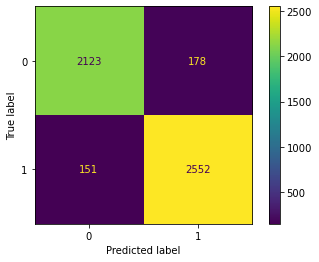

In [ ]:
vc_pred = vc.predict(X_test.values)
print(classification_report(y_test.values,vc_pred))
plot_confusion_matrix(vc,X_test.values,y_test.values)

## Hyperparameter Tuning for all models using RandomizedSearchCV

### For KNN

In [ ]:
base_knn = KNeighborsClassifier()

In [ ]:
param_grid = {'n_neighbors': [2,5,8,12,20],
              'weights': ['uniform','distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute'],
              'metric': ['minkowski','manhattan','euclidean','chebyshev']
             }

In [ ]:
grid_knn = RandomizedSearchCV(base_knn,param_grid,verbose=3)
grid_knn.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=12, weights=uniform;, score=0.778 total time=   8.1s
[CV 2/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=12, weights=uniform;, score=0.779 total time=   7.6s
[CV 3/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=12, weights=uniform;, score=0.785 total time=   8.9s
[CV 4/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=12, weights=uniform;, score=0.771 total time=   8.8s
[CV 5/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=12, weights=uniform;, score=0.779 total time=   9.4s
[CV 1/5] END algorithm=brute, metric=minkowski, n_neighbors=5, weights=distance;, score=0.755 total time=   2.8s
[CV 2/5] END algorithm=brute, metric=minkowski, n_neighbors=5, weights=distance;, score=0.755 total time=   3.1s
[CV 3/5] END algorithm=brute, metric=minkowski, n_neighbors=5, weights=distance;, score=0.756 total time=   2.8s
[CV 4/5] END algorithm=br

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'metric': ['minkowski', 'manhattan',
                                                   'euclidean', 'chebyshev'],
                                        'n_neighbors': [2, 5, 8, 12, 20],
                                        'weights': ['uniform', 'distance']},
                   verbose=3)

In [ ]:
grid_knn.best_params_

{'weights': 'uniform',
 'n_neighbors': 20,
 'metric': 'euclidean',
 'algorithm': 'ball_tree'}

              precision    recall  f1-score   support

           0       0.79      0.71      0.75      2301
           1       0.77      0.83      0.80      2703

    accuracy                           0.78      5004
   macro avg       0.78      0.77      0.78      5004
weighted avg       0.78      0.78      0.78      5004



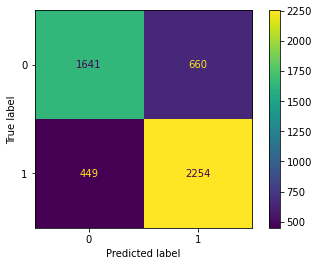

In [ ]:
grid_knn_pred = grid_knn.predict(X_test)
print(classification_report(y_test,grid_knn_pred))
plot_confusion_matrix(grid_knn,X_test,y_test)

## Elbow Method

Text(0.5, 1.0, 'Error Distribution across K Neighbors')

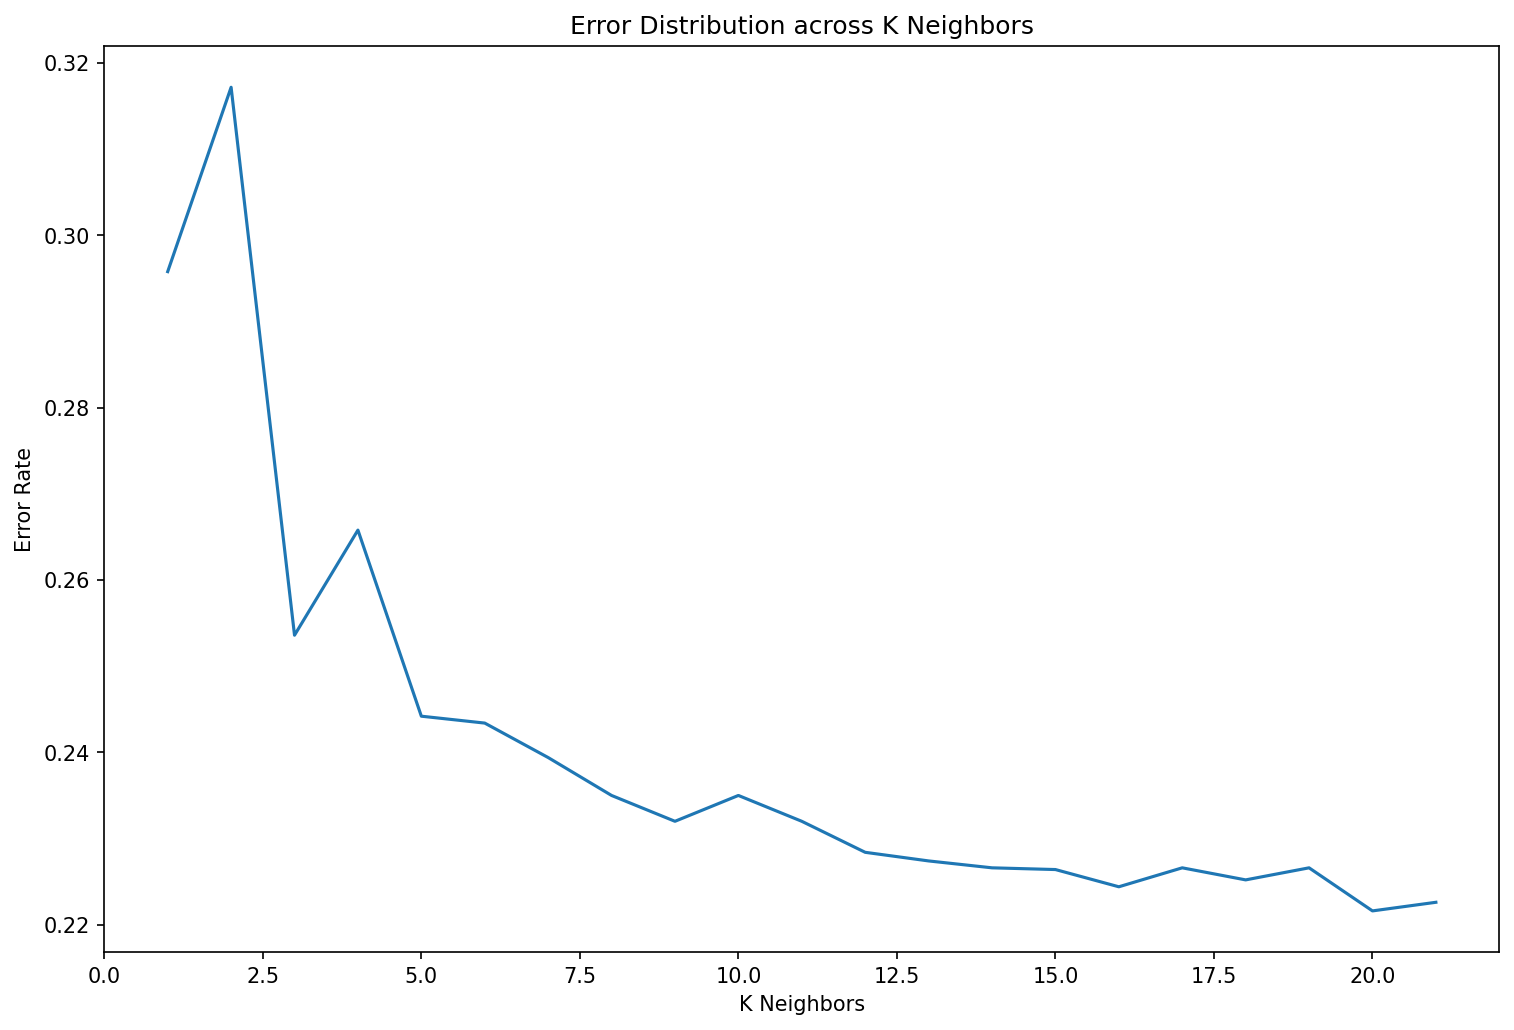

In [ ]:
errors = []

for i in range(1,22):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    knn_pred = knn.predict(X_test)
    errors.append(1-accuracy_score(y_test,knn_pred))
    
plt.figure(figsize=(12,8),dpi=150)
sns.lineplot(range(1,22),errors)
plt.xlabel('K Neighbors')
plt.ylabel('Error Rate')
plt.title('Error Distribution across K Neighbors')

### For SVM

In [ ]:
base_svc = SVC(class_weight='balanced',max_iter=10000)

In [ ]:
param_grid = {'C': [0.01,0.5,5,25,50],
             'gamma': ['scale','auto'],
             'kernel': ['linear','poly','rbf','sigmoid'],
             'degree': [2,3,4,5],
             'shrinking': [True,False]
             }

In [ ]:
grid_svc = RandomizedSearchCV(base_svc,param_grid,verbose=3)
grid_svc.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=0.01, degree=3, gamma=auto, kernel=poly, shrinking=True;, score=0.543 total time=  15.5s
[CV 2/5] END C=0.01, degree=3, gamma=auto, kernel=poly, shrinking=True;, score=0.540 total time=  16.1s
[CV 3/5] END C=0.01, degree=3, gamma=auto, kernel=poly, shrinking=True;, score=0.542 total time=  15.0s
[CV 4/5] END C=0.01, degree=3, gamma=auto, kernel=poly, shrinking=True;, score=0.541 total time=  15.2s
[CV 5/5] END C=0.01, degree=3, gamma=auto, kernel=poly, shrinking=True;, score=0.541 total time=  15.9s
[CV 1/5] END C=0.5, degree=5, gamma=scale, kernel=rbf, shrinking=False;, score=0.808 total time=  26.7s
[CV 2/5] END C=0.5, degree=5, gamma=scale, kernel=rbf, shrinking=False;, score=0.816 total time=  26.0s
[CV 3/5] END C=0.5, degree=5, gamma=scale, kernel=rbf, shrinking=False;, score=0.819 total time=  26.1s
[CV 4/5] END C=0.5, degree=5, gamma=scale, kernel=rbf, shrinking=False;, score=0.809 total time=  25.6s
[CV

RandomizedSearchCV(estimator=SVC(class_weight='balanced', max_iter=10000),
                   param_distributions={'C': [0.01, 0.5, 5, 25, 50],
                                        'degree': [2, 3, 4, 5],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid'],
                                        'shrinking': [True, False]},
                   verbose=3)

In [ ]:
grid_svc.best_params_

{'shrinking': False, 'kernel': 'rbf', 'gamma': 'auto', 'degree': 4, 'C': 5}

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      2301
           1       0.85      0.86      0.85      2703

    accuracy                           0.84      5004
   macro avg       0.84      0.84      0.84      5004
weighted avg       0.84      0.84      0.84      5004



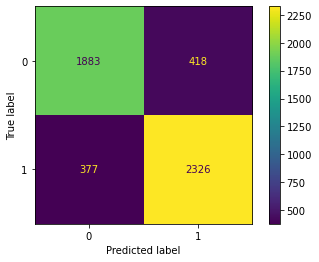

In [ ]:
grid_svc_pred = grid_svc.predict(X_test)
print(classification_report(y_test,grid_svc_pred))
plot_confusion_matrix(grid_svc,X_test,y_test)

### For Decision Tree Classifier

In [ ]:
base_dtree = DecisionTreeClassifier(class_weight='balanced',random_state=101)

In [ ]:
param_grid = {'criterion': ['gini','entropy'],
              'max_features': ['sqrt','log2'],
              'max_depth': [2,12,38,68,98,128,201]
             }

In [ ]:
grid_dtree = RandomizedSearchCV(base_dtree,param_grid,verbose=4,cv=RepeatedStratifiedKFold(n_splits=6,n_repeats=3))
grid_dtree.fit(X_train,y_train)

Fitting 18 folds for each of 10 candidates, totalling 180 fits
[CV 1/18] END criterion=entropy, max_depth=201, max_features=sqrt;, score=0.894 total time=   0.0s
[CV 2/18] END criterion=entropy, max_depth=201, max_features=sqrt;, score=0.891 total time=   0.0s
[CV 3/18] END criterion=entropy, max_depth=201, max_features=sqrt;, score=0.893 total time=   0.0s
[CV 4/18] END criterion=entropy, max_depth=201, max_features=sqrt;, score=0.895 total time=   0.0s
[CV 5/18] END criterion=entropy, max_depth=201, max_features=sqrt;, score=0.887 total time=   0.0s
[CV 6/18] END criterion=entropy, max_depth=201, max_features=sqrt;, score=0.886 total time=   0.0s
[CV 7/18] END criterion=entropy, max_depth=201, max_features=sqrt;, score=0.886 total time=   0.0s
[CV 8/18] END criterion=entropy, max_depth=201, max_features=sqrt;, score=0.868 total time=   0.0s
[CV 9/18] END criterion=entropy, max_depth=201, max_features=sqrt;, score=0.887 total time=   0.0s
[CV 10/18] END criterion=entropy, max_depth=20

[CV 15/18] END criterion=entropy, max_depth=128, max_features=log2;, score=0.885 total time=   0.0s
[CV 16/18] END criterion=entropy, max_depth=128, max_features=log2;, score=0.886 total time=   0.0s
[CV 17/18] END criterion=entropy, max_depth=128, max_features=log2;, score=0.834 total time=   0.0s
[CV 18/18] END criterion=entropy, max_depth=128, max_features=log2;, score=0.861 total time=   0.0s
[CV 1/18] END criterion=gini, max_depth=98, max_features=log2;, score=0.870 total time=   0.0s
[CV 2/18] END criterion=gini, max_depth=98, max_features=log2;, score=0.833 total time=   0.0s
[CV 3/18] END criterion=gini, max_depth=98, max_features=log2;, score=0.865 total time=   0.0s
[CV 4/18] END criterion=gini, max_depth=98, max_features=log2;, score=0.854 total time=   0.0s
[CV 5/18] END criterion=gini, max_depth=98, max_features=log2;, score=0.852 total time=   0.0s
[CV 6/18] END criterion=gini, max_depth=98, max_features=log2;, score=0.846 total time=   0.0s
[CV 7/18] END criterion=gini, 

[CV 16/18] END criterion=entropy, max_depth=2, max_features=log2;, score=0.693 total time=   0.0s
[CV 17/18] END criterion=entropy, max_depth=2, max_features=log2;, score=0.688 total time=   0.0s
[CV 18/18] END criterion=entropy, max_depth=2, max_features=log2;, score=0.686 total time=   0.0s


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=6, random_state=None),
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=101),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 12, 38, 68, 98, 128,
                                                      201],
                                        'max_features': ['sqrt', 'log2']},
                   verbose=4)

In [ ]:
grid_dtree.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 101,
 'splitter': 'best'}

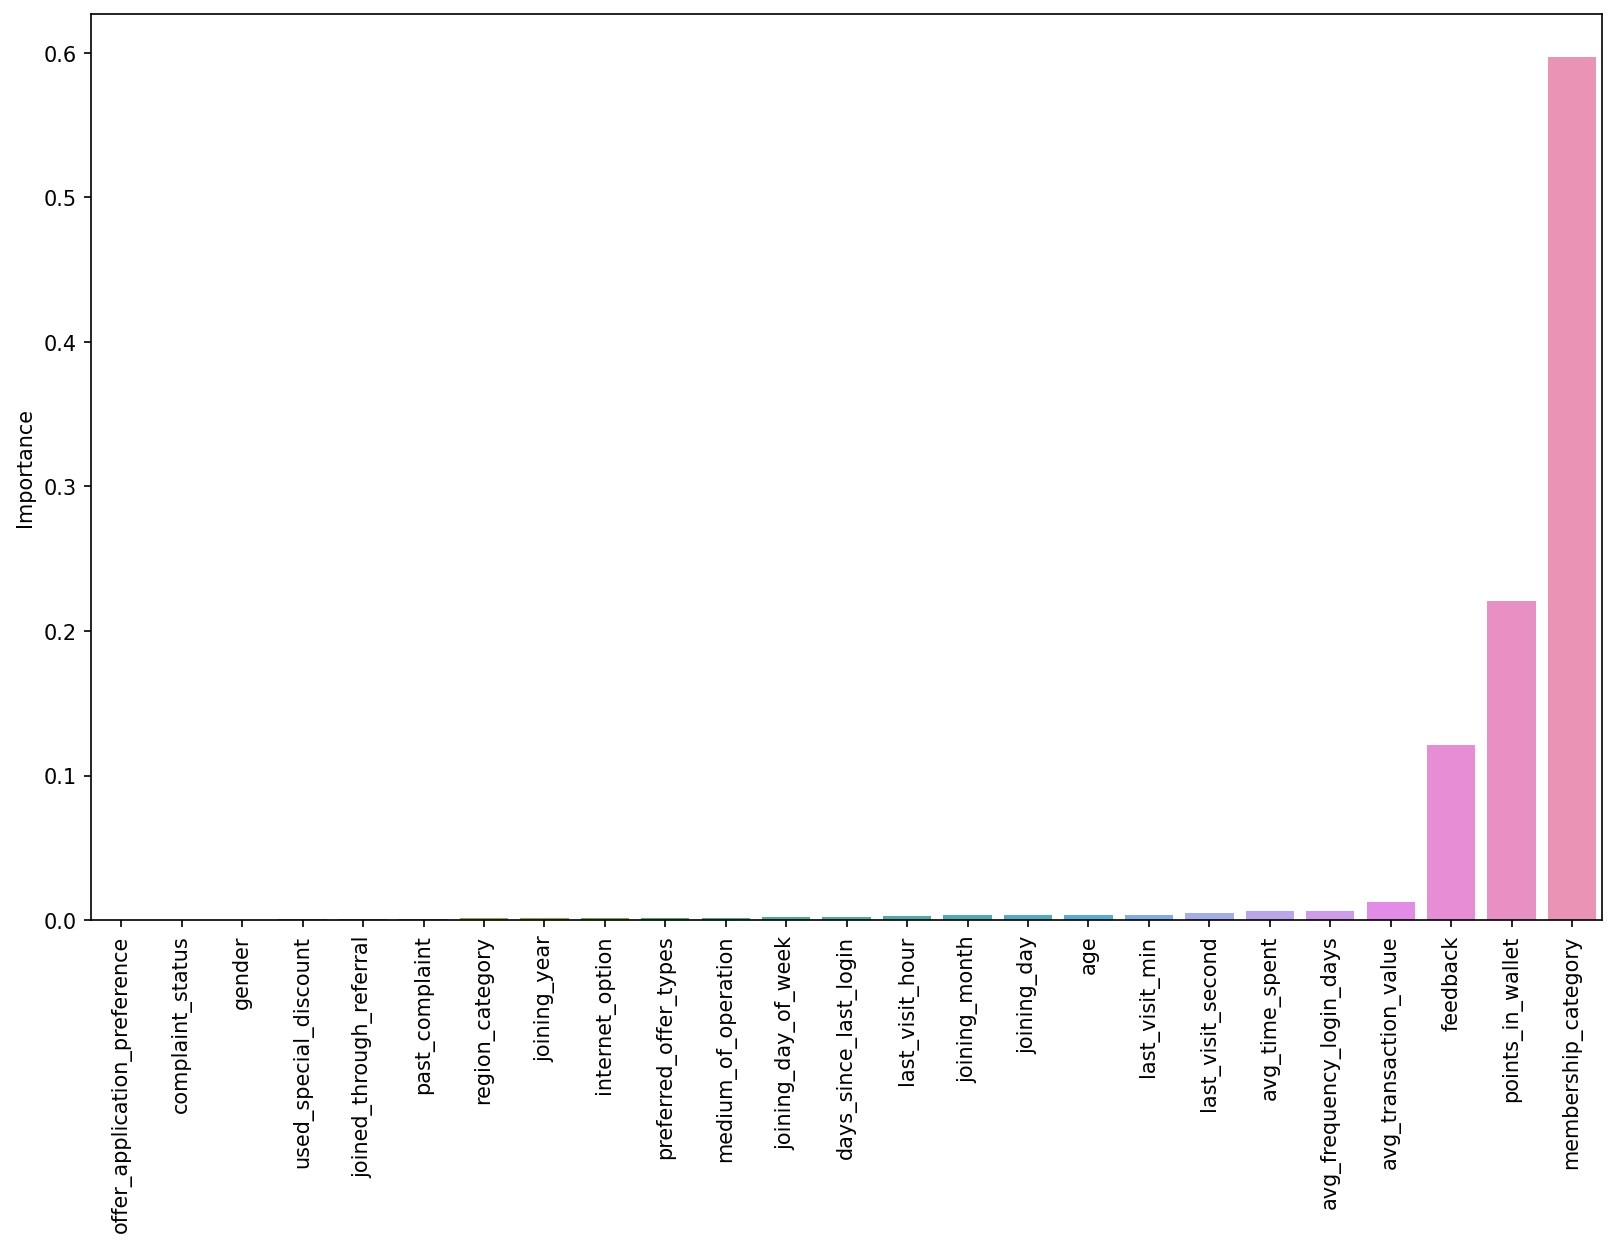

In [ ]:
feat_import = pd.DataFrame(index=X.columns,data=grid_dtree.best_estimator_.feature_importances_,columns=['Importance'])
feat_import = feat_import.sort_values("Importance")
feat_import = feat_import[feat_import['Importance']>0.000000]
plt.figure(figsize=(13,8),dpi=150)
sns.barplot(x=feat_import.index,y='Importance',data=feat_import)
plt.xticks(rotation=90);

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      2301
           1       0.92      0.92      0.92      2703

    accuracy                           0.91      5004
   macro avg       0.91      0.91      0.91      5004
weighted avg       0.91      0.91      0.91      5004



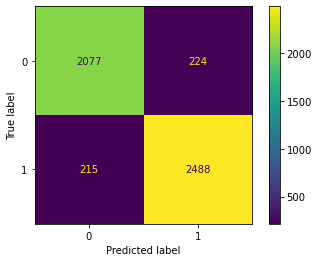

In [ ]:
grid_dtree_pred = grid_dtree.predict(X_test)
print(classification_report(y_test,grid_dtree_pred))
plot_confusion_matrix(grid_dtree,X_test,y_test)

### For Random Forest Classifier

In [ ]:
base_rfc = RandomForestClassifier(random_state=101,class_weight='balanced')

In [ ]:
param_grid = {'n_estimators': [200,460,650,980],
             'criterion': ['gini','entropy'],
             'max_depth': [2,5,20,32,50],
             'max_features': ['sqrt','log2'],
             'bootstrap': [True,False],
             'oob_score': [True,False],
             'max_samples': [0.08,0.42,0.67,1]}

In [ ]:
grid_rfc = RandomizedSearchCV(base_rfc,param_grid,verbose=4,random_state=101)
grid_rfc.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END bootstrap=False, criterion=gini, max_depth=32, max_features=sqrt, max_samples=1, n_estimators=980, oob_score=False;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=gini, max_depth=32, max_features=sqrt, max_samples=1, n_estimators=980, oob_score=False;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=gini, max_depth=32, max_features=sqrt, max_samples=1, n_estimators=980, oob_score=False;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=gini, max_depth=32, max_features=sqrt, max_samples=1, n_estimators=980, oob_score=False;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=gini, max_depth=32, max_features=sqrt, max_samples=1, n_estimators=980, oob_score=False;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=sqrt, max_samples=0.67, n_estimators=980, oob_score=False;, score=0.9

RandomizedSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=101),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 5, 20, 32, 50],
                                        'max_features': ['sqrt', 'log2'],
                                        'max_samples': [0.08, 0.42, 0.67, 1],
                                        'n_estimators': [200, 460, 650, 980],
                                        'oob_score': [True, False]},
                   random_state=101, verbose=4)

In [ ]:
grid_rfc.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': 0.67,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 980,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 101,
 'verbose': 0,
 'warm_start': False}

In [ ]:
grid_rfc.best_score_

0.9284051878162265

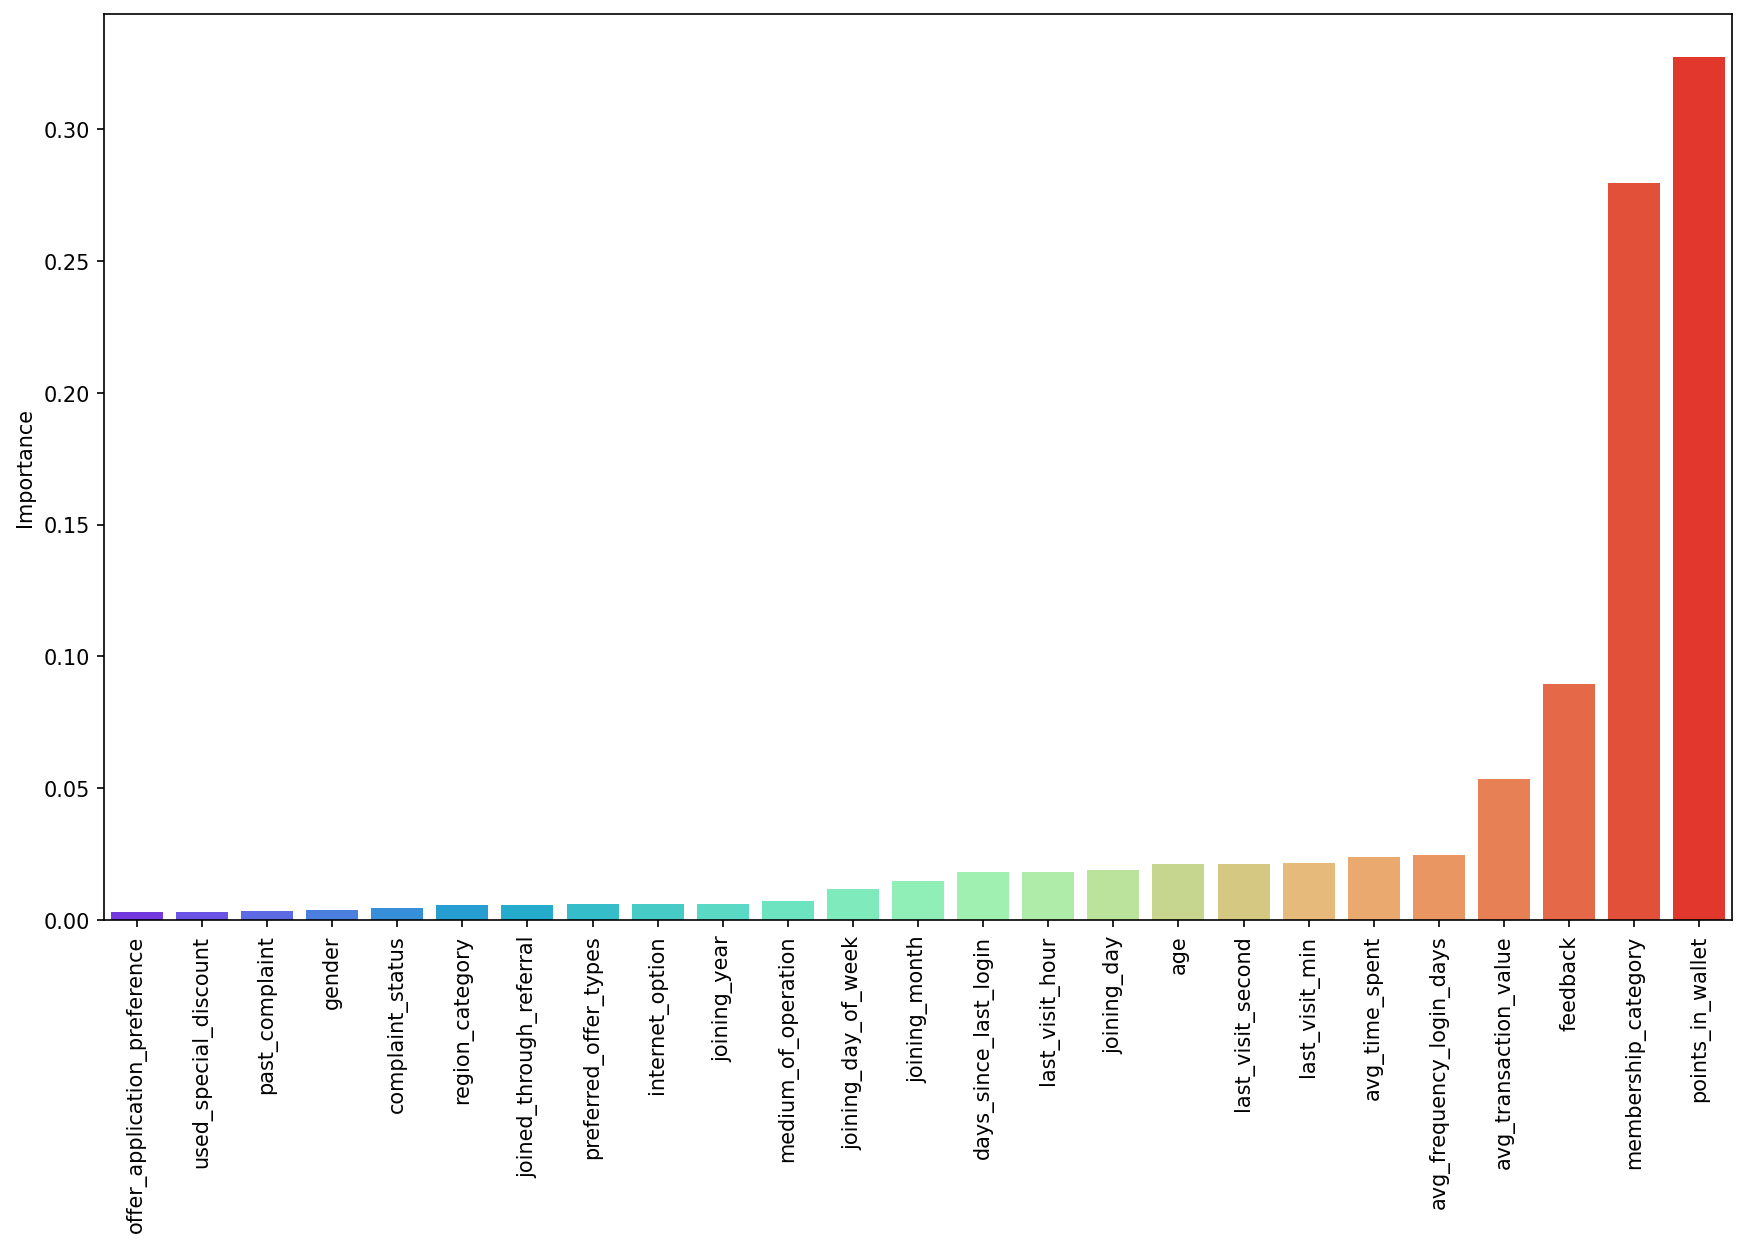

In [ ]:
feat_importances = pd.DataFrame(index=X.columns,data=grid_rfc.best_estimator_.feature_importances_,columns=['Importance'])
feat_importances = feat_importances.sort_values("Importance")
feat_importances = feat_importances[feat_importances['Importance']>0.000000000000000]
plt.figure(figsize=(14,8),dpi=150)
sns.barplot(x=feat_importances.index,y='Importance',data=feat_importances,palette='rainbow')
plt.xticks(rotation=90);

In [ ]:
grid_rfc.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': 0.67,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 980,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 101,
 'verbose': 0,
 'warm_start': False}

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      2301
           1       0.92      0.95      0.94      2703

    accuracy                           0.93      5004
   macro avg       0.93      0.93      0.93      5004
weighted avg       0.93      0.93      0.93      5004



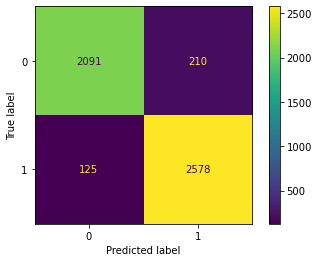

In [ ]:
grid_rfc_pred = grid_rfc.predict(X_test)
print(classification_report(y_test,grid_rfc_pred))
plot_confusion_matrix(grid_rfc,X_test,y_test)

In [ ]:
optimized_rfc = RandomForestClassifier(n_estimators=980,random_state=101,max_features='log2',criterion='entropy',bootstrap=True,oob_score=True)
optimized_rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=980, oob_score=True, random_state=101)

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      2301
           1       0.92      0.95      0.94      2703

    accuracy                           0.93      5004
   macro avg       0.93      0.93      0.93      5004
weighted avg       0.93      0.93      0.93      5004



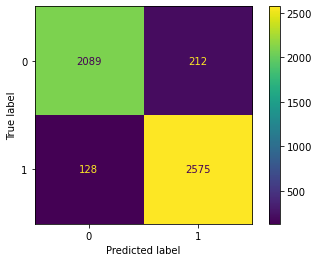

In [ ]:
optimized_rfc_pred = optimized_rfc.predict(X_test)
print(classification_report(y_test,optimized_rfc_pred))
plot_confusion_matrix(optimized_rfc,X_test,y_test)

In [ ]:
error_rates = []
misclassifications = []

for i in range(100,1001,100):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    n_missed = np.sum(preds!=y_test)
    error = 1 - accuracy_score(y_test,preds)
    error_rates.append(error)
    misclassifications.append(n_missed)

Text(0.5, 1.0, 'Error Distribution for various values of no. of estimators')

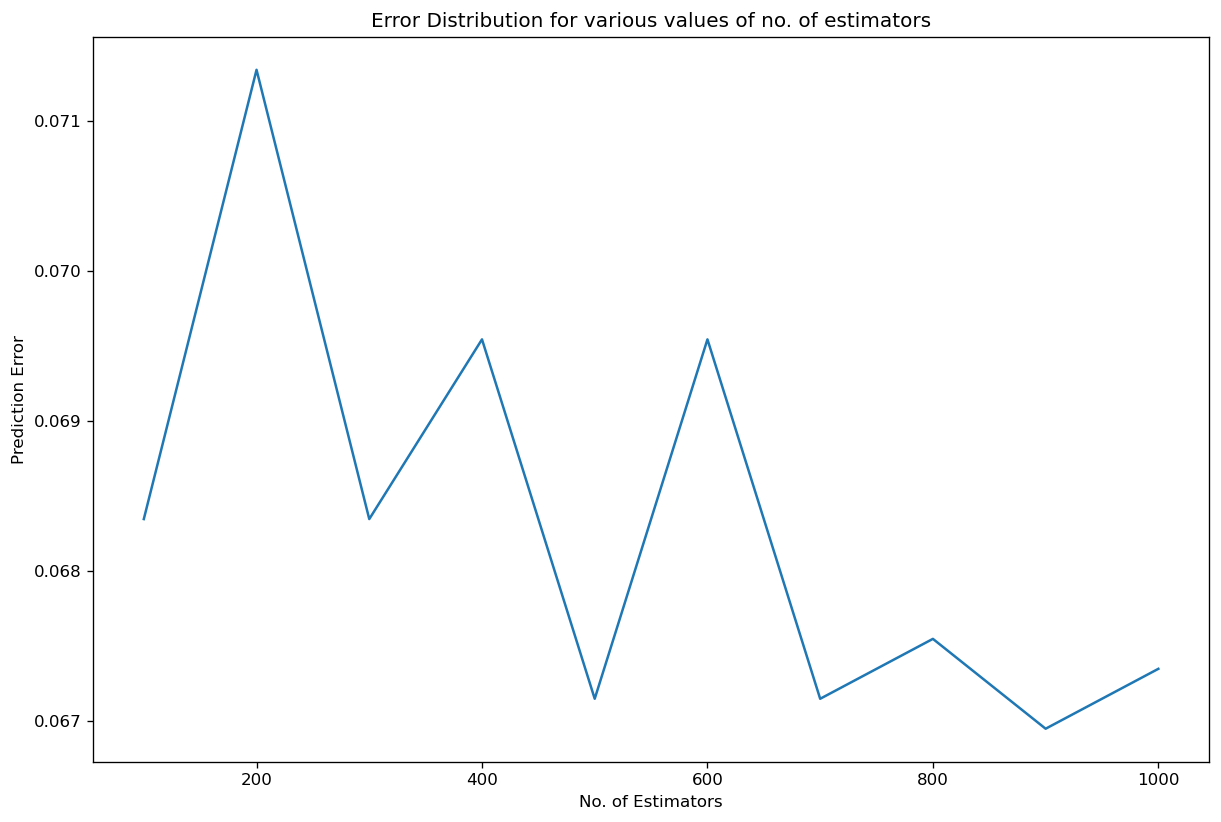

In [ ]:
plt.figure(figsize=(12,8),dpi=120)
sns.lineplot(range(100,1001,100),error_rates)
plt.xlabel('No. of Estimators')
plt.ylabel('Prediction Error')
plt.title('Error Distribution for various values of no. of estimators')

Text(0.5, 1.0, 'Misclassifications for distinct no. of estimators')

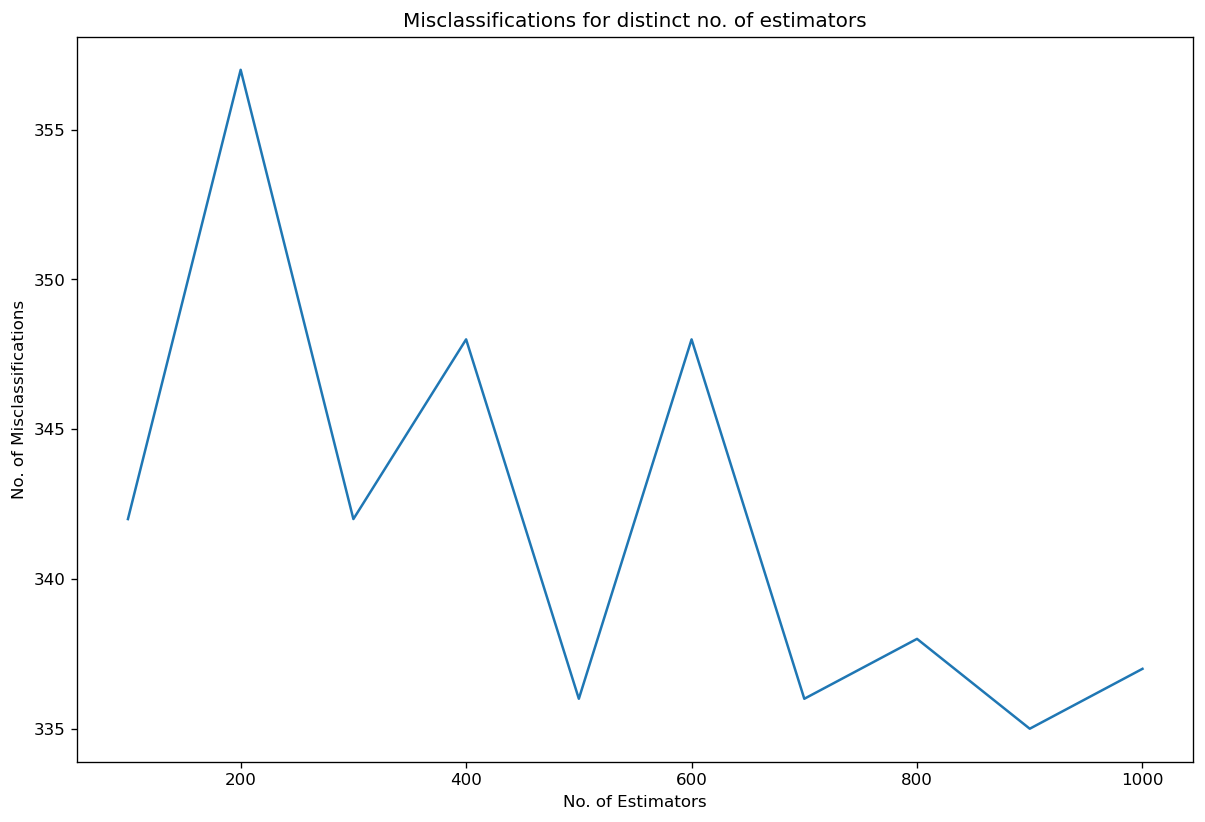

In [ ]:
plt.figure(figsize=(12,8),dpi=120)
sns.lineplot(range(100,1001,100),misclassifications)
plt.xlabel('No. of Estimators')
plt.ylabel('No. of Misclassifications')
plt.title('Misclassifications for distinct no. of estimators')

We can clearly observe that the error rates and no. of misclassifications level off at about 900 estimators and don't reduce further down than that even after reaching 1000 estimators in total.. 

### For Adaptive Boosting Classifier

In [ ]:
base_ada = AdaBoostClassifier(random_state=101)

In [ ]:
param_grid = {'n_estimators': [100,400,700,1000],
              'learning_rate': [0.2,0.5,0.8,1],
              'algorithm': ['SAMME', 'SAMME.R']
             }

In [ ]:
grid_ada = RandomizedSearchCV(base_ada,param_grid,verbose=4)
grid_ada.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END algorithm=SAMME, learning_rate=0.8, n_estimators=1000;, score=0.925 total time=  25.8s
[CV 2/5] END algorithm=SAMME, learning_rate=0.8, n_estimators=1000;, score=0.928 total time=  26.4s
[CV 3/5] END algorithm=SAMME, learning_rate=0.8, n_estimators=1000;, score=0.925 total time=  25.1s
[CV 4/5] END algorithm=SAMME, learning_rate=0.8, n_estimators=1000;, score=0.923 total time=  25.0s
[CV 5/5] END algorithm=SAMME, learning_rate=0.8, n_estimators=1000;, score=0.930 total time=  26.9s
[CV 1/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=100;, score=0.926 total time=   3.2s
[CV 2/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=100;, score=0.929 total time=   3.1s
[CV 3/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=100;, score=0.923 total time=   3.1s
[CV 4/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=100;, score=0.923 total time=   3.0s
[CV 5/5] END algorithm=SAMME.R, learning_ra

RandomizedSearchCV(estimator=AdaBoostClassifier(random_state=101),
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.2, 0.5, 0.8, 1],
                                        'n_estimators': [100, 400, 700, 1000]},
                   verbose=4)

In [ ]:
grid_ada.best_estimator_.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 0.5,
 'n_estimators': 1000,
 'random_state': 101}

In [ ]:
grid_ada.best_score_

0.9281230133072842

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      2301
           1       0.91      0.97      0.94      2703

    accuracy                           0.93      5004
   macro avg       0.93      0.93      0.93      5004
weighted avg       0.93      0.93      0.93      5004



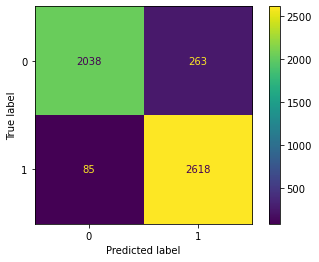

In [ ]:
grid_ada_pred = grid_ada.predict(X_test)
print(classification_report(y_test,grid_ada_pred))
plot_confusion_matrix(grid_ada,X_test,y_test)

In [ ]:
optimized_ada = AdaBoostClassifier(n_estimators=400,learning_rate=1,algorithm='SAMME.R',random_state=101)
optimized_ada.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=400, random_state=101)

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      2301
           1       0.91      0.97      0.94      2703

    accuracy                           0.93      5004
   macro avg       0.94      0.93      0.93      5004
weighted avg       0.93      0.93      0.93      5004



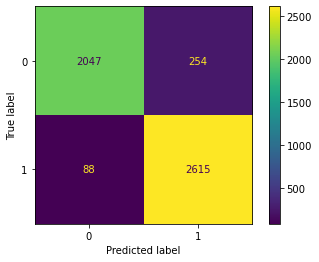

In [ ]:
optimized_ada_pred = optimized_ada.predict(X_test)
print(classification_report(y_test,optimized_ada_pred))
plot_confusion_matrix(optimized_ada,X_test,y_test)

### For Gradient Boosting Classifier

In [ ]:
base_gbc = GradientBoostingClassifier(random_state=101)

In [ ]:
param_grid = {'loss': ['deviance','exponential'],
              'n_estimators': [100,400,700,1000],
              'learning_rate': [0.2,0.4,0.7,1],
              'criterion': ['friedman_mse', 'mse'],
              'max_depth': [15,50,100,150],
              'max_features': ['auto','log2',None]
             }

In [ ]:
grid_gbc = RandomizedSearchCV(base_gbc,param_grid,verbose=3,cv=2)
grid_gbc.fit(X_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 1/2] END criterion=mse, learning_rate=0.7, loss=deviance, max_depth=50, max_features=auto, n_estimators=1000;, score=0.908 total time=   6.0s
[CV 2/2] END criterion=mse, learning_rate=0.7, loss=deviance, max_depth=50, max_features=auto, n_estimators=1000;, score=0.914 total time=   6.5s
[CV 1/2] END criterion=friedman_mse, learning_rate=0.4, loss=exponential, max_depth=150, max_features=log2, n_estimators=700;, score=0.927 total time=   5.6s
[CV 2/2] END criterion=friedman_mse, learning_rate=0.4, loss=exponential, max_depth=150, max_features=log2, n_estimators=700;, score=0.926 total time=   5.4s
[CV 1/2] END criterion=friedman_mse, learning_rate=0.4, loss=deviance, max_depth=50, max_features=None, n_estimators=700;, score=0.909 total time=   7.6s
[CV 2/2] END criterion=friedman_mse, learning_rate=0.4, loss=deviance, max_depth=50, max_features=None, n_estimators=700;, score=0.913 total time=   7.5s
[CV 1/2] END criterion=

RandomizedSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=101),
                   param_distributions={'criterion': ['friedman_mse', 'mse'],
                                        'learning_rate': [0.2, 0.4, 0.7, 1],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': [15, 50, 100, 150],
                                        'max_features': ['auto', 'log2', None],
                                        'n_estimators': [100, 400, 700, 1000]},
                   verbose=3)

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      2301
           1       0.93      0.95      0.94      2703

    accuracy                           0.93      5004
   macro avg       0.93      0.93      0.93      5004
weighted avg       0.93      0.93      0.93      5004



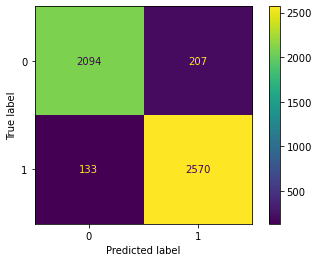

In [ ]:
grid_gbc_pred = grid_gbc.predict(X_test)
print(classification_report(y_test,grid_gbc_pred))
plot_confusion_matrix(grid_gbc,X_test,y_test)

In [ ]:
optimized_gbc = GradientBoostingClassifier(n_estimators=1000,max_depth=8,loss='exponential',learning_rate=0.7,criterion='friedman_mse',random_state=101)
optimized_gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, loss='exponential', max_depth=8,
                           n_estimators=1000, random_state=101)

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      2301
           1       0.93      0.95      0.94      2703

    accuracy                           0.93      5004
   macro avg       0.93      0.93      0.93      5004
weighted avg       0.93      0.93      0.93      5004



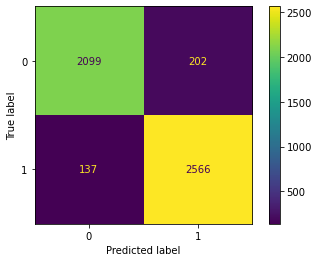

In [ ]:
optimized_gbc_pred = optimized_gbc.predict(X_test)
print(classification_report(y_test,optimized_gbc_pred))
plot_confusion_matrix(optimized_gbc,X_test,y_test)

### For Histogram-based Gradient Boosting Classifier

In [ ]:
base_hgbc = HistGradientBoostingClassifier(random_state=101,loss='binary_crossentropy',verbose=2)

In [ ]:
param_grid = {'learning_rate': [0.2,0.5,0.8,1],
             'max_bins': [32,64,128,255],
             'warm_start': [True,False]
             }

In [ ]:
grid_hgbc = RandomizedSearchCV(base_hgbc,param_grid,verbose=5,cv=RepeatedKFold(n_splits=8,n_repeats=2))
grid_hgbc.fit(X_train,y_train)

Fitting 16 folds for each of 10 candidates, totalling 160 fits
Binning 0.004 GB of training data: 0.049 s
Binning 0.000 GB of validation data: 0.002 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.23717, val loss: 0.23089, in 0.015s
[2/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.17097, val loss: 0.16987, in 0.017s
[3/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.15477, val loss: 0.16142, in 0.015s
[4/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.15392, val loss: 0.17655, in 0.014s
[5/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.15912, val loss: 0.19017, in 0.014s
[6/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.16156, val loss: 0.19979, in 0.010s
[7/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.21352, val loss: 0.21320, in 0.013s
[8/100] 1 tree, 31 leaves, max depth = 15, train loss: 0.23935, val loss: 0.22058, in 0.013s
[9/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.77467, val loss: 0.71

[CV 5/16] END learning_rate=1, max_bins=64, warm_start=False;, score=0.919 total time=   0.2s
Binning 0.004 GB of training data: 0.045 s
Binning 0.000 GB of validation data: 0.002 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.23390, val loss: 0.24202, in 0.011s
[2/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.16944, val loss: 0.18116, in 0.012s
[3/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.15359, val loss: 0.17367, in 0.012s
[4/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.14799, val loss: 0.18098, in 0.011s
[5/100] 1 tree, 31 leaves, max depth = 13, train loss: 0.15959, val loss: 0.19494, in 0.010s
[6/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.15619, val loss: 0.19227, in 0.010s
[7/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.17373, val loss: 0.21695, in 0.009s
[8/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.17406, val loss: 0.20620, in 0.009s
[9/100] 1 tree, 31 leaves, max depth = 11, trai

Binning 0.004 GB of training data: 0.043 s
Binning 0.000 GB of validation data: 0.002 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.23176, val loss: 0.23275, in 0.012s
[2/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.16713, val loss: 0.17152, in 0.011s
[3/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.15097, val loss: 0.16379, in 0.011s
[4/100] 1 tree, 31 leaves, max depth = 15, train loss: 0.14943, val loss: 0.16817, in 0.011s
[5/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.15434, val loss: 0.19213, in 0.010s
[6/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.17884, val loss: 0.18632, in 0.011s
[7/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.31260, val loss: 0.38026, in 0.008s
[8/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.24644, val loss: 0.21336, in 0.009s
[9/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.34544, val loss: 0.25734, in 0.009s
[10/100] 1 tree, 31 leaves, max depth = 10, train

Binning 0.004 GB of training data: 0.043 s
Binning 0.000 GB of validation data: 0.002 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.23531, val loss: 0.23376, in 0.012s
[2/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.16970, val loss: 0.17848, in 0.011s
[3/100] 1 tree, 31 leaves, max depth = 14, train loss: 0.15379, val loss: 0.17167, in 0.011s
[4/100] 1 tree, 31 leaves, max depth = 14, train loss: 0.14733, val loss: 0.17349, in 0.010s
[5/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.14196, val loss: 0.17524, in 0.011s
[6/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.14300, val loss: 0.17967, in 0.011s
[7/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.15919, val loss: 0.18352, in 0.010s
[8/100] 1 tree, 31 leaves, max depth = 15, train loss: 0.15575, val loss: 0.18951, in 0.011s
[9/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.16481, val loss: 0.21397, in 0.011s
[10/100] 1 tree, 31 leaves, max depth = 10, t

Binning 0.004 GB of training data: 0.050 s
Binning 0.000 GB of validation data: 0.002 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.23172, val loss: 0.23978, in 0.010s
[2/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.17401, val loss: 0.18817, in 0.010s
[3/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.15735, val loss: 0.18503, in 0.010s
[4/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.15925, val loss: 0.19698, in 0.011s
[5/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.15209, val loss: 0.19542, in 0.010s
[6/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.15022, val loss: 0.20601, in 0.009s
[7/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.14512, val loss: 0.21291, in 0.011s
[8/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.14963, val loss: 0.21414, in 0.010s
[9/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.18649, val loss: 0.27462, in 0.009s
[10/100] 1 tree, 31 leaves, max depth = 9, trai

[16/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.15135, val loss: 0.16110, in 0.013s
[17/100] 1 tree, 31 leaves, max depth = 13, train loss: 0.14833, val loss: 0.15962, in 0.013s
[18/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.14581, val loss: 0.15779, in 0.012s
[19/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.14339, val loss: 0.15676, in 0.012s
[20/100] 1 tree, 31 leaves, max depth = 14, train loss: 0.14121, val loss: 0.15617, in 0.013s
[21/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.13882, val loss: 0.15580, in 0.013s
[22/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.13716, val loss: 0.15538, in 0.012s
[23/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.13518, val loss: 0.15519, in 0.012s
[24/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.13362, val loss: 0.15474, in 0.013s
[25/100] 1 tree, 31 leaves, max depth = 17, train loss: 0.13179, val loss: 0.15487, in 0.013s
[26/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.13

[27/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.12915, val loss: 0.15411, in 0.013s
[28/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.12776, val loss: 0.15481, in 0.013s
[29/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.12632, val loss: 0.15471, in 0.013s
[30/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.12503, val loss: 0.15421, in 0.012s
[31/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.12338, val loss: 0.15350, in 0.011s
[32/100] 1 tree, 31 leaves, max depth = 16, train loss: 0.12183, val loss: 0.15312, in 0.012s
[33/100] 1 tree, 31 leaves, max depth = 16, train loss: 0.12023, val loss: 0.15302, in 0.012s
[34/100] 1 tree, 31 leaves, max depth = 13, train loss: 0.11914, val loss: 0.15251, in 0.012s
[35/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.11783, val loss: 0.15264, in 0.011s
[36/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.11638, val loss: 0.15369, in 0.012s
[37/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.11

[22/100] 1 tree, 31 leaves, max depth = 18, train loss: 0.13668, val loss: 0.16403, in 0.012s
[23/100] 1 tree, 31 leaves, max depth = 15, train loss: 0.13511, val loss: 0.16309, in 0.011s
[24/100] 1 tree, 31 leaves, max depth = 15, train loss: 0.13327, val loss: 0.16284, in 0.012s
[25/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.13180, val loss: 0.16261, in 0.011s
[26/100] 1 tree, 31 leaves, max depth = 13, train loss: 0.13031, val loss: 0.16251, in 0.012s
[27/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.12866, val loss: 0.16209, in 0.012s
[28/100] 1 tree, 31 leaves, max depth = 14, train loss: 0.12707, val loss: 0.16264, in 0.012s
[29/100] 1 tree, 31 leaves, max depth = 14, train loss: 0.12505, val loss: 0.16265, in 0.010s
[30/100] 1 tree, 31 leaves, max depth = 16, train loss: 0.12358, val loss: 0.16293, in 0.011s
[31/100] 1 tree, 31 leaves, max depth = 13, train loss: 0.12236, val loss: 0.16232, in 0.013s
[32/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.12

[25/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.13399, val loss: 0.16553, in 0.013s
[26/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.13201, val loss: 0.16585, in 0.012s
[27/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.13058, val loss: 0.16603, in 0.013s
[28/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.12897, val loss: 0.16609, in 0.012s
[29/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.12764, val loss: 0.16604, in 0.011s
[30/100] 1 tree, 31 leaves, max depth = 15, train loss: 0.12574, val loss: 0.16550, in 0.013s
[31/100] 1 tree, 31 leaves, max depth = 16, train loss: 0.12425, val loss: 0.16585, in 0.012s
[32/100] 1 tree, 31 leaves, max depth = 15, train loss: 0.12310, val loss: 0.16598, in 0.012s
[33/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.12174, val loss: 0.16642, in 0.012s
[34/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.12044, val loss: 0.16668, in 0.012s
[35/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.119

[28/100] 1 tree, 31 leaves, max depth = 14, train loss: 0.12610, val loss: 0.17092, in 0.012s
[29/100] 1 tree, 31 leaves, max depth = 14, train loss: 0.12464, val loss: 0.17050, in 0.014s
[30/100] 1 tree, 31 leaves, max depth = 13, train loss: 0.12346, val loss: 0.17079, in 0.012s
[31/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.12211, val loss: 0.17082, in 0.014s
[32/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.12101, val loss: 0.17086, in 0.011s
[33/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.11933, val loss: 0.17122, in 0.012s
[34/100] 1 tree, 31 leaves, max depth = 13, train loss: 0.11793, val loss: 0.17154, in 0.012s
[35/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.11699, val loss: 0.17190, in 0.011s
[36/100] 1 tree, 31 leaves, max depth = 17, train loss: 0.11539, val loss: 0.17229, in 0.013s
[37/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.11419, val loss: 0.17176, in 0.011s
[38/100] 1 tree, 31 leaves, max depth = 13, train loss: 0.11

[31/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.12453, val loss: 0.13921, in 0.011s
[32/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.12327, val loss: 0.13924, in 0.013s
[33/100] 1 tree, 31 leaves, max depth = 13, train loss: 0.12208, val loss: 0.13900, in 0.011s
[34/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.12090, val loss: 0.13879, in 0.011s
[35/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.11953, val loss: 0.13892, in 0.012s
[36/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.11829, val loss: 0.13973, in 0.013s
[37/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.11720, val loss: 0.14019, in 0.011s
[38/100] 1 tree, 31 leaves, max depth = 13, train loss: 0.11620, val loss: 0.14006, in 0.010s
[39/100] 1 tree, 31 leaves, max depth = 15, train loss: 0.11445, val loss: 0.13999, in 0.014s
[40/100] 1 tree, 31 leaves, max depth = 7, train loss: 0.11319, val loss: 0.14050, in 0.013s
[41/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.11218, 

[32/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.12117, val loss: 0.15584, in 0.013s
[33/100] 1 tree, 31 leaves, max depth = 13, train loss: 0.12013, val loss: 0.15588, in 0.011s
[34/100] 1 tree, 31 leaves, max depth = 13, train loss: 0.11877, val loss: 0.15607, in 0.011s
[35/100] 1 tree, 31 leaves, max depth = 14, train loss: 0.11684, val loss: 0.15646, in 0.012s
[36/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.11579, val loss: 0.15654, in 0.012s
Fit 36 trees in 0.523 s, (1116 total leaves)
Time spent computing histograms: 0.157s
Time spent finding best splits:  0.021s
Time spent applying splits:      0.045s
Time spent predicting:           0.003s
[CV 14/16] END learning_rate=0.2, max_bins=128, warm_start=False;, score=0.926 total time=   0.4s
Binning 0.004 GB of training data: 0.043 s
Binning 0.000 GB of validation data: 0.002 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.54322, val loss: 0.54520, in 0.013s
[2/100] 1 tree

Binning 0.004 GB of training data: 0.042 s
Binning 0.000 GB of validation data: 0.002 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.23390, val loss: 0.24202, in 0.011s
[2/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.16944, val loss: 0.18116, in 0.011s
[3/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.15359, val loss: 0.17367, in 0.011s
[4/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.14799, val loss: 0.18098, in 0.010s
[5/100] 1 tree, 31 leaves, max depth = 13, train loss: 0.15959, val loss: 0.19494, in 0.011s
[6/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.15619, val loss: 0.19227, in 0.009s
[7/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.17373, val loss: 0.21695, in 0.009s
[8/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.17406, val loss: 0.20620, in 0.008s
[9/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.50596, val loss: 0.74669, in 0.009s
[10/100] 1 tree, 31 leaves, max depth = 9, train

Binning 0.004 GB of training data: 0.041 s
Binning 0.000 GB of validation data: 0.002 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.23531, val loss: 0.23376, in 0.011s
[2/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.16970, val loss: 0.17848, in 0.012s
[3/100] 1 tree, 31 leaves, max depth = 14, train loss: 0.15379, val loss: 0.17167, in 0.011s
[4/100] 1 tree, 31 leaves, max depth = 14, train loss: 0.14733, val loss: 0.17349, in 0.010s
[5/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.14196, val loss: 0.17524, in 0.011s
[6/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.14300, val loss: 0.17967, in 0.010s
[7/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.15919, val loss: 0.18352, in 0.011s
[8/100] 1 tree, 31 leaves, max depth = 15, train loss: 0.15575, val loss: 0.18951, in 0.010s
[9/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.16481, val loss: 0.21397, in 0.011s
[10/100] 1 tree, 31 leaves, max depth = 10, t

Time spent predicting:           0.002s
[CV 2/16] END learning_rate=0.2, max_bins=32, warm_start=True;, score=0.919 total time=   0.3s
Binning 0.004 GB of training data: 0.044 s
Binning 0.000 GB of validation data: 0.002 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.54288, val loss: 0.54540, in 0.011s
[2/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.44474, val loss: 0.44931, in 0.010s
[3/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.37507, val loss: 0.38104, in 0.011s
[4/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.32378, val loss: 0.33131, in 0.010s
[5/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.28527, val loss: 0.29363, in 0.011s
[6/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.25574, val loss: 0.26533, in 0.011s
[7/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.23298, val loss: 0.24396, in 0.010s
[8/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.21542, val loss: 0.22760, in 0.011s
[9/100] 

Binning 0.004 GB of training data: 0.049 s
Binning 0.000 GB of validation data: 0.002 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.54302, val loss: 0.54485, in 0.011s
[2/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.44498, val loss: 0.44813, in 0.010s
[3/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.37542, val loss: 0.37929, in 0.011s
[4/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.32421, val loss: 0.32904, in 0.012s
[5/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.28567, val loss: 0.29096, in 0.010s
[6/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.25628, val loss: 0.26200, in 0.012s
[7/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.23370, val loss: 0.24010, in 0.014s
[8/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.21612, val loss: 0.22316, in 0.011s
[9/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.20229, val loss: 0.20996, in 0.011s
[10/100] 1 tree, 31 leaves, max depth = 8, train 

[CV 6/16] END learning_rate=0.2, max_bins=32, warm_start=True;, score=0.929 total time=   0.4s
Binning 0.004 GB of training data: 0.045 s
Binning 0.000 GB of validation data: 0.002 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.54240, val loss: 0.54352, in 0.010s
[2/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.44417, val loss: 0.44641, in 0.011s
[3/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.37436, val loss: 0.37767, in 0.010s
[4/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.32305, val loss: 0.32723, in 0.011s
[5/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.28459, val loss: 0.29007, in 0.011s
[6/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.25495, val loss: 0.26164, in 0.010s
[7/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.23208, val loss: 0.23979, in 0.011s
[8/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.21436, val loss: 0.22370, in 0.011s
[9/100] 1 tree, 31 leaves, max depth = 9, train

[10/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.19194, val loss: 0.18612, in 0.010s
[11/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.18370, val loss: 0.17781, in 0.010s
[12/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.17720, val loss: 0.17101, in 0.011s
[13/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.17196, val loss: 0.16616, in 0.010s
[14/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.16747, val loss: 0.16211, in 0.010s
[15/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.16329, val loss: 0.15839, in 0.010s
[16/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.15960, val loss: 0.15623, in 0.010s
[17/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.15676, val loss: 0.15418, in 0.010s
[18/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.15398, val loss: 0.15262, in 0.010s
[19/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.15150, val loss: 0.15140, in 0.009s
[20/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.1491

[10/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.18959, val loss: 0.19394, in 0.010s
[11/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.18117, val loss: 0.18570, in 0.010s
[12/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.17432, val loss: 0.17949, in 0.011s
[13/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.16906, val loss: 0.17543, in 0.010s
[14/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.16447, val loss: 0.17147, in 0.010s
[15/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.16016, val loss: 0.16890, in 0.010s
[16/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.15649, val loss: 0.16642, in 0.010s
[17/100] 1 tree, 31 leaves, max depth = 14, train loss: 0.15366, val loss: 0.16495, in 0.010s
[18/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.15111, val loss: 0.16358, in 0.010s
[19/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.14893, val loss: 0.16247, in 0.011s
[20/100] 1 tree, 31 leaves, max depth = 16, train loss: 0.14672,

[12/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.17585, val loss: 0.19846, in 0.010s
[13/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.17045, val loss: 0.19453, in 0.011s
[14/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.16596, val loss: 0.19124, in 0.011s
[15/100] 1 tree, 31 leaves, max depth = 16, train loss: 0.16169, val loss: 0.18938, in 0.010s
[16/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.15818, val loss: 0.18791, in 0.011s
[17/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.15545, val loss: 0.18665, in 0.011s
[18/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.15273, val loss: 0.18541, in 0.010s
[19/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.15029, val loss: 0.18439, in 0.012s
[20/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.14834, val loss: 0.18372, in 0.010s
[21/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.14665, val loss: 0.18344, in 0.010s
[22/100] 1 tree, 31 leaves, max depth = 13, train loss: 0.14

[24/100] 1 tree, 31 leaves, max depth = 14, train loss: 0.13912, val loss: 0.17820, in 0.010s
[25/100] 1 tree, 31 leaves, max depth = 14, train loss: 0.13760, val loss: 0.17794, in 0.010s
[26/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.13588, val loss: 0.17802, in 0.010s
[27/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.13449, val loss: 0.17839, in 0.010s
[28/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.13313, val loss: 0.17874, in 0.009s
[29/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.13148, val loss: 0.17821, in 0.009s
[30/100] 1 tree, 31 leaves, max depth = 13, train loss: 0.13014, val loss: 0.17790, in 0.010s
[31/100] 1 tree, 31 leaves, max depth = 14, train loss: 0.12837, val loss: 0.17797, in 0.009s
[32/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.12725, val loss: 0.17784, in 0.009s
[33/100] 1 tree, 31 leaves, max depth = 13, train loss: 0.12573, val loss: 0.17757, in 0.009s
[34/100] 1 tree, 31 leaves, max depth = 13, train loss: 0.12

[16/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.11772, val loss: 0.16234, in 0.014s
[17/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.11584, val loss: 0.16361, in 0.012s
[18/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.11314, val loss: 0.16377, in 0.013s
Fit 18 trees in 0.306 s, (558 total leaves)
Time spent computing histograms: 0.085s
Time spent finding best splits:  0.013s
Time spent applying splits:      0.022s
Time spent predicting:           0.001s
[CV 1/16] END learning_rate=0.5, max_bins=255, warm_start=False;, score=0.928 total time=   0.2s
Binning 0.004 GB of training data: 0.043 s
Binning 0.000 GB of validation data: 0.002 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.37852, val loss: 0.37760, in 0.013s
[2/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.26597, val loss: 0.26441, in 0.015s
[3/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.20669, val loss: 0.20808, in 0.015s
[4/100] 1 tree, 31 le

[12/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.12671, val loss: 0.17790, in 0.013s
[13/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.12357, val loss: 0.17835, in 0.014s
[14/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.12008, val loss: 0.17905, in 0.013s
[15/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.11714, val loss: 0.17826, in 0.013s
[16/100] 1 tree, 31 leaves, max depth = 13, train loss: 0.11496, val loss: 0.18129, in 0.013s
[17/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.11189, val loss: 0.18263, in 0.013s
Fit 17 trees in 0.299 s, (527 total leaves)
Time spent computing histograms: 0.084s
Time spent finding best splits:  0.013s
Time spent applying splits:      0.021s
Time spent predicting:           0.001s
[CV 5/16] END learning_rate=0.5, max_bins=255, warm_start=False;, score=0.929 total time=   0.2s
Binning 0.004 GB of training data: 0.044 s
Binning 0.000 GB of validation data: 0.002 s
Fitting gradient boosted rounds:
[1/100] 1 tree,

[12/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.12901, val loss: 0.14945, in 0.013s
[13/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.12620, val loss: 0.14953, in 0.013s
[14/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.12312, val loss: 0.15170, in 0.013s
[15/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.12038, val loss: 0.15146, in 0.012s
[16/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.11727, val loss: 0.15595, in 0.012s
[17/100] 1 tree, 31 leaves, max depth = 14, train loss: 0.11470, val loss: 0.15994, in 0.011s
[18/100] 1 tree, 31 leaves, max depth = 17, train loss: 0.11178, val loss: 0.15947, in 0.012s
Fit 18 trees in 0.307 s, (558 total leaves)
Time spent computing histograms: 0.088s
Time spent finding best splits:  0.013s
Time spent applying splits:      0.022s
Time spent predicting:           0.001s
[CV 9/16] END learning_rate=0.5, max_bins=255, warm_start=False;, score=0.925 total time=   0.2s
Binning 0.004 GB of training data: 0.044 s

[7/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.14692, val loss: 0.18043, in 0.014s
[8/100] 1 tree, 31 leaves, max depth = 13, train loss: 0.14212, val loss: 0.17970, in 0.013s
[9/100] 1 tree, 31 leaves, max depth = 13, train loss: 0.13817, val loss: 0.18329, in 0.014s
[10/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.13451, val loss: 0.18583, in 0.013s
[11/100] 1 tree, 31 leaves, max depth = 14, train loss: 0.13202, val loss: 0.19211, in 0.012s
[12/100] 1 tree, 31 leaves, max depth = 13, train loss: 0.12914, val loss: 0.18918, in 0.012s
[13/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.12644, val loss: 0.19227, in 0.014s
[14/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.12323, val loss: 0.19403, in 0.013s
[15/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.11994, val loss: 0.19778, in 0.012s
[16/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.11696, val loss: 0.20075, in 0.013s
[17/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.11386, 

[5/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.15973, val loss: 0.19223, in 0.012s
[6/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.17184, val loss: 0.19327, in 0.011s
[7/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.22716, val loss: 0.27279, in 0.011s
[8/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.26074, val loss: 0.35927, in 0.012s
[9/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.52409, val loss: 0.54469, in 0.011s
[10/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.49211, val loss: 0.49114, in 0.010s
[11/100] 1 tree, 31 leaves, max depth = 13, train loss: 0.55223, val loss: 0.57708, in 0.011s
[12/100] 1 tree, 31 leaves, max depth = 13, train loss: 0.85752, val loss: 0.54514, in 0.010s
[13/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.82605, val loss: 0.56439, in 0.012s
Fit 13 trees in 0.220 s, (403 total leaves)
Time spent computing histograms: 0.047s
Time spent finding best splits:  0.007s
Time spent applying splits:      0.0

[6/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.15648, val loss: 0.19995, in 0.011s
[7/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.15876, val loss: 0.21229, in 0.012s
[8/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.17204, val loss: 0.23808, in 0.011s
[9/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.17298, val loss: 0.24943, in 0.012s
[10/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.17464, val loss: 0.25686, in 0.011s
[11/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.16907, val loss: 0.26530, in 0.012s
[12/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.16854, val loss: 0.28231, in 0.011s
[13/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.24571, val loss: 0.29831, in 0.010s
Fit 13 trees in 0.220 s, (403 total leaves)
Time spent computing histograms: 0.049s
Time spent finding best splits:  0.007s
Time spent applying splits:      0.015s
Time spent predicting:           0.001s
[CV 6/16] END learning_rate=1, max_bins=128, warm

[6/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.14423, val loss: 0.18504, in 0.013s
[7/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.14279, val loss: 0.19138, in 0.012s
[8/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.15885, val loss: 0.22453, in 0.011s
[9/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.16356, val loss: 0.22240, in 0.010s
[10/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.23325, val loss: 0.25075, in 0.011s
[11/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.24879, val loss: 0.25424, in 0.011s
[12/100] 1 tree, 31 leaves, max depth = 13, train loss: 0.69534, val loss: 0.48789, in 0.011s
[13/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.89473, val loss: 0.66418, in 0.011s
Fit 13 trees in 0.225 s, (403 total leaves)
Time spent computing histograms: 0.048s
Time spent finding best splits:  0.007s
Time spent applying splits:      0.014s
Time spent predicting:           0.001s
[CV 11/16] END learning_rate=1, max_bins=128, warm

[6/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.15114, val loss: 0.17273, in 0.011s
[7/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.15541, val loss: 0.17583, in 0.010s
[8/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.20577, val loss: 0.23059, in 0.011s
[9/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.39881, val loss: 0.20866, in 0.011s
[10/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.45066, val loss: 0.21108, in 0.010s
[11/100] 1 tree, 31 leaves, max depth = 9, train loss: 1.82505, val loss: 1.14106, in 0.015s
[12/100] 1 tree, 31 leaves, max depth = 11, train loss: 1.79862, val loss: 1.15976, in 0.012s
[13/100] 1 tree, 31 leaves, max depth = 9, train loss: 1.24936, val loss: 0.76452, in 0.013s
[14/100] 1 tree, 31 leaves, max depth = 8, train loss: 1.15498, val loss: 0.78789, in 0.011s
Fit 14 trees in 0.230 s, (434 total leaves)
Time spent computing histograms: 0.051s
Time spent finding best splits:  0.007s
Time spent applying splits:      0.016s

[6/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.15183, val loss: 0.15937, in 0.014s
[7/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.14489, val loss: 0.15417, in 0.015s
[8/100] 1 tree, 31 leaves, max depth = 13, train loss: 0.13986, val loss: 0.15365, in 0.013s
[9/100] 1 tree, 31 leaves, max depth = 15, train loss: 0.13616, val loss: 0.15558, in 0.015s
[10/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.13279, val loss: 0.15887, in 0.013s
[11/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.12901, val loss: 0.16143, in 0.014s
[12/100] 1 tree, 31 leaves, max depth = 14, train loss: 0.12551, val loss: 0.16669, in 0.013s
[13/100] 1 tree, 31 leaves, max depth = 13, train loss: 0.12203, val loss: 0.16733, in 0.014s
[14/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.11906, val loss: 0.16733, in 0.014s
[15/100] 1 tree, 31 leaves, max depth = 13, train loss: 0.11646, val loss: 0.16771, in 0.012s
[16/100] 1 tree, 31 leaves, max depth = 13, train loss: 0.11323, 

[5/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.16380, val loss: 0.17648, in 0.015s
[6/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.15386, val loss: 0.16888, in 0.014s
[7/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.14674, val loss: 0.16399, in 0.014s
[8/100] 1 tree, 31 leaves, max depth = 14, train loss: 0.14233, val loss: 0.16571, in 0.013s
[9/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.13831, val loss: 0.16502, in 0.013s
[10/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.13492, val loss: 0.16689, in 0.013s
[11/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.13141, val loss: 0.16669, in 0.014s
[12/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.12846, val loss: 0.17031, in 0.011s
[13/100] 1 tree, 31 leaves, max depth = 14, train loss: 0.12520, val loss: 0.17376, in 0.013s
[14/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.12194, val loss: 0.17476, in 0.013s
[15/100] 1 tree, 31 leaves, max depth = 15, train loss: 0.11921, 

[3/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.20962, val loss: 0.20024, in 0.015s
[4/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.18051, val loss: 0.17119, in 0.014s
[5/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.16444, val loss: 0.15563, in 0.015s
[6/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.15497, val loss: 0.14832, in 0.013s
[7/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.14793, val loss: 0.14357, in 0.016s
[8/100] 1 tree, 31 leaves, max depth = 14, train loss: 0.14317, val loss: 0.14272, in 0.014s
[9/100] 1 tree, 31 leaves, max depth = 13, train loss: 0.13934, val loss: 0.14403, in 0.014s
[10/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.13568, val loss: 0.14227, in 0.014s
[11/100] 1 tree, 31 leaves, max depth = 18, train loss: 0.13299, val loss: 0.14368, in 0.011s
[12/100] 1 tree, 31 leaves, max depth = 13, train loss: 0.13027, val loss: 0.14297, in 0.012s
[13/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.12774, val

Binning 0.004 GB of training data: 0.052 s
Binning 0.000 GB of validation data: 0.002 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.38231, val loss: 0.38229, in 0.014s
[2/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.26440, val loss: 0.26553, in 0.015s
[3/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.20756, val loss: 0.20996, in 0.015s
[4/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.17796, val loss: 0.18211, in 0.015s
[5/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.16186, val loss: 0.16883, in 0.015s
[6/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.15245, val loss: 0.16136, in 0.014s
[7/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.14570, val loss: 0.15787, in 0.015s
[8/100] 1 tree, 31 leaves, max depth = 14, train loss: 0.14054, val loss: 0.15786, in 0.014s
[9/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.13712, val loss: 0.16402, in 0.013s
[10/100] 1 tree, 31 leaves, max depth = 11, t

[CV 3/16] END learning_rate=0.5, max_bins=32, warm_start=True;, score=0.927 total time=   0.2s
Binning 0.004 GB of training data: 0.045 s
Binning 0.000 GB of validation data: 0.002 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.37996, val loss: 0.38195, in 0.011s
[2/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.26869, val loss: 0.27281, in 0.011s
[3/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.21273, val loss: 0.21689, in 0.011s
[4/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.18408, val loss: 0.18866, in 0.010s
[5/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.16907, val loss: 0.17541, in 0.011s
[6/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.15889, val loss: 0.16725, in 0.010s
[7/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.15270, val loss: 0.16301, in 0.011s
[8/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.14832, val loss: 0.16295, in 0.010s
[9/100] 1 tree, 31 leaves, max depth = 15, t

[12/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.13426, val loss: 0.16558, in 0.009s
[13/100] 1 tree, 31 leaves, max depth = 14, train loss: 0.13121, val loss: 0.16651, in 0.009s
[14/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.12898, val loss: 0.16785, in 0.009s
[15/100] 1 tree, 31 leaves, max depth = 15, train loss: 0.12607, val loss: 0.16941, in 0.009s
[16/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.12331, val loss: 0.16817, in 0.009s
[17/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.12160, val loss: 0.16883, in 0.009s
[18/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.11920, val loss: 0.17225, in 0.008s
[19/100] 1 tree, 31 leaves, max depth = 14, train loss: 0.11679, val loss: 0.17536, in 0.010s
Fit 19 trees in 0.261 s, (589 total leaves)
Time spent computing histograms: 0.049s
Time spent finding best splits:  0.008s
Time spent applying splits:      0.022s
Time spent predicting:           0.001s
[CV 11/16] END learning_rate=0.5, max_bins=32

[10/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.13968, val loss: 0.19010, in 0.011s
[11/100] 1 tree, 31 leaves, max depth = 15, train loss: 0.13599, val loss: 0.19172, in 0.011s
[12/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.13342, val loss: 0.19124, in 0.010s
[13/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.13066, val loss: 0.19123, in 0.011s
[14/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.12776, val loss: 0.19462, in 0.012s
[15/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.12526, val loss: 0.19811, in 0.009s
[16/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.12284, val loss: 0.20012, in 0.012s
[17/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.11991, val loss: 0.20304, in 0.014s
Fit 17 trees in 0.264 s, (527 total leaves)
Time spent computing histograms: 0.053s
Time spent finding best splits:  0.008s
Time spent applying splits:      0.023s
Time spent predicting:           0.001s
[CV 15/16] END learning_rate=0.5, max_bins=32

[CV 3/16] END learning_rate=0.8, max_bins=32, warm_start=False;, score=0.918 total time=   0.2s
Binning 0.004 GB of training data: 0.061 s
Binning 0.000 GB of validation data: 0.001 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.27615, val loss: 0.27891, in 0.014s
[2/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.19726, val loss: 0.20227, in 0.013s
[3/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.16862, val loss: 0.17449, in 0.011s
[4/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.15591, val loss: 0.16367, in 0.015s
[5/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.15126, val loss: 0.16836, in 0.013s
[6/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.14602, val loss: 0.16622, in 0.012s
[7/100] 1 tree, 31 leaves, max depth = 13, train loss: 0.14608, val loss: 0.17591, in 0.011s
[8/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.14235, val loss: 0.18119, in 0.012s
[9/100] 1 tree, 31 leaves, max depth = 13

[12/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.16326, val loss: 0.21772, in 0.011s
[13/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.15573, val loss: 0.20248, in 0.012s
[14/100] 1 tree, 31 leaves, max depth = 14, train loss: 0.15412, val loss: 0.20368, in 0.013s
Fit 14 trees in 0.256 s, (434 total leaves)
Time spent computing histograms: 0.045s
Time spent finding best splits:  0.007s
Time spent applying splits:      0.019s
Time spent predicting:           0.001s
[CV 8/16] END learning_rate=0.8, max_bins=32, warm_start=False;, score=0.922 total time=   0.2s
Binning 0.004 GB of training data: 0.055 s
Binning 0.000 GB of validation data: 0.002 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.27647, val loss: 0.27189, in 0.011s
[2/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.19552, val loss: 0.19009, in 0.015s
[3/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.16872, val loss: 0.16472, in 0.012s
[4/100] 1 tree, 31 lea

[8/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.15085, val loss: 0.22630, in 0.009s
[9/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.15797, val loss: 0.23033, in 0.010s
[10/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.15223, val loss: 0.22814, in 0.009s
[11/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.18260, val loss: 0.25727, in 0.010s
[12/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.18971, val loss: 0.29300, in 0.008s
[13/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.33643, val loss: 0.55856, in 0.010s
[14/100] 1 tree, 31 leaves, max depth = 8, train loss: 0.76516, val loss: 1.35547, in 0.010s
Fit 14 trees in 0.215 s, (434 total leaves)
Time spent computing histograms: 0.033s
Time spent finding best splits:  0.006s
Time spent applying splits:      0.015s
Time spent predicting:           0.001s
[CV 13/16] END learning_rate=0.8, max_bins=32, warm_start=False;, score=0.921 total time=   0.1s
Binning 0.004 GB of training data: 0.050 s
Bin

[21/100] 1 tree, 31 leaves, max depth = 14, train loss: 0.14224, val loss: 0.14742, in 0.014s
[22/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.14054, val loss: 0.14682, in 0.015s
[23/100] 1 tree, 31 leaves, max depth = 15, train loss: 0.13871, val loss: 0.14662, in 0.014s
[24/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.13728, val loss: 0.14654, in 0.013s
[25/100] 1 tree, 31 leaves, max depth = 14, train loss: 0.13591, val loss: 0.14657, in 0.014s
[26/100] 1 tree, 31 leaves, max depth = 13, train loss: 0.13439, val loss: 0.14650, in 0.014s
[27/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.13306, val loss: 0.14760, in 0.014s
[28/100] 1 tree, 31 leaves, max depth = 15, train loss: 0.13159, val loss: 0.14837, in 0.013s
[29/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.13022, val loss: 0.14867, in 0.015s
[30/100] 1 tree, 31 leaves, max depth = 13, train loss: 0.12890, val loss: 0.14887, in 0.014s
[31/100] 1 tree, 31 leaves, max depth = 18, train loss: 0.12

RandomizedSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=8, random_state=None),
                   estimator=HistGradientBoostingClassifier(loss='binary_crossentropy',
                                                            random_state=101,
                                                            verbose=2),
                   param_distributions={'learning_rate': [0.2, 0.5, 0.8, 1],
                                        'max_bins': [32, 64, 128, 255],
                                        'warm_start': [True, False]},
                   verbose=5)

In [ ]:
grid_hgbc.best_estimator_.get_params()

{'categorical_features': None,
 'early_stopping': 'auto',
 'l2_regularization': 0.0,
 'learning_rate': 0.2,
 'loss': 'binary_crossentropy',
 'max_bins': 128,
 'max_depth': None,
 'max_iter': 100,
 'max_leaf_nodes': 31,
 'min_samples_leaf': 20,
 'monotonic_cst': None,
 'n_iter_no_change': 10,
 'random_state': 101,
 'scoring': 'loss',
 'tol': 1e-07,
 'validation_fraction': 0.1,
 'verbose': 2,
 'warm_start': False}

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      2301
           1       0.93      0.94      0.94      2703

    accuracy                           0.93      5004
   macro avg       0.93      0.93      0.93      5004
weighted avg       0.93      0.93      0.93      5004



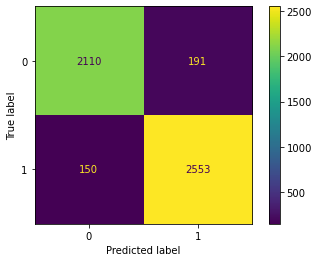

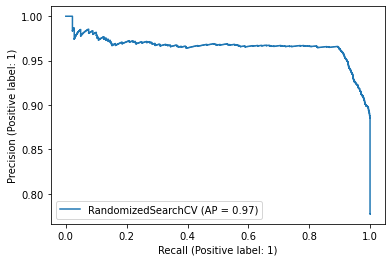

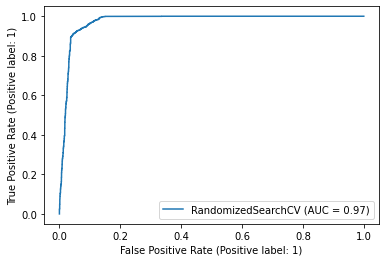

In [ ]:
grid_hgbc_pred = grid_hgbc.predict(X_test)
print(classification_report(y_test,grid_hgbc_pred))
plot_confusion_matrix(grid_hgbc,X_test,y_test)
plot_precision_recall_curve(grid_hgbc,X_test,y_test)
plot_roc_curve(grid_hgbc,X_test,y_test)

### For CatBoost Classifier Model

In [ ]:
base_cat = CatBoostClassifier(random_state=101,verbose=2)

In [ ]:
param_grid = {'learning_rate': [0.2,0.4,0.7,1],
              'n_estimators': [200,500,1000],
             'loss_function': ['Logloss','CrossEntropy'],
             'feature_border_type': ['Median','Uniform','UniformAndQuantiles','GreedyLogSum','MaxLogSum','MinEntropy'],
             'od_type': ['IncToDec','Iter'],
             'nan_mode': ['Min','Max'],
             'leaf_estimation_method': ['Newton','Gradient'],
             'bootstrap_type': ['Bayesian','Bernoulli','Poisson','MVS'],
             'score_function': ['L2','Cosine','NewtonL2','NewtonCosine'],
             'boost_from_average': [True,False],
             'langevin': [True,False],
             'grow_policy': ['SymmetricTree','Lossguide','Depthwise'],
             'use_best_model': [True,False]
             }

In [ ]:
grid_cat = RandomizedSearchCV(base_cat,param_grid,verbose=5,cv=4)
grid_cat.fit(X_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
[CV 1/4] END boost_from_average=True, bootstrap_type=MVS, feature_border_type=MaxLogSum, grow_policy=Depthwise, langevin=True, leaf_estimation_method=Newton, learning_rate=0.4, loss_function=Logloss, n_estimators=500, nan_mode=Max, od_type=Iter, score_function=NewtonCosine, use_best_model=True;, score=nan total time=   0.0s
[CV 2/4] END boost_from_average=True, bootstrap_type=MVS, feature_border_type=MaxLogSum, grow_policy=Depthwise, langevin=True, leaf_estimation_method=Newton, learning_rate=0.4, loss_function=Logloss, n_estimators=500, nan_mode=Max, od_type=Iter, score_function=NewtonCosine, use_best_model=True;, score=nan total time=   0.0s
[CV 3/4] END boost_from_average=True, bootstrap_type=MVS, feature_border_type=MaxLogSum, grow_policy=Depthwise, langevin=True, leaf_estimation_method=Newton, learning_rate=0.4, loss_function=Logloss, n_estimators=500, nan_mode=Max, od_type=Iter, score_function=NewtonCosine, use_best_mod

176:	learn: 0.0298476	total: 1.97s	remaining: 257ms
178:	learn: 0.0294908	total: 2s	remaining: 234ms
180:	learn: 0.0290806	total: 2.02s	remaining: 212ms
182:	learn: 0.0287690	total: 2.04s	remaining: 189ms
184:	learn: 0.0284393	total: 2.06s	remaining: 167ms
186:	learn: 0.0280680	total: 2.08s	remaining: 145ms
188:	learn: 0.0277542	total: 2.1s	remaining: 122ms
190:	learn: 0.0272328	total: 2.12s	remaining: 100ms
192:	learn: 0.0269955	total: 2.14s	remaining: 77.7ms
194:	learn: 0.0267316	total: 2.16s	remaining: 55.5ms
196:	learn: 0.0262257	total: 2.19s	remaining: 33.3ms
198:	learn: 0.0259542	total: 2.21s	remaining: 11.1ms
199:	learn: 0.0257865	total: 2.22s	remaining: 0us
[CV 1/4] END boost_from_average=False, bootstrap_type=Bernoulli, feature_border_type=Median, grow_policy=SymmetricTree, langevin=True, leaf_estimation_method=Gradient, learning_rate=1, loss_function=Logloss, n_estimators=200, nan_mode=Max, od_type=IncToDec, score_function=L2, use_best_model=False;, score=0.927 total time=   

82:	learn: 0.0665147	total: 922ms	remaining: 1.3s
84:	learn: 0.0655554	total: 942ms	remaining: 1.27s
86:	learn: 0.0640776	total: 962ms	remaining: 1.25s
88:	learn: 0.0629579	total: 984ms	remaining: 1.23s
90:	learn: 0.0615971	total: 1s	remaining: 1.2s
92:	learn: 0.0604891	total: 1.02s	remaining: 1.18s
94:	learn: 0.0593122	total: 1.05s	remaining: 1.16s
96:	learn: 0.0582679	total: 1.07s	remaining: 1.13s
98:	learn: 0.0572466	total: 1.09s	remaining: 1.11s
100:	learn: 0.0563565	total: 1.11s	remaining: 1.08s
102:	learn: 0.0551059	total: 1.13s	remaining: 1.06s
104:	learn: 0.0541325	total: 1.15s	remaining: 1.04s
106:	learn: 0.0531284	total: 1.17s	remaining: 1.01s
108:	learn: 0.0523452	total: 1.19s	remaining: 990ms
110:	learn: 0.0514946	total: 1.21s	remaining: 968ms
112:	learn: 0.0505529	total: 1.23s	remaining: 946ms
114:	learn: 0.0495587	total: 1.25s	remaining: 924ms
116:	learn: 0.0487372	total: 1.27s	remaining: 902ms
118:	learn: 0.0477174	total: 1.29s	remaining: 880ms
120:	learn: 0.0468481	tota

188:	learn: 0.0263526	total: 2.17s	remaining: 127ms
190:	learn: 0.0258420	total: 2.2s	remaining: 104ms
192:	learn: 0.0254856	total: 2.23s	remaining: 80.7ms
194:	learn: 0.0251843	total: 2.25s	remaining: 57.8ms
196:	learn: 0.0248624	total: 2.28s	remaining: 34.7ms
198:	learn: 0.0244917	total: 2.3s	remaining: 11.6ms
199:	learn: 0.0243827	total: 2.32s	remaining: 0us
[CV 4/4] END boost_from_average=False, bootstrap_type=Bernoulli, feature_border_type=Median, grow_policy=SymmetricTree, langevin=True, leaf_estimation_method=Gradient, learning_rate=1, loss_function=Logloss, n_estimators=200, nan_mode=Max, od_type=IncToDec, score_function=L2, use_best_model=False;, score=0.928 total time=   2.3s
[CV 1/4] END boost_from_average=True, bootstrap_type=Bernoulli, feature_border_type=GreedyLogSum, grow_policy=Depthwise, langevin=True, leaf_estimation_method=Newton, learning_rate=0.2, loss_function=Logloss, n_estimators=500, nan_mode=Min, od_type=Iter, score_function=NewtonCosine, use_best_model=True;,

32:	learn: 0.1046681	total: 699ms	remaining: 3.54s
34:	learn: 0.1002657	total: 740ms	remaining: 3.49s
36:	learn: 0.0960083	total: 779ms	remaining: 3.43s
38:	learn: 0.0924001	total: 818ms	remaining: 3.38s
40:	learn: 0.0894268	total: 858ms	remaining: 3.33s
42:	learn: 0.0868107	total: 897ms	remaining: 3.27s
44:	learn: 0.0834140	total: 941ms	remaining: 3.24s
46:	learn: 0.0811226	total: 983ms	remaining: 3.2s
48:	learn: 0.0780589	total: 1.03s	remaining: 3.16s
50:	learn: 0.0750626	total: 1.07s	remaining: 3.13s
52:	learn: 0.0724400	total: 1.11s	remaining: 3.08s
54:	learn: 0.0699228	total: 1.15s	remaining: 3.03s
56:	learn: 0.0674378	total: 1.19s	remaining: 2.99s
58:	learn: 0.0650547	total: 1.23s	remaining: 2.94s
60:	learn: 0.0627577	total: 1.27s	remaining: 2.89s
62:	learn: 0.0612045	total: 1.31s	remaining: 2.84s
64:	learn: 0.0594220	total: 1.34s	remaining: 2.79s
66:	learn: 0.0570072	total: 1.39s	remaining: 2.75s
68:	learn: 0.0553524	total: 1.43s	remaining: 2.71s
70:	learn: 0.0537723	total: 1.47

144:	learn: 0.0180682	total: 3.54s	remaining: 1.34s
146:	learn: 0.0177743	total: 3.59s	remaining: 1.29s
148:	learn: 0.0173853	total: 3.63s	remaining: 1.24s
150:	learn: 0.0170088	total: 3.68s	remaining: 1.19s
152:	learn: 0.0167405	total: 3.73s	remaining: 1.15s
154:	learn: 0.0164678	total: 3.77s	remaining: 1.09s
156:	learn: 0.0162379	total: 3.82s	remaining: 1.05s
158:	learn: 0.0158606	total: 3.86s	remaining: 996ms
160:	learn: 0.0156011	total: 3.91s	remaining: 946ms
162:	learn: 0.0154055	total: 3.95s	remaining: 897ms
164:	learn: 0.0151305	total: 4s	remaining: 847ms
166:	learn: 0.0148540	total: 4.04s	remaining: 798ms
168:	learn: 0.0146768	total: 4.08s	remaining: 749ms
170:	learn: 0.0143902	total: 4.13s	remaining: 700ms
172:	learn: 0.0140910	total: 4.17s	remaining: 651ms
174:	learn: 0.0138893	total: 4.22s	remaining: 602ms
176:	learn: 0.0136743	total: 4.26s	remaining: 554ms
178:	learn: 0.0135007	total: 4.3s	remaining: 505ms
180:	learn: 0.0133272	total: 4.35s	remaining: 456ms
182:	learn: 0.01

34:	learn: 0.1291581	total: 472ms	remaining: 2.23s
36:	learn: 0.1275449	total: 500ms	remaining: 2.2s
38:	learn: 0.1255486	total: 527ms	remaining: 2.17s
40:	learn: 0.1237503	total: 556ms	remaining: 2.15s
42:	learn: 0.1222433	total: 583ms	remaining: 2.13s
44:	learn: 0.1201381	total: 610ms	remaining: 2.1s
46:	learn: 0.1186310	total: 637ms	remaining: 2.07s
48:	learn: 0.1172014	total: 664ms	remaining: 2.05s
50:	learn: 0.1154009	total: 696ms	remaining: 2.03s
52:	learn: 0.1135848	total: 726ms	remaining: 2.01s
54:	learn: 0.1120609	total: 755ms	remaining: 1.99s
56:	learn: 0.1108179	total: 784ms	remaining: 1.97s
58:	learn: 0.1085764	total: 813ms	remaining: 1.94s
60:	learn: 0.1066676	total: 841ms	remaining: 1.92s
62:	learn: 0.1054405	total: 871ms	remaining: 1.89s
64:	learn: 0.1038253	total: 899ms	remaining: 1.87s
66:	learn: 0.1027539	total: 932ms	remaining: 1.85s
68:	learn: 0.1014586	total: 964ms	remaining: 1.83s
70:	learn: 0.1000520	total: 997ms	remaining: 1.81s
72:	learn: 0.0986822	total: 1.03s

140:	learn: 0.0636951	total: 2.09s	remaining: 874ms
142:	learn: 0.0629338	total: 2.12s	remaining: 844ms
144:	learn: 0.0619616	total: 2.15s	remaining: 814ms
146:	learn: 0.0612890	total: 2.17s	remaining: 784ms
148:	learn: 0.0607288	total: 2.2s	remaining: 753ms
150:	learn: 0.0599535	total: 2.23s	remaining: 723ms
152:	learn: 0.0591201	total: 2.26s	remaining: 693ms
154:	learn: 0.0584218	total: 2.29s	remaining: 664ms
156:	learn: 0.0576778	total: 2.32s	remaining: 634ms
158:	learn: 0.0570349	total: 2.35s	remaining: 605ms
160:	learn: 0.0563016	total: 2.37s	remaining: 575ms
162:	learn: 0.0559378	total: 2.4s	remaining: 545ms
164:	learn: 0.0552349	total: 2.43s	remaining: 516ms
166:	learn: 0.0548195	total: 2.46s	remaining: 486ms
168:	learn: 0.0542934	total: 2.48s	remaining: 456ms
170:	learn: 0.0536563	total: 2.51s	remaining: 426ms
172:	learn: 0.0532221	total: 2.54s	remaining: 397ms
174:	learn: 0.0527787	total: 2.57s	remaining: 367ms
176:	learn: 0.0523228	total: 2.6s	remaining: 337ms
178:	learn: 0.0

28:	learn: 0.1336426	total: 554ms	remaining: 3.27s
30:	learn: 0.1321461	total: 585ms	remaining: 3.19s
32:	learn: 0.1303866	total: 616ms	remaining: 3.12s
34:	learn: 0.1290694	total: 644ms	remaining: 3.04s
36:	learn: 0.1271905	total: 677ms	remaining: 2.98s
38:	learn: 0.1254552	total: 709ms	remaining: 2.93s
40:	learn: 0.1234961	total: 741ms	remaining: 2.87s
42:	learn: 0.1211081	total: 772ms	remaining: 2.82s
44:	learn: 0.1194992	total: 802ms	remaining: 2.76s
46:	learn: 0.1176154	total: 834ms	remaining: 2.71s
48:	learn: 0.1161308	total: 866ms	remaining: 2.67s
50:	learn: 0.1142631	total: 896ms	remaining: 2.62s
52:	learn: 0.1126401	total: 927ms	remaining: 2.57s
54:	learn: 0.1105220	total: 958ms	remaining: 2.53s
56:	learn: 0.1089860	total: 994ms	remaining: 2.49s
58:	learn: 0.1076225	total: 1.03s	remaining: 2.46s
60:	learn: 0.1065804	total: 1.06s	remaining: 2.41s
62:	learn: 0.1049291	total: 1.09s	remaining: 2.37s
64:	learn: 0.1036628	total: 1.12s	remaining: 2.33s
66:	learn: 0.1020468	total: 1.1

136:	learn: 0.0056777	total: 6.41s	remaining: 40.4s
138:	learn: 0.0055573	total: 6.57s	remaining: 40.7s
140:	learn: 0.0054119	total: 6.69s	remaining: 40.7s
142:	learn: 0.0052781	total: 6.88s	remaining: 41.2s
144:	learn: 0.0051367	total: 7.09s	remaining: 41.8s
146:	learn: 0.0050107	total: 7.17s	remaining: 41.6s
148:	learn: 0.0049566	total: 7.24s	remaining: 41.3s
150:	learn: 0.0048738	total: 7.37s	remaining: 41.4s
152:	learn: 0.0047780	total: 7.49s	remaining: 41.5s
154:	learn: 0.0047322	total: 7.68s	remaining: 41.9s
156:	learn: 0.0046455	total: 7.78s	remaining: 41.8s
158:	learn: 0.0045615	total: 7.91s	remaining: 41.8s
160:	learn: 0.0044812	total: 8.03s	remaining: 41.8s
162:	learn: 0.0044029	total: 8.15s	remaining: 41.8s
164:	learn: 0.0043204	total: 8.26s	remaining: 41.8s
166:	learn: 0.0042540	total: 8.35s	remaining: 41.7s
168:	learn: 0.0041895	total: 8.43s	remaining: 41.4s
170:	learn: 0.0041429	total: 8.52s	remaining: 41.3s
172:	learn: 0.0040797	total: 8.62s	remaining: 41.2s
174:	learn: 

458:	learn: 0.0022399	total: 17.9s	remaining: 21s
460:	learn: 0.0022376	total: 17.9s	remaining: 20.9s
462:	learn: 0.0022339	total: 17.9s	remaining: 20.8s
464:	learn: 0.0022328	total: 18s	remaining: 20.7s
466:	learn: 0.0022291	total: 18s	remaining: 20.6s
468:	learn: 0.0022250	total: 18.1s	remaining: 20.5s
470:	learn: 0.0022235	total: 18.1s	remaining: 20.4s
472:	learn: 0.0022131	total: 18.2s	remaining: 20.3s
474:	learn: 0.0022042	total: 18.3s	remaining: 20.2s
476:	learn: 0.0022029	total: 18.3s	remaining: 20.1s
478:	learn: 0.0021997	total: 18.4s	remaining: 20s
480:	learn: 0.0021991	total: 18.4s	remaining: 19.9s
482:	learn: 0.0021988	total: 18.5s	remaining: 19.8s
484:	learn: 0.0021977	total: 18.5s	remaining: 19.6s
486:	learn: 0.0021934	total: 18.6s	remaining: 19.6s
488:	learn: 0.0021891	total: 18.6s	remaining: 19.5s
490:	learn: 0.0021807	total: 18.7s	remaining: 19.4s
492:	learn: 0.0021792	total: 18.7s	remaining: 19.3s
494:	learn: 0.0021705	total: 18.8s	remaining: 19.2s
496:	learn: 0.002162

776:	learn: 0.0018259	total: 26.1s	remaining: 7.5s
778:	learn: 0.0018258	total: 26.2s	remaining: 7.43s
780:	learn: 0.0018215	total: 26.2s	remaining: 7.36s
782:	learn: 0.0018214	total: 26.3s	remaining: 7.28s
784:	learn: 0.0018204	total: 26.3s	remaining: 7.21s
786:	learn: 0.0018194	total: 26.4s	remaining: 7.14s
788:	learn: 0.0018171	total: 26.4s	remaining: 7.07s
790:	learn: 0.0018169	total: 26.5s	remaining: 7s
792:	learn: 0.0018157	total: 26.5s	remaining: 6.92s
794:	learn: 0.0018131	total: 26.6s	remaining: 6.85s
796:	learn: 0.0018125	total: 26.6s	remaining: 6.78s
798:	learn: 0.0018109	total: 26.7s	remaining: 6.71s
800:	learn: 0.0018102	total: 26.7s	remaining: 6.64s
802:	learn: 0.0018088	total: 26.8s	remaining: 6.57s
804:	learn: 0.0018064	total: 26.8s	remaining: 6.5s
806:	learn: 0.0018054	total: 26.9s	remaining: 6.43s
808:	learn: 0.0018021	total: 26.9s	remaining: 6.36s
810:	learn: 0.0018005	total: 27s	remaining: 6.29s
812:	learn: 0.0018004	total: 27.1s	remaining: 6.22s
814:	learn: 0.00179

80:	learn: 0.0138397	total: 2.85s	remaining: 32.4s
82:	learn: 0.0133168	total: 2.95s	remaining: 32.6s
84:	learn: 0.0126562	total: 3.02s	remaining: 32.5s
86:	learn: 0.0119736	total: 3.1s	remaining: 32.5s
88:	learn: 0.0114494	total: 3.17s	remaining: 32.4s
90:	learn: 0.0109772	total: 3.25s	remaining: 32.5s
92:	learn: 0.0106619	total: 3.33s	remaining: 32.4s
94:	learn: 0.0101287	total: 3.41s	remaining: 32.5s
96:	learn: 0.0098465	total: 3.49s	remaining: 32.5s
98:	learn: 0.0094528	total: 3.56s	remaining: 32.4s
100:	learn: 0.0092095	total: 3.62s	remaining: 32.3s
102:	learn: 0.0088899	total: 3.69s	remaining: 32.1s
104:	learn: 0.0085965	total: 3.77s	remaining: 32.1s
106:	learn: 0.0084278	total: 3.85s	remaining: 32.1s
108:	learn: 0.0082255	total: 3.91s	remaining: 32s
110:	learn: 0.0079657	total: 3.98s	remaining: 31.9s
112:	learn: 0.0077339	total: 4.04s	remaining: 31.7s
114:	learn: 0.0075034	total: 4.11s	remaining: 31.7s
116:	learn: 0.0073232	total: 4.19s	remaining: 31.6s
118:	learn: 0.0071126	tot

406:	learn: 0.0022547	total: 13.3s	remaining: 19.4s
408:	learn: 0.0022538	total: 13.4s	remaining: 19.3s
410:	learn: 0.0022513	total: 13.4s	remaining: 19.2s
412:	learn: 0.0022492	total: 13.5s	remaining: 19.2s
414:	learn: 0.0022460	total: 13.5s	remaining: 19.1s
416:	learn: 0.0022453	total: 13.6s	remaining: 19s
418:	learn: 0.0022445	total: 13.6s	remaining: 18.9s
420:	learn: 0.0022385	total: 13.7s	remaining: 18.8s
422:	learn: 0.0022371	total: 13.7s	remaining: 18.8s
424:	learn: 0.0022353	total: 13.8s	remaining: 18.7s
426:	learn: 0.0022321	total: 13.8s	remaining: 18.6s
428:	learn: 0.0022313	total: 13.9s	remaining: 18.5s
430:	learn: 0.0022223	total: 14s	remaining: 18.4s
432:	learn: 0.0022174	total: 14s	remaining: 18.4s
434:	learn: 0.0022143	total: 14.1s	remaining: 18.3s
436:	learn: 0.0022102	total: 14.1s	remaining: 18.2s
438:	learn: 0.0022093	total: 14.2s	remaining: 18.1s
440:	learn: 0.0022088	total: 14.2s	remaining: 18s
442:	learn: 0.0022047	total: 14.3s	remaining: 17.9s
444:	learn: 0.002202

732:	learn: 0.0017849	total: 21.8s	remaining: 7.96s
734:	learn: 0.0017841	total: 21.9s	remaining: 7.89s
736:	learn: 0.0017820	total: 21.9s	remaining: 7.83s
738:	learn: 0.0017789	total: 22s	remaining: 7.77s
740:	learn: 0.0017787	total: 22s	remaining: 7.7s
742:	learn: 0.0017761	total: 22.1s	remaining: 7.64s
744:	learn: 0.0017739	total: 22.1s	remaining: 7.58s
746:	learn: 0.0017722	total: 22.2s	remaining: 7.52s
748:	learn: 0.0017719	total: 22.2s	remaining: 7.45s
750:	learn: 0.0017663	total: 22.3s	remaining: 7.39s
752:	learn: 0.0017632	total: 22.3s	remaining: 7.33s
754:	learn: 0.0017630	total: 22.4s	remaining: 7.26s
756:	learn: 0.0017618	total: 22.4s	remaining: 7.2s
758:	learn: 0.0017604	total: 22.5s	remaining: 7.13s
760:	learn: 0.0017590	total: 22.5s	remaining: 7.07s
762:	learn: 0.0017546	total: 22.6s	remaining: 7.01s
764:	learn: 0.0017517	total: 22.6s	remaining: 6.94s
766:	learn: 0.0017501	total: 22.6s	remaining: 6.88s
768:	learn: 0.0017477	total: 22.7s	remaining: 6.82s
770:	learn: 0.0017

40:	learn: 0.0476565	total: 1.34s	remaining: 31.3s
42:	learn: 0.0441124	total: 1.4s	remaining: 31.1s
44:	learn: 0.0402202	total: 1.46s	remaining: 31s
46:	learn: 0.0377498	total: 1.53s	remaining: 31s
48:	learn: 0.0351655	total: 1.6s	remaining: 31.1s
50:	learn: 0.0334204	total: 1.66s	remaining: 31s
52:	learn: 0.0310443	total: 1.73s	remaining: 30.9s
54:	learn: 0.0289594	total: 1.79s	remaining: 30.8s
56:	learn: 0.0268120	total: 1.86s	remaining: 30.7s
58:	learn: 0.0250041	total: 1.92s	remaining: 30.7s
60:	learn: 0.0236456	total: 1.99s	remaining: 30.6s
62:	learn: 0.0224059	total: 2.05s	remaining: 30.5s
64:	learn: 0.0210411	total: 2.11s	remaining: 30.4s
66:	learn: 0.0196410	total: 2.18s	remaining: 30.3s
68:	learn: 0.0188591	total: 2.24s	remaining: 30.2s
70:	learn: 0.0176863	total: 2.3s	remaining: 30.1s
72:	learn: 0.0166476	total: 2.36s	remaining: 30s
74:	learn: 0.0158135	total: 2.42s	remaining: 29.9s
76:	learn: 0.0151281	total: 2.5s	remaining: 29.9s
78:	learn: 0.0144657	total: 2.56s	remaining

366:	learn: 0.0024402	total: 11.1s	remaining: 19.1s
368:	learn: 0.0024300	total: 11.1s	remaining: 19s
370:	learn: 0.0024286	total: 11.2s	remaining: 18.9s
372:	learn: 0.0024270	total: 11.2s	remaining: 18.9s
374:	learn: 0.0024189	total: 11.3s	remaining: 18.8s
376:	learn: 0.0024109	total: 11.3s	remaining: 18.7s
378:	learn: 0.0024089	total: 11.4s	remaining: 18.7s
380:	learn: 0.0023906	total: 11.4s	remaining: 18.6s
382:	learn: 0.0023743	total: 11.5s	remaining: 18.5s
384:	learn: 0.0023710	total: 11.6s	remaining: 18.5s
386:	learn: 0.0023705	total: 11.6s	remaining: 18.4s
388:	learn: 0.0023662	total: 11.7s	remaining: 18.3s
390:	learn: 0.0023653	total: 11.7s	remaining: 18.2s
392:	learn: 0.0023634	total: 11.8s	remaining: 18.1s
394:	learn: 0.0023630	total: 11.8s	remaining: 18.1s
396:	learn: 0.0023608	total: 11.8s	remaining: 18s
398:	learn: 0.0023587	total: 11.9s	remaining: 17.9s
400:	learn: 0.0023554	total: 11.9s	remaining: 17.8s
402:	learn: 0.0023461	total: 12s	remaining: 17.8s
404:	learn: 0.0023

688:	learn: 0.0018980	total: 18.6s	remaining: 8.37s
690:	learn: 0.0018958	total: 18.6s	remaining: 8.32s
692:	learn: 0.0018920	total: 18.7s	remaining: 8.26s
694:	learn: 0.0018910	total: 18.7s	remaining: 8.21s
696:	learn: 0.0018896	total: 18.7s	remaining: 8.15s
698:	learn: 0.0018877	total: 18.8s	remaining: 8.1s
700:	learn: 0.0018831	total: 18.9s	remaining: 8.04s
702:	learn: 0.0018812	total: 18.9s	remaining: 7.99s
704:	learn: 0.0018805	total: 18.9s	remaining: 7.93s
706:	learn: 0.0018792	total: 19s	remaining: 7.87s
708:	learn: 0.0018774	total: 19s	remaining: 7.82s
710:	learn: 0.0018752	total: 19.1s	remaining: 7.76s
712:	learn: 0.0018676	total: 19.1s	remaining: 7.71s
714:	learn: 0.0018598	total: 19.2s	remaining: 7.65s
716:	learn: 0.0018574	total: 19.3s	remaining: 7.6s
718:	learn: 0.0018552	total: 19.3s	remaining: 7.55s
720:	learn: 0.0018511	total: 19.4s	remaining: 7.49s
722:	learn: 0.0018487	total: 19.4s	remaining: 7.44s
724:	learn: 0.0018476	total: 19.5s	remaining: 7.39s
726:	learn: 0.0018

6:	learn: 0.1394819	total: 219ms	remaining: 31s
8:	learn: 0.1346731	total: 279ms	remaining: 30.7s
10:	learn: 0.1276079	total: 345ms	remaining: 31s
12:	learn: 0.1211642	total: 417ms	remaining: 31.7s
14:	learn: 0.1115040	total: 492ms	remaining: 32.3s
16:	learn: 0.1040043	total: 562ms	remaining: 32.5s
18:	learn: 0.0973104	total: 633ms	remaining: 32.7s
20:	learn: 0.0915436	total: 699ms	remaining: 32.6s
22:	learn: 0.0856658	total: 766ms	remaining: 32.5s
24:	learn: 0.0806049	total: 827ms	remaining: 32.2s
26:	learn: 0.0748439	total: 886ms	remaining: 31.9s
28:	learn: 0.0709363	total: 945ms	remaining: 31.7s
30:	learn: 0.0652156	total: 1.01s	remaining: 31.6s
32:	learn: 0.0618379	total: 1.08s	remaining: 31.6s
34:	learn: 0.0586152	total: 1.14s	remaining: 31.6s
36:	learn: 0.0545328	total: 1.22s	remaining: 31.7s
38:	learn: 0.0509249	total: 1.29s	remaining: 31.8s
40:	learn: 0.0477235	total: 1.36s	remaining: 31.8s
42:	learn: 0.0442521	total: 1.43s	remaining: 31.7s
44:	learn: 0.0414639	total: 1.49s	rem

326:	learn: 0.0026005	total: 10.7s	remaining: 21.9s
328:	learn: 0.0025912	total: 10.7s	remaining: 21.9s
330:	learn: 0.0025845	total: 10.8s	remaining: 21.8s
332:	learn: 0.0025738	total: 10.8s	remaining: 21.7s
334:	learn: 0.0025570	total: 10.9s	remaining: 21.6s
336:	learn: 0.0025382	total: 10.9s	remaining: 21.5s
338:	learn: 0.0025302	total: 11s	remaining: 21.4s
340:	learn: 0.0025173	total: 11s	remaining: 21.3s
342:	learn: 0.0025083	total: 11.1s	remaining: 21.3s
344:	learn: 0.0025071	total: 11.1s	remaining: 21.1s
346:	learn: 0.0024828	total: 11.2s	remaining: 21.1s
348:	learn: 0.0024771	total: 11.2s	remaining: 21s
350:	learn: 0.0024681	total: 11.3s	remaining: 20.9s
352:	learn: 0.0024572	total: 11.3s	remaining: 20.8s
354:	learn: 0.0024372	total: 11.4s	remaining: 20.7s
356:	learn: 0.0024360	total: 11.5s	remaining: 20.6s
358:	learn: 0.0024219	total: 11.5s	remaining: 20.6s
360:	learn: 0.0024163	total: 11.6s	remaining: 20.5s
362:	learn: 0.0024100	total: 11.6s	remaining: 20.4s
364:	learn: 0.0024

644:	learn: 0.0018961	total: 18.4s	remaining: 10.1s
646:	learn: 0.0018950	total: 18.5s	remaining: 10.1s
648:	learn: 0.0018943	total: 18.5s	remaining: 10s
650:	learn: 0.0018921	total: 18.6s	remaining: 9.96s
652:	learn: 0.0018915	total: 18.6s	remaining: 9.9s
654:	learn: 0.0018856	total: 18.7s	remaining: 9.84s
656:	learn: 0.0018831	total: 18.7s	remaining: 9.78s
658:	learn: 0.0018802	total: 18.8s	remaining: 9.72s
660:	learn: 0.0018778	total: 18.8s	remaining: 9.65s
662:	learn: 0.0018737	total: 18.9s	remaining: 9.59s
664:	learn: 0.0018736	total: 18.9s	remaining: 9.53s
666:	learn: 0.0018734	total: 19s	remaining: 9.46s
668:	learn: 0.0018662	total: 19s	remaining: 9.4s
670:	learn: 0.0018606	total: 19.1s	remaining: 9.34s
672:	learn: 0.0018565	total: 19.1s	remaining: 9.28s
674:	learn: 0.0018546	total: 19.2s	remaining: 9.22s
676:	learn: 0.0018543	total: 19.2s	remaining: 9.16s
678:	learn: 0.0018533	total: 19.2s	remaining: 9.1s
680:	learn: 0.0018524	total: 19.3s	remaining: 9.03s
682:	learn: 0.0018502

962:	learn: 0.0016456	total: 26.2s	remaining: 1.01s
964:	learn: 0.0016445	total: 26.2s	remaining: 951ms
966:	learn: 0.0016430	total: 26.3s	remaining: 897ms
968:	learn: 0.0016427	total: 26.3s	remaining: 842ms
970:	learn: 0.0016411	total: 26.4s	remaining: 787ms
972:	learn: 0.0016399	total: 26.4s	remaining: 733ms
974:	learn: 0.0016392	total: 26.5s	remaining: 678ms
976:	learn: 0.0016374	total: 26.5s	remaining: 624ms
978:	learn: 0.0016370	total: 26.5s	remaining: 569ms
980:	learn: 0.0016358	total: 26.6s	remaining: 515ms
982:	learn: 0.0016355	total: 26.6s	remaining: 461ms
984:	learn: 0.0016330	total: 26.7s	remaining: 406ms
986:	learn: 0.0016321	total: 26.7s	remaining: 352ms
988:	learn: 0.0016316	total: 26.8s	remaining: 298ms
990:	learn: 0.0016314	total: 26.8s	remaining: 244ms
992:	learn: 0.0016295	total: 26.9s	remaining: 189ms
994:	learn: 0.0016293	total: 26.9s	remaining: 135ms
996:	learn: 0.0016291	total: 26.9s	remaining: 81.1ms
998:	learn: 0.0016288	total: 27s	remaining: 27ms
999:	learn: 0.

162:	learn: 0.0724143	total: 2.58s	remaining: 586ms
164:	learn: 0.0719783	total: 2.61s	remaining: 554ms
166:	learn: 0.0714076	total: 2.64s	remaining: 522ms
168:	learn: 0.0707654	total: 2.67s	remaining: 490ms
170:	learn: 0.0701339	total: 2.7s	remaining: 459ms
172:	learn: 0.0696104	total: 2.74s	remaining: 427ms
174:	learn: 0.0691743	total: 2.77s	remaining: 395ms
176:	learn: 0.0687050	total: 2.8s	remaining: 363ms
178:	learn: 0.0680954	total: 2.83s	remaining: 332ms
180:	learn: 0.0676891	total: 2.86s	remaining: 300ms
182:	learn: 0.0669644	total: 2.89s	remaining: 268ms
184:	learn: 0.0664348	total: 2.92s	remaining: 237ms
186:	learn: 0.0657317	total: 2.95s	remaining: 205ms
188:	learn: 0.0653630	total: 2.98s	remaining: 173ms
190:	learn: 0.0646529	total: 3.01s	remaining: 142ms
192:	learn: 0.0642482	total: 3.04s	remaining: 110ms
194:	learn: 0.0636023	total: 3.07s	remaining: 78.7ms
196:	learn: 0.0631377	total: 3.1s	remaining: 47.2ms
198:	learn: 0.0628211	total: 3.13s	remaining: 15.7ms
199:	learn: 

RandomizedSearchCV(cv=4,
                   estimator=<catboost.core.CatBoostClassifier object at 0x0000022EA344FFD0>,
                   param_distributions={'boost_from_average': [True, False],
                                        'bootstrap_type': ['Bayesian',
                                                           'Bernoulli',
                                                           'Poisson', 'MVS'],
                                        'feature_border_type': ['Median',
                                                                'Uniform',
                                                                'UniformAndQuantiles',
                                                                'GreedyLogSum',
                                                                'MaxLogSum',
                                                                'MinEntropy'],
                                        'grow_policy': ['SymmetricTree',
                                      

In [ ]:
grid_cat.best_estimator_.get_all_params()

{'nan_mode': 'Max',
 'eval_metric': 'CrossEntropy',
 'iterations': 200,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Gradient',
 'od_pval': 0,
 'grow_policy': 'SymmetricTree',
 'langevin': True,
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'UniformAndQuantiles',
 'bayesian_matrix_reg': 0.10000000149011612,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'od_type': 'Iter',
 'rsm': 1,
 'boost_from_average': False,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'use_best_model': False,
 'od_wait': 20,
 'random_seed': 101,
 'depth': 6,
 'diffusion_temperature': 10000,
 'posterior_sampling': False,
 'border_count': 254,
 'bagging_temperature': 1,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'No',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0.0010000000474974513,
 'min_

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      2301
           1       0.92      0.95      0.94      2703

    accuracy                           0.93      5004
   macro avg       0.93      0.93      0.93      5004
weighted avg       0.93      0.93      0.93      5004



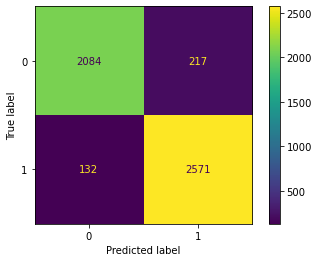

In [ ]:
grid_cat_pred = grid_cat.predict(X_test)
print(classification_report(y_test,grid_cat_pred))
plot_confusion_matrix(grid_cat,X_test,y_test)

### For Bagging Classifier

In [ ]:
base_bag = BaggingClassifier(random_state=101,verbose=2,oob_score=True)

In [ ]:
param_grid = {'n_estimators': [200,500,800,1000],
              'max_samples': [0.24,0.58,0.71,0.96],
              'max_features': np.linspace(0,1,5),
              'bootstrap': [True,False],
              'warm_start': [True,False]
             }

In [ ]:
grid_bag = RandomizedSearchCV(base_bag,param_grid,verbose=4)
grid_bag.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END bootstrap=False, max_features=1.0, max_samples=0.24, n_estimators=800, warm_start=True;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_features=1.0, max_samples=0.24, n_estimators=800, warm_start=True;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, max_features=1.0, max_samples=0.24, n_estimators=800, warm_start=True;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, max_features=1.0, max_samples=0.24, n_estimators=800, warm_start=True;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, max_features=1.0, max_samples=0.24, n_estimators=800, warm_start=True;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, max_features=1.0, max_samples=0.71, n_estimators=800, warm_start=True;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, max_features=1.0, max_samples=0.71, n_estimators=800, warm_start=True;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=T

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 3 of 1000 for this parallel run (total 1000)...
Building estimator 4 of 1000 for this parallel run (total 1000)...
Building estimator 5 of 1000 for this parallel run (total 1000)...
Building estimator 6 of 1000 for this parallel run (total 1000)...
Building estimator 7 of 1000 for this parallel run (total 1000)...
Building estimator 8 of 1000 for this parallel run (total 1000)...
Building estimator 9 of 1000 for this parallel run (total 1000)...
Building estimator 10 of 1000 for this parallel run (total 1000)...
Building estimator 11 of 1000 for this parallel run (total 1000)...
Building estimator 12 of 1000 for this parallel run (total 1000)...
Building estimator 13 of 1000 for this parallel run (total 1000)...
Building estimator 14 of 1000 for this parallel run (total 1000)...
Building estimator 15 of 1000 for this parallel run (total 1000)...
Building estimator 16 of 1000 for this parallel run (total 1000)...
Building estimator 17 of 1000 for this parallel run (to

Building estimator 124 of 1000 for this parallel run (total 1000)...
Building estimator 125 of 1000 for this parallel run (total 1000)...
Building estimator 126 of 1000 for this parallel run (total 1000)...
Building estimator 127 of 1000 for this parallel run (total 1000)...
Building estimator 128 of 1000 for this parallel run (total 1000)...
Building estimator 129 of 1000 for this parallel run (total 1000)...
Building estimator 130 of 1000 for this parallel run (total 1000)...
Building estimator 131 of 1000 for this parallel run (total 1000)...
Building estimator 132 of 1000 for this parallel run (total 1000)...
Building estimator 133 of 1000 for this parallel run (total 1000)...
Building estimator 134 of 1000 for this parallel run (total 1000)...
Building estimator 135 of 1000 for this parallel run (total 1000)...
Building estimator 136 of 1000 for this parallel run (total 1000)...
Building estimator 137 of 1000 for this parallel run (total 1000)...
Building estimator 138 of 1000 for

Building estimator 243 of 1000 for this parallel run (total 1000)...
Building estimator 244 of 1000 for this parallel run (total 1000)...
Building estimator 245 of 1000 for this parallel run (total 1000)...
Building estimator 246 of 1000 for this parallel run (total 1000)...
Building estimator 247 of 1000 for this parallel run (total 1000)...
Building estimator 248 of 1000 for this parallel run (total 1000)...
Building estimator 249 of 1000 for this parallel run (total 1000)...
Building estimator 250 of 1000 for this parallel run (total 1000)...
Building estimator 251 of 1000 for this parallel run (total 1000)...
Building estimator 252 of 1000 for this parallel run (total 1000)...
Building estimator 253 of 1000 for this parallel run (total 1000)...
Building estimator 254 of 1000 for this parallel run (total 1000)...
Building estimator 255 of 1000 for this parallel run (total 1000)...
Building estimator 256 of 1000 for this parallel run (total 1000)...
Building estimator 257 of 1000 for

Building estimator 363 of 1000 for this parallel run (total 1000)...
Building estimator 364 of 1000 for this parallel run (total 1000)...
Building estimator 365 of 1000 for this parallel run (total 1000)...
Building estimator 366 of 1000 for this parallel run (total 1000)...
Building estimator 367 of 1000 for this parallel run (total 1000)...
Building estimator 368 of 1000 for this parallel run (total 1000)...
Building estimator 369 of 1000 for this parallel run (total 1000)...
Building estimator 370 of 1000 for this parallel run (total 1000)...
Building estimator 371 of 1000 for this parallel run (total 1000)...
Building estimator 372 of 1000 for this parallel run (total 1000)...
Building estimator 373 of 1000 for this parallel run (total 1000)...
Building estimator 374 of 1000 for this parallel run (total 1000)...
Building estimator 375 of 1000 for this parallel run (total 1000)...
Building estimator 376 of 1000 for this parallel run (total 1000)...
Building estimator 377 of 1000 for

Building estimator 482 of 1000 for this parallel run (total 1000)...
Building estimator 483 of 1000 for this parallel run (total 1000)...
Building estimator 484 of 1000 for this parallel run (total 1000)...
Building estimator 485 of 1000 for this parallel run (total 1000)...
Building estimator 486 of 1000 for this parallel run (total 1000)...
Building estimator 487 of 1000 for this parallel run (total 1000)...
Building estimator 488 of 1000 for this parallel run (total 1000)...
Building estimator 489 of 1000 for this parallel run (total 1000)...
Building estimator 490 of 1000 for this parallel run (total 1000)...
Building estimator 491 of 1000 for this parallel run (total 1000)...
Building estimator 492 of 1000 for this parallel run (total 1000)...
Building estimator 493 of 1000 for this parallel run (total 1000)...
Building estimator 494 of 1000 for this parallel run (total 1000)...
Building estimator 495 of 1000 for this parallel run (total 1000)...
Building estimator 496 of 1000 for

Building estimator 603 of 1000 for this parallel run (total 1000)...
Building estimator 604 of 1000 for this parallel run (total 1000)...
Building estimator 605 of 1000 for this parallel run (total 1000)...
Building estimator 606 of 1000 for this parallel run (total 1000)...
Building estimator 607 of 1000 for this parallel run (total 1000)...
Building estimator 608 of 1000 for this parallel run (total 1000)...
Building estimator 609 of 1000 for this parallel run (total 1000)...
Building estimator 610 of 1000 for this parallel run (total 1000)...
Building estimator 611 of 1000 for this parallel run (total 1000)...
Building estimator 612 of 1000 for this parallel run (total 1000)...
Building estimator 613 of 1000 for this parallel run (total 1000)...
Building estimator 614 of 1000 for this parallel run (total 1000)...
Building estimator 615 of 1000 for this parallel run (total 1000)...
Building estimator 616 of 1000 for this parallel run (total 1000)...
Building estimator 617 of 1000 for

Building estimator 723 of 1000 for this parallel run (total 1000)...
Building estimator 724 of 1000 for this parallel run (total 1000)...
Building estimator 725 of 1000 for this parallel run (total 1000)...
Building estimator 726 of 1000 for this parallel run (total 1000)...
Building estimator 727 of 1000 for this parallel run (total 1000)...
Building estimator 728 of 1000 for this parallel run (total 1000)...
Building estimator 729 of 1000 for this parallel run (total 1000)...
Building estimator 730 of 1000 for this parallel run (total 1000)...
Building estimator 731 of 1000 for this parallel run (total 1000)...
Building estimator 732 of 1000 for this parallel run (total 1000)...
Building estimator 733 of 1000 for this parallel run (total 1000)...
Building estimator 734 of 1000 for this parallel run (total 1000)...
Building estimator 735 of 1000 for this parallel run (total 1000)...
Building estimator 736 of 1000 for this parallel run (total 1000)...
Building estimator 737 of 1000 for

Building estimator 842 of 1000 for this parallel run (total 1000)...
Building estimator 843 of 1000 for this parallel run (total 1000)...
Building estimator 844 of 1000 for this parallel run (total 1000)...
Building estimator 845 of 1000 for this parallel run (total 1000)...
Building estimator 846 of 1000 for this parallel run (total 1000)...
Building estimator 847 of 1000 for this parallel run (total 1000)...
Building estimator 848 of 1000 for this parallel run (total 1000)...
Building estimator 849 of 1000 for this parallel run (total 1000)...
Building estimator 850 of 1000 for this parallel run (total 1000)...
Building estimator 851 of 1000 for this parallel run (total 1000)...
Building estimator 852 of 1000 for this parallel run (total 1000)...
Building estimator 853 of 1000 for this parallel run (total 1000)...
Building estimator 854 of 1000 for this parallel run (total 1000)...
Building estimator 855 of 1000 for this parallel run (total 1000)...
Building estimator 856 of 1000 for

Building estimator 961 of 1000 for this parallel run (total 1000)...
Building estimator 962 of 1000 for this parallel run (total 1000)...
Building estimator 963 of 1000 for this parallel run (total 1000)...
Building estimator 964 of 1000 for this parallel run (total 1000)...
Building estimator 965 of 1000 for this parallel run (total 1000)...
Building estimator 966 of 1000 for this parallel run (total 1000)...
Building estimator 967 of 1000 for this parallel run (total 1000)...
Building estimator 968 of 1000 for this parallel run (total 1000)...
Building estimator 969 of 1000 for this parallel run (total 1000)...
Building estimator 970 of 1000 for this parallel run (total 1000)...
Building estimator 971 of 1000 for this parallel run (total 1000)...
Building estimator 972 of 1000 for this parallel run (total 1000)...
Building estimator 973 of 1000 for this parallel run (total 1000)...
Building estimator 974 of 1000 for this parallel run (total 1000)...
Building estimator 975 of 1000 for

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5] END bootstrap=True, max_features=1.0, max_samples=0.71, n_estimators=1000, warm_start=False;, score=0.928 total time= 1.9min
Building estimator 1 of 1000 for this parallel run (total 1000)...
Building estimator 2 of 1000 for this parallel run (total 1000)...
Building estimator 3 of 1000 for this parallel run (total 1000)...
Building estimator 4 of 1000 for this parallel run (total 1000)...
Building estimator 5 of 1000 for this parallel run (total 1000)...
Building estimator 6 of 1000 for this parallel run (total 1000)...
Building estimator 7 of 1000 for this parallel run (total 1000)...
Building estimator 8 of 1000 for this parallel run (total 1000)...
Building estimator 9 of 1000 for this parallel run (total 1000)...
Building estimator 10 of 1000 for this parallel run (total 1000)...
Building estimator 11 of 1000 for this parallel run (total 1000)...
Building estimator 12 of 1000 for this parallel run (total 1000)...
Building estimator 13 of 1000 for this parallel run (total 

Building estimator 120 of 1000 for this parallel run (total 1000)...
Building estimator 121 of 1000 for this parallel run (total 1000)...
Building estimator 122 of 1000 for this parallel run (total 1000)...
Building estimator 123 of 1000 for this parallel run (total 1000)...
Building estimator 124 of 1000 for this parallel run (total 1000)...
Building estimator 125 of 1000 for this parallel run (total 1000)...
Building estimator 126 of 1000 for this parallel run (total 1000)...
Building estimator 127 of 1000 for this parallel run (total 1000)...
Building estimator 128 of 1000 for this parallel run (total 1000)...
Building estimator 129 of 1000 for this parallel run (total 1000)...
Building estimator 130 of 1000 for this parallel run (total 1000)...
Building estimator 131 of 1000 for this parallel run (total 1000)...
Building estimator 132 of 1000 for this parallel run (total 1000)...
Building estimator 133 of 1000 for this parallel run (total 1000)...
Building estimator 134 of 1000 for

Building estimator 241 of 1000 for this parallel run (total 1000)...
Building estimator 242 of 1000 for this parallel run (total 1000)...
Building estimator 243 of 1000 for this parallel run (total 1000)...
Building estimator 244 of 1000 for this parallel run (total 1000)...
Building estimator 245 of 1000 for this parallel run (total 1000)...
Building estimator 246 of 1000 for this parallel run (total 1000)...
Building estimator 247 of 1000 for this parallel run (total 1000)...
Building estimator 248 of 1000 for this parallel run (total 1000)...
Building estimator 249 of 1000 for this parallel run (total 1000)...
Building estimator 250 of 1000 for this parallel run (total 1000)...
Building estimator 251 of 1000 for this parallel run (total 1000)...
Building estimator 252 of 1000 for this parallel run (total 1000)...
Building estimator 253 of 1000 for this parallel run (total 1000)...
Building estimator 254 of 1000 for this parallel run (total 1000)...
Building estimator 255 of 1000 for

Building estimator 361 of 1000 for this parallel run (total 1000)...
Building estimator 362 of 1000 for this parallel run (total 1000)...
Building estimator 363 of 1000 for this parallel run (total 1000)...
Building estimator 364 of 1000 for this parallel run (total 1000)...
Building estimator 365 of 1000 for this parallel run (total 1000)...
Building estimator 366 of 1000 for this parallel run (total 1000)...
Building estimator 367 of 1000 for this parallel run (total 1000)...
Building estimator 368 of 1000 for this parallel run (total 1000)...
Building estimator 369 of 1000 for this parallel run (total 1000)...
Building estimator 370 of 1000 for this parallel run (total 1000)...
Building estimator 371 of 1000 for this parallel run (total 1000)...
Building estimator 372 of 1000 for this parallel run (total 1000)...
Building estimator 373 of 1000 for this parallel run (total 1000)...
Building estimator 374 of 1000 for this parallel run (total 1000)...
Building estimator 375 of 1000 for

Building estimator 481 of 1000 for this parallel run (total 1000)...
Building estimator 482 of 1000 for this parallel run (total 1000)...
Building estimator 483 of 1000 for this parallel run (total 1000)...
Building estimator 484 of 1000 for this parallel run (total 1000)...
Building estimator 485 of 1000 for this parallel run (total 1000)...
Building estimator 486 of 1000 for this parallel run (total 1000)...
Building estimator 487 of 1000 for this parallel run (total 1000)...
Building estimator 488 of 1000 for this parallel run (total 1000)...
Building estimator 489 of 1000 for this parallel run (total 1000)...
Building estimator 490 of 1000 for this parallel run (total 1000)...
Building estimator 491 of 1000 for this parallel run (total 1000)...
Building estimator 492 of 1000 for this parallel run (total 1000)...
Building estimator 493 of 1000 for this parallel run (total 1000)...
Building estimator 494 of 1000 for this parallel run (total 1000)...
Building estimator 495 of 1000 for

Building estimator 602 of 1000 for this parallel run (total 1000)...
Building estimator 603 of 1000 for this parallel run (total 1000)...
Building estimator 604 of 1000 for this parallel run (total 1000)...
Building estimator 605 of 1000 for this parallel run (total 1000)...
Building estimator 606 of 1000 for this parallel run (total 1000)...
Building estimator 607 of 1000 for this parallel run (total 1000)...
Building estimator 608 of 1000 for this parallel run (total 1000)...
Building estimator 609 of 1000 for this parallel run (total 1000)...
Building estimator 610 of 1000 for this parallel run (total 1000)...
Building estimator 611 of 1000 for this parallel run (total 1000)...
Building estimator 612 of 1000 for this parallel run (total 1000)...
Building estimator 613 of 1000 for this parallel run (total 1000)...
Building estimator 614 of 1000 for this parallel run (total 1000)...
Building estimator 615 of 1000 for this parallel run (total 1000)...
Building estimator 616 of 1000 for

Building estimator 721 of 1000 for this parallel run (total 1000)...
Building estimator 722 of 1000 for this parallel run (total 1000)...
Building estimator 723 of 1000 for this parallel run (total 1000)...
Building estimator 724 of 1000 for this parallel run (total 1000)...
Building estimator 725 of 1000 for this parallel run (total 1000)...
Building estimator 726 of 1000 for this parallel run (total 1000)...
Building estimator 727 of 1000 for this parallel run (total 1000)...
Building estimator 728 of 1000 for this parallel run (total 1000)...
Building estimator 729 of 1000 for this parallel run (total 1000)...
Building estimator 730 of 1000 for this parallel run (total 1000)...
Building estimator 731 of 1000 for this parallel run (total 1000)...
Building estimator 732 of 1000 for this parallel run (total 1000)...
Building estimator 733 of 1000 for this parallel run (total 1000)...
Building estimator 734 of 1000 for this parallel run (total 1000)...
Building estimator 735 of 1000 for

Building estimator 841 of 1000 for this parallel run (total 1000)...
Building estimator 842 of 1000 for this parallel run (total 1000)...
Building estimator 843 of 1000 for this parallel run (total 1000)...
Building estimator 844 of 1000 for this parallel run (total 1000)...
Building estimator 845 of 1000 for this parallel run (total 1000)...
Building estimator 846 of 1000 for this parallel run (total 1000)...
Building estimator 847 of 1000 for this parallel run (total 1000)...
Building estimator 848 of 1000 for this parallel run (total 1000)...
Building estimator 849 of 1000 for this parallel run (total 1000)...
Building estimator 850 of 1000 for this parallel run (total 1000)...
Building estimator 851 of 1000 for this parallel run (total 1000)...
Building estimator 852 of 1000 for this parallel run (total 1000)...
Building estimator 853 of 1000 for this parallel run (total 1000)...
Building estimator 854 of 1000 for this parallel run (total 1000)...
Building estimator 855 of 1000 for

Building estimator 962 of 1000 for this parallel run (total 1000)...
Building estimator 963 of 1000 for this parallel run (total 1000)...
Building estimator 964 of 1000 for this parallel run (total 1000)...
Building estimator 965 of 1000 for this parallel run (total 1000)...
Building estimator 966 of 1000 for this parallel run (total 1000)...
Building estimator 967 of 1000 for this parallel run (total 1000)...
Building estimator 968 of 1000 for this parallel run (total 1000)...
Building estimator 969 of 1000 for this parallel run (total 1000)...
Building estimator 970 of 1000 for this parallel run (total 1000)...
Building estimator 971 of 1000 for this parallel run (total 1000)...
Building estimator 972 of 1000 for this parallel run (total 1000)...
Building estimator 973 of 1000 for this parallel run (total 1000)...
Building estimator 974 of 1000 for this parallel run (total 1000)...
Building estimator 975 of 1000 for this parallel run (total 1000)...
Building estimator 976 of 1000 for

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5] END bootstrap=True, max_features=1.0, max_samples=0.71, n_estimators=1000, warm_start=False;, score=0.929 total time= 1.8min
Building estimator 1 of 1000 for this parallel run (total 1000)...
Building estimator 2 of 1000 for this parallel run (total 1000)...
Building estimator 3 of 1000 for this parallel run (total 1000)...
Building estimator 4 of 1000 for this parallel run (total 1000)...
Building estimator 5 of 1000 for this parallel run (total 1000)...
Building estimator 6 of 1000 for this parallel run (total 1000)...
Building estimator 7 of 1000 for this parallel run (total 1000)...
Building estimator 8 of 1000 for this parallel run (total 1000)...
Building estimator 9 of 1000 for this parallel run (total 1000)...
Building estimator 10 of 1000 for this parallel run (total 1000)...
Building estimator 11 of 1000 for this parallel run (total 1000)...
Building estimator 12 of 1000 for this parallel run (total 1000)...
Building estimator 13 of 1000 for this parallel run (total 

Building estimator 120 of 1000 for this parallel run (total 1000)...
Building estimator 121 of 1000 for this parallel run (total 1000)...
Building estimator 122 of 1000 for this parallel run (total 1000)...
Building estimator 123 of 1000 for this parallel run (total 1000)...
Building estimator 124 of 1000 for this parallel run (total 1000)...
Building estimator 125 of 1000 for this parallel run (total 1000)...
Building estimator 126 of 1000 for this parallel run (total 1000)...
Building estimator 127 of 1000 for this parallel run (total 1000)...
Building estimator 128 of 1000 for this parallel run (total 1000)...
Building estimator 129 of 1000 for this parallel run (total 1000)...
Building estimator 130 of 1000 for this parallel run (total 1000)...
Building estimator 131 of 1000 for this parallel run (total 1000)...
Building estimator 132 of 1000 for this parallel run (total 1000)...
Building estimator 133 of 1000 for this parallel run (total 1000)...
Building estimator 134 of 1000 for

Building estimator 240 of 1000 for this parallel run (total 1000)...
Building estimator 241 of 1000 for this parallel run (total 1000)...
Building estimator 242 of 1000 for this parallel run (total 1000)...
Building estimator 243 of 1000 for this parallel run (total 1000)...
Building estimator 244 of 1000 for this parallel run (total 1000)...
Building estimator 245 of 1000 for this parallel run (total 1000)...
Building estimator 246 of 1000 for this parallel run (total 1000)...
Building estimator 247 of 1000 for this parallel run (total 1000)...
Building estimator 248 of 1000 for this parallel run (total 1000)...
Building estimator 249 of 1000 for this parallel run (total 1000)...
Building estimator 250 of 1000 for this parallel run (total 1000)...
Building estimator 251 of 1000 for this parallel run (total 1000)...
Building estimator 252 of 1000 for this parallel run (total 1000)...
Building estimator 253 of 1000 for this parallel run (total 1000)...
Building estimator 254 of 1000 for

Building estimator 359 of 1000 for this parallel run (total 1000)...
Building estimator 360 of 1000 for this parallel run (total 1000)...
Building estimator 361 of 1000 for this parallel run (total 1000)...
Building estimator 362 of 1000 for this parallel run (total 1000)...
Building estimator 363 of 1000 for this parallel run (total 1000)...
Building estimator 364 of 1000 for this parallel run (total 1000)...
Building estimator 365 of 1000 for this parallel run (total 1000)...
Building estimator 366 of 1000 for this parallel run (total 1000)...
Building estimator 367 of 1000 for this parallel run (total 1000)...
Building estimator 368 of 1000 for this parallel run (total 1000)...
Building estimator 369 of 1000 for this parallel run (total 1000)...
Building estimator 370 of 1000 for this parallel run (total 1000)...
Building estimator 371 of 1000 for this parallel run (total 1000)...
Building estimator 372 of 1000 for this parallel run (total 1000)...
Building estimator 373 of 1000 for

Building estimator 478 of 1000 for this parallel run (total 1000)...
Building estimator 479 of 1000 for this parallel run (total 1000)...
Building estimator 480 of 1000 for this parallel run (total 1000)...
Building estimator 481 of 1000 for this parallel run (total 1000)...
Building estimator 482 of 1000 for this parallel run (total 1000)...
Building estimator 483 of 1000 for this parallel run (total 1000)...
Building estimator 484 of 1000 for this parallel run (total 1000)...
Building estimator 485 of 1000 for this parallel run (total 1000)...
Building estimator 486 of 1000 for this parallel run (total 1000)...
Building estimator 487 of 1000 for this parallel run (total 1000)...
Building estimator 488 of 1000 for this parallel run (total 1000)...
Building estimator 489 of 1000 for this parallel run (total 1000)...
Building estimator 490 of 1000 for this parallel run (total 1000)...
Building estimator 491 of 1000 for this parallel run (total 1000)...
Building estimator 492 of 1000 for

Building estimator 597 of 1000 for this parallel run (total 1000)...
Building estimator 598 of 1000 for this parallel run (total 1000)...
Building estimator 599 of 1000 for this parallel run (total 1000)...
Building estimator 600 of 1000 for this parallel run (total 1000)...
Building estimator 601 of 1000 for this parallel run (total 1000)...
Building estimator 602 of 1000 for this parallel run (total 1000)...
Building estimator 603 of 1000 for this parallel run (total 1000)...
Building estimator 604 of 1000 for this parallel run (total 1000)...
Building estimator 605 of 1000 for this parallel run (total 1000)...
Building estimator 606 of 1000 for this parallel run (total 1000)...
Building estimator 607 of 1000 for this parallel run (total 1000)...
Building estimator 608 of 1000 for this parallel run (total 1000)...
Building estimator 609 of 1000 for this parallel run (total 1000)...
Building estimator 610 of 1000 for this parallel run (total 1000)...
Building estimator 611 of 1000 for

Building estimator 716 of 1000 for this parallel run (total 1000)...
Building estimator 717 of 1000 for this parallel run (total 1000)...
Building estimator 718 of 1000 for this parallel run (total 1000)...
Building estimator 719 of 1000 for this parallel run (total 1000)...
Building estimator 720 of 1000 for this parallel run (total 1000)...
Building estimator 721 of 1000 for this parallel run (total 1000)...
Building estimator 722 of 1000 for this parallel run (total 1000)...
Building estimator 723 of 1000 for this parallel run (total 1000)...
Building estimator 724 of 1000 for this parallel run (total 1000)...
Building estimator 725 of 1000 for this parallel run (total 1000)...
Building estimator 726 of 1000 for this parallel run (total 1000)...
Building estimator 727 of 1000 for this parallel run (total 1000)...
Building estimator 728 of 1000 for this parallel run (total 1000)...
Building estimator 729 of 1000 for this parallel run (total 1000)...
Building estimator 730 of 1000 for

Building estimator 836 of 1000 for this parallel run (total 1000)...
Building estimator 837 of 1000 for this parallel run (total 1000)...
Building estimator 838 of 1000 for this parallel run (total 1000)...
Building estimator 839 of 1000 for this parallel run (total 1000)...
Building estimator 840 of 1000 for this parallel run (total 1000)...
Building estimator 841 of 1000 for this parallel run (total 1000)...
Building estimator 842 of 1000 for this parallel run (total 1000)...
Building estimator 843 of 1000 for this parallel run (total 1000)...
Building estimator 844 of 1000 for this parallel run (total 1000)...
Building estimator 845 of 1000 for this parallel run (total 1000)...
Building estimator 846 of 1000 for this parallel run (total 1000)...
Building estimator 847 of 1000 for this parallel run (total 1000)...
Building estimator 848 of 1000 for this parallel run (total 1000)...
Building estimator 849 of 1000 for this parallel run (total 1000)...
Building estimator 850 of 1000 for

Building estimator 955 of 1000 for this parallel run (total 1000)...
Building estimator 956 of 1000 for this parallel run (total 1000)...
Building estimator 957 of 1000 for this parallel run (total 1000)...
Building estimator 958 of 1000 for this parallel run (total 1000)...
Building estimator 959 of 1000 for this parallel run (total 1000)...
Building estimator 960 of 1000 for this parallel run (total 1000)...
Building estimator 961 of 1000 for this parallel run (total 1000)...
Building estimator 962 of 1000 for this parallel run (total 1000)...
Building estimator 963 of 1000 for this parallel run (total 1000)...
Building estimator 964 of 1000 for this parallel run (total 1000)...
Building estimator 965 of 1000 for this parallel run (total 1000)...
Building estimator 966 of 1000 for this parallel run (total 1000)...
Building estimator 967 of 1000 for this parallel run (total 1000)...
Building estimator 968 of 1000 for this parallel run (total 1000)...
Building estimator 969 of 1000 for

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5] END bootstrap=True, max_features=1.0, max_samples=0.71, n_estimators=1000, warm_start=False;, score=0.929 total time= 1.9min
Building estimator 1 of 1000 for this parallel run (total 1000)...
Building estimator 2 of 1000 for this parallel run (total 1000)...
Building estimator 3 of 1000 for this parallel run (total 1000)...
Building estimator 4 of 1000 for this parallel run (total 1000)...
Building estimator 5 of 1000 for this parallel run (total 1000)...
Building estimator 6 of 1000 for this parallel run (total 1000)...
Building estimator 7 of 1000 for this parallel run (total 1000)...
Building estimator 8 of 1000 for this parallel run (total 1000)...
Building estimator 9 of 1000 for this parallel run (total 1000)...
Building estimator 10 of 1000 for this parallel run (total 1000)...
Building estimator 11 of 1000 for this parallel run (total 1000)...
Building estimator 12 of 1000 for this parallel run (total 1000)...
Building estimator 13 of 1000 for this parallel run (total 

Building estimator 121 of 1000 for this parallel run (total 1000)...
Building estimator 122 of 1000 for this parallel run (total 1000)...
Building estimator 123 of 1000 for this parallel run (total 1000)...
Building estimator 124 of 1000 for this parallel run (total 1000)...
Building estimator 125 of 1000 for this parallel run (total 1000)...
Building estimator 126 of 1000 for this parallel run (total 1000)...
Building estimator 127 of 1000 for this parallel run (total 1000)...
Building estimator 128 of 1000 for this parallel run (total 1000)...
Building estimator 129 of 1000 for this parallel run (total 1000)...
Building estimator 130 of 1000 for this parallel run (total 1000)...
Building estimator 131 of 1000 for this parallel run (total 1000)...
Building estimator 132 of 1000 for this parallel run (total 1000)...
Building estimator 133 of 1000 for this parallel run (total 1000)...
Building estimator 134 of 1000 for this parallel run (total 1000)...
Building estimator 135 of 1000 for

Building estimator 241 of 1000 for this parallel run (total 1000)...
Building estimator 242 of 1000 for this parallel run (total 1000)...
Building estimator 243 of 1000 for this parallel run (total 1000)...
Building estimator 244 of 1000 for this parallel run (total 1000)...
Building estimator 245 of 1000 for this parallel run (total 1000)...
Building estimator 246 of 1000 for this parallel run (total 1000)...
Building estimator 247 of 1000 for this parallel run (total 1000)...
Building estimator 248 of 1000 for this parallel run (total 1000)...
Building estimator 249 of 1000 for this parallel run (total 1000)...
Building estimator 250 of 1000 for this parallel run (total 1000)...
Building estimator 251 of 1000 for this parallel run (total 1000)...
Building estimator 252 of 1000 for this parallel run (total 1000)...
Building estimator 253 of 1000 for this parallel run (total 1000)...
Building estimator 254 of 1000 for this parallel run (total 1000)...
Building estimator 255 of 1000 for

Building estimator 361 of 1000 for this parallel run (total 1000)...
Building estimator 362 of 1000 for this parallel run (total 1000)...
Building estimator 363 of 1000 for this parallel run (total 1000)...
Building estimator 364 of 1000 for this parallel run (total 1000)...
Building estimator 365 of 1000 for this parallel run (total 1000)...
Building estimator 366 of 1000 for this parallel run (total 1000)...
Building estimator 367 of 1000 for this parallel run (total 1000)...
Building estimator 368 of 1000 for this parallel run (total 1000)...
Building estimator 369 of 1000 for this parallel run (total 1000)...
Building estimator 370 of 1000 for this parallel run (total 1000)...
Building estimator 371 of 1000 for this parallel run (total 1000)...
Building estimator 372 of 1000 for this parallel run (total 1000)...
Building estimator 373 of 1000 for this parallel run (total 1000)...
Building estimator 374 of 1000 for this parallel run (total 1000)...
Building estimator 375 of 1000 for

Building estimator 482 of 1000 for this parallel run (total 1000)...
Building estimator 483 of 1000 for this parallel run (total 1000)...
Building estimator 484 of 1000 for this parallel run (total 1000)...
Building estimator 485 of 1000 for this parallel run (total 1000)...
Building estimator 486 of 1000 for this parallel run (total 1000)...
Building estimator 487 of 1000 for this parallel run (total 1000)...
Building estimator 488 of 1000 for this parallel run (total 1000)...
Building estimator 489 of 1000 for this parallel run (total 1000)...
Building estimator 490 of 1000 for this parallel run (total 1000)...
Building estimator 491 of 1000 for this parallel run (total 1000)...
Building estimator 492 of 1000 for this parallel run (total 1000)...
Building estimator 493 of 1000 for this parallel run (total 1000)...
Building estimator 494 of 1000 for this parallel run (total 1000)...
Building estimator 495 of 1000 for this parallel run (total 1000)...
Building estimator 496 of 1000 for

Building estimator 603 of 1000 for this parallel run (total 1000)...
Building estimator 604 of 1000 for this parallel run (total 1000)...
Building estimator 605 of 1000 for this parallel run (total 1000)...
Building estimator 606 of 1000 for this parallel run (total 1000)...
Building estimator 607 of 1000 for this parallel run (total 1000)...
Building estimator 608 of 1000 for this parallel run (total 1000)...
Building estimator 609 of 1000 for this parallel run (total 1000)...
Building estimator 610 of 1000 for this parallel run (total 1000)...
Building estimator 611 of 1000 for this parallel run (total 1000)...
Building estimator 612 of 1000 for this parallel run (total 1000)...
Building estimator 613 of 1000 for this parallel run (total 1000)...
Building estimator 614 of 1000 for this parallel run (total 1000)...
Building estimator 615 of 1000 for this parallel run (total 1000)...
Building estimator 616 of 1000 for this parallel run (total 1000)...
Building estimator 617 of 1000 for

Building estimator 723 of 1000 for this parallel run (total 1000)...
Building estimator 724 of 1000 for this parallel run (total 1000)...
Building estimator 725 of 1000 for this parallel run (total 1000)...
Building estimator 726 of 1000 for this parallel run (total 1000)...
Building estimator 727 of 1000 for this parallel run (total 1000)...
Building estimator 728 of 1000 for this parallel run (total 1000)...
Building estimator 729 of 1000 for this parallel run (total 1000)...
Building estimator 730 of 1000 for this parallel run (total 1000)...
Building estimator 731 of 1000 for this parallel run (total 1000)...
Building estimator 732 of 1000 for this parallel run (total 1000)...
Building estimator 733 of 1000 for this parallel run (total 1000)...
Building estimator 734 of 1000 for this parallel run (total 1000)...
Building estimator 735 of 1000 for this parallel run (total 1000)...
Building estimator 736 of 1000 for this parallel run (total 1000)...
Building estimator 737 of 1000 for

Building estimator 842 of 1000 for this parallel run (total 1000)...
Building estimator 843 of 1000 for this parallel run (total 1000)...
Building estimator 844 of 1000 for this parallel run (total 1000)...
Building estimator 845 of 1000 for this parallel run (total 1000)...
Building estimator 846 of 1000 for this parallel run (total 1000)...
Building estimator 847 of 1000 for this parallel run (total 1000)...
Building estimator 848 of 1000 for this parallel run (total 1000)...
Building estimator 849 of 1000 for this parallel run (total 1000)...
Building estimator 850 of 1000 for this parallel run (total 1000)...
Building estimator 851 of 1000 for this parallel run (total 1000)...
Building estimator 852 of 1000 for this parallel run (total 1000)...
Building estimator 853 of 1000 for this parallel run (total 1000)...
Building estimator 854 of 1000 for this parallel run (total 1000)...
Building estimator 855 of 1000 for this parallel run (total 1000)...
Building estimator 856 of 1000 for

Building estimator 961 of 1000 for this parallel run (total 1000)...
Building estimator 962 of 1000 for this parallel run (total 1000)...
Building estimator 963 of 1000 for this parallel run (total 1000)...
Building estimator 964 of 1000 for this parallel run (total 1000)...
Building estimator 965 of 1000 for this parallel run (total 1000)...
Building estimator 966 of 1000 for this parallel run (total 1000)...
Building estimator 967 of 1000 for this parallel run (total 1000)...
Building estimator 968 of 1000 for this parallel run (total 1000)...
Building estimator 969 of 1000 for this parallel run (total 1000)...
Building estimator 970 of 1000 for this parallel run (total 1000)...
Building estimator 971 of 1000 for this parallel run (total 1000)...
Building estimator 972 of 1000 for this parallel run (total 1000)...
Building estimator 973 of 1000 for this parallel run (total 1000)...
Building estimator 974 of 1000 for this parallel run (total 1000)...
Building estimator 975 of 1000 for

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5] END bootstrap=True, max_features=1.0, max_samples=0.71, n_estimators=1000, warm_start=False;, score=0.932 total time= 1.9min
Building estimator 1 of 1000 for this parallel run (total 1000)...
Building estimator 2 of 1000 for this parallel run (total 1000)...
Building estimator 3 of 1000 for this parallel run (total 1000)...
Building estimator 4 of 1000 for this parallel run (total 1000)...
Building estimator 5 of 1000 for this parallel run (total 1000)...
Building estimator 6 of 1000 for this parallel run (total 1000)...
Building estimator 7 of 1000 for this parallel run (total 1000)...
Building estimator 8 of 1000 for this parallel run (total 1000)...
Building estimator 9 of 1000 for this parallel run (total 1000)...
Building estimator 10 of 1000 for this parallel run (total 1000)...
Building estimator 11 of 1000 for this parallel run (total 1000)...
Building estimator 12 of 1000 for this parallel run (total 1000)...
Building estimator 13 of 1000 for this parallel run (total 

Building estimator 120 of 1000 for this parallel run (total 1000)...
Building estimator 121 of 1000 for this parallel run (total 1000)...
Building estimator 122 of 1000 for this parallel run (total 1000)...
Building estimator 123 of 1000 for this parallel run (total 1000)...
Building estimator 124 of 1000 for this parallel run (total 1000)...
Building estimator 125 of 1000 for this parallel run (total 1000)...
Building estimator 126 of 1000 for this parallel run (total 1000)...
Building estimator 127 of 1000 for this parallel run (total 1000)...
Building estimator 128 of 1000 for this parallel run (total 1000)...
Building estimator 129 of 1000 for this parallel run (total 1000)...
Building estimator 130 of 1000 for this parallel run (total 1000)...
Building estimator 131 of 1000 for this parallel run (total 1000)...
Building estimator 132 of 1000 for this parallel run (total 1000)...
Building estimator 133 of 1000 for this parallel run (total 1000)...
Building estimator 134 of 1000 for

Building estimator 241 of 1000 for this parallel run (total 1000)...
Building estimator 242 of 1000 for this parallel run (total 1000)...
Building estimator 243 of 1000 for this parallel run (total 1000)...
Building estimator 244 of 1000 for this parallel run (total 1000)...
Building estimator 245 of 1000 for this parallel run (total 1000)...
Building estimator 246 of 1000 for this parallel run (total 1000)...
Building estimator 247 of 1000 for this parallel run (total 1000)...
Building estimator 248 of 1000 for this parallel run (total 1000)...
Building estimator 249 of 1000 for this parallel run (total 1000)...
Building estimator 250 of 1000 for this parallel run (total 1000)...
Building estimator 251 of 1000 for this parallel run (total 1000)...
Building estimator 252 of 1000 for this parallel run (total 1000)...
Building estimator 253 of 1000 for this parallel run (total 1000)...
Building estimator 254 of 1000 for this parallel run (total 1000)...
Building estimator 255 of 1000 for

Building estimator 361 of 1000 for this parallel run (total 1000)...
Building estimator 362 of 1000 for this parallel run (total 1000)...
Building estimator 363 of 1000 for this parallel run (total 1000)...
Building estimator 364 of 1000 for this parallel run (total 1000)...
Building estimator 365 of 1000 for this parallel run (total 1000)...
Building estimator 366 of 1000 for this parallel run (total 1000)...
Building estimator 367 of 1000 for this parallel run (total 1000)...
Building estimator 368 of 1000 for this parallel run (total 1000)...
Building estimator 369 of 1000 for this parallel run (total 1000)...
Building estimator 370 of 1000 for this parallel run (total 1000)...
Building estimator 371 of 1000 for this parallel run (total 1000)...
Building estimator 372 of 1000 for this parallel run (total 1000)...
Building estimator 373 of 1000 for this parallel run (total 1000)...
Building estimator 374 of 1000 for this parallel run (total 1000)...
Building estimator 375 of 1000 for

Building estimator 481 of 1000 for this parallel run (total 1000)...
Building estimator 482 of 1000 for this parallel run (total 1000)...
Building estimator 483 of 1000 for this parallel run (total 1000)...
Building estimator 484 of 1000 for this parallel run (total 1000)...
Building estimator 485 of 1000 for this parallel run (total 1000)...
Building estimator 486 of 1000 for this parallel run (total 1000)...
Building estimator 487 of 1000 for this parallel run (total 1000)...
Building estimator 488 of 1000 for this parallel run (total 1000)...
Building estimator 489 of 1000 for this parallel run (total 1000)...
Building estimator 490 of 1000 for this parallel run (total 1000)...
Building estimator 491 of 1000 for this parallel run (total 1000)...
Building estimator 492 of 1000 for this parallel run (total 1000)...
Building estimator 493 of 1000 for this parallel run (total 1000)...
Building estimator 494 of 1000 for this parallel run (total 1000)...
Building estimator 495 of 1000 for

Building estimator 600 of 1000 for this parallel run (total 1000)...
Building estimator 601 of 1000 for this parallel run (total 1000)...
Building estimator 602 of 1000 for this parallel run (total 1000)...
Building estimator 603 of 1000 for this parallel run (total 1000)...
Building estimator 604 of 1000 for this parallel run (total 1000)...
Building estimator 605 of 1000 for this parallel run (total 1000)...
Building estimator 606 of 1000 for this parallel run (total 1000)...
Building estimator 607 of 1000 for this parallel run (total 1000)...
Building estimator 608 of 1000 for this parallel run (total 1000)...
Building estimator 609 of 1000 for this parallel run (total 1000)...
Building estimator 610 of 1000 for this parallel run (total 1000)...
Building estimator 611 of 1000 for this parallel run (total 1000)...
Building estimator 612 of 1000 for this parallel run (total 1000)...
Building estimator 613 of 1000 for this parallel run (total 1000)...
Building estimator 614 of 1000 for

Building estimator 721 of 1000 for this parallel run (total 1000)...
Building estimator 722 of 1000 for this parallel run (total 1000)...
Building estimator 723 of 1000 for this parallel run (total 1000)...
Building estimator 724 of 1000 for this parallel run (total 1000)...
Building estimator 725 of 1000 for this parallel run (total 1000)...
Building estimator 726 of 1000 for this parallel run (total 1000)...
Building estimator 727 of 1000 for this parallel run (total 1000)...
Building estimator 728 of 1000 for this parallel run (total 1000)...
Building estimator 729 of 1000 for this parallel run (total 1000)...
Building estimator 730 of 1000 for this parallel run (total 1000)...
Building estimator 731 of 1000 for this parallel run (total 1000)...
Building estimator 732 of 1000 for this parallel run (total 1000)...
Building estimator 733 of 1000 for this parallel run (total 1000)...
Building estimator 734 of 1000 for this parallel run (total 1000)...
Building estimator 735 of 1000 for

Building estimator 840 of 1000 for this parallel run (total 1000)...
Building estimator 841 of 1000 for this parallel run (total 1000)...
Building estimator 842 of 1000 for this parallel run (total 1000)...
Building estimator 843 of 1000 for this parallel run (total 1000)...
Building estimator 844 of 1000 for this parallel run (total 1000)...
Building estimator 845 of 1000 for this parallel run (total 1000)...
Building estimator 846 of 1000 for this parallel run (total 1000)...
Building estimator 847 of 1000 for this parallel run (total 1000)...
Building estimator 848 of 1000 for this parallel run (total 1000)...
Building estimator 849 of 1000 for this parallel run (total 1000)...
Building estimator 850 of 1000 for this parallel run (total 1000)...
Building estimator 851 of 1000 for this parallel run (total 1000)...
Building estimator 852 of 1000 for this parallel run (total 1000)...
Building estimator 853 of 1000 for this parallel run (total 1000)...
Building estimator 854 of 1000 for

Building estimator 960 of 1000 for this parallel run (total 1000)...
Building estimator 961 of 1000 for this parallel run (total 1000)...
Building estimator 962 of 1000 for this parallel run (total 1000)...
Building estimator 963 of 1000 for this parallel run (total 1000)...
Building estimator 964 of 1000 for this parallel run (total 1000)...
Building estimator 965 of 1000 for this parallel run (total 1000)...
Building estimator 966 of 1000 for this parallel run (total 1000)...
Building estimator 967 of 1000 for this parallel run (total 1000)...
Building estimator 968 of 1000 for this parallel run (total 1000)...
Building estimator 969 of 1000 for this parallel run (total 1000)...
Building estimator 970 of 1000 for this parallel run (total 1000)...
Building estimator 971 of 1000 for this parallel run (total 1000)...
Building estimator 972 of 1000 for this parallel run (total 1000)...
Building estimator 973 of 1000 for this parallel run (total 1000)...
Building estimator 974 of 1000 for

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5] END bootstrap=True, max_features=1.0, max_samples=0.71, n_estimators=1000, warm_start=False;, score=0.930 total time= 1.8min
[CV 1/5] END bootstrap=False, max_features=0.5, max_samples=0.24, n_estimators=500, warm_start=False;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_features=0.5, max_samples=0.24, n_estimators=500, warm_start=False;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, max_features=0.5, max_samples=0.24, n_estimators=500, warm_start=False;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, max_features=0.5, max_samples=0.24, n_estimators=500, warm_start=False;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, max_features=0.5, max_samples=0.24, n_estimators=500, warm_start=False;, score=nan total time=   0.0s
Building estimator 1 of 1000 for this parallel run (total 1000)...
Building estimator 2 of 1000 for this parallel run (total 1000)...
Building estimator 3 of 1000 for this parallel run (total 1000)...
Build

Building estimator 111 of 1000 for this parallel run (total 1000)...
Building estimator 112 of 1000 for this parallel run (total 1000)...
Building estimator 113 of 1000 for this parallel run (total 1000)...
Building estimator 114 of 1000 for this parallel run (total 1000)...
Building estimator 115 of 1000 for this parallel run (total 1000)...
Building estimator 116 of 1000 for this parallel run (total 1000)...
Building estimator 117 of 1000 for this parallel run (total 1000)...
Building estimator 118 of 1000 for this parallel run (total 1000)...
Building estimator 119 of 1000 for this parallel run (total 1000)...
Building estimator 120 of 1000 for this parallel run (total 1000)...
Building estimator 121 of 1000 for this parallel run (total 1000)...
Building estimator 122 of 1000 for this parallel run (total 1000)...
Building estimator 123 of 1000 for this parallel run (total 1000)...
Building estimator 124 of 1000 for this parallel run (total 1000)...
Building estimator 125 of 1000 for

Building estimator 231 of 1000 for this parallel run (total 1000)...
Building estimator 232 of 1000 for this parallel run (total 1000)...
Building estimator 233 of 1000 for this parallel run (total 1000)...
Building estimator 234 of 1000 for this parallel run (total 1000)...
Building estimator 235 of 1000 for this parallel run (total 1000)...
Building estimator 236 of 1000 for this parallel run (total 1000)...
Building estimator 237 of 1000 for this parallel run (total 1000)...
Building estimator 238 of 1000 for this parallel run (total 1000)...
Building estimator 239 of 1000 for this parallel run (total 1000)...
Building estimator 240 of 1000 for this parallel run (total 1000)...
Building estimator 241 of 1000 for this parallel run (total 1000)...
Building estimator 242 of 1000 for this parallel run (total 1000)...
Building estimator 243 of 1000 for this parallel run (total 1000)...
Building estimator 244 of 1000 for this parallel run (total 1000)...
Building estimator 245 of 1000 for

Building estimator 351 of 1000 for this parallel run (total 1000)...
Building estimator 352 of 1000 for this parallel run (total 1000)...
Building estimator 353 of 1000 for this parallel run (total 1000)...
Building estimator 354 of 1000 for this parallel run (total 1000)...
Building estimator 355 of 1000 for this parallel run (total 1000)...
Building estimator 356 of 1000 for this parallel run (total 1000)...
Building estimator 357 of 1000 for this parallel run (total 1000)...
Building estimator 358 of 1000 for this parallel run (total 1000)...
Building estimator 359 of 1000 for this parallel run (total 1000)...
Building estimator 360 of 1000 for this parallel run (total 1000)...
Building estimator 361 of 1000 for this parallel run (total 1000)...
Building estimator 362 of 1000 for this parallel run (total 1000)...
Building estimator 363 of 1000 for this parallel run (total 1000)...
Building estimator 364 of 1000 for this parallel run (total 1000)...
Building estimator 365 of 1000 for

Building estimator 471 of 1000 for this parallel run (total 1000)...
Building estimator 472 of 1000 for this parallel run (total 1000)...
Building estimator 473 of 1000 for this parallel run (total 1000)...
Building estimator 474 of 1000 for this parallel run (total 1000)...
Building estimator 475 of 1000 for this parallel run (total 1000)...
Building estimator 476 of 1000 for this parallel run (total 1000)...
Building estimator 477 of 1000 for this parallel run (total 1000)...
Building estimator 478 of 1000 for this parallel run (total 1000)...
Building estimator 479 of 1000 for this parallel run (total 1000)...
Building estimator 480 of 1000 for this parallel run (total 1000)...
Building estimator 481 of 1000 for this parallel run (total 1000)...
Building estimator 482 of 1000 for this parallel run (total 1000)...
Building estimator 483 of 1000 for this parallel run (total 1000)...
Building estimator 484 of 1000 for this parallel run (total 1000)...
Building estimator 485 of 1000 for

Building estimator 591 of 1000 for this parallel run (total 1000)...
Building estimator 592 of 1000 for this parallel run (total 1000)...
Building estimator 593 of 1000 for this parallel run (total 1000)...
Building estimator 594 of 1000 for this parallel run (total 1000)...
Building estimator 595 of 1000 for this parallel run (total 1000)...
Building estimator 596 of 1000 for this parallel run (total 1000)...
Building estimator 597 of 1000 for this parallel run (total 1000)...
Building estimator 598 of 1000 for this parallel run (total 1000)...
Building estimator 599 of 1000 for this parallel run (total 1000)...
Building estimator 600 of 1000 for this parallel run (total 1000)...
Building estimator 601 of 1000 for this parallel run (total 1000)...
Building estimator 602 of 1000 for this parallel run (total 1000)...
Building estimator 603 of 1000 for this parallel run (total 1000)...
Building estimator 604 of 1000 for this parallel run (total 1000)...
Building estimator 605 of 1000 for

Building estimator 711 of 1000 for this parallel run (total 1000)...
Building estimator 712 of 1000 for this parallel run (total 1000)...
Building estimator 713 of 1000 for this parallel run (total 1000)...
Building estimator 714 of 1000 for this parallel run (total 1000)...
Building estimator 715 of 1000 for this parallel run (total 1000)...
Building estimator 716 of 1000 for this parallel run (total 1000)...
Building estimator 717 of 1000 for this parallel run (total 1000)...
Building estimator 718 of 1000 for this parallel run (total 1000)...
Building estimator 719 of 1000 for this parallel run (total 1000)...
Building estimator 720 of 1000 for this parallel run (total 1000)...
Building estimator 721 of 1000 for this parallel run (total 1000)...
Building estimator 722 of 1000 for this parallel run (total 1000)...
Building estimator 723 of 1000 for this parallel run (total 1000)...
Building estimator 724 of 1000 for this parallel run (total 1000)...
Building estimator 725 of 1000 for

Building estimator 831 of 1000 for this parallel run (total 1000)...
Building estimator 832 of 1000 for this parallel run (total 1000)...
Building estimator 833 of 1000 for this parallel run (total 1000)...
Building estimator 834 of 1000 for this parallel run (total 1000)...
Building estimator 835 of 1000 for this parallel run (total 1000)...
Building estimator 836 of 1000 for this parallel run (total 1000)...
Building estimator 837 of 1000 for this parallel run (total 1000)...
Building estimator 838 of 1000 for this parallel run (total 1000)...
Building estimator 839 of 1000 for this parallel run (total 1000)...
Building estimator 840 of 1000 for this parallel run (total 1000)...
Building estimator 841 of 1000 for this parallel run (total 1000)...
Building estimator 842 of 1000 for this parallel run (total 1000)...
Building estimator 843 of 1000 for this parallel run (total 1000)...
Building estimator 844 of 1000 for this parallel run (total 1000)...
Building estimator 845 of 1000 for

Building estimator 951 of 1000 for this parallel run (total 1000)...
Building estimator 952 of 1000 for this parallel run (total 1000)...
Building estimator 953 of 1000 for this parallel run (total 1000)...
Building estimator 954 of 1000 for this parallel run (total 1000)...
Building estimator 955 of 1000 for this parallel run (total 1000)...
Building estimator 956 of 1000 for this parallel run (total 1000)...
Building estimator 957 of 1000 for this parallel run (total 1000)...
Building estimator 958 of 1000 for this parallel run (total 1000)...
Building estimator 959 of 1000 for this parallel run (total 1000)...
Building estimator 960 of 1000 for this parallel run (total 1000)...
Building estimator 961 of 1000 for this parallel run (total 1000)...
Building estimator 962 of 1000 for this parallel run (total 1000)...
Building estimator 963 of 1000 for this parallel run (total 1000)...
Building estimator 964 of 1000 for this parallel run (total 1000)...
Building estimator 965 of 1000 for

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min finished


RandomizedSearchCV(estimator=BaggingClassifier(oob_score=True, random_state=101,
                                               verbose=2),
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
                                        'max_samples': [0.24, 0.58, 0.71, 0.96],
                                        'n_estimators': [200, 500, 800, 1000],
                                        'warm_start': [True, False]},
                   verbose=4)

In [ ]:
grid_bag.best_estimator_.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 0.71,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 101,
 'verbose': 2,
 'warm_start': False}

In [ ]:
grid_bag.best_estimator_.oob_score_

0.9290752627495239

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


              precision    recall  f1-score   support

           0       0.93      0.92      0.93      2301
           1       0.94      0.94      0.94      2703

    accuracy                           0.93      5004
   macro avg       0.93      0.93      0.93      5004
weighted avg       0.93      0.93      0.93      5004



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished


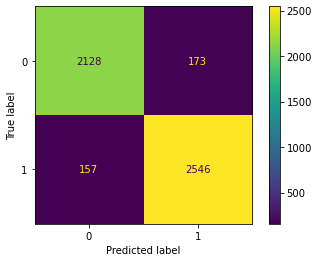

In [ ]:
grid_bag_pred = grid_bag.predict(X_test)
print(classification_report(y_test,grid_bag_pred))
plot_confusion_matrix(grid_bag,X_test,y_test)

### For Light Gradient Boosting Model

In [ ]:
base_lgbm = LGBMClassifier(class_weight='balanced',random_state=101)

In [ ]:
param_grid = {'boosting_type': ['gbdt','dart','goss','rf'],
              'learning_rate': np.linspace(0,1,6)[1:],
              'n_estimators': [200,500,600,1000],
              'importance_type': ['split','gain'],
              'min_split_gain': [0.68,0.79,0.87,1]}

In [ ]:
grid_lgbm = RandomizedSearchCV(base_lgbm,param_grid,verbose=3)
grid_lgbm.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END boosting_type=goss, importance_type=split, learning_rate=1.0, min_split_gain=0.68, n_estimators=200;, score=0.792 total time=   1.0s
[CV 2/5] END boosting_type=goss, importance_type=split, learning_rate=1.0, min_split_gain=0.68, n_estimators=200;, score=0.550 total time=   1.0s
[CV 3/5] END boosting_type=goss, importance_type=split, learning_rate=1.0, min_split_gain=0.68, n_estimators=200;, score=0.918 total time=   0.4s
[CV 4/5] END boosting_type=goss, importance_type=split, learning_rate=1.0, min_split_gain=0.68, n_estimators=200;, score=0.914 total time=   0.4s
[CV 5/5] END boosting_type=goss, importance_type=split, learning_rate=1.0, min_split_gain=0.68, n_estimators=200;, score=0.620 total time=   0.9s
[CV 1/5] END boosting_type=dart, importance_type=gain, learning_rate=0.6000000000000001, min_split_gain=0.87, n_estimators=200;, score=0.930 total time=   1.8s
[CV 2/5] END boosting_type=dart, importance_type=

RandomizedSearchCV(estimator=LGBMClassifier(class_weight='balanced',
                                            random_state=101),
                   param_distributions={'boosting_type': ['gbdt', 'dart',
                                                          'goss', 'rf'],
                                        'importance_type': ['split', 'gain'],
                                        'learning_rate': array([0.2, 0.4, 0.6, 0.8, 1. ]),
                                        'min_split_gain': [0.68, 0.79, 0.87, 1],
                                        'n_estimators': [200, 500, 600, 1000]},
                   verbose=3)

In [ ]:
grid_lgbm.best_estimator_.get_params()

{'boosting_type': 'goss',
 'class_weight': 'balanced',
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.2,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.79,
 'n_estimators': 500,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 101,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      2301
           1       0.94      0.94      0.94      2703

    accuracy                           0.93      5004
   macro avg       0.93      0.93      0.93      5004
weighted avg       0.93      0.93      0.93      5004



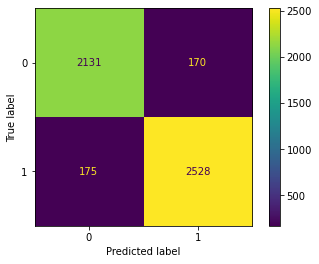

In [ ]:
grid_lgbm_pred = grid_lgbm.predict(X_test)
print(classification_report(y_test,grid_lgbm_pred))
plot_confusion_matrix(grid_lgbm,X_test,y_test)

### For Extra Trees Classifier

In [ ]:
base_et = ExtraTreesClassifier(random_state=101,verbose=2,oob_score=True)

In [ ]:
param_grid = {'n_estimators': [100,300,600,1000],
             'criterion': ['gini','entropy'],
             'max_features': ['sqrt','log2'],
             'bootstrap': [True,False],
             'class_weight': ['balanced','balanced_subsample'],
             'warm_start': [True,False],
             'max_samples': [0.2,0.45,0.7,0.95]
             }

In [ ]:
grid_et = RandomizedSearchCV(base_et,param_grid,verbose=4)
grid_et.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_features=log2, max_samples=0.2, n_estimators=100, warm_start=False;, score=0.909 total time=   1.4s
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 o

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_features=log2, max_samples=0.2, n_estimators=100, warm_start=False;, score=0.906 total time=   1.3s
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 o

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_features=log2, max_samples=0.2, n_estimators=100, warm_start=False;, score=0.906 total time=   1.3s
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 o

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_features=log2, max_samples=0.2, n_estimators=100, warm_start=False;, score=0.908 total time=   1.3s
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 o

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_features=log2, max_samples=0.2, n_estimators=100, warm_start=False;, score=0.904 total time=   1.3s
building tree 1 of 600
building tree 2 of 600


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 600
building tree 4 of 600
building tree 5 of 600
building tree 6 of 600
building tree 7 of 600
building tree 8 of 600
building tree 9 of 600
building tree 10 of 600
building tree 11 of 600
building tree 12 of 600
building tree 13 of 600
building tree 14 of 600
building tree 15 of 600
building tree 16 of 600
building tree 17 of 600
building tree 18 of 600
building tree 19 of 600
building tree 20 of 600
building tree 21 of 600
building tree 22 of 600
building tree 23 of 600
building tree 24 of 600
building tree 25 of 600
building tree 26 of 600
building tree 27 of 600
building tree 28 of 600
building tree 29 of 600
building tree 30 of 600
building tree 31 of 600
building tree 32 of 600
building tree 33 of 600
building tree 34 of 600
building tree 35 of 600
building tree 36 of 600
building tree 37 of 600
building tree 38 of 600
building tree 39 of 600
building tree 40 of 600
building tree 41 of 600
building tree 42 of 600
building tree 43 of 600
building tree 44 of 600

building tree 346 of 600
building tree 347 of 600
building tree 348 of 600
building tree 349 of 600
building tree 350 of 600
building tree 351 of 600
building tree 352 of 600
building tree 353 of 600
building tree 354 of 600
building tree 355 of 600
building tree 356 of 600
building tree 357 of 600
building tree 358 of 600
building tree 359 of 600
building tree 360 of 600
building tree 361 of 600
building tree 362 of 600
building tree 363 of 600
building tree 364 of 600
building tree 365 of 600
building tree 366 of 600
building tree 367 of 600
building tree 368 of 600
building tree 369 of 600
building tree 370 of 600
building tree 371 of 600
building tree 372 of 600
building tree 373 of 600
building tree 374 of 600
building tree 375 of 600
building tree 376 of 600
building tree 377 of 600
building tree 378 of 600
building tree 379 of 600
building tree 380 of 600
building tree 381 of 600
building tree 382 of 600
building tree 383 of 600
building tree 384 of 600
building tree 385 of 600


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    9.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_features=log2, max_samples=0.95, n_estimators=600, warm_start=True;, score=0.922 total time=  12.8s
building tree 1 of 600


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 600
building tree 3 of 600
building tree 4 of 600
building tree 5 of 600
building tree 6 of 600
building tree 7 of 600
building tree 8 of 600
building tree 9 of 600
building tree 10 of 600
building tree 11 of 600
building tree 12 of 600
building tree 13 of 600
building tree 14 of 600
building tree 15 of 600
building tree 16 of 600
building tree 17 of 600
building tree 18 of 600
building tree 19 of 600
building tree 20 of 600
building tree 21 of 600
building tree 22 of 600
building tree 23 of 600
building tree 24 of 600
building tree 25 of 600
building tree 26 of 600
building tree 27 of 600
building tree 28 of 600
building tree 29 of 600
building tree 30 of 600
building tree 31 of 600
building tree 32 of 600
building tree 33 of 600
building tree 34 of 600
building tree 35 of 600
building tree 36 of 600
building tree 37 of 600
building tree 38 of 600
building tree 39 of 600
building tree 40 of 600
building tree 41 of 600
building tree 42 of 600
building tree 43 of 600


building tree 339 of 600
building tree 340 of 600
building tree 341 of 600
building tree 342 of 600
building tree 343 of 600
building tree 344 of 600
building tree 345 of 600
building tree 346 of 600
building tree 347 of 600
building tree 348 of 600
building tree 349 of 600
building tree 350 of 600
building tree 351 of 600
building tree 352 of 600
building tree 353 of 600
building tree 354 of 600
building tree 355 of 600
building tree 356 of 600
building tree 357 of 600
building tree 358 of 600
building tree 359 of 600
building tree 360 of 600
building tree 361 of 600
building tree 362 of 600
building tree 363 of 600
building tree 364 of 600
building tree 365 of 600
building tree 366 of 600
building tree 367 of 600
building tree 368 of 600
building tree 369 of 600
building tree 370 of 600
building tree 371 of 600
building tree 372 of 600
building tree 373 of 600
building tree 374 of 600
building tree 375 of 600
building tree 376 of 600
building tree 377 of 600
building tree 378 of 600


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    9.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.6s finished


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_features=log2, max_samples=0.95, n_estimators=600, warm_start=True;, score=0.920 total time=  12.6s
building tree 1 of 600


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 600
building tree 3 of 600
building tree 4 of 600
building tree 5 of 600
building tree 6 of 600
building tree 7 of 600
building tree 8 of 600
building tree 9 of 600
building tree 10 of 600
building tree 11 of 600
building tree 12 of 600
building tree 13 of 600
building tree 14 of 600
building tree 15 of 600
building tree 16 of 600
building tree 17 of 600
building tree 18 of 600
building tree 19 of 600
building tree 20 of 600
building tree 21 of 600
building tree 22 of 600
building tree 23 of 600
building tree 24 of 600
building tree 25 of 600
building tree 26 of 600
building tree 27 of 600
building tree 28 of 600
building tree 29 of 600
building tree 30 of 600
building tree 31 of 600
building tree 32 of 600
building tree 33 of 600
building tree 34 of 600
building tree 35 of 600
building tree 36 of 600
building tree 37 of 600
building tree 38 of 600
building tree 39 of 600
building tree 40 of 600
building tree 41 of 600
building tree 42 of 600
building tree 43 of 600


building tree 343 of 600
building tree 344 of 600
building tree 345 of 600
building tree 346 of 600
building tree 347 of 600
building tree 348 of 600
building tree 349 of 600
building tree 350 of 600
building tree 351 of 600
building tree 352 of 600
building tree 353 of 600
building tree 354 of 600
building tree 355 of 600
building tree 356 of 600
building tree 357 of 600
building tree 358 of 600
building tree 359 of 600
building tree 360 of 600
building tree 361 of 600
building tree 362 of 600
building tree 363 of 600
building tree 364 of 600
building tree 365 of 600
building tree 366 of 600
building tree 367 of 600
building tree 368 of 600
building tree 369 of 600
building tree 370 of 600
building tree 371 of 600
building tree 372 of 600
building tree 373 of 600
building tree 374 of 600
building tree 375 of 600
building tree 376 of 600
building tree 377 of 600
building tree 378 of 600
building tree 379 of 600
building tree 380 of 600
building tree 381 of 600
building tree 382 of 600


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    9.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.8s finished


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_features=log2, max_samples=0.95, n_estimators=600, warm_start=True;, score=0.920 total time=  12.9s
building tree 1 of 600


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 600
building tree 3 of 600
building tree 4 of 600
building tree 5 of 600
building tree 6 of 600
building tree 7 of 600
building tree 8 of 600
building tree 9 of 600
building tree 10 of 600
building tree 11 of 600
building tree 12 of 600
building tree 13 of 600
building tree 14 of 600
building tree 15 of 600
building tree 16 of 600
building tree 17 of 600
building tree 18 of 600
building tree 19 of 600
building tree 20 of 600
building tree 21 of 600
building tree 22 of 600
building tree 23 of 600
building tree 24 of 600
building tree 25 of 600
building tree 26 of 600
building tree 27 of 600
building tree 28 of 600
building tree 29 of 600
building tree 30 of 600
building tree 31 of 600
building tree 32 of 600
building tree 33 of 600
building tree 34 of 600
building tree 35 of 600
building tree 36 of 600
building tree 37 of 600
building tree 38 of 600
building tree 39 of 600
building tree 40 of 600
building tree 41 of 600
building tree 42 of 600
building tree 43 of 600


building tree 339 of 600
building tree 340 of 600
building tree 341 of 600
building tree 342 of 600
building tree 343 of 600
building tree 344 of 600
building tree 345 of 600
building tree 346 of 600
building tree 347 of 600
building tree 348 of 600
building tree 349 of 600
building tree 350 of 600
building tree 351 of 600
building tree 352 of 600
building tree 353 of 600
building tree 354 of 600
building tree 355 of 600
building tree 356 of 600
building tree 357 of 600
building tree 358 of 600
building tree 359 of 600
building tree 360 of 600
building tree 361 of 600
building tree 362 of 600
building tree 363 of 600
building tree 364 of 600
building tree 365 of 600
building tree 366 of 600
building tree 367 of 600
building tree 368 of 600
building tree 369 of 600
building tree 370 of 600
building tree 371 of 600
building tree 372 of 600
building tree 373 of 600
building tree 374 of 600
building tree 375 of 600
building tree 376 of 600
building tree 377 of 600
building tree 378 of 600


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    9.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.6s finished


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_features=log2, max_samples=0.95, n_estimators=600, warm_start=True;, score=0.916 total time=  12.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 600
building tree 2 of 600
building tree 3 of 600
building tree 4 of 600
building tree 5 of 600
building tree 6 of 600
building tree 7 of 600
building tree 8 of 600
building tree 9 of 600
building tree 10 of 600
building tree 11 of 600
building tree 12 of 600
building tree 13 of 600
building tree 14 of 600
building tree 15 of 600
building tree 16 of 600
building tree 17 of 600
building tree 18 of 600
building tree 19 of 600
building tree 20 of 600
building tree 21 of 600
building tree 22 of 600
building tree 23 of 600
building tree 24 of 600
building tree 25 of 600
building tree 26 of 600
building tree 27 of 600
building tree 28 of 600
building tree 29 of 600
building tree 30 of 600
building tree 31 of 600
building tree 32 of 600
building tree 33 of 600
building tree 34 of 600
building tree 35 of 600
building tree 36 of 600
building tree 37 of 600
building tree 38 of 600
building tree 39 of 600
building tree 40 of 600
building tree 41 of 600
building tree 42 of 600
b

building tree 342 of 600
building tree 343 of 600
building tree 344 of 600
building tree 345 of 600
building tree 346 of 600
building tree 347 of 600
building tree 348 of 600
building tree 349 of 600
building tree 350 of 600
building tree 351 of 600
building tree 352 of 600
building tree 353 of 600
building tree 354 of 600
building tree 355 of 600
building tree 356 of 600
building tree 357 of 600
building tree 358 of 600
building tree 359 of 600
building tree 360 of 600
building tree 361 of 600
building tree 362 of 600
building tree 363 of 600
building tree 364 of 600
building tree 365 of 600
building tree 366 of 600
building tree 367 of 600
building tree 368 of 600
building tree 369 of 600
building tree 370 of 600
building tree 371 of 600
building tree 372 of 600
building tree 373 of 600
building tree 374 of 600
building tree 375 of 600
building tree 376 of 600
building tree 377 of 600
building tree 378 of 600
building tree 379 of 600
building tree 380 of 600
building tree 381 of 600


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   10.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.6s finished


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_features=log2, max_samples=0.95, n_estimators=600, warm_start=True;, score=0.920 total time=  13.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

building tree 334 of 1000
building tree 335 of 1000
building tree 336 of 1000
building tree 337 of 1000
building tree 338 of 1000
building tree 339 of 1000
building tree 340 of 1000
building tree 341 of 1000
building tree 342 of 1000
building tree 343 of 1000
building tree 344 of 1000
building tree 345 of 1000
building tree 346 of 1000
building tree 347 of 1000
building tree 348 of 1000
building tree 349 of 1000
building tree 350 of 1000
building tree 351 of 1000
building tree 352 of 1000
building tree 353 of 1000
building tree 354 of 1000
building tree 355 of 1000
building tree 356 of 1000
building tree 357 of 1000
building tree 358 of 1000
building tree 359 of 1000
building tree 360 of 1000
building tree 361 of 1000
building tree 362 of 1000
building tree 363 of 1000
building tree 364 of 1000
building tree 365 of 1000
building tree 366 of 1000
building tree 367 of 1000
building tree 368 of 1000
building tree 369 of 1000
building tree 370 of 1000
building tree 371 of 1000
building tre

building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tree 683 of 1000
building tree 684 of 1000
building tree 685 of 1000
building tree 686 of 1000
building tree 687 of 1000
building tree 688 of 1000
building tree 689 of 1000
building tree 690 of 1000
building tree 691 of 1000
building tree 692 of 1000
building tree 693 of 1000
building tree 694 of 1000
building tree 695 of 1000
building tree 696 of 1000
building tree 697 of 1000
building tree 698 of 1000
building tree 699 of 1000
building tree 700 of 1000
building tree 701 of 1000
building tre

building tree 989 of 1000
building tree 990 of 1000
building tree 991 of 1000
building tree 992 of 1000
building tree 993 of 1000
building tree 994 of 1000
building tree 995 of 1000
building tree 996 of 1000
building tree 997 of 1000
building tree 998 of 1000
building tree 999 of 1000
building tree 1000 of 1000


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   13.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.1s finished


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_features=log2, max_samples=0.7, n_estimators=1000, warm_start=False;, score=0.923 total time=  19.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

building tree 335 of 1000
building tree 336 of 1000
building tree 337 of 1000
building tree 338 of 1000
building tree 339 of 1000
building tree 340 of 1000
building tree 341 of 1000
building tree 342 of 1000
building tree 343 of 1000
building tree 344 of 1000
building tree 345 of 1000
building tree 346 of 1000
building tree 347 of 1000
building tree 348 of 1000
building tree 349 of 1000
building tree 350 of 1000
building tree 351 of 1000
building tree 352 of 1000
building tree 353 of 1000
building tree 354 of 1000
building tree 355 of 1000
building tree 356 of 1000
building tree 357 of 1000
building tree 358 of 1000
building tree 359 of 1000
building tree 360 of 1000
building tree 361 of 1000
building tree 362 of 1000
building tree 363 of 1000
building tree 364 of 1000
building tree 365 of 1000
building tree 366 of 1000
building tree 367 of 1000
building tree 368 of 1000
building tree 369 of 1000
building tree 370 of 1000
building tree 371 of 1000
building tree 372 of 1000
building tre

building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tree 683 of 1000
building tree 684 of 1000
building tree 685 of 1000
building tree 686 of 1000
building tree 687 of 1000
building tree 688 of 1000
building tree 689 of 1000
building tree 690 of 1000
building tree 691 of 1000
building tre

building tree 984 of 1000
building tree 985 of 1000
building tree 986 of 1000
building tree 987 of 1000
building tree 988 of 1000
building tree 989 of 1000
building tree 990 of 1000
building tree 991 of 1000
building tree 992 of 1000
building tree 993 of 1000
building tree 994 of 1000
building tree 995 of 1000
building tree 996 of 1000
building tree 997 of 1000
building tree 998 of 1000
building tree 999 of 1000
building tree 1000 of 1000


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   12.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.1s finished


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_features=log2, max_samples=0.7, n_estimators=1000, warm_start=False;, score=0.920 total time=  18.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

building tree 323 of 1000
building tree 324 of 1000
building tree 325 of 1000
building tree 326 of 1000
building tree 327 of 1000
building tree 328 of 1000
building tree 329 of 1000
building tree 330 of 1000
building tree 331 of 1000
building tree 332 of 1000
building tree 333 of 1000
building tree 334 of 1000
building tree 335 of 1000
building tree 336 of 1000
building tree 337 of 1000
building tree 338 of 1000
building tree 339 of 1000
building tree 340 of 1000
building tree 341 of 1000
building tree 342 of 1000
building tree 343 of 1000
building tree 344 of 1000
building tree 345 of 1000
building tree 346 of 1000
building tree 347 of 1000
building tree 348 of 1000
building tree 349 of 1000
building tree 350 of 1000
building tree 351 of 1000
building tree 352 of 1000
building tree 353 of 1000
building tree 354 of 1000
building tree 355 of 1000
building tree 356 of 1000
building tree 357 of 1000
building tree 358 of 1000
building tree 359 of 1000
building tree 360 of 1000
building tre

building tree 647 of 1000
building tree 648 of 1000
building tree 649 of 1000
building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tree 683 of 1000
building tree 684 of 1000
building tre

building tree 978 of 1000
building tree 979 of 1000
building tree 980 of 1000
building tree 981 of 1000
building tree 982 of 1000
building tree 983 of 1000
building tree 984 of 1000
building tree 985 of 1000
building tree 986 of 1000
building tree 987 of 1000
building tree 988 of 1000
building tree 989 of 1000
building tree 990 of 1000
building tree 991 of 1000
building tree 992 of 1000
building tree 993 of 1000
building tree 994 of 1000
building tree 995 of 1000
building tree 996 of 1000
building tree 997 of 1000
building tree 998 of 1000
building tree 999 of 1000
building tree 1000 of 1000


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   12.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.0s finished


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_features=log2, max_samples=0.7, n_estimators=1000, warm_start=False;, score=0.917 total time=  18.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

building tree 324 of 1000
building tree 325 of 1000
building tree 326 of 1000
building tree 327 of 1000
building tree 328 of 1000
building tree 329 of 1000
building tree 330 of 1000
building tree 331 of 1000
building tree 332 of 1000
building tree 333 of 1000
building tree 334 of 1000
building tree 335 of 1000
building tree 336 of 1000
building tree 337 of 1000
building tree 338 of 1000
building tree 339 of 1000
building tree 340 of 1000
building tree 341 of 1000
building tree 342 of 1000
building tree 343 of 1000
building tree 344 of 1000
building tree 345 of 1000
building tree 346 of 1000
building tree 347 of 1000
building tree 348 of 1000
building tree 349 of 1000
building tree 350 of 1000
building tree 351 of 1000
building tree 352 of 1000
building tree 353 of 1000
building tree 354 of 1000
building tree 355 of 1000
building tree 356 of 1000
building tree 357 of 1000
building tree 358 of 1000
building tree 359 of 1000
building tree 360 of 1000
building tree 361 of 1000
building tre

building tree 646 of 1000
building tree 647 of 1000
building tree 648 of 1000
building tree 649 of 1000
building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tree 683 of 1000
building tre

building tree 976 of 1000
building tree 977 of 1000
building tree 978 of 1000
building tree 979 of 1000
building tree 980 of 1000
building tree 981 of 1000
building tree 982 of 1000
building tree 983 of 1000
building tree 984 of 1000
building tree 985 of 1000
building tree 986 of 1000
building tree 987 of 1000
building tree 988 of 1000
building tree 989 of 1000
building tree 990 of 1000
building tree 991 of 1000
building tree 992 of 1000
building tree 993 of 1000
building tree 994 of 1000
building tree 995 of 1000
building tree 996 of 1000
building tree 997 of 1000
building tree 998 of 1000
building tree 999 of 1000
building tree 1000 of 1000


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   12.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.1s finished


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_features=log2, max_samples=0.7, n_estimators=1000, warm_start=False;, score=0.915 total time=  18.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

building tree 333 of 1000
building tree 334 of 1000
building tree 335 of 1000
building tree 336 of 1000
building tree 337 of 1000
building tree 338 of 1000
building tree 339 of 1000
building tree 340 of 1000
building tree 341 of 1000
building tree 342 of 1000
building tree 343 of 1000
building tree 344 of 1000
building tree 345 of 1000
building tree 346 of 1000
building tree 347 of 1000
building tree 348 of 1000
building tree 349 of 1000
building tree 350 of 1000
building tree 351 of 1000
building tree 352 of 1000
building tree 353 of 1000
building tree 354 of 1000
building tree 355 of 1000
building tree 356 of 1000
building tree 357 of 1000
building tree 358 of 1000
building tree 359 of 1000
building tree 360 of 1000
building tree 361 of 1000
building tree 362 of 1000
building tree 363 of 1000
building tree 364 of 1000
building tree 365 of 1000
building tree 366 of 1000
building tree 367 of 1000
building tree 368 of 1000
building tree 369 of 1000
building tree 370 of 1000
building tre

building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tree 683 of 1000
building tree 684 of 1000
building tree 685 of 1000
building tree 686 of 1000
building tree 687 of 1000
building tree 688 of 1000
building tree 689 of 1000
building tree 690 of 1000
building tree 691 of 1000
building tre

building tree 972 of 1000
building tree 973 of 1000
building tree 974 of 1000
building tree 975 of 1000
building tree 976 of 1000
building tree 977 of 1000
building tree 978 of 1000
building tree 979 of 1000
building tree 980 of 1000
building tree 981 of 1000
building tree 982 of 1000
building tree 983 of 1000
building tree 984 of 1000
building tree 985 of 1000
building tree 986 of 1000
building tree 987 of 1000
building tree 988 of 1000
building tree 989 of 1000
building tree 990 of 1000
building tree 991 of 1000
building tree 992 of 1000
building tree 993 of 1000
building tree 994 of 1000
building tree 995 of 1000
building tree 996 of 1000
building tree 997 of 1000
building tree 998 of 1000
building tree 999 of 1000
building tree 1000 of 1000


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   13.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_features=log2, max_samples=0.7, n_estimators=1000, warm_start=False;, score=0.921 total time=  20.5s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_features=sqrt, max_samples=0.95, n_estimators=600, warm_start=True;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_features=sqrt, max_samples=0.95, n_estimators=600, warm_start=True;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_features=sqrt, max_samples=0.95, n_estimators=600, warm_start=True;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_features=sqrt, max_samples=0.95, n_estimators=600, warm_start=True;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_features=sqrt, max_s

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_features=log2, max_samples=0.7, n_estimators=100, warm_start=True;, score=0.916 total time=   2.0s
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_features=log2, max_samples=0.7, n_estimators=100, warm_start=True;, score=0.914 total time=   1.9s
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_features=log2, max_samples=0.7, n_estimators=100, warm_start=True;, score=0.915 total time=   1.8s
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_features=log2, max_samples=0.7, n_estimators=100, warm_start=True;, score=0.913 total time=   1.9s
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_features=log2, max_samples=0.7, n_estimators=100, warm_start=True;, score=0.912 total time=   1.9s
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_features=sqrt, max_samples=0.95, n_estimators=100, warm_start=False;, score=0.923 total time=   2.1s
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_features=sqrt, max_samples=0.95, n_estimators=100, warm_start=False;, score=0.923 total time=   2.2s
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 o

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_features=sqrt, max_samples=0.95, n_estimators=100, warm_start=False;, score=0.920 total time=   2.2s
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_features=sqrt, max_samples=0.95, n_estimators=100, warm_start=False;, score=0.920 total time=   2.1s
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_features=sqrt, max_samples=0.95, n_estimators=100, warm_start=False;, score=0.920 total time=   2.1s
building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300
building tree 45 of 300
building tree 46 of 300
building tree 47 of 300
building tree 48 of

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    6.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_features=sqrt, max_samples=0.95, n_estimators=300, warm_start=True;, score=0.923 total time=   7.8s
building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tr

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    6.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_features=sqrt, max_samples=0.95, n_estimators=300, warm_start=True;, score=0.923 total time=   7.6s
building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tr

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    6.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_features=sqrt, max_samples=0.95, n_estimators=300, warm_start=True;, score=0.922 total time=   7.9s
building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tr

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    6.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_features=sqrt, max_samples=0.95, n_estimators=300, warm_start=True;, score=0.920 total time=   7.6s
building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tr

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    6.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_features=sqrt, max_samples=0.95, n_estimators=300, warm_start=True;, score=0.921 total time=   7.8s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_features=sqrt, max_samples=0.7, n_estimators=1000, warm_start=True;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_features=sqrt, max_samples=0.7, n_estimators=1000, warm_start=True;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_features=sqrt, max_samples=0.7, n_estimators=1000, warm_start=True;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_features=sqrt, max_samples=0.7, n_estimators=1000, warm_start=True;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_features=sq

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 600
building tree 2 of 600
building tree 3 of 600
building tree 4 of 600
building tree 5 of 600
building tree 6 of 600
building tree 7 of 600
building tree 8 of 600
building tree 9 of 600
building tree 10 of 600
building tree 11 of 600
building tree 12 of 600
building tree 13 of 600
building tree 14 of 600
building tree 15 of 600
building tree 16 of 600
building tree 17 of 600
building tree 18 of 600
building tree 19 of 600
building tree 20 of 600
building tree 21 of 600
building tree 22 of 600
building tree 23 of 600
building tree 24 of 600
building tree 25 of 600
building tree 26 of 600
building tree 27 of 600
building tree 28 of 600
building tree 29 of 600
building tree 30 of 600
building tree 31 of 600
building tree 32 of 600
building tree 33 of 600
building tree 34 of 600
building tree 35 of 600
building tree 36 of 600
building tree 37 of 600
building tree 38 of 600
building tree 39 of 600
building tree 40 of 600
building tree 41 of 600
building tree 42 of 600
b

building tree 335 of 600
building tree 336 of 600
building tree 337 of 600
building tree 338 of 600
building tree 339 of 600
building tree 340 of 600
building tree 341 of 600
building tree 342 of 600
building tree 343 of 600
building tree 344 of 600
building tree 345 of 600
building tree 346 of 600
building tree 347 of 600
building tree 348 of 600
building tree 349 of 600
building tree 350 of 600
building tree 351 of 600
building tree 352 of 600
building tree 353 of 600
building tree 354 of 600
building tree 355 of 600
building tree 356 of 600
building tree 357 of 600
building tree 358 of 600
building tree 359 of 600
building tree 360 of 600
building tree 361 of 600
building tree 362 of 600
building tree 363 of 600
building tree 364 of 600
building tree 365 of 600
building tree 366 of 600
building tree 367 of 600
building tree 368 of 600
building tree 369 of 600
building tree 370 of 600
building tree 371 of 600
building tree 372 of 600
building tree 373 of 600
building tree 374 of 600


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    9.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.8s finished


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_features=log2, max_samples=0.95, n_estimators=600, warm_start=True;, score=0.923 total time=  12.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 600
building tree 2 of 600
building tree 3 of 600
building tree 4 of 600
building tree 5 of 600
building tree 6 of 600
building tree 7 of 600
building tree 8 of 600
building tree 9 of 600
building tree 10 of 600
building tree 11 of 600
building tree 12 of 600
building tree 13 of 600
building tree 14 of 600
building tree 15 of 600
building tree 16 of 600
building tree 17 of 600
building tree 18 of 600
building tree 19 of 600
building tree 20 of 600
building tree 21 of 600
building tree 22 of 600
building tree 23 of 600
building tree 24 of 600
building tree 25 of 600
building tree 26 of 600
building tree 27 of 600
building tree 28 of 600
building tree 29 of 600
building tree 30 of 600
building tree 31 of 600
building tree 32 of 600
building tree 33 of 600
building tree 34 of 600
building tree 35 of 600
building tree 36 of 600
building tree 37 of 600
building tree 38 of 600
building tree 39 of 600
building tree 40 of 600
building tree 41 of 600
building tree 42 of 600
b

building tree 346 of 600
building tree 347 of 600
building tree 348 of 600
building tree 349 of 600
building tree 350 of 600
building tree 351 of 600
building tree 352 of 600
building tree 353 of 600
building tree 354 of 600
building tree 355 of 600
building tree 356 of 600
building tree 357 of 600
building tree 358 of 600
building tree 359 of 600
building tree 360 of 600
building tree 361 of 600
building tree 362 of 600
building tree 363 of 600
building tree 364 of 600
building tree 365 of 600
building tree 366 of 600
building tree 367 of 600
building tree 368 of 600
building tree 369 of 600
building tree 370 of 600
building tree 371 of 600
building tree 372 of 600
building tree 373 of 600
building tree 374 of 600
building tree 375 of 600
building tree 376 of 600
building tree 377 of 600
building tree 378 of 600
building tree 379 of 600
building tree 380 of 600
building tree 381 of 600
building tree 382 of 600
building tree 383 of 600
building tree 384 of 600
building tree 385 of 600


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    9.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.7s finished


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_features=log2, max_samples=0.95, n_estimators=600, warm_start=True;, score=0.923 total time=  12.3s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 600
building tree 2 of 600
building tree 3 of 600
building tree 4 of 600
building tree 5 of 600
building tree 6 of 600
building tree 7 of 600
building tree 8 of 600
building tree 9 of 600
building tree 10 of 600
building tree 11 of 600
building tree 12 of 600
building tree 13 of 600
building tree 14 of 600
building tree 15 of 600
building tree 16 of 600
building tree 17 of 600
building tree 18 of 600
building tree 19 of 600
building tree 20 of 600
building tree 21 of 600
building tree 22 of 600
building tree 23 of 600
building tree 24 of 600
building tree 25 of 600
building tree 26 of 600
building tree 27 of 600
building tree 28 of 600
building tree 29 of 600
building tree 30 of 600
building tree 31 of 600
building tree 32 of 600
building tree 33 of 600
building tree 34 of 600
building tree 35 of 600
building tree 36 of 600
building tree 37 of 600
building tree 38 of 600
building tree 39 of 600
building tree 40 of 600
building tree 41 of 600
building tree 42 of 600
b

building tree 337 of 600
building tree 338 of 600
building tree 339 of 600
building tree 340 of 600
building tree 341 of 600
building tree 342 of 600
building tree 343 of 600
building tree 344 of 600
building tree 345 of 600
building tree 346 of 600
building tree 347 of 600
building tree 348 of 600
building tree 349 of 600
building tree 350 of 600
building tree 351 of 600
building tree 352 of 600
building tree 353 of 600
building tree 354 of 600
building tree 355 of 600
building tree 356 of 600
building tree 357 of 600
building tree 358 of 600
building tree 359 of 600
building tree 360 of 600
building tree 361 of 600
building tree 362 of 600
building tree 363 of 600
building tree 364 of 600
building tree 365 of 600
building tree 366 of 600
building tree 367 of 600
building tree 368 of 600
building tree 369 of 600
building tree 370 of 600
building tree 371 of 600
building tree 372 of 600
building tree 373 of 600
building tree 374 of 600
building tree 375 of 600
building tree 376 of 600


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    9.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.7s finished


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_features=log2, max_samples=0.95, n_estimators=600, warm_start=True;, score=0.918 total time=  12.3s
building tree 1 of 600


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 600
building tree 3 of 600
building tree 4 of 600
building tree 5 of 600
building tree 6 of 600
building tree 7 of 600
building tree 8 of 600
building tree 9 of 600
building tree 10 of 600
building tree 11 of 600
building tree 12 of 600
building tree 13 of 600
building tree 14 of 600
building tree 15 of 600
building tree 16 of 600
building tree 17 of 600
building tree 18 of 600
building tree 19 of 600
building tree 20 of 600
building tree 21 of 600
building tree 22 of 600
building tree 23 of 600
building tree 24 of 600
building tree 25 of 600
building tree 26 of 600
building tree 27 of 600
building tree 28 of 600
building tree 29 of 600
building tree 30 of 600
building tree 31 of 600
building tree 32 of 600
building tree 33 of 600
building tree 34 of 600
building tree 35 of 600
building tree 36 of 600
building tree 37 of 600
building tree 38 of 600
building tree 39 of 600
building tree 40 of 600
building tree 41 of 600
building tree 42 of 600
building tree 43 of 600


building tree 339 of 600
building tree 340 of 600
building tree 341 of 600
building tree 342 of 600
building tree 343 of 600
building tree 344 of 600
building tree 345 of 600
building tree 346 of 600
building tree 347 of 600
building tree 348 of 600
building tree 349 of 600
building tree 350 of 600
building tree 351 of 600
building tree 352 of 600
building tree 353 of 600
building tree 354 of 600
building tree 355 of 600
building tree 356 of 600
building tree 357 of 600
building tree 358 of 600
building tree 359 of 600
building tree 360 of 600
building tree 361 of 600
building tree 362 of 600
building tree 363 of 600
building tree 364 of 600
building tree 365 of 600
building tree 366 of 600
building tree 367 of 600
building tree 368 of 600
building tree 369 of 600
building tree 370 of 600
building tree 371 of 600
building tree 372 of 600
building tree 373 of 600
building tree 374 of 600
building tree 375 of 600
building tree 376 of 600
building tree 377 of 600
building tree 378 of 600


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    9.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.6s finished


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_features=log2, max_samples=0.95, n_estimators=600, warm_start=True;, score=0.916 total time=  12.2s
building tree 1 of 600
building tree 2 of 600


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 600
building tree 4 of 600
building tree 5 of 600
building tree 6 of 600
building tree 7 of 600
building tree 8 of 600
building tree 9 of 600
building tree 10 of 600
building tree 11 of 600
building tree 12 of 600
building tree 13 of 600
building tree 14 of 600
building tree 15 of 600
building tree 16 of 600
building tree 17 of 600
building tree 18 of 600
building tree 19 of 600
building tree 20 of 600
building tree 21 of 600
building tree 22 of 600
building tree 23 of 600
building tree 24 of 600
building tree 25 of 600
building tree 26 of 600
building tree 27 of 600
building tree 28 of 600
building tree 29 of 600
building tree 30 of 600
building tree 31 of 600
building tree 32 of 600
building tree 33 of 600
building tree 34 of 600
building tree 35 of 600
building tree 36 of 600
building tree 37 of 600
building tree 38 of 600
building tree 39 of 600
building tree 40 of 600
building tree 41 of 600
building tree 42 of 600
building tree 43 of 600
building tree 44 of 600

building tree 337 of 600
building tree 338 of 600
building tree 339 of 600
building tree 340 of 600
building tree 341 of 600
building tree 342 of 600
building tree 343 of 600
building tree 344 of 600
building tree 345 of 600
building tree 346 of 600
building tree 347 of 600
building tree 348 of 600
building tree 349 of 600
building tree 350 of 600
building tree 351 of 600
building tree 352 of 600
building tree 353 of 600
building tree 354 of 600
building tree 355 of 600
building tree 356 of 600
building tree 357 of 600
building tree 358 of 600
building tree 359 of 600
building tree 360 of 600
building tree 361 of 600
building tree 362 of 600
building tree 363 of 600
building tree 364 of 600
building tree 365 of 600
building tree 366 of 600
building tree 367 of 600
building tree 368 of 600
building tree 369 of 600
building tree 370 of 600
building tree 371 of 600
building tree 372 of 600
building tree 373 of 600
building tree 374 of 600
building tree 375 of 600
building tree 376 of 600


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    9.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_features=log2, max_samples=0.95, n_estimators=600, warm_start=True;, score=0.919 total time=  12.1s
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 1

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_features=log2, max_samples=0.95, n_estimators=100, warm_start=True;, score=0.921 total time=   2.4s
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_features=log2, max_samples=0.95, n_estimators=100, warm_start=True;, score=0.914 total time=   2.4s
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_features=log2, max_samples=0.95, n_estimators=100, warm_start=True;, score=0.916 total time=   2.6s
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_features=log2, max_samples=0.95, n_estimators=100, warm_start=True;, score=0.912 total time=   2.4s
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_features=log2, max_samples=0.95, n_estimators=100, warm_start=True;, score=0.913 total time=   2.5s
building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300
building tree 45 of 300
building tree 46 of 3

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    7.6s finished


RandomizedSearchCV(estimator=ExtraTreesClassifier(oob_score=True,
                                                  random_state=101, verbose=2),
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_features': ['sqrt', 'log2'],
                                        'max_samples': [0.2, 0.45, 0.7, 0.95],
                                        'n_estimators': [100, 300, 600, 1000],
                                        'warm_start': [True, False]},
                   verbose=4)

In [ ]:
grid_et.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': 0.95,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 101,
 'verbose': 2,
 'warm_start': True}

In [ ]:
grid_et.best_score_

0.9218804854177804

In [ ]:
grid_et.best_estimator_.oob_score_

0.9229738308527897

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2301
           1       0.92      0.95      0.93      2703

    accuracy                           0.93      5004
   macro avg       0.93      0.92      0.93      5004
weighted avg       0.93      0.93      0.93      5004



[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished


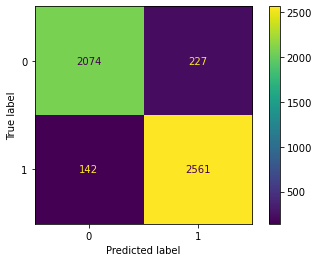

In [ ]:
grid_et_pred = grid_et.predict(X_test)
print(classification_report(y_test,grid_et_pred))
plot_confusion_matrix(grid_et,X_test,y_test)

### For Extreme Gradient Boosting Classifier

In [ ]:
base_xgb = XGBClassifier(random_state=101,verbosity=3,nthread=4)

In [ ]:
param_grid = {'n_estimators': np.linspace(200,1000,5),
              'learning_rate': np.linspace(0.1,1,6),
              'booster': ['gbtree','dart'],
              'gamma': np.linspace(0.001,0.1,5),
              'importance_type': ['gain','weight','cover','total_gain','total_cover']
             }

In [ ]:
grid_xgb = GridSearchCV(base_xgb,param_grid,verbose=4)
grid_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 1500 candidates, totalling 7500 fits
[CV 1/5] END booster=gbtree, gamma=0.001, importance_type=gain, learning_rate=0.1, n_estimators=200.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.001, importance_type=gain, learning_rate=0.1, n_estimators=200.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.001, importance_type=gain, learning_rate=0.1, n_estimators=200.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.001, importance_type=gain, learning_rate=0.1, n_estimators=200.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.001, importance_type=gain, learning_rate=0.1, n_estimators=200.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.001, importance_type=gain, learning_rate=0.1, n_estimators=400.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.001, importance_type=gain, learning_rate=0.1, n_estimators=400.0;, score=nan total time=   0.0s
[CV 

[CV 3/5] END booster=gbtree, gamma=0.001, importance_type=gain, learning_rate=0.45999999999999996, n_estimators=600.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.001, importance_type=gain, learning_rate=0.45999999999999996, n_estimators=600.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.001, importance_type=gain, learning_rate=0.45999999999999996, n_estimators=600.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.001, importance_type=gain, learning_rate=0.45999999999999996, n_estimators=800.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.001, importance_type=gain, learning_rate=0.45999999999999996, n_estimators=800.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.001, importance_type=gain, learning_rate=0.45999999999999996, n_estimators=800.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.001, importance_type=gain, learning_rate=0.45999999999999996, n_estim

[CV 5/5] END booster=gbtree, gamma=0.001, importance_type=gain, learning_rate=0.82, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.001, importance_type=gain, learning_rate=1.0, n_estimators=200.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.001, importance_type=gain, learning_rate=1.0, n_estimators=200.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.001, importance_type=gain, learning_rate=1.0, n_estimators=200.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.001, importance_type=gain, learning_rate=1.0, n_estimators=200.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.001, importance_type=gain, learning_rate=1.0, n_estimators=200.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.001, importance_type=gain, learning_rate=1.0, n_estimators=400.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.001, importance_type=gain, lea

[CV 4/5] END booster=gbtree, gamma=0.001, importance_type=weight, learning_rate=0.28, n_estimators=600.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.001, importance_type=weight, learning_rate=0.28, n_estimators=600.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.001, importance_type=weight, learning_rate=0.28, n_estimators=800.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.001, importance_type=weight, learning_rate=0.28, n_estimators=800.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.001, importance_type=weight, learning_rate=0.28, n_estimators=800.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.001, importance_type=weight, learning_rate=0.28, n_estimators=800.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.001, importance_type=weight, learning_rate=0.28, n_estimators=800.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.001, import

[CV 4/5] END booster=gbtree, gamma=0.001, importance_type=weight, learning_rate=0.64, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.001, importance_type=weight, learning_rate=0.64, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.001, importance_type=weight, learning_rate=0.82, n_estimators=200.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.001, importance_type=weight, learning_rate=0.82, n_estimators=200.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.001, importance_type=weight, learning_rate=0.82, n_estimators=200.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.001, importance_type=weight, learning_rate=0.82, n_estimators=200.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.001, importance_type=weight, learning_rate=0.82, n_estimators=200.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.001, impo

[CV 1/5] END booster=gbtree, gamma=0.001, importance_type=cover, learning_rate=0.1, n_estimators=600.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.001, importance_type=cover, learning_rate=0.1, n_estimators=600.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.001, importance_type=cover, learning_rate=0.1, n_estimators=600.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.001, importance_type=cover, learning_rate=0.1, n_estimators=600.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.001, importance_type=cover, learning_rate=0.1, n_estimators=600.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.001, importance_type=cover, learning_rate=0.1, n_estimators=800.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.001, importance_type=cover, learning_rate=0.1, n_estimators=800.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.001, importance_type=cove

[CV 3/5] END booster=gbtree, gamma=0.001, importance_type=cover, learning_rate=0.45999999999999996, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.001, importance_type=cover, learning_rate=0.45999999999999996, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.001, importance_type=cover, learning_rate=0.45999999999999996, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.001, importance_type=cover, learning_rate=0.64, n_estimators=200.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.001, importance_type=cover, learning_rate=0.64, n_estimators=200.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.001, importance_type=cover, learning_rate=0.64, n_estimators=200.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.001, importance_type=cover, learning_rate=0.64, n_estimators=200.0;, score=nan total time=   0.0s
[CV 5/5

[CV 1/5] END booster=gbtree, gamma=0.001, importance_type=cover, learning_rate=1.0, n_estimators=800.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.001, importance_type=cover, learning_rate=1.0, n_estimators=800.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.001, importance_type=cover, learning_rate=1.0, n_estimators=800.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.001, importance_type=cover, learning_rate=1.0, n_estimators=800.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.001, importance_type=cover, learning_rate=1.0, n_estimators=800.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.001, importance_type=cover, learning_rate=1.0, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.001, importance_type=cover, learning_rate=1.0, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.001, importance_type=co

[CV 3/5] END booster=gbtree, gamma=0.001, importance_type=total_gain, learning_rate=0.45999999999999996, n_estimators=400.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.001, importance_type=total_gain, learning_rate=0.45999999999999996, n_estimators=400.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.001, importance_type=total_gain, learning_rate=0.45999999999999996, n_estimators=400.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.001, importance_type=total_gain, learning_rate=0.45999999999999996, n_estimators=600.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.001, importance_type=total_gain, learning_rate=0.45999999999999996, n_estimators=600.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.001, importance_type=total_gain, learning_rate=0.45999999999999996, n_estimators=600.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.001, importance_type=total_gain, 

[CV 1/5] END booster=gbtree, gamma=0.001, importance_type=total_gain, learning_rate=0.82, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.001, importance_type=total_gain, learning_rate=0.82, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.001, importance_type=total_gain, learning_rate=0.82, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.001, importance_type=total_gain, learning_rate=0.82, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.001, importance_type=total_gain, learning_rate=0.82, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.001, importance_type=total_gain, learning_rate=1.0, n_estimators=200.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.001, importance_type=total_gain, learning_rate=1.0, n_estimators=200.0;, score=nan total time=   0.0s
[CV 3/5] END boos

[CV 4/5] END booster=gbtree, gamma=0.001, importance_type=total_cover, learning_rate=0.28, n_estimators=400.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.001, importance_type=total_cover, learning_rate=0.28, n_estimators=400.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.001, importance_type=total_cover, learning_rate=0.28, n_estimators=600.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.001, importance_type=total_cover, learning_rate=0.28, n_estimators=600.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.001, importance_type=total_cover, learning_rate=0.28, n_estimators=600.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.001, importance_type=total_cover, learning_rate=0.28, n_estimators=600.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.001, importance_type=total_cover, learning_rate=0.28, n_estimators=600.0;, score=nan total time=   0.0s
[CV 1/5] END 

[CV 5/5] END booster=gbtree, gamma=0.001, importance_type=total_cover, learning_rate=0.64, n_estimators=800.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.001, importance_type=total_cover, learning_rate=0.64, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.001, importance_type=total_cover, learning_rate=0.64, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.001, importance_type=total_cover, learning_rate=0.64, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.001, importance_type=total_cover, learning_rate=0.64, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.001, importance_type=total_cover, learning_rate=0.64, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.001, importance_type=total_cover, learning_rate=0.82, n_estimators=200.0;, score=nan total time=   0.0s
[CV 2/5]

[CV 2/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=gain, learning_rate=0.1, n_estimators=400.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=gain, learning_rate=0.1, n_estimators=400.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=gain, learning_rate=0.1, n_estimators=400.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=gain, learning_rate=0.1, n_estimators=400.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=gain, learning_rate=0.1, n_estimators=600.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=gain, learning_rate=0.1, n_estimators=600.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=gain, learning_rate=0.1, n_estimators=6

[CV 4/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=gain, learning_rate=0.45999999999999996, n_estimators=800.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=gain, learning_rate=0.45999999999999996, n_estimators=800.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=gain, learning_rate=0.45999999999999996, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=gain, learning_rate=0.45999999999999996, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=gain, learning_rate=0.45999999999999996, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=gain, learning_rate=0.45999999999999996, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 5/5] END

[CV 4/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=gain, learning_rate=0.82, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=gain, learning_rate=0.82, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=gain, learning_rate=1.0, n_estimators=200.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=gain, learning_rate=1.0, n_estimators=200.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=gain, learning_rate=1.0, n_estimators=200.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=gain, learning_rate=1.0, n_estimators=200.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=gain, learning_rate=1.0, n_estimato

[CV 2/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=weight, learning_rate=0.28, n_estimators=400.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=weight, learning_rate=0.28, n_estimators=400.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=weight, learning_rate=0.28, n_estimators=400.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=weight, learning_rate=0.28, n_estimators=400.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=weight, learning_rate=0.28, n_estimators=600.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=weight, learning_rate=0.28, n_estimators=600.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=weight, learning_rate

[CV 4/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=weight, learning_rate=0.64, n_estimators=600.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=weight, learning_rate=0.64, n_estimators=600.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=weight, learning_rate=0.64, n_estimators=800.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=weight, learning_rate=0.64, n_estimators=800.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=weight, learning_rate=0.64, n_estimators=800.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=weight, learning_rate=0.64, n_estimators=800.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=weight, learning_rate

[CV 2/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=weight, learning_rate=1.0, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=weight, learning_rate=1.0, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=weight, learning_rate=1.0, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=weight, learning_rate=1.0, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=cover, learning_rate=0.1, n_estimators=200.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=cover, learning_rate=0.1, n_estimators=200.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=cover, learning_rate=0.1,

[CV 2/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=cover, learning_rate=0.45999999999999996, n_estimators=400.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=cover, learning_rate=0.45999999999999996, n_estimators=400.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=cover, learning_rate=0.45999999999999996, n_estimators=400.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=cover, learning_rate=0.45999999999999996, n_estimators=400.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=cover, learning_rate=0.45999999999999996, n_estimators=600.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=cover, learning_rate=0.45999999999999996, n_estimators=600.0;, score=nan total time=   0.0s
[CV 3/5] E

[CV 4/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=cover, learning_rate=0.82, n_estimators=800.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=cover, learning_rate=0.82, n_estimators=800.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=cover, learning_rate=0.82, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=cover, learning_rate=0.82, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=cover, learning_rate=0.82, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=cover, learning_rate=0.82, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=cover, learning_rate=0.

[CV 3/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=total_gain, learning_rate=0.28, n_estimators=200.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=total_gain, learning_rate=0.28, n_estimators=200.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=total_gain, learning_rate=0.28, n_estimators=200.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=total_gain, learning_rate=0.28, n_estimators=400.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=total_gain, learning_rate=0.28, n_estimators=400.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=total_gain, learning_rate=0.28, n_estimators=400.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.025750000000000002, importance_ty

[CV 4/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=total_gain, learning_rate=0.64, n_estimators=200.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=total_gain, learning_rate=0.64, n_estimators=200.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=total_gain, learning_rate=0.64, n_estimators=400.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=total_gain, learning_rate=0.64, n_estimators=400.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=total_gain, learning_rate=0.64, n_estimators=400.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=total_gain, learning_rate=0.64, n_estimators=400.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.025750000000000002, importance_ty

[CV 3/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=total_gain, learning_rate=1.0, n_estimators=400.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=total_gain, learning_rate=1.0, n_estimators=400.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=total_gain, learning_rate=1.0, n_estimators=400.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=total_gain, learning_rate=1.0, n_estimators=600.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=total_gain, learning_rate=1.0, n_estimators=600.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=total_gain, learning_rate=1.0, n_estimators=600.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=tot

[CV 1/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=total_cover, learning_rate=0.28, n_estimators=600.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=total_cover, learning_rate=0.28, n_estimators=600.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=total_cover, learning_rate=0.28, n_estimators=600.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=total_cover, learning_rate=0.28, n_estimators=600.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=total_cover, learning_rate=0.28, n_estimators=600.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=total_cover, learning_rate=0.28, n_estimators=800.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.025750000000000002, importa

[CV 3/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=total_cover, learning_rate=0.64, n_estimators=600.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=total_cover, learning_rate=0.64, n_estimators=600.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=total_cover, learning_rate=0.64, n_estimators=600.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=total_cover, learning_rate=0.64, n_estimators=800.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=total_cover, learning_rate=0.64, n_estimators=800.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=total_cover, learning_rate=0.64, n_estimators=800.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.025750000000000002, importa

[CV 2/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=total_cover, learning_rate=1.0, n_estimators=800.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=total_cover, learning_rate=1.0, n_estimators=800.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=total_cover, learning_rate=1.0, n_estimators=800.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=total_cover, learning_rate=1.0, n_estimators=800.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=total_cover, learning_rate=1.0, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.025750000000000002, importance_type=total_cover, learning_rate=1.0, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.025750000000000002, importance_

[CV 2/5] END booster=gbtree, gamma=0.0505, importance_type=gain, learning_rate=0.45999999999999996, n_estimators=400.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.0505, importance_type=gain, learning_rate=0.45999999999999996, n_estimators=400.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.0505, importance_type=gain, learning_rate=0.45999999999999996, n_estimators=400.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.0505, importance_type=gain, learning_rate=0.45999999999999996, n_estimators=400.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.0505, importance_type=gain, learning_rate=0.45999999999999996, n_estimators=600.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.0505, importance_type=gain, learning_rate=0.45999999999999996, n_estimators=600.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.0505, importance_type=gain, learning_rate=0.45999999999999996, 

[CV 1/5] END booster=gbtree, gamma=0.0505, importance_type=gain, learning_rate=0.82, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.0505, importance_type=gain, learning_rate=0.82, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.0505, importance_type=gain, learning_rate=0.82, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.0505, importance_type=gain, learning_rate=0.82, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.0505, importance_type=gain, learning_rate=0.82, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.0505, importance_type=gain, learning_rate=1.0, n_estimators=200.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.0505, importance_type=gain, learning_rate=1.0, n_estimators=200.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.0505, importanc

[CV 4/5] END booster=gbtree, gamma=0.0505, importance_type=weight, learning_rate=0.28, n_estimators=400.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.0505, importance_type=weight, learning_rate=0.28, n_estimators=400.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.0505, importance_type=weight, learning_rate=0.28, n_estimators=600.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.0505, importance_type=weight, learning_rate=0.28, n_estimators=600.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.0505, importance_type=weight, learning_rate=0.28, n_estimators=600.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.0505, importance_type=weight, learning_rate=0.28, n_estimators=600.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.0505, importance_type=weight, learning_rate=0.28, n_estimators=600.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.0505

[CV 5/5] END booster=gbtree, gamma=0.0505, importance_type=weight, learning_rate=0.64, n_estimators=800.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.0505, importance_type=weight, learning_rate=0.64, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.0505, importance_type=weight, learning_rate=0.64, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.0505, importance_type=weight, learning_rate=0.64, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.0505, importance_type=weight, learning_rate=0.64, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.0505, importance_type=weight, learning_rate=0.64, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.0505, importance_type=weight, learning_rate=0.82, n_estimators=200.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0

[CV 1/5] END booster=gbtree, gamma=0.0505, importance_type=cover, learning_rate=0.1, n_estimators=600.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.0505, importance_type=cover, learning_rate=0.1, n_estimators=600.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.0505, importance_type=cover, learning_rate=0.1, n_estimators=600.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.0505, importance_type=cover, learning_rate=0.1, n_estimators=600.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.0505, importance_type=cover, learning_rate=0.1, n_estimators=600.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.0505, importance_type=cover, learning_rate=0.1, n_estimators=800.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.0505, importance_type=cover, learning_rate=0.1, n_estimators=800.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.0505, importance_t

[CV 1/5] END booster=gbtree, gamma=0.0505, importance_type=cover, learning_rate=0.64, n_estimators=200.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.0505, importance_type=cover, learning_rate=0.64, n_estimators=200.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.0505, importance_type=cover, learning_rate=0.64, n_estimators=200.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.0505, importance_type=cover, learning_rate=0.64, n_estimators=200.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.0505, importance_type=cover, learning_rate=0.64, n_estimators=200.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.0505, importance_type=cover, learning_rate=0.64, n_estimators=400.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.0505, importance_type=cover, learning_rate=0.64, n_estimators=400.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.0505, impor

[CV 1/5] END booster=gbtree, gamma=0.0505, importance_type=cover, learning_rate=1.0, n_estimators=800.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.0505, importance_type=cover, learning_rate=1.0, n_estimators=800.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.0505, importance_type=cover, learning_rate=1.0, n_estimators=800.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.0505, importance_type=cover, learning_rate=1.0, n_estimators=800.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.0505, importance_type=cover, learning_rate=1.0, n_estimators=800.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.0505, importance_type=cover, learning_rate=1.0, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.0505, importance_type=cover, learning_rate=1.0, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.0505, importance

[CV 5/5] END booster=gbtree, gamma=0.0505, importance_type=total_gain, learning_rate=0.45999999999999996, n_estimators=200.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.0505, importance_type=total_gain, learning_rate=0.45999999999999996, n_estimators=400.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.0505, importance_type=total_gain, learning_rate=0.45999999999999996, n_estimators=400.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.0505, importance_type=total_gain, learning_rate=0.45999999999999996, n_estimators=400.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.0505, importance_type=total_gain, learning_rate=0.45999999999999996, n_estimators=400.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.0505, importance_type=total_gain, learning_rate=0.45999999999999996, n_estimators=400.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.0505, importance_type=total

[CV 1/5] END booster=gbtree, gamma=0.0505, importance_type=total_gain, learning_rate=0.82, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.0505, importance_type=total_gain, learning_rate=0.82, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.0505, importance_type=total_gain, learning_rate=0.82, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.0505, importance_type=total_gain, learning_rate=0.82, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.0505, importance_type=total_gain, learning_rate=0.82, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.0505, importance_type=total_gain, learning_rate=1.0, n_estimators=200.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.0505, importance_type=total_gain, learning_rate=1.0, n_estimators=200.0;, score=nan total time=   0.0s
[CV 3/5] E

[CV 1/5] END booster=gbtree, gamma=0.0505, importance_type=total_cover, learning_rate=0.28, n_estimators=600.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.0505, importance_type=total_cover, learning_rate=0.28, n_estimators=600.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.0505, importance_type=total_cover, learning_rate=0.28, n_estimators=600.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.0505, importance_type=total_cover, learning_rate=0.28, n_estimators=600.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.0505, importance_type=total_cover, learning_rate=0.28, n_estimators=600.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.0505, importance_type=total_cover, learning_rate=0.28, n_estimators=800.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.0505, importance_type=total_cover, learning_rate=0.28, n_estimators=800.0;, score=nan total time=   0.0s
[CV 3/

[CV 1/5] END booster=gbtree, gamma=0.0505, importance_type=total_cover, learning_rate=0.82, n_estimators=200.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.0505, importance_type=total_cover, learning_rate=0.82, n_estimators=200.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.0505, importance_type=total_cover, learning_rate=0.82, n_estimators=200.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.0505, importance_type=total_cover, learning_rate=0.82, n_estimators=200.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.0505, importance_type=total_cover, learning_rate=0.82, n_estimators=200.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.0505, importance_type=total_cover, learning_rate=0.82, n_estimators=400.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.0505, importance_type=total_cover, learning_rate=0.82, n_estimators=400.0;, score=nan total time=   0.0s
[CV 3/

[CV 5/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=gain, learning_rate=0.1, n_estimators=600.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=gain, learning_rate=0.1, n_estimators=800.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=gain, learning_rate=0.1, n_estimators=800.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=gain, learning_rate=0.1, n_estimators=800.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=gain, learning_rate=0.1, n_estimators=800.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=gain, learning_rate=0.1, n_estimators=800.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=gain, learning_rate=0.1, n_estimators=1000.0;,

[CV 4/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=gain, learning_rate=0.45999999999999996, n_estimators=800.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=gain, learning_rate=0.45999999999999996, n_estimators=800.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=gain, learning_rate=0.45999999999999996, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=gain, learning_rate=0.45999999999999996, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=gain, learning_rate=0.45999999999999996, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=gain, learning_rate=0.45999999999999996, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 5/5] END boost

[CV 4/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=gain, learning_rate=1.0, n_estimators=400.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=gain, learning_rate=1.0, n_estimators=400.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=gain, learning_rate=1.0, n_estimators=600.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=gain, learning_rate=1.0, n_estimators=600.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=gain, learning_rate=1.0, n_estimators=600.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=gain, learning_rate=1.0, n_estimators=600.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=gain, learning_rate=1.0, n_estimators=600.0;, 

[CV 1/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=weight, learning_rate=0.28, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=weight, learning_rate=0.28, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=weight, learning_rate=0.28, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=weight, learning_rate=0.28, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=weight, learning_rate=0.28, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=weight, learning_rate=0.45999999999999996, n_estimators=200.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=weight, 

[CV 4/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=weight, learning_rate=0.64, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=weight, learning_rate=0.64, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=weight, learning_rate=0.82, n_estimators=200.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=weight, learning_rate=0.82, n_estimators=200.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=weight, learning_rate=0.82, n_estimators=200.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=weight, learning_rate=0.82, n_estimators=200.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=weight, learning_rate=0.82

[CV 4/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=cover, learning_rate=0.1, n_estimators=200.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=cover, learning_rate=0.1, n_estimators=200.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=cover, learning_rate=0.1, n_estimators=400.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=cover, learning_rate=0.1, n_estimators=400.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=cover, learning_rate=0.1, n_estimators=400.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=cover, learning_rate=0.1, n_estimators=400.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=cover, learning_rate=0.1, n_estimators=4

[CV 4/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=cover, learning_rate=0.45999999999999996, n_estimators=800.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=cover, learning_rate=0.45999999999999996, n_estimators=800.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=cover, learning_rate=0.45999999999999996, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=cover, learning_rate=0.45999999999999996, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=cover, learning_rate=0.45999999999999996, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=cover, learning_rate=0.45999999999999996, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 5/5] END

[CV 4/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=cover, learning_rate=0.82, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=cover, learning_rate=0.82, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=cover, learning_rate=1.0, n_estimators=200.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=cover, learning_rate=1.0, n_estimators=200.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=cover, learning_rate=1.0, n_estimators=200.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=cover, learning_rate=1.0, n_estimators=200.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=cover, learning_rate=1.0, n_estimato

[CV 4/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=total_gain, learning_rate=0.28, n_estimators=600.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=total_gain, learning_rate=0.28, n_estimators=600.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=total_gain, learning_rate=0.28, n_estimators=800.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=total_gain, learning_rate=0.28, n_estimators=800.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=total_gain, learning_rate=0.28, n_estimators=800.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=total_gain, learning_rate=0.28, n_estimators=800.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=tota

[CV 3/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=total_gain, learning_rate=0.64, n_estimators=800.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=total_gain, learning_rate=0.64, n_estimators=800.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=total_gain, learning_rate=0.64, n_estimators=800.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=total_gain, learning_rate=0.64, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=total_gain, learning_rate=0.64, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=total_gain, learning_rate=0.64, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=t

[CV 3/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=total_gain, learning_rate=1.0, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=total_gain, learning_rate=1.0, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=total_gain, learning_rate=1.0, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=total_cover, learning_rate=0.1, n_estimators=200.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=total_cover, learning_rate=0.1, n_estimators=200.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=total_cover, learning_rate=0.1, n_estimators=200.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=tota

[CV 2/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=total_cover, learning_rate=0.45999999999999996, n_estimators=200.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=total_cover, learning_rate=0.45999999999999996, n_estimators=200.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=total_cover, learning_rate=0.45999999999999996, n_estimators=200.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=total_cover, learning_rate=0.45999999999999996, n_estimators=200.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=total_cover, learning_rate=0.45999999999999996, n_estimators=400.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=total_cover, learning_rate=0.45999999999999996, n_estimators=400.0;, score=nan

[CV 1/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=total_cover, learning_rate=0.82, n_estimators=400.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=total_cover, learning_rate=0.82, n_estimators=400.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=total_cover, learning_rate=0.82, n_estimators=400.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=total_cover, learning_rate=0.82, n_estimators=400.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=total_cover, learning_rate=0.82, n_estimators=400.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.07525000000000001, importance_type=total_cover, learning_rate=0.82, n_estimators=600.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.07525000000000001, importance_typ

[CV 1/5] END booster=gbtree, gamma=0.1, importance_type=gain, learning_rate=0.1, n_estimators=600.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.1, importance_type=gain, learning_rate=0.1, n_estimators=600.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.1, importance_type=gain, learning_rate=0.1, n_estimators=600.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.1, importance_type=gain, learning_rate=0.1, n_estimators=600.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.1, importance_type=gain, learning_rate=0.1, n_estimators=600.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.1, importance_type=gain, learning_rate=0.1, n_estimators=800.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.1, importance_type=gain, learning_rate=0.1, n_estimators=800.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.1, importance_type=gain, learning_rate=0.1, n_

[CV 1/5] END booster=gbtree, gamma=0.1, importance_type=gain, learning_rate=0.64, n_estimators=200.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.1, importance_type=gain, learning_rate=0.64, n_estimators=200.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.1, importance_type=gain, learning_rate=0.64, n_estimators=200.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.1, importance_type=gain, learning_rate=0.64, n_estimators=200.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.1, importance_type=gain, learning_rate=0.64, n_estimators=200.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.1, importance_type=gain, learning_rate=0.64, n_estimators=400.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.1, importance_type=gain, learning_rate=0.64, n_estimators=400.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.1, importance_type=gain, learning_rate=

[CV 2/5] END booster=gbtree, gamma=0.1, importance_type=gain, learning_rate=1.0, n_estimators=800.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.1, importance_type=gain, learning_rate=1.0, n_estimators=800.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.1, importance_type=gain, learning_rate=1.0, n_estimators=800.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.1, importance_type=gain, learning_rate=1.0, n_estimators=800.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.1, importance_type=gain, learning_rate=1.0, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.1, importance_type=gain, learning_rate=1.0, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.1, importance_type=gain, learning_rate=1.0, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.1, importance_type=gain, learning_rate=1.0,

[CV 1/5] END booster=gbtree, gamma=0.1, importance_type=weight, learning_rate=0.45999999999999996, n_estimators=400.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.1, importance_type=weight, learning_rate=0.45999999999999996, n_estimators=400.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.1, importance_type=weight, learning_rate=0.45999999999999996, n_estimators=400.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.1, importance_type=weight, learning_rate=0.45999999999999996, n_estimators=400.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.1, importance_type=weight, learning_rate=0.45999999999999996, n_estimators=400.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.1, importance_type=weight, learning_rate=0.45999999999999996, n_estimators=600.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.1, importance_type=weight, learning_rate=0.45999999999999996, n_estim

[CV 1/5] END booster=gbtree, gamma=0.1, importance_type=weight, learning_rate=0.82, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.1, importance_type=weight, learning_rate=0.82, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.1, importance_type=weight, learning_rate=0.82, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.1, importance_type=weight, learning_rate=0.82, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.1, importance_type=weight, learning_rate=0.82, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.1, importance_type=weight, learning_rate=1.0, n_estimators=200.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.1, importance_type=weight, learning_rate=1.0, n_estimators=200.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.1, importance_type=wei

[CV 1/5] END booster=gbtree, gamma=0.1, importance_type=cover, learning_rate=0.28, n_estimators=600.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.1, importance_type=cover, learning_rate=0.28, n_estimators=600.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.1, importance_type=cover, learning_rate=0.28, n_estimators=600.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.1, importance_type=cover, learning_rate=0.28, n_estimators=600.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.1, importance_type=cover, learning_rate=0.28, n_estimators=600.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.1, importance_type=cover, learning_rate=0.28, n_estimators=800.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.1, importance_type=cover, learning_rate=0.28, n_estimators=800.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.1, importance_type=cover, learni

[CV 1/5] END booster=gbtree, gamma=0.1, importance_type=cover, learning_rate=0.82, n_estimators=200.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.1, importance_type=cover, learning_rate=0.82, n_estimators=200.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.1, importance_type=cover, learning_rate=0.82, n_estimators=200.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.1, importance_type=cover, learning_rate=0.82, n_estimators=200.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.1, importance_type=cover, learning_rate=0.82, n_estimators=200.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.1, importance_type=cover, learning_rate=0.82, n_estimators=400.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.1, importance_type=cover, learning_rate=0.82, n_estimators=400.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.1, importance_type=cover, learni

[CV 4/5] END booster=gbtree, gamma=0.1, importance_type=total_gain, learning_rate=0.1, n_estimators=600.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.1, importance_type=total_gain, learning_rate=0.1, n_estimators=600.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.1, importance_type=total_gain, learning_rate=0.1, n_estimators=800.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.1, importance_type=total_gain, learning_rate=0.1, n_estimators=800.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.1, importance_type=total_gain, learning_rate=0.1, n_estimators=800.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.1, importance_type=total_gain, learning_rate=0.1, n_estimators=800.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.1, importance_type=total_gain, learning_rate=0.1, n_estimators=800.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.1, i

[CV 4/5] END booster=gbtree, gamma=0.1, importance_type=total_gain, learning_rate=0.64, n_estimators=200.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.1, importance_type=total_gain, learning_rate=0.64, n_estimators=200.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.1, importance_type=total_gain, learning_rate=0.64, n_estimators=400.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.1, importance_type=total_gain, learning_rate=0.64, n_estimators=400.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.1, importance_type=total_gain, learning_rate=0.64, n_estimators=400.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.1, importance_type=total_gain, learning_rate=0.64, n_estimators=400.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.1, importance_type=total_gain, learning_rate=0.64, n_estimators=400.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma

[CV 5/5] END booster=gbtree, gamma=0.1, importance_type=total_gain, learning_rate=1.0, n_estimators=800.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.1, importance_type=total_gain, learning_rate=1.0, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.1, importance_type=total_gain, learning_rate=1.0, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.1, importance_type=total_gain, learning_rate=1.0, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.1, importance_type=total_gain, learning_rate=1.0, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.1, importance_type=total_gain, learning_rate=1.0, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.1, importance_type=total_cover, learning_rate=0.1, n_estimators=200.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=

[CV 5/5] END booster=gbtree, gamma=0.1, importance_type=total_cover, learning_rate=0.45999999999999996, n_estimators=400.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.1, importance_type=total_cover, learning_rate=0.45999999999999996, n_estimators=600.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.1, importance_type=total_cover, learning_rate=0.45999999999999996, n_estimators=600.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.1, importance_type=total_cover, learning_rate=0.45999999999999996, n_estimators=600.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.1, importance_type=total_cover, learning_rate=0.45999999999999996, n_estimators=600.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.1, importance_type=total_cover, learning_rate=0.45999999999999996, n_estimators=600.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.1, importance_type=total_cover, learnin

[CV 3/5] END booster=gbtree, gamma=0.1, importance_type=total_cover, learning_rate=0.82, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.1, importance_type=total_cover, learning_rate=0.82, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree, gamma=0.1, importance_type=total_cover, learning_rate=0.82, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 1/5] END booster=gbtree, gamma=0.1, importance_type=total_cover, learning_rate=1.0, n_estimators=200.0;, score=nan total time=   0.0s
[CV 2/5] END booster=gbtree, gamma=0.1, importance_type=total_cover, learning_rate=1.0, n_estimators=200.0;, score=nan total time=   0.0s
[CV 3/5] END booster=gbtree, gamma=0.1, importance_type=total_cover, learning_rate=1.0, n_estimators=200.0;, score=nan total time=   0.0s
[CV 4/5] END booster=gbtree, gamma=0.1, importance_type=total_cover, learning_rate=1.0, n_estimators=200.0;, score=nan total time=   0.0s
[CV 5/5] END booster=gbtree,

[CV 3/5] END booster=dart, gamma=0.001, importance_type=gain, learning_rate=0.28, n_estimators=600.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.001, importance_type=gain, learning_rate=0.28, n_estimators=600.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.001, importance_type=gain, learning_rate=0.28, n_estimators=600.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.001, importance_type=gain, learning_rate=0.28, n_estimators=800.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.001, importance_type=gain, learning_rate=0.28, n_estimators=800.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.001, importance_type=gain, learning_rate=0.28, n_estimators=800.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.001, importance_type=gain, learning_rate=0.28, n_estimators=800.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.001, importance_type=gain, learning_rate=

[CV 2/5] END booster=dart, gamma=0.001, importance_type=gain, learning_rate=0.82, n_estimators=200.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.001, importance_type=gain, learning_rate=0.82, n_estimators=200.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.001, importance_type=gain, learning_rate=0.82, n_estimators=200.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.001, importance_type=gain, learning_rate=0.82, n_estimators=200.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.001, importance_type=gain, learning_rate=0.82, n_estimators=400.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.001, importance_type=gain, learning_rate=0.82, n_estimators=400.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.001, importance_type=gain, learning_rate=0.82, n_estimators=400.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.001, importance_type=gain, learning_rate=

[CV 2/5] END booster=dart, gamma=0.001, importance_type=weight, learning_rate=0.1, n_estimators=800.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.001, importance_type=weight, learning_rate=0.1, n_estimators=800.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.001, importance_type=weight, learning_rate=0.1, n_estimators=800.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.001, importance_type=weight, learning_rate=0.1, n_estimators=800.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.001, importance_type=weight, learning_rate=0.1, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.001, importance_type=weight, learning_rate=0.1, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.001, importance_type=weight, learning_rate=0.1, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.001, importance_type=weight, le

[CV 2/5] END booster=dart, gamma=0.001, importance_type=weight, learning_rate=0.64, n_estimators=400.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.001, importance_type=weight, learning_rate=0.64, n_estimators=400.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.001, importance_type=weight, learning_rate=0.64, n_estimators=400.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.001, importance_type=weight, learning_rate=0.64, n_estimators=400.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.001, importance_type=weight, learning_rate=0.64, n_estimators=600.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.001, importance_type=weight, learning_rate=0.64, n_estimators=600.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.001, importance_type=weight, learning_rate=0.64, n_estimators=600.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.001, importance_type=weight

[CV 2/5] END booster=dart, gamma=0.001, importance_type=weight, learning_rate=1.0, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.001, importance_type=weight, learning_rate=1.0, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.001, importance_type=weight, learning_rate=1.0, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.001, importance_type=weight, learning_rate=1.0, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.001, importance_type=cover, learning_rate=0.1, n_estimators=200.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.001, importance_type=cover, learning_rate=0.1, n_estimators=200.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.001, importance_type=cover, learning_rate=0.1, n_estimators=200.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.001, importance_type=cover, learn

[CV 2/5] END booster=dart, gamma=0.001, importance_type=cover, learning_rate=0.45999999999999996, n_estimators=600.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.001, importance_type=cover, learning_rate=0.45999999999999996, n_estimators=600.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.001, importance_type=cover, learning_rate=0.45999999999999996, n_estimators=600.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.001, importance_type=cover, learning_rate=0.45999999999999996, n_estimators=600.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.001, importance_type=cover, learning_rate=0.45999999999999996, n_estimators=800.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.001, importance_type=cover, learning_rate=0.45999999999999996, n_estimators=800.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.001, importance_type=cover, learning_rate=0.45999999999999996, n_estimators=8

[CV 2/5] END booster=dart, gamma=0.001, importance_type=cover, learning_rate=1.0, n_estimators=200.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.001, importance_type=cover, learning_rate=1.0, n_estimators=200.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.001, importance_type=cover, learning_rate=1.0, n_estimators=200.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.001, importance_type=cover, learning_rate=1.0, n_estimators=200.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.001, importance_type=cover, learning_rate=1.0, n_estimators=400.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.001, importance_type=cover, learning_rate=1.0, n_estimators=400.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.001, importance_type=cover, learning_rate=1.0, n_estimators=400.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.001, importance_type=cover, learning_rate

[CV 2/5] END booster=dart, gamma=0.001, importance_type=total_gain, learning_rate=0.28, n_estimators=800.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.001, importance_type=total_gain, learning_rate=0.28, n_estimators=800.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.001, importance_type=total_gain, learning_rate=0.28, n_estimators=800.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.001, importance_type=total_gain, learning_rate=0.28, n_estimators=800.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.001, importance_type=total_gain, learning_rate=0.28, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.001, importance_type=total_gain, learning_rate=0.28, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.001, importance_type=total_gain, learning_rate=0.28, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamm

[CV 2/5] END booster=dart, gamma=0.001, importance_type=total_gain, learning_rate=0.82, n_estimators=400.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.001, importance_type=total_gain, learning_rate=0.82, n_estimators=400.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.001, importance_type=total_gain, learning_rate=0.82, n_estimators=400.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.001, importance_type=total_gain, learning_rate=0.82, n_estimators=400.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.001, importance_type=total_gain, learning_rate=0.82, n_estimators=600.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.001, importance_type=total_gain, learning_rate=0.82, n_estimators=600.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.001, importance_type=total_gain, learning_rate=0.82, n_estimators=600.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0

[CV 2/5] END booster=dart, gamma=0.001, importance_type=total_cover, learning_rate=0.1, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.001, importance_type=total_cover, learning_rate=0.1, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.001, importance_type=total_cover, learning_rate=0.1, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.001, importance_type=total_cover, learning_rate=0.1, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.001, importance_type=total_cover, learning_rate=0.28, n_estimators=200.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.001, importance_type=total_cover, learning_rate=0.28, n_estimators=200.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.001, importance_type=total_cover, learning_rate=0.28, n_estimators=200.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, 

[CV 2/5] END booster=dart, gamma=0.001, importance_type=total_cover, learning_rate=0.64, n_estimators=600.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.001, importance_type=total_cover, learning_rate=0.64, n_estimators=600.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.001, importance_type=total_cover, learning_rate=0.64, n_estimators=600.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.001, importance_type=total_cover, learning_rate=0.64, n_estimators=600.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.001, importance_type=total_cover, learning_rate=0.64, n_estimators=800.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.001, importance_type=total_cover, learning_rate=0.64, n_estimators=800.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.001, importance_type=total_cover, learning_rate=0.64, n_estimators=800.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, 

[CV 2/5] END booster=dart, gamma=0.025750000000000002, importance_type=gain, learning_rate=0.1, n_estimators=200.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.025750000000000002, importance_type=gain, learning_rate=0.1, n_estimators=200.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.025750000000000002, importance_type=gain, learning_rate=0.1, n_estimators=200.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.025750000000000002, importance_type=gain, learning_rate=0.1, n_estimators=200.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.025750000000000002, importance_type=gain, learning_rate=0.1, n_estimators=400.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.025750000000000002, importance_type=gain, learning_rate=0.1, n_estimators=400.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.025750000000000002, importance_type=gain, learning_rate=0.1, n_estimators=400.0;, score=n

[CV 2/5] END booster=dart, gamma=0.025750000000000002, importance_type=gain, learning_rate=0.45999999999999996, n_estimators=800.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.025750000000000002, importance_type=gain, learning_rate=0.45999999999999996, n_estimators=800.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.025750000000000002, importance_type=gain, learning_rate=0.45999999999999996, n_estimators=800.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.025750000000000002, importance_type=gain, learning_rate=0.45999999999999996, n_estimators=800.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.025750000000000002, importance_type=gain, learning_rate=0.45999999999999996, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.025750000000000002, importance_type=gain, learning_rate=0.45999999999999996, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart,

[CV 5/5] END booster=dart, gamma=0.025750000000000002, importance_type=gain, learning_rate=1.0, n_estimators=200.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.025750000000000002, importance_type=gain, learning_rate=1.0, n_estimators=400.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.025750000000000002, importance_type=gain, learning_rate=1.0, n_estimators=400.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.025750000000000002, importance_type=gain, learning_rate=1.0, n_estimators=400.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.025750000000000002, importance_type=gain, learning_rate=1.0, n_estimators=400.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.025750000000000002, importance_type=gain, learning_rate=1.0, n_estimators=400.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.025750000000000002, importance_type=gain, learning_rate=1.0, n_estimators=600.0;, score=n

[CV 5/5] END booster=dart, gamma=0.025750000000000002, importance_type=weight, learning_rate=0.28, n_estimators=800.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.025750000000000002, importance_type=weight, learning_rate=0.28, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.025750000000000002, importance_type=weight, learning_rate=0.28, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.025750000000000002, importance_type=weight, learning_rate=0.28, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.025750000000000002, importance_type=weight, learning_rate=0.28, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.025750000000000002, importance_type=weight, learning_rate=0.28, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.025750000000000002, importance_type=weight, learning_rate=0.459999

[CV 4/5] END booster=dart, gamma=0.025750000000000002, importance_type=weight, learning_rate=0.64, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.025750000000000002, importance_type=weight, learning_rate=0.64, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.025750000000000002, importance_type=weight, learning_rate=0.82, n_estimators=200.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.025750000000000002, importance_type=weight, learning_rate=0.82, n_estimators=200.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.025750000000000002, importance_type=weight, learning_rate=0.82, n_estimators=200.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.025750000000000002, importance_type=weight, learning_rate=0.82, n_estimators=200.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.025750000000000002, importance_type=weight, learning_rate=0.82, n_est

[CV 4/5] END booster=dart, gamma=0.025750000000000002, importance_type=cover, learning_rate=0.1, n_estimators=600.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.025750000000000002, importance_type=cover, learning_rate=0.1, n_estimators=600.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.025750000000000002, importance_type=cover, learning_rate=0.1, n_estimators=800.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.025750000000000002, importance_type=cover, learning_rate=0.1, n_estimators=800.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.025750000000000002, importance_type=cover, learning_rate=0.1, n_estimators=800.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.025750000000000002, importance_type=cover, learning_rate=0.1, n_estimators=800.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.025750000000000002, importance_type=cover, learning_rate=0.1, n_estimators=800.0;, 

[CV 3/5] END booster=dart, gamma=0.025750000000000002, importance_type=cover, learning_rate=0.64, n_estimators=200.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.025750000000000002, importance_type=cover, learning_rate=0.64, n_estimators=200.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.025750000000000002, importance_type=cover, learning_rate=0.64, n_estimators=200.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.025750000000000002, importance_type=cover, learning_rate=0.64, n_estimators=400.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.025750000000000002, importance_type=cover, learning_rate=0.64, n_estimators=400.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.025750000000000002, importance_type=cover, learning_rate=0.64, n_estimators=400.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.025750000000000002, importance_type=cover, learning_rate=0.64, n_estimators=4

[CV 3/5] END booster=dart, gamma=0.025750000000000002, importance_type=cover, learning_rate=1.0, n_estimators=800.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.025750000000000002, importance_type=cover, learning_rate=1.0, n_estimators=800.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.025750000000000002, importance_type=cover, learning_rate=1.0, n_estimators=800.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.025750000000000002, importance_type=cover, learning_rate=1.0, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.025750000000000002, importance_type=cover, learning_rate=1.0, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.025750000000000002, importance_type=cover, learning_rate=1.0, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.025750000000000002, importance_type=cover, learning_rate=1.0, n_estimators=1000.

[CV 2/5] END booster=dart, gamma=0.025750000000000002, importance_type=total_gain, learning_rate=0.28, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.025750000000000002, importance_type=total_gain, learning_rate=0.28, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.025750000000000002, importance_type=total_gain, learning_rate=0.28, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.025750000000000002, importance_type=total_gain, learning_rate=0.28, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.025750000000000002, importance_type=total_gain, learning_rate=0.45999999999999996, n_estimators=200.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.025750000000000002, importance_type=total_gain, learning_rate=0.45999999999999996, n_estimators=200.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.0257500000000

[CV 2/5] END booster=dart, gamma=0.025750000000000002, importance_type=total_gain, learning_rate=0.82, n_estimators=200.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.025750000000000002, importance_type=total_gain, learning_rate=0.82, n_estimators=200.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.025750000000000002, importance_type=total_gain, learning_rate=0.82, n_estimators=200.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.025750000000000002, importance_type=total_gain, learning_rate=0.82, n_estimators=200.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.025750000000000002, importance_type=total_gain, learning_rate=0.82, n_estimators=400.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.025750000000000002, importance_type=total_gain, learning_rate=0.82, n_estimators=400.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.025750000000000002, importance_type=total_gain,

[CV 1/5] END booster=dart, gamma=0.025750000000000002, importance_type=total_cover, learning_rate=0.1, n_estimators=400.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.025750000000000002, importance_type=total_cover, learning_rate=0.1, n_estimators=400.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.025750000000000002, importance_type=total_cover, learning_rate=0.1, n_estimators=400.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.025750000000000002, importance_type=total_cover, learning_rate=0.1, n_estimators=400.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.025750000000000002, importance_type=total_cover, learning_rate=0.1, n_estimators=400.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.025750000000000002, importance_type=total_cover, learning_rate=0.1, n_estimators=600.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.025750000000000002, importance_type=total_cover

[CV 5/5] END booster=dart, gamma=0.025750000000000002, importance_type=total_cover, learning_rate=0.45999999999999996, n_estimators=400.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.025750000000000002, importance_type=total_cover, learning_rate=0.45999999999999996, n_estimators=600.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.025750000000000002, importance_type=total_cover, learning_rate=0.45999999999999996, n_estimators=600.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.025750000000000002, importance_type=total_cover, learning_rate=0.45999999999999996, n_estimators=600.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.025750000000000002, importance_type=total_cover, learning_rate=0.45999999999999996, n_estimators=600.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.025750000000000002, importance_type=total_cover, learning_rate=0.45999999999999996, n_estimators=600.0;, score=nan total

[CV 4/5] END booster=dart, gamma=0.025750000000000002, importance_type=total_cover, learning_rate=0.82, n_estimators=600.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.025750000000000002, importance_type=total_cover, learning_rate=0.82, n_estimators=600.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.025750000000000002, importance_type=total_cover, learning_rate=0.82, n_estimators=800.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.025750000000000002, importance_type=total_cover, learning_rate=0.82, n_estimators=800.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.025750000000000002, importance_type=total_cover, learning_rate=0.82, n_estimators=800.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.025750000000000002, importance_type=total_cover, learning_rate=0.82, n_estimators=800.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.025750000000000002, importance_type=total

[CV 3/5] END booster=dart, gamma=0.0505, importance_type=gain, learning_rate=0.28, n_estimators=200.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.0505, importance_type=gain, learning_rate=0.28, n_estimators=200.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.0505, importance_type=gain, learning_rate=0.28, n_estimators=200.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.0505, importance_type=gain, learning_rate=0.28, n_estimators=400.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.0505, importance_type=gain, learning_rate=0.28, n_estimators=400.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.0505, importance_type=gain, learning_rate=0.28, n_estimators=400.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.0505, importance_type=gain, learning_rate=0.28, n_estimators=400.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.0505, importance_type=gain, learni

[CV 3/5] END booster=dart, gamma=0.0505, importance_type=gain, learning_rate=0.64, n_estimators=800.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.0505, importance_type=gain, learning_rate=0.64, n_estimators=800.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.0505, importance_type=gain, learning_rate=0.64, n_estimators=800.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.0505, importance_type=gain, learning_rate=0.64, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.0505, importance_type=gain, learning_rate=0.64, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.0505, importance_type=gain, learning_rate=0.64, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.0505, importance_type=gain, learning_rate=0.64, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.0505, importance_type=gain, le

[CV 2/5] END booster=dart, gamma=0.0505, importance_type=weight, learning_rate=0.1, n_estimators=400.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.0505, importance_type=weight, learning_rate=0.1, n_estimators=400.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.0505, importance_type=weight, learning_rate=0.1, n_estimators=400.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.0505, importance_type=weight, learning_rate=0.1, n_estimators=400.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.0505, importance_type=weight, learning_rate=0.1, n_estimators=600.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.0505, importance_type=weight, learning_rate=0.1, n_estimators=600.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.0505, importance_type=weight, learning_rate=0.1, n_estimators=600.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.0505, importance_type=weigh

[CV 2/5] END booster=dart, gamma=0.0505, importance_type=weight, learning_rate=0.45999999999999996, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.0505, importance_type=weight, learning_rate=0.45999999999999996, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.0505, importance_type=weight, learning_rate=0.45999999999999996, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.0505, importance_type=weight, learning_rate=0.45999999999999996, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.0505, importance_type=weight, learning_rate=0.64, n_estimators=200.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.0505, importance_type=weight, learning_rate=0.64, n_estimators=200.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.0505, importance_type=weight, learning_rate=0.64, n_estimators=200.0;, score=nan total time

[CV 2/5] END booster=dart, gamma=0.0505, importance_type=weight, learning_rate=1.0, n_estimators=600.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.0505, importance_type=weight, learning_rate=1.0, n_estimators=600.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.0505, importance_type=weight, learning_rate=1.0, n_estimators=600.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.0505, importance_type=weight, learning_rate=1.0, n_estimators=600.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.0505, importance_type=weight, learning_rate=1.0, n_estimators=800.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.0505, importance_type=weight, learning_rate=1.0, n_estimators=800.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.0505, importance_type=weight, learning_rate=1.0, n_estimators=800.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.0505, importance_type=weigh

[CV 2/5] END booster=dart, gamma=0.0505, importance_type=cover, learning_rate=0.45999999999999996, n_estimators=200.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.0505, importance_type=cover, learning_rate=0.45999999999999996, n_estimators=200.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.0505, importance_type=cover, learning_rate=0.45999999999999996, n_estimators=200.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.0505, importance_type=cover, learning_rate=0.45999999999999996, n_estimators=200.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.0505, importance_type=cover, learning_rate=0.45999999999999996, n_estimators=400.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.0505, importance_type=cover, learning_rate=0.45999999999999996, n_estimators=400.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.0505, importance_type=cover, learning_rate=0.45999999999999996, n_estim

[CV 1/5] END booster=dart, gamma=0.0505, importance_type=cover, learning_rate=0.82, n_estimators=800.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.0505, importance_type=cover, learning_rate=0.82, n_estimators=800.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.0505, importance_type=cover, learning_rate=0.82, n_estimators=800.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.0505, importance_type=cover, learning_rate=0.82, n_estimators=800.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.0505, importance_type=cover, learning_rate=0.82, n_estimators=800.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.0505, importance_type=cover, learning_rate=0.82, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.0505, importance_type=cover, learning_rate=0.82, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.0505, importance_type=cov

[CV 2/5] END booster=dart, gamma=0.0505, importance_type=total_gain, learning_rate=0.28, n_estimators=400.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.0505, importance_type=total_gain, learning_rate=0.28, n_estimators=400.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.0505, importance_type=total_gain, learning_rate=0.28, n_estimators=400.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.0505, importance_type=total_gain, learning_rate=0.28, n_estimators=400.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.0505, importance_type=total_gain, learning_rate=0.28, n_estimators=600.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.0505, importance_type=total_gain, learning_rate=0.28, n_estimators=600.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.0505, importance_type=total_gain, learning_rate=0.28, n_estimators=600.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, 

[CV 2/5] END booster=dart, gamma=0.0505, importance_type=total_gain, learning_rate=0.64, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.0505, importance_type=total_gain, learning_rate=0.64, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.0505, importance_type=total_gain, learning_rate=0.64, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.0505, importance_type=total_gain, learning_rate=0.64, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.0505, importance_type=total_gain, learning_rate=0.82, n_estimators=200.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.0505, importance_type=total_gain, learning_rate=0.82, n_estimators=200.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.0505, importance_type=total_gain, learning_rate=0.82, n_estimators=200.0;, score=nan total time=   0.0s
[CV 4/5] END booster=da

[CV 2/5] END booster=dart, gamma=0.0505, importance_type=total_cover, learning_rate=0.1, n_estimators=600.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.0505, importance_type=total_cover, learning_rate=0.1, n_estimators=600.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.0505, importance_type=total_cover, learning_rate=0.1, n_estimators=600.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.0505, importance_type=total_cover, learning_rate=0.1, n_estimators=600.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.0505, importance_type=total_cover, learning_rate=0.1, n_estimators=800.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.0505, importance_type=total_cover, learning_rate=0.1, n_estimators=800.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.0505, importance_type=total_cover, learning_rate=0.1, n_estimators=800.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, 

[CV 2/5] END booster=dart, gamma=0.0505, importance_type=total_cover, learning_rate=0.64, n_estimators=200.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.0505, importance_type=total_cover, learning_rate=0.64, n_estimators=200.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.0505, importance_type=total_cover, learning_rate=0.64, n_estimators=200.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.0505, importance_type=total_cover, learning_rate=0.64, n_estimators=200.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.0505, importance_type=total_cover, learning_rate=0.64, n_estimators=400.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.0505, importance_type=total_cover, learning_rate=0.64, n_estimators=400.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.0505, importance_type=total_cover, learning_rate=0.64, n_estimators=400.0;, score=nan total time=   0.0s
[CV 4/5] END booster

[CV 3/5] END booster=dart, gamma=0.0505, importance_type=total_cover, learning_rate=1.0, n_estimators=800.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.0505, importance_type=total_cover, learning_rate=1.0, n_estimators=800.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.0505, importance_type=total_cover, learning_rate=1.0, n_estimators=800.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.0505, importance_type=total_cover, learning_rate=1.0, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.0505, importance_type=total_cover, learning_rate=1.0, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.0505, importance_type=total_cover, learning_rate=1.0, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.0505, importance_type=total_cover, learning_rate=1.0, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 5/5] END booster=da

[CV 4/5] END booster=dart, gamma=0.07525000000000001, importance_type=gain, learning_rate=0.45999999999999996, n_estimators=400.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.07525000000000001, importance_type=gain, learning_rate=0.45999999999999996, n_estimators=400.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.07525000000000001, importance_type=gain, learning_rate=0.45999999999999996, n_estimators=600.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.07525000000000001, importance_type=gain, learning_rate=0.45999999999999996, n_estimators=600.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.07525000000000001, importance_type=gain, learning_rate=0.45999999999999996, n_estimators=600.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.07525000000000001, importance_type=gain, learning_rate=0.45999999999999996, n_estimators=600.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0

[CV 3/5] END booster=dart, gamma=0.07525000000000001, importance_type=gain, learning_rate=0.82, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.07525000000000001, importance_type=gain, learning_rate=0.82, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.07525000000000001, importance_type=gain, learning_rate=0.82, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.07525000000000001, importance_type=gain, learning_rate=1.0, n_estimators=200.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.07525000000000001, importance_type=gain, learning_rate=1.0, n_estimators=200.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.07525000000000001, importance_type=gain, learning_rate=1.0, n_estimators=200.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.07525000000000001, importance_type=gain, learning_rate=1.0, n_estimators=200.0;, score=na

[CV 4/5] END booster=dart, gamma=0.07525000000000001, importance_type=weight, learning_rate=0.28, n_estimators=600.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.07525000000000001, importance_type=weight, learning_rate=0.28, n_estimators=600.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.07525000000000001, importance_type=weight, learning_rate=0.28, n_estimators=800.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.07525000000000001, importance_type=weight, learning_rate=0.28, n_estimators=800.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.07525000000000001, importance_type=weight, learning_rate=0.28, n_estimators=800.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.07525000000000001, importance_type=weight, learning_rate=0.28, n_estimators=800.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.07525000000000001, importance_type=weight, learning_rate=0.28, n_estimators=8

[CV 4/5] END booster=dart, gamma=0.07525000000000001, importance_type=weight, learning_rate=0.64, n_estimators=800.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.07525000000000001, importance_type=weight, learning_rate=0.64, n_estimators=800.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.07525000000000001, importance_type=weight, learning_rate=0.64, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.07525000000000001, importance_type=weight, learning_rate=0.64, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.07525000000000001, importance_type=weight, learning_rate=0.64, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.07525000000000001, importance_type=weight, learning_rate=0.64, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.07525000000000001, importance_type=weight, learning_rate=0.64, n_estimato

[CV 4/5] END booster=dart, gamma=0.07525000000000001, importance_type=cover, learning_rate=0.1, n_estimators=400.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.07525000000000001, importance_type=cover, learning_rate=0.1, n_estimators=400.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.07525000000000001, importance_type=cover, learning_rate=0.1, n_estimators=600.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.07525000000000001, importance_type=cover, learning_rate=0.1, n_estimators=600.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.07525000000000001, importance_type=cover, learning_rate=0.1, n_estimators=600.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.07525000000000001, importance_type=cover, learning_rate=0.1, n_estimators=600.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.07525000000000001, importance_type=cover, learning_rate=0.1, n_estimators=600.0;, score=n

[CV 4/5] END booster=dart, gamma=0.07525000000000001, importance_type=cover, learning_rate=0.45999999999999996, n_estimators=600.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.07525000000000001, importance_type=cover, learning_rate=0.45999999999999996, n_estimators=600.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.07525000000000001, importance_type=cover, learning_rate=0.45999999999999996, n_estimators=800.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.07525000000000001, importance_type=cover, learning_rate=0.45999999999999996, n_estimators=800.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.07525000000000001, importance_type=cover, learning_rate=0.45999999999999996, n_estimators=800.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.07525000000000001, importance_type=cover, learning_rate=0.45999999999999996, n_estimators=800.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, g

[CV 3/5] END booster=dart, gamma=0.07525000000000001, importance_type=cover, learning_rate=1.0, n_estimators=200.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.07525000000000001, importance_type=cover, learning_rate=1.0, n_estimators=200.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.07525000000000001, importance_type=cover, learning_rate=1.0, n_estimators=200.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.07525000000000001, importance_type=cover, learning_rate=1.0, n_estimators=400.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.07525000000000001, importance_type=cover, learning_rate=1.0, n_estimators=400.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.07525000000000001, importance_type=cover, learning_rate=1.0, n_estimators=400.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.07525000000000001, importance_type=cover, learning_rate=1.0, n_estimators=400.0;, score=n

[CV 3/5] END booster=dart, gamma=0.07525000000000001, importance_type=total_gain, learning_rate=0.28, n_estimators=800.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.07525000000000001, importance_type=total_gain, learning_rate=0.28, n_estimators=800.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.07525000000000001, importance_type=total_gain, learning_rate=0.28, n_estimators=800.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.07525000000000001, importance_type=total_gain, learning_rate=0.28, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.07525000000000001, importance_type=total_gain, learning_rate=0.28, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.07525000000000001, importance_type=total_gain, learning_rate=0.28, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.07525000000000001, importance_type=total_gain, lea

[CV 1/5] END booster=dart, gamma=0.07525000000000001, importance_type=total_gain, learning_rate=0.64, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.07525000000000001, importance_type=total_gain, learning_rate=0.64, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.07525000000000001, importance_type=total_gain, learning_rate=0.64, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.07525000000000001, importance_type=total_gain, learning_rate=0.64, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.07525000000000001, importance_type=total_gain, learning_rate=0.64, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.07525000000000001, importance_type=total_gain, learning_rate=0.82, n_estimators=200.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.07525000000000001, importance_type=total_gain, l

[CV 5/5] END booster=dart, gamma=0.07525000000000001, importance_type=total_gain, learning_rate=1.0, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.07525000000000001, importance_type=total_cover, learning_rate=0.1, n_estimators=200.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.07525000000000001, importance_type=total_cover, learning_rate=0.1, n_estimators=200.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.07525000000000001, importance_type=total_cover, learning_rate=0.1, n_estimators=200.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.07525000000000001, importance_type=total_cover, learning_rate=0.1, n_estimators=200.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.07525000000000001, importance_type=total_cover, learning_rate=0.1, n_estimators=200.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.07525000000000001, importance_type=total_cover, learn

[CV 4/5] END booster=dart, gamma=0.07525000000000001, importance_type=total_cover, learning_rate=0.45999999999999996, n_estimators=200.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.07525000000000001, importance_type=total_cover, learning_rate=0.45999999999999996, n_estimators=200.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.07525000000000001, importance_type=total_cover, learning_rate=0.45999999999999996, n_estimators=400.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.07525000000000001, importance_type=total_cover, learning_rate=0.45999999999999996, n_estimators=400.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.07525000000000001, importance_type=total_cover, learning_rate=0.45999999999999996, n_estimators=400.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.07525000000000001, importance_type=total_cover, learning_rate=0.45999999999999996, n_estimators=400.0;, score=nan total time=

[CV 4/5] END booster=dart, gamma=0.07525000000000001, importance_type=total_cover, learning_rate=0.82, n_estimators=400.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.07525000000000001, importance_type=total_cover, learning_rate=0.82, n_estimators=400.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.07525000000000001, importance_type=total_cover, learning_rate=0.82, n_estimators=600.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.07525000000000001, importance_type=total_cover, learning_rate=0.82, n_estimators=600.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.07525000000000001, importance_type=total_cover, learning_rate=0.82, n_estimators=600.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.07525000000000001, importance_type=total_cover, learning_rate=0.82, n_estimators=600.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.07525000000000001, importance_type=total_cover,

[CV 4/5] END booster=dart, gamma=0.1, importance_type=gain, learning_rate=0.1, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.1, importance_type=gain, learning_rate=0.1, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.1, importance_type=gain, learning_rate=0.28, n_estimators=200.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.1, importance_type=gain, learning_rate=0.28, n_estimators=200.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.1, importance_type=gain, learning_rate=0.28, n_estimators=200.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.1, importance_type=gain, learning_rate=0.28, n_estimators=200.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.1, importance_type=gain, learning_rate=0.28, n_estimators=200.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.1, importance_type=gain, learning_rate=0.28, n_estimato

[CV 4/5] END booster=dart, gamma=0.1, importance_type=gain, learning_rate=0.64, n_estimators=600.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.1, importance_type=gain, learning_rate=0.64, n_estimators=600.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.1, importance_type=gain, learning_rate=0.64, n_estimators=800.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.1, importance_type=gain, learning_rate=0.64, n_estimators=800.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.1, importance_type=gain, learning_rate=0.64, n_estimators=800.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.1, importance_type=gain, learning_rate=0.64, n_estimators=800.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.1, importance_type=gain, learning_rate=0.64, n_estimators=800.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.1, importance_type=gain, learning_rate=0.64, n_estimato

[CV 4/5] END booster=dart, gamma=0.1, importance_type=weight, learning_rate=0.1, n_estimators=200.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.1, importance_type=weight, learning_rate=0.1, n_estimators=200.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.1, importance_type=weight, learning_rate=0.1, n_estimators=400.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.1, importance_type=weight, learning_rate=0.1, n_estimators=400.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.1, importance_type=weight, learning_rate=0.1, n_estimators=400.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.1, importance_type=weight, learning_rate=0.1, n_estimators=400.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.1, importance_type=weight, learning_rate=0.1, n_estimators=400.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.1, importance_type=weight, learning_rate=0.1, n_

[CV 3/5] END booster=dart, gamma=0.1, importance_type=weight, learning_rate=0.45999999999999996, n_estimators=800.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.1, importance_type=weight, learning_rate=0.45999999999999996, n_estimators=800.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.1, importance_type=weight, learning_rate=0.45999999999999996, n_estimators=800.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.1, importance_type=weight, learning_rate=0.45999999999999996, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.1, importance_type=weight, learning_rate=0.45999999999999996, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.1, importance_type=weight, learning_rate=0.45999999999999996, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.1, importance_type=weight, learning_rate=0.45999999999999996, n_estimators=1000.

[CV 4/5] END booster=dart, gamma=0.1, importance_type=weight, learning_rate=1.0, n_estimators=400.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.1, importance_type=weight, learning_rate=1.0, n_estimators=400.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.1, importance_type=weight, learning_rate=1.0, n_estimators=600.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.1, importance_type=weight, learning_rate=1.0, n_estimators=600.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.1, importance_type=weight, learning_rate=1.0, n_estimators=600.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.1, importance_type=weight, learning_rate=1.0, n_estimators=600.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.1, importance_type=weight, learning_rate=1.0, n_estimators=600.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.1, importance_type=weight, learning_rate=1.0, n_

[CV 4/5] END booster=dart, gamma=0.1, importance_type=cover, learning_rate=0.28, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.1, importance_type=cover, learning_rate=0.28, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.1, importance_type=cover, learning_rate=0.45999999999999996, n_estimators=200.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.1, importance_type=cover, learning_rate=0.45999999999999996, n_estimators=200.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.1, importance_type=cover, learning_rate=0.45999999999999996, n_estimators=200.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.1, importance_type=cover, learning_rate=0.45999999999999996, n_estimators=200.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.1, importance_type=cover, learning_rate=0.45999999999999996, n_estimators=200.0;, score=nan total time=   0.0s
[CV 1/

[CV 4/5] END booster=dart, gamma=0.1, importance_type=cover, learning_rate=0.82, n_estimators=600.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.1, importance_type=cover, learning_rate=0.82, n_estimators=600.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.1, importance_type=cover, learning_rate=0.82, n_estimators=800.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.1, importance_type=cover, learning_rate=0.82, n_estimators=800.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.1, importance_type=cover, learning_rate=0.82, n_estimators=800.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.1, importance_type=cover, learning_rate=0.82, n_estimators=800.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.1, importance_type=cover, learning_rate=0.82, n_estimators=800.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.1, importance_type=cover, learning_rate=0.82, n_

[CV 4/5] END booster=dart, gamma=0.1, importance_type=total_gain, learning_rate=0.28, n_estimators=200.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.1, importance_type=total_gain, learning_rate=0.28, n_estimators=200.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.1, importance_type=total_gain, learning_rate=0.28, n_estimators=400.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.1, importance_type=total_gain, learning_rate=0.28, n_estimators=400.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.1, importance_type=total_gain, learning_rate=0.28, n_estimators=400.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.1, importance_type=total_gain, learning_rate=0.28, n_estimators=400.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.1, importance_type=total_gain, learning_rate=0.28, n_estimators=400.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.1, importance

[CV 4/5] END booster=dart, gamma=0.1, importance_type=total_gain, learning_rate=0.64, n_estimators=800.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.1, importance_type=total_gain, learning_rate=0.64, n_estimators=800.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.1, importance_type=total_gain, learning_rate=0.64, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.1, importance_type=total_gain, learning_rate=0.64, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.1, importance_type=total_gain, learning_rate=0.64, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.1, importance_type=total_gain, learning_rate=0.64, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.1, importance_type=total_gain, learning_rate=0.64, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.1, impor

[CV 4/5] END booster=dart, gamma=0.1, importance_type=total_cover, learning_rate=0.1, n_estimators=400.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.1, importance_type=total_cover, learning_rate=0.1, n_estimators=400.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.1, importance_type=total_cover, learning_rate=0.1, n_estimators=600.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.1, importance_type=total_cover, learning_rate=0.1, n_estimators=600.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.1, importance_type=total_cover, learning_rate=0.1, n_estimators=600.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.1, importance_type=total_cover, learning_rate=0.1, n_estimators=600.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.1, importance_type=total_cover, learning_rate=0.1, n_estimators=600.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.1, importance

[CV 4/5] END booster=dart, gamma=0.1, importance_type=total_cover, learning_rate=0.45999999999999996, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.1, importance_type=total_cover, learning_rate=0.45999999999999996, n_estimators=1000.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.1, importance_type=total_cover, learning_rate=0.64, n_estimators=200.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.1, importance_type=total_cover, learning_rate=0.64, n_estimators=200.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.1, importance_type=total_cover, learning_rate=0.64, n_estimators=200.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.1, importance_type=total_cover, learning_rate=0.64, n_estimators=200.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.1, importance_type=total_cover, learning_rate=0.64, n_estimators=200.0;, score=nan total time=   0.0s
[CV 1/5] 

[CV 5/5] END booster=dart, gamma=0.1, importance_type=total_cover, learning_rate=1.0, n_estimators=400.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.1, importance_type=total_cover, learning_rate=1.0, n_estimators=600.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.1, importance_type=total_cover, learning_rate=1.0, n_estimators=600.0;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, gamma=0.1, importance_type=total_cover, learning_rate=1.0, n_estimators=600.0;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, gamma=0.1, importance_type=total_cover, learning_rate=1.0, n_estimators=600.0;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, gamma=0.1, importance_type=total_cover, learning_rate=1.0, n_estimators=600.0;, score=nan total time=   0.0s
[CV 1/5] END booster=dart, gamma=0.1, importance_type=total_cover, learning_rate=1.0, n_estimators=800.0;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, gamma=0.1, importance

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [ ]:
grid_xgb.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0.001,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 200.0,
 'n_jobs': 1,
 'nthread': 4,
 'objective': 'binary:logistic',
 'random_state': 101,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 3}

### For Bernoulli Naive Bayes

In [ ]:
base_bnb = BernoulliNB()

In [ ]:
param_grid = {'alpha': np.linspace(0,1,6),
              'binarize': np.linspace(0,1,5),
              'fit_prior': [True,False]
             }

In [ ]:
grid_bnb = GridSearchCV(base_bnb,param_grid,verbose=3,cv=RepeatedKFold(n_splits=5,n_repeats=2))
grid_bnb.fit(X_train,y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV 1/10] END alpha=0.0, binarize=0.0, fit_prior=True;, score=0.837 total time=   0.0s
[CV 2/10] END alpha=0.0, binarize=0.0, fit_prior=True;, score=0.838 total time=   0.0s
[CV 3/10] END alpha=0.0, binarize=0.0, fit_prior=True;, score=0.831 total time=   0.0s
[CV 4/10] END alpha=0.0, binarize=0.0, fit_prior=True;, score=0.833 total time=   0.0s
[CV 5/10] END alpha=0.0, binarize=0.0, fit_prior=True;, score=0.833 total time=   0.0s
[CV 6/10] END alpha=0.0, binarize=0.0, fit_prior=True;, score=0.834 total time=   0.0s
[CV 7/10] END alpha=0.0, binarize=0.0, fit_prior=True;, score=0.834 total time=   0.0s
[CV 8/10] END alpha=0.0, binarize=0.0, fit_prior=True;, score=0.828 total time=   0.0s
[CV 9/10] END alpha=0.0, binarize=0.0, fit_prior=True;, score=0.842 total time=   0.0s
[CV 10/10] END alpha=0.0, binarize=0.0, fit_prior=True;, score=0.834 total time=   0.0s
[CV 1/10] END alpha=0.0, binarize=0.0, fit_prior=False;, score=0.8

[CV 8/10] END alpha=0.0, binarize=1.0, fit_prior=False;, score=0.747 total time=   0.0s
[CV 9/10] END alpha=0.0, binarize=1.0, fit_prior=False;, score=0.758 total time=   0.0s
[CV 10/10] END alpha=0.0, binarize=1.0, fit_prior=False;, score=0.754 total time=   0.0s
[CV 1/10] END alpha=0.2, binarize=0.0, fit_prior=True;, score=0.837 total time=   0.0s
[CV 2/10] END alpha=0.2, binarize=0.0, fit_prior=True;, score=0.838 total time=   0.0s
[CV 3/10] END alpha=0.2, binarize=0.0, fit_prior=True;, score=0.831 total time=   0.0s
[CV 4/10] END alpha=0.2, binarize=0.0, fit_prior=True;, score=0.833 total time=   0.0s
[CV 5/10] END alpha=0.2, binarize=0.0, fit_prior=True;, score=0.833 total time=   0.0s
[CV 6/10] END alpha=0.2, binarize=0.0, fit_prior=True;, score=0.834 total time=   0.0s
[CV 7/10] END alpha=0.2, binarize=0.0, fit_prior=True;, score=0.834 total time=   0.0s
[CV 8/10] END alpha=0.2, binarize=0.0, fit_prior=True;, score=0.828 total time=   0.0s
[CV 9/10] END alpha=0.2, binarize=0.0, 

[CV 5/10] END alpha=0.2, binarize=1.0, fit_prior=False;, score=0.756 total time=   0.0s
[CV 6/10] END alpha=0.2, binarize=1.0, fit_prior=False;, score=0.757 total time=   0.0s
[CV 7/10] END alpha=0.2, binarize=1.0, fit_prior=False;, score=0.757 total time=   0.0s
[CV 8/10] END alpha=0.2, binarize=1.0, fit_prior=False;, score=0.747 total time=   0.0s
[CV 9/10] END alpha=0.2, binarize=1.0, fit_prior=False;, score=0.758 total time=   0.0s
[CV 10/10] END alpha=0.2, binarize=1.0, fit_prior=False;, score=0.754 total time=   0.0s
[CV 1/10] END alpha=0.4, binarize=0.0, fit_prior=True;, score=0.837 total time=   0.0s
[CV 2/10] END alpha=0.4, binarize=0.0, fit_prior=True;, score=0.838 total time=   0.0s
[CV 3/10] END alpha=0.4, binarize=0.0, fit_prior=True;, score=0.831 total time=   0.0s
[CV 4/10] END alpha=0.4, binarize=0.0, fit_prior=True;, score=0.833 total time=   0.0s
[CV 5/10] END alpha=0.4, binarize=0.0, fit_prior=True;, score=0.833 total time=   0.0s
[CV 6/10] END alpha=0.4, binarize=0.

[CV 6/10] END alpha=0.4, binarize=1.0, fit_prior=False;, score=0.757 total time=   0.0s
[CV 7/10] END alpha=0.4, binarize=1.0, fit_prior=False;, score=0.757 total time=   0.0s
[CV 8/10] END alpha=0.4, binarize=1.0, fit_prior=False;, score=0.747 total time=   0.0s
[CV 9/10] END alpha=0.4, binarize=1.0, fit_prior=False;, score=0.758 total time=   0.0s
[CV 10/10] END alpha=0.4, binarize=1.0, fit_prior=False;, score=0.754 total time=   0.0s
[CV 1/10] END alpha=0.6000000000000001, binarize=0.0, fit_prior=True;, score=0.837 total time=   0.0s
[CV 2/10] END alpha=0.6000000000000001, binarize=0.0, fit_prior=True;, score=0.838 total time=   0.0s
[CV 3/10] END alpha=0.6000000000000001, binarize=0.0, fit_prior=True;, score=0.831 total time=   0.0s
[CV 4/10] END alpha=0.6000000000000001, binarize=0.0, fit_prior=True;, score=0.833 total time=   0.0s
[CV 5/10] END alpha=0.6000000000000001, binarize=0.0, fit_prior=True;, score=0.833 total time=   0.0s
[CV 6/10] END alpha=0.6000000000000001, binarize=

[CV 1/10] END alpha=0.6000000000000001, binarize=1.0, fit_prior=True;, score=0.753 total time=   0.0s
[CV 2/10] END alpha=0.6000000000000001, binarize=1.0, fit_prior=True;, score=0.755 total time=   0.0s
[CV 3/10] END alpha=0.6000000000000001, binarize=1.0, fit_prior=True;, score=0.757 total time=   0.0s
[CV 4/10] END alpha=0.6000000000000001, binarize=1.0, fit_prior=True;, score=0.752 total time=   0.0s
[CV 5/10] END alpha=0.6000000000000001, binarize=1.0, fit_prior=True;, score=0.755 total time=   0.0s
[CV 6/10] END alpha=0.6000000000000001, binarize=1.0, fit_prior=True;, score=0.756 total time=   0.0s
[CV 7/10] END alpha=0.6000000000000001, binarize=1.0, fit_prior=True;, score=0.757 total time=   0.0s
[CV 8/10] END alpha=0.6000000000000001, binarize=1.0, fit_prior=True;, score=0.749 total time=   0.0s
[CV 9/10] END alpha=0.6000000000000001, binarize=1.0, fit_prior=True;, score=0.757 total time=   0.0s
[CV 10/10] END alpha=0.6000000000000001, binarize=1.0, fit_prior=True;, score=0.75

[CV 4/10] END alpha=0.8, binarize=0.75, fit_prior=False;, score=0.768 total time=   0.0s
[CV 5/10] END alpha=0.8, binarize=0.75, fit_prior=False;, score=0.771 total time=   0.0s
[CV 6/10] END alpha=0.8, binarize=0.75, fit_prior=False;, score=0.768 total time=   0.0s
[CV 7/10] END alpha=0.8, binarize=0.75, fit_prior=False;, score=0.762 total time=   0.0s
[CV 8/10] END alpha=0.8, binarize=0.75, fit_prior=False;, score=0.765 total time=   0.0s
[CV 9/10] END alpha=0.8, binarize=0.75, fit_prior=False;, score=0.764 total time=   0.0s
[CV 10/10] END alpha=0.8, binarize=0.75, fit_prior=False;, score=0.767 total time=   0.0s
[CV 1/10] END alpha=0.8, binarize=1.0, fit_prior=True;, score=0.753 total time=   0.0s
[CV 2/10] END alpha=0.8, binarize=1.0, fit_prior=True;, score=0.755 total time=   0.0s
[CV 3/10] END alpha=0.8, binarize=1.0, fit_prior=True;, score=0.757 total time=   0.0s
[CV 4/10] END alpha=0.8, binarize=1.0, fit_prior=True;, score=0.752 total time=   0.0s
[CV 5/10] END alpha=0.8, bin

[CV 8/10] END alpha=1.0, binarize=0.75, fit_prior=True;, score=0.760 total time=   0.0s
[CV 9/10] END alpha=1.0, binarize=0.75, fit_prior=True;, score=0.756 total time=   0.0s
[CV 10/10] END alpha=1.0, binarize=0.75, fit_prior=True;, score=0.763 total time=   0.0s
[CV 1/10] END alpha=1.0, binarize=0.75, fit_prior=False;, score=0.762 total time=   0.0s
[CV 2/10] END alpha=1.0, binarize=0.75, fit_prior=False;, score=0.763 total time=   0.0s
[CV 3/10] END alpha=1.0, binarize=0.75, fit_prior=False;, score=0.767 total time=   0.0s
[CV 4/10] END alpha=1.0, binarize=0.75, fit_prior=False;, score=0.768 total time=   0.0s
[CV 5/10] END alpha=1.0, binarize=0.75, fit_prior=False;, score=0.771 total time=   0.0s
[CV 6/10] END alpha=1.0, binarize=0.75, fit_prior=False;, score=0.768 total time=   0.0s
[CV 7/10] END alpha=1.0, binarize=0.75, fit_prior=False;, score=0.762 total time=   0.0s
[CV 8/10] END alpha=1.0, binarize=0.75, fit_prior=False;, score=0.765 total time=   0.0s
[CV 9/10] END alpha=1.0

GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=5, random_state=None),
             estimator=BernoulliNB(),
             param_grid={'alpha': array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
                         'binarize': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
                         'fit_prior': [True, False]},
             verbose=3)

In [ ]:
grid_bnb.best_estimator_.get_params()

{'alpha': 0.0, 'binarize': 0.25, 'class_prior': None, 'fit_prior': False}

In [ ]:
grid_bnb.best_score_

0.8412569815114928

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      2301
           1       0.87      0.83      0.85      2703

    accuracy                           0.84      5004
   macro avg       0.84      0.84      0.84      5004
weighted avg       0.84      0.84      0.84      5004



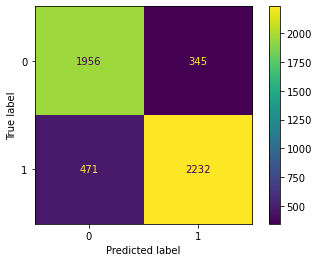

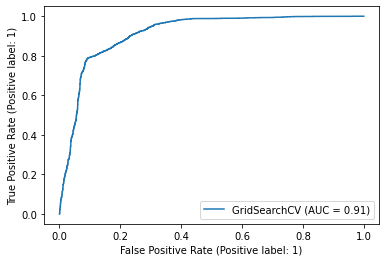

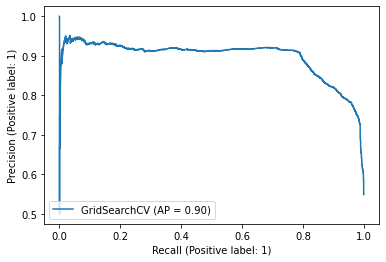

In [ ]:
grid_bnb_pred = grid_bnb.predict(X_test)
print(classification_report(y_test,grid_bnb_pred))
plot_confusion_matrix(grid_bnb,X_test,y_test)
plot_roc_curve(grid_bnb,X_test,y_test)
plot_precision_recall_curve(grid_bnb,X_test,y_test)

## Model Performance Analysis

In [ ]:
print("Accuracy Score of Logistic Regression:",str(np.round(accuracy_score(y_test,grid_lr_pred)*100,2)) + '%')
print("Accuracy Score of Ridge Classifier:",str(np.round(accuracy_score(y_test,ridge_pred)*100,2)) + '%')
print("Accuracy Score of Passive Aggressive Classifier:",str(np.round(accuracy_score(y_test,pac_pred)*100,2)) + '%')
print("Accuracy Score of Stochastic Gradient Descent Classifier:",str(np.round(accuracy_score(y_test,sgd_pred)*100,2)) + '%')
print("Accuracy Score of K Nearest Neighbors Classifier:",str(np.round(accuracy_score(y_test,grid_knn_pred)*100,2)) + '%')
print("Accuracy Score of Support Vector Machines Classifier:",str(np.round(accuracy_score(y_test,grid_svc_pred)*100,2)) + '%')
print("Accuracy Score of Gaussian Naive Bayes:",str(np.round(accuracy_score(y_test,gnb_pred)*100,2)) + '%')
print("Accuracy Score of Bernoulli Naive Bayes:",str(np.round(accuracy_score(y_test,grid_bnb_pred)*100,2)) + '%')
print("Accuracy Score of Decision Tree Classifier:",str(np.round(accuracy_score(y_test,dtree_pred)*100,2)) + '%')
print("Accuracy Score of Random Forest Classifier:",str(np.round(accuracy_score(y_test,grid_rfc_pred)*100,2)) + '%')
print("Accuracy Score of Extreme Gradient Boosting Classifier:",str(np.round(accuracy_score(y_test,xgb_pred)*100,2)) + '%')
print("Accuracy Score of Categorical Boosting Classifier:",str(np.round(accuracy_score(y_test,grid_cat_pred)*100,2)) + '%')
print("Accuracy Score of Adaptive Boosting Classifier:",str(np.round(accuracy_score(y_test,grid_ada_pred)*100,2)) + '%')
print("Accuracy Score of Gradient Boosting Classifier:",str(np.round(accuracy_score(y_test,gbc_pred)*100,2)) + '%')
print("Accuracy Score of Light Gradient Boosting Model:",str(np.round(accuracy_score(y_test,grid_lgbm_pred)*100,2)) + '%')
print("Accuracy Score of Extra Trees Classifier:",str(np.round(accuracy_score(y_test,et_pred)*100,2)) + '%')
print("Accuracy Score of Bagging Classifier:",str(np.round(accuracy_score(y_test,grid_bag_pred)*100,2)) + '%')
print("Accuracy Score of Histogram-based Gradient Boosting Classifier:",str(np.round(accuracy_score(y_test,grid_hgbc_pred)*100,2)) + '%')
print("Accuracy Score of Voting Classifier:",str(np.round(accuracy_score(y_test,vc_pred)*100,2)) + '%')

Accuracy Score of Logistic Regression: 78.54%
Accuracy Score of Ridge Classifier: 77.62%
Accuracy Score of Passive Aggressive Classifier: 64.07%
Accuracy Score of Stochastic Gradient Descent Classifier: 77.3%
Accuracy Score of K Nearest Neighbors Classifier: 77.84%
Accuracy Score of Support Vector Machines Classifier: 84.11%
Accuracy Score of Gaussian Naive Bayes: 74.78%
Accuracy Score of Bernoulli Naive Bayes: 83.69%
Accuracy Score of Decision Tree Classifier: 91.13%
Accuracy Score of Random Forest Classifier: 93.31%
Accuracy Score of Extreme Gradient Boosting Classifier: 93.25%
Accuracy Score of Categorical Boosting Classifier: 93.03%
Accuracy Score of Adaptive Boosting Classifier: 93.05%
Accuracy Score of Gradient Boosting Classifier: 93.33%
Accuracy Score of Light Gradient Boosting Model: 93.11%
Accuracy Score of Extra Trees Classifier: 91.99%
Accuracy Score of Bagging Classifier: 93.41%
Accuracy Score of Histogram-based Gradient Boosting Classifier: 93.19%
Accuracy Score of Voting

### As is clearly evident from the above results, Voting Classifier provides the best fit for data and possesses an excellent prediction accuracy of more than 93.5%.  

## Saving the model for future use

In [ ]:
joblib.dump(grid_bag,'model.pkl')

['model.pkl']

In [ ]:
model = joblib.load('model.pkl')
model

RandomizedSearchCV(estimator=BaggingClassifier(oob_score=True, random_state=101,
                                               verbose=2),
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
                                        'max_samples': [0.24, 0.58, 0.71, 0.96],
                                        'n_estimators': [200, 500, 800, 1000],
                                        'warm_start': [True, False]},
                   verbose=4)

In [ ]:
joblib.dump(scaler,'scaler.bin')

['scaler.bin']

In [ ]:
scaler = joblib.load('scaler.bin')
scaler

StandardScaler()